<a href="https://colab.research.google.com/github/Nohgyumin0812/FactorAnalysis/blob/main/factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from google.colab import drive
import numpy as np
import itertools
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/factor_analysis.csv', header=[0, 1])

In [95]:
df = pd.read_csv('/content/factor_analysis.csv', header=[0, 1])
company_list = list(df.columns.levels[0])
print(company_list)
company_list.remove('Name')
date_column = df['Name']['Date']
company_num = df.shape[0]
df.iloc[:, 1:] = df.iloc[:, 1:].replace({'적전': -1}, regex=True).replace({'적지': -1}, regex=True).replace({'흑전': 1}, regex=True)
df.iloc[:, 1:] = df.iloc[:, 1:].replace({',': ''}, regex=True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)
new_columns= {}

<ipython-input-95-760e086441d1>:1: DtypeWarning: Columns (15,211,239,258,295,324,325,379,463,489,490,505,631,645,659,660,687,717,877,878,989,990,996,997,1009,1010,1028,1051,1052,1053,1065,1093,1094,1095,1121,1122,1123,1129,1130,1163,1164,1178,1260,1308,1387,1423,1424,1443,1444,1470,1527,1528,1529,1555,1569,1630,1667,1668,1766,1798,1807,1877,1878,1879,2053,2054,2129,2157,2199,2200,2227,2228,2255,2325,2339,2340,2353,2395,2396,2410,2411,2451,2452,2453,2465,2466,2535,2591,2605,2606,2683,2684,2703,2704,2731,2856,2857,3016,3025,3026,3029,3030,3039,3053,3054,3067,3068,3219,3229,3230,3285,3286,3347,3445,3501,3502,3516,3557,3587,3590,3599,3683,3697,3698,3699,3781,3874,3907,4005,4006,4019,4020,4061,4062,4145,4146,4215,4216,4397,4398,4439,4489,4490,4495,4538,4593,4598,4621,4643,4644,4691,4692,4706,4733,4734,4776,4780,4789,4804,4817,4818,4901,4971,5013,5014,5154,5155,5273,5274,5307,5308,5335,5336,5364,5377,5378,5392,5475,5531,5532,5572,5595,5596,5671,5727,5735,5736,5741,5770,5783,5895,5959,5960,59

['AP시스템', 'BGF', 'BGF리테일', 'BNK금융지주', 'CJ', 'CJ CGV', 'CJ ENM', 'CJ대한통운', 'CJ제일제당', 'CMG제약', 'DB손해보험', 'DB하이텍', 'DGB금융지주', 'DI동일', 'DL', 'DL이앤씨', 'DN오토모티브', 'DS단석', 'E1', 'F&F', 'F&F홀딩스', 'GKL', 'GS', 'GST', 'GS건설', 'GS리테일', 'HB솔루션', 'HDC', 'HDC현대산업개발', 'HD한국조선해양', 'HD현대', 'HD현대건설기계', 'HD현대마린솔루션', 'HD현대마린엔진', 'HD현대미포', 'HD현대에너지솔루션', 'HD현대인프라코어', 'HD현대일렉트릭', 'HD현대중공업', 'HK이노엔', 'HLB', 'HLB생명과학', 'HLB제약', 'HLB테라퓨틱스', 'HL만도', 'HL홀딩스', 'HMM', 'HPSP', 'ISC', 'JB금융지주', 'JW중외제약', 'JYP Ent.', 'KB금융', 'KCC', 'KCC글라스', 'KG모빌리티', 'KG스틸', 'KG에코솔루션', 'KG케미칼', 'KISCO홀딩스', 'KT', 'KT&G', 'LF', 'LG', 'LG디스플레이', 'LG생활건강', 'LG에너지솔루션', 'LG유플러스', 'LG이노텍', 'LG전자', 'LG화학', 'LIG넥스원', 'LS', 'LS ELECTRIC', 'LS마린솔루션', 'LS머트리얼즈', 'LS에코에너지', 'LX세미콘', 'LX인터내셔널', 'LX하우시스', 'LX홀딩스', 'NAVER', 'NHN', 'NH투자증권', 'NICE', 'NICE평가정보', 'Name', 'OCI', 'OCI홀딩스', 'PI첨단소재', 'POSCO홀딩스', 'RFHIC', 'S-Oil', 'SFA반도체', 'SGC에너지', 'SK', 'SKC', 'SK가스', 'SK네트웍스', 'SK디스커버리', 'SK바이오사이언스', 'SK바이오팜', 'SK스퀘어', 'SK아이이테크놀로지', 'SK오션플랜트', 'SK이노베이션

In [96]:
for company in company_list:
  try: # p/e, 시총같이 역수가 더 투자적합한 것
    df.loc[:, (company, '수정주가(원)')] =  df.loc[:, (company, '수정주가(원)')].pct_change(5)
    df.loc[:, (company, 'PER (E3, 12M Fwd)(배)')] = 1 / df.loc[:, (company, 'PER (E3, 12M Fwd)(배)')]
    df.loc[:, (company, 'PBR (E3, 12M Trailing)(배)')] = 1 / df.loc[:, (company, 'PBR (E3, 12M Trailing)(배)')]

    df.loc[:, (company, '시가총액 (티커-상장예정주식수 포함)(백만원)')] = 1 / df.loc[:, (company, '시가총액 (티커-상장예정주식수 포함)(백만원)')]
    df.loc[:, (company, '변동성 (W,1Yr)')] = 1 / df.loc[:, (company, '변동성 (W,1Yr)')]
    df.loc[:, (company, '부채비율 (E3)(%)')] = df.loc[:, (company, '부채비율 (E3)(%)')]

  except:
    pass
  df[(company,'Date')]= date_column
df = df.stack(level=0).reset_index()
df = df.set_index('Date').reset_index()

<ipython-input-96-ec6d2f939a51>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(company,'Date')]= date_column


In [98]:
new_columns_name = ['Date', 'level_0', 'level_1', 'eps_chg_e3', 'ebit_chg_e3','per_12_fwd','pbr_12_trailing', 'roe_e3','debt_ratio_e3', 'ebit_ratio_e3',  'low_vol', 'small_size', 'price'
, 'momentum_1', 'momentum_3', 'momentum_6',  'momentum_12']


df.columns = new_columns_name

stack_condition = df['Date'] == date_column.tolist()[-1]
factor_stack = df.loc[stack_condition]

In [100]:
condition_Market_cap = df['small_size']> 1/300000  #시가총액 3000억이상
df.loc[condition_Market_cap, 'small_size'] = np.nan


condition_vol = df['low_vol'] == np.inf
df.loc[condition_vol, 'low_vol'] = np.nan
condition_vol11 = df['price'] < 0.00000001
df.loc[condition_vol11, 'low_vol'] = np.nan
condition_per = df['per_12_fwd'] <0
df.loc[condition_per, 'per_12_fwd'] = np.nan



df = df[~df['level_1'].str.contains('스팩')]
df = df[df['Date'] > '2023-01-01'].reset_index(drop = True)
df

Date  level_0  level_1 eps_chg_e3 ebit_chg_e3 per_12_fwd  \
0       2023-01-02       32    AP시스템     -10.44        0.77   0.247543   
1       2023-01-02       32      BGF      30.74       10.42   0.163757   
2       2023-01-02       32   BGF리테일      17.05       13.21   0.066846   
3       2023-01-02       32  BNK금융지주       0.08        3.47   0.415093   
4       2023-01-02       32       CJ      20.85        9.39   0.129453   
...            ...      ...      ...        ...         ...        ...   
361725  2024-08-16      624     휴메딕스      22.13       35.26   0.107187   
361726  2024-08-16      624      휴온스        NaN         NaN        NaN   
361727  2024-08-16      624   휴온스글로벌        NaN         NaN        NaN   
361728  2024-08-16      624       휴젤      24.38       31.51   0.041114   
361729  2024-08-16      624     흥아해운        NaN         NaN        NaN   

        pbr_12_trailing roe_e3 debt_ratio_e3  ebit_ratio_e3   low_vol  \
0              1.070778  20.04         63.83          13.26       NaN   
1                   NaN    NaN          17.7          21.63       NaN   
2              0.278180  21.57        143.27           3.91       NaN   
3              4.887586   8.05       1125.26          24.81       NaN   
4              1.912046   7.56        154.18           6.04       NaN   
...                 ...    ...           ...            ...       ...   
361725         0.549360   19.8         17.37          27.68  3.135779   
361726              NaN    NaN           NaN            NaN       NaN   
361727              NaN    NaN           NaN            NaN  4.011392   
361728         0.259477  15.62         20.59          41.03  2.453928   
361729              NaN    NaN           NaN            NaN       NaN   

       small_size     price  momentum_1  momentum_3 momentum_6 momentum_12  
0             NaN -0.040431       -5.07       11.95       9.54      -29.37  
1        0.000003 -0.052934       -6.90       25.27      -0.72      -22.21  
2             0.0  -0.04717        3.59       22.05       4.66       38.83  
3             0.0 -0.051205      -14.75        4.65      -7.62       -25.0  
4             0.0 -0.009357       12.04       21.87      10.57        1.56  
...           ...       ...         ...         ...        ...         ...  
361725   0.000002   0.03244        7.81       10.74      23.44      -14.08  
361726   0.000003 -0.011725       -9.65      -12.85     -21.96      -34.73  
361727   0.000003  0.024641        1.63       13.67        0.6       -3.29  
361728        0.0  0.040153       24.77       37.37      59.16      137.76  
361729   0.000002 -0.115456        1.93       -5.00     -19.35       24.48  

[361730 rows x 17 columns]

In [101]:
portfolio = {'Date' : {}, 'Factor' : '', 'cum_ret' : 1, 'weekly_ret': 0 , 'long_holdings' : {}, 'short_holdings' : {}}
cum_return = []
weekly_return = []
date_column = df['Date'].unique().tolist()

def get_top_bottom_factor(factor, date, select_num):
  condition = df['Date'] == date
  factor_filtered_df = df.loc[condition]
  zscore_columns = [ 'eps_chg_e3', 'ebit_chg_e3','per_12_fwd','pbr_12_trailing', 'roe_e3','debt_ratio_e3', 'ebit_ratio_e3',  'low_vol', 'small_size', 'momentum_1', 'momentum_3', 'momentum_6',  'momentum_12']

  for col in zscore_columns:
    factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']

  factor_today = factor_filtered_df.loc[:, ('level_1',factor)]
  print(factor_today)
  top = factor_today.sort_values(by = factor, ascending = False).head(select_num)['level_1'].to_list()
  bottom = factor_today.sort_values(by = factor, ascending = True).head(select_num)['level_1'].to_list()

  return top, bottom

def buy_sell(date,next_date, top, bottom, select_num, factor, cum_return):

  portfolio['long_holdings'] = {}
  portfolio['short_holdings'] = {}

  condition = df['Date'] == next_date
  price_filtered_df = df.loc[condition]
  for company in top:
    condition_2 = price_filtered_df['level_1'] == company
    portfolio['Date'] = next_date
    portfolio['long_holdings'][company] = price_filtered_df.loc[condition_2]['price'].tolist()[0]

  for company in bottom:
    condition_2 = price_filtered_df['level_1'] == company
    portfolio['Date'] = next_date
    portfolio['short_holdings'][company] = price_filtered_df.loc[condition_2]['price'].tolist()[0]

  portfolio['weekly_ret'] = round((sum(portfolio['long_holdings'].values()) / select_num - sum(portfolio['short_holdings'].values()) / select_num), 3)
  if portfolio['Date'] == date_column[5] :
    portfolio['cum_ret'] = 100
  portfolio['cum_ret'] *= (1 + portfolio['weekly_ret'])
  portfolio['cum_ret'] = round(portfolio['cum_ret'], 3)
  cum_return.append(portfolio['cum_ret'])
  weekly_return.append(portfolio['weekly_ret'])
  portfolio['Factor'] = factor
  return cum_return, weekly_return, portfolio



In [102]:
dates = date_column[::5]
figure_dic_cum = {}
figure_dic_weekly = {}

# 'EPS_chg','E/P','Div', 'ROE', '1/Vol','Momentum_3mo', 'Market_cap'

factor_lst = ['Growth', 'Value', 'Quality', 'Low_Volatility', 'Small_Size', 'Momentum']
for factor in factor_lst:
  cum_return = []
  weekly_return = []
  for i in range(0, len(dates) -1):
    select_num = 10
    date = dates[i]
    next_date = dates[i+1]
    top, bottom = get_top_bottom_factor(factor, date, select_num)
    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)

    print(portfolio)

  name_cum = '%s_cum' % factor
  name_weekly = '%s_weekly' % factor
  figure_dic_cum[name_cum] = cum_return
  figure_dic_weekly[name_weekly] = weekly_return


figure_dic_cum['Date'] = pd.to_datetime(dates[1:])
figure_df_cum = pd.DataFrame(figure_dic_cum).set_index('Date')
figure_dic_weekly['Date'] = pd.to_datetime(dates[1:])
figure_df_weekly = pd.DataFrame(figure_dic_weekly).set_index('Date')

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

     level_1    Growth
0      AP시스템 -0.283102
1        BGF -0.040703
2     BGF리테일   -0.1171
3    BNK금융지주 -0.221014
4         CJ  -0.09802
..       ...       ...
605     휴메딕스       NaN
606      휴온스  0.023806
607   휴온스글로벌       NaN
608       휴젤 -0.154179
609     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-01-07', 'Factor': 'Growth', 'cum_ret': 99.8, 'weekly_ret': -0.002, 'long_holdings': {'오픈엣지테크놀로지': 0.16239316239316248, '자화전자': 0.06265060240963849, '카카오페이': 0.16573556797020483, '데브시스터즈': -0.001769911504424737, '토비스': 0.01148225469728592, '두산퓨얼셀': 0.03614457831325302, 'RFHIC': -0.009049773755656076, '롯데케미칼': 0.017094017094017033, '롯데쇼핑': 0.034028540065861757, '더블유게임즈': -0.025937922415771864}, 'short_holdings': {'HMM': 0.028423772609819098, '에스디바이오센서': 0.07167832167832167, '이마트': 0.07067510548523215, '한진칼': 0.0014005602240896309, '지씨셀': 0.02516411378555805, '카카오': 0.08538899430740043, 'HB솔루션': 0.01624959376015589, '한글과컴퓨터': 0.07499999999999996, '씨젠': 0.06525911708253362, 'SK스퀘어

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-01-17', 'Factor': 'Growth', 'cum_ret': 105.157, 'weekly_ret': 0.032, 'long_holdings': {'효성티앤씨': 0.08299866131191425, '자화전자': 0.025423728813559254, '하나투어': 0.06462585034013602, '솔루스첨단소재': 0.0644677661169415, '카카오페이': -0.019202363367799125, 'HD한국조선해양': 0.001315789473684159, '대주전자재료': -0.021765417170495738, 'SK스퀘어': -0.009735744089012566, '레인보우로보틱스': 0.2703517587939699, '두산퓨얼셀': -0.0014836795252225476}, 'short_holdings': {'HMM': 0.08020050125313283, '에스디바이오센서': -0.04071661237785018, '대한항공': 0.03601694915254239, '인탑스': -0.013289036544850474, '아이에스동서': -0.0014265335235378318, 'LX인터내셔널': 0.01501501501501501, '삼천리': 0.0338600451467268, '씨젠': -0.02317290552584672, 'S-Oil': 0.03789731051344747, 'GS': 0.017142857142857126}}
      level_1    Growth
9150    AP시스템 -0.364119
9151      BGF -0.205287
9152   BGF리테일 -0.212196
9153  BNK금융지주 -0.351178
9154       CJ -0.248728
...       ...       ...
9755     휴메딕스       NaN
9756      휴온스 -0.028583
9757   휴온스글로벌       NaN
9758       휴젤 -0.2049

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1    Growth
15250    AP시스템 -0.303302
15251      BGF -0.207281
15252   BGF리테일 -0.209189
15253  BNK금융지주  -0.31901
15254       CJ -0.237004
...        ...       ...
15855     휴메딕스       NaN
15856      휴온스 -0.068016
15857   휴온스글로벌       NaN
15858       휴젤 -0.187989
15859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-02-01', 'Factor': 'Growth', 'cum_ret': 114.293, 'weekly_ret': 0.055, 'long_holdings': {'효성티앤씨': 0.10485933503836309, '알테오젠': 0.06882022471910121, '자화전자': 0.027675276752767486, '넥센타이어': 0.03134328358208949, '솔루스첨단소재': 0.011538461538461497, '하나투어': 0.003154574132492094, '넷마블': 0.021666666666666723, 'SK스퀘어': -0.019893899204244003, '대주전자재료': 0.029761904761904656, '삼성중공업': 0.11596958174904937}, 'short_holdings': {'HMM': -0.03433476394849788, '에스디바이오센서': -0.02857142857142858, '인탑스': -0.038525963149078746, '대한항공': -0.01814516129032262, '아이에스동서': -0.03328710124826628, '아난티': 0.011658031088082943, 'LX인터내셔널': 0.0, '삼천리': 0.009414225941422494, 'S-Oil': -0.03293084

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-02-11', 'Factor': 'Growth', 'cum_ret': 118.095, 'weekly_ret': 0.013, 'long_holdings': {'SK스퀘어': 0.03765690376569042, 'GKL': 0.03103103103103111, '데브시스터즈': 0.0035087719298245723, '효성티앤씨': -0.025842696629213457, '자화전자': 0.007168458781362075, '넥센타이어': 0.029126213592232997, 'HD한국조선해양': 0.008588957055214674, '롯데케미칼': -0.007407407407407418, '토비스': 0.083570750237417, '두산퓨얼셀': 0.040479760119940034}, 'short_holdings': {'HMM': 0.004576659038901587, '에스디바이오센서': -0.02595155709342556, '이마트': 0.009794319294809117, '한진칼': -0.020656136087484844, '한글과컴퓨터': -0.017379679144384985, '씨젠': -0.044642857142857095, 'HB솔루션': 0.1301197227473221, '대한항공': -0.01473684210526316, '카카오': 0.036809815950920255, '삼천리': 0.02298850574712641}}
       level_1    Growth
24400    AP시스템       NaN
24401      BGF -0.101394
24402   BGF리테일 -0.114892
24403  BNK금융지주  -0.14337
24404       CJ -0.112643
...        ...       ...
25005     휴메딕스       NaN
25006      휴온스 -0.059495
25007   휴온스글로벌       NaN
25008       휴젤 -0.11

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       level_1    Growth
30500    AP시스템       NaN
30501      BGF -0.154029
30502   BGF리테일 -0.153806
30503  BNK금융지주 -0.190861
30504       CJ -0.164189
...        ...       ...
31105     휴메딕스       NaN
31106      휴온스 -0.083154
31107   휴온스글로벌       NaN
31108       휴젤 -0.140344
31109     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-02-26', 'Factor': 'Growth', 'cum_ret': 121.433, 'weekly_ret': -0.023, 'long_holdings': {'제이오': -0.09131403118040093, '솔루스첨단소재': -0.026838966202783254, '카카오페이': -0.01768488745980712, '대한유화': -0.023344191096634104, '한샘': -0.02969247083775184, '알테오젠': -0.07850241545893721, '자화전자': -0.03350083752093802, '넷마블': 0.017770597738287597, '데브시스터즈': -0.04893964110929849, 'SK아이이테크놀로지': -0.02522255192878342}, 'short_holdings': {'인탑스': -0.017985611510791366, '아난티': 0.0014104372355430161, '아이에스동서': -0.07928118393234673, '대한항공': -0.019148936170212738, 'SK바이오사이언스': -0.032742155525238736, 'DB하이텍': -0.019108280254777066, 'SK스퀘어': 0.03693931398416894, '원익머트리얼즈': 0.0, 'LX인터내

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-03-08', 'Factor': 'Growth', 'cum_ret': 120.698, 'weekly_ret': -0.035, 'long_holdings': {'한국콜마': -0.05771495877502941, '한샘': -0.007407407407407418, '솔루스첨단소재': -0.08236536430834218, '제이오': -0.06340579710144922, '카카오페이': -0.026016260162601612, '자화전자': 0.06510851419031716, '알테오젠': -0.02168021680216803, '데브시스터즈': -0.05714285714285716, '롯데케미칼': -0.03946666666666665, '넷마블': -0.026490066225165587}, 'short_holdings': {'SK바이오사이언스': -0.019553072625698276, 'HMM': -0.060133630289532336, '대한항공': 0.017094017094017033, 'DB하이텍': 0.16228070175438591, '아이에스동서': -0.01641137855579866, '에스디바이오센서': -0.028384279475982543, 'LX인터내셔널': -0.02927580893682591, 'GS': -0.0037037037037036535, '씨젠': 0.028806584362139898, 'S-Oil': -0.014580801944106936}}
       level_1    Growth
39650    AP시스템       NaN
39651      BGF  -0.14057
39652   BGF리테일 -0.143459
39653  BNK금융지주 -0.180011
39654       CJ -0.152828
...        ...       ...
40255     휴메딕스       NaN
40256      휴온스 -0.071462
40257   휴온스글로벌       NaN
40258

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1    Growth
45750    AP시스템       NaN
45751      BGF  -0.15699
45752   BGF리테일 -0.158941
45753  BNK금융지주 -0.194838
45754       CJ -0.166888
...        ...       ...
46355     휴메딕스       NaN
46356      휴온스 -0.089522
46357   휴온스글로벌       NaN
46358       휴젤  -0.14806
46359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-03-23', 'Factor': 'Growth', 'cum_ret': 125.812, 'weekly_ret': 0.003, 'long_holdings': {'한국콜마': 0.017127799736495364, '솔루스첨단소재': -0.03525264394829608, '한샘': 0.01734104046242768, 'GKL': 0.031746031746031855, '제이오': -0.01814882032667875, '알테오젠': -0.008086253369272267, '자화전자': -0.008333333333333304, '롯데케미칼': 0.054619407321324864, 'SK아이이테크놀로지': 0.06645056726094012, '위메이드': -0.12018348623853214}, 'short_holdings': {'SK바이오사이언스': 0.0057388809182210565, '대한항공': 0.0022026431718060735, 'DB하이텍': -0.018633540372670843, '아이에스동서': 0.007299270072992803, 'HMM': -0.01225490196078427, 'LX인터내셔널': -0.04948805460750849, '아난티': -0.024169184290030232, 'GS': -0.0113207547169811

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-04-02', 'Factor': 'Growth', 'cum_ret': 129.227, 'weekly_ret': 0.02, 'long_holdings': {'한국콜마': -0.005931198102016588, '솔루스첨단소재': 0.0981308411214954, '한샘': 0.015968063872255467, 'GKL': 0.03886010362694292, '데브시스터즈': 0.11001964636542239, '넥센타이어': 0.09367088607594942, '알테오젠': 0.055925432756325, '토비스': 0.026548672566371723, 'SK아이이테크놀로지': 0.06906906906906918, '롯데케미칼': 0.02635825712748785}, 'short_holdings': {'대한항공': 0.022026431718061623, 'SK바이오사이언스': 0.03147353361945626, 'DB하이텍': 0.1775244299674268, '아이에스동서': -0.009720534629404587, 'HMM': 0.014962593516209433, '아난티': 0.019548872180451093, 'LX인터내셔널': 0.0034662045060658286, 'GS': 0.015075376884422065, 'OCI홀딩스': 0.027101127002577385, 'S-Oil': 0.028241335044929317}}
       level_1    Growth
54900    AP시스템 -0.164535
54901      BGF -0.035421
54902   BGF리테일 -0.109609
54903  BNK금융지주 -0.124689
54904       CJ -0.065207
...        ...       ...
55505     휴메딕스  -0.08901
55506      휴온스 -0.049826
55507   휴온스글로벌       NaN
55508       휴젤 -0.0

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-04-12', 'Factor': 'Growth', 'cum_ret': 129.819, 'weekly_ret': -0.018, 'long_holdings': {'한샘': -0.007253886010362698, 'HD한국조선해양': 0.022020725388601115, '호텔신라': 0.028014616321559105, '솔루스첨단소재': -0.07551020408163267, '데브시스터즈': -0.03749999999999998, '대한유화': -0.023501762632197387, '한국콜마': 0.02166064981949467, 'GKL': -0.017369727047146455, '넥센타이어': 0.09729064039408875, '서울반도체': -0.0018034265103696878}, 'short_holdings': {'SK바이오사이언스': -0.005412719891745632, 'HMM': 0.029934043632673824, '이마트': -0.00591715976331364, '대한항공': 0.01538461538461533, '에스디바이오센서': 0.016241299303944245, '현대해상': 0.05520504731861209, 'DB하이텍': 0.003968253968253954, '카카오': 0.0017064846416381396, '씨젠': 0.03481624758220514, 'LX인터내셔널': 0.04217926186291732}}
       level_1    Growth
61000    AP시스템 -0.381777
61001      BGF -0.024238
61002   BGF리테일  -0.23392
61003  BNK금융지주 -0.274846
61004       CJ -0.102784
...        ...       ...
61605     휴메딕스 -0.134719
61606      휴온스 -0.031214
61607   휴온스글로벌       NaN
61608    

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-04-27', 'Factor': 'Growth', 'cum_ret': 126.128, 'weekly_ret': 0.014, 'long_holdings': {'호텔신라': 0.007623888182973326, '솔루스첨단소재': -0.04332552693208436, '대한유화': -0.08066581306017928, '한국콜마': -0.03627569528415964, 'GKL': -0.009972299168975018, '서울반도체': -0.0046253469010175685, '넥센타이어': -0.012062726176115812, '토비스': 0.019811320754717032, '알테오젠': -0.04112554112554112, '화승엔터프라이즈': -0.054862842892768104}, 'short_holdings': {'SK바이오사이언스': -0.06719367588932801, 'HMM': -0.07834101382488479, '대한항공': -0.02580645161290318, '에스디바이오센서': -0.04618937644341803, '이마트': -0.019230769230769273, 'DB하이텍': -0.05666156202143946, 'LX인터내셔널': -0.062200956937799035, '현대해상': 0.0, 'GS': -0.023427866831072786, '씨젠': -0.018292682926829285}}
       level_1    Growth
70150    AP시스템 -0.392429
70151      BGF -0.188944
70152   BGF리테일  -0.25873
70153  BNK금융지주 -0.331277
70154       CJ -0.231832
...        ...       ...
70755     휴메딕스 -0.171166
70756      휴온스  -0.12072
70757   휴온스글로벌       NaN
70758       휴젤 -0.217

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1    Growth
76250    AP시스템 -0.407359
76251      BGF -0.232943
76252   BGF리테일 -0.272703
76253  BNK금융지주 -0.347102
76254       CJ -0.263392
...        ...       ...
76855     휴메딕스 -0.186645
76856      휴온스 -0.151248
76857   휴온스글로벌       NaN
76858       휴젤 -0.240593
76859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-05-12', 'Factor': 'Growth', 'cum_ret': 129.095, 'weekly_ret': -0.013, 'long_holdings': {'데브시스터즈': 0.08545454545454545, '제이오': -0.00883392226148405, '펄어비스': -0.04357541899441342, 'SK아이이테크놀로지': -0.04042806183115344, '넷마블': -0.14411764705882357, 'HD현대미포': -0.009971509971509973, '넥슨게임즈': -0.023880597014925398, '위메이드': -0.1606805293005671, '롯데케미칼': 0.03753665689149566, 'HD한국조선해양': 0.03995157384987902}, 'short_holdings': {'티웨이항공': -0.04159999999999997, '아난티': 0.02834645669291347, '대한항공': -0.006564551422319487, '아이에스동서': -0.03074866310160429, 'DB하이텍': -0.036800000000000055, '제주항공': -0.03960396039603964, 'LX인터내셔널': 0.0, '심텍': -0.019891500904159143, 'SK가스': 0.00

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-05-22', 'Factor': 'Growth', 'cum_ret': 135.494, 'weekly_ret': 0.019, 'long_holdings': {'서울반도체': 0.1477064220183486, '펄어비스': 0.019867549668874274, '데브시스터즈': -0.09819967266775775, '에스디바이오센서': -0.02069351230425054, '한화오션': 0.14399893432796063, '제이오': -0.00836120401337792, 'SK아이이테크놀로지': 0.03214285714285725, 'HD현대미포': 0.13254786450662737, '롯데관광개발': 0.006926406926407003, 'HD한국조선해양': 0.10817031070195626}, 'short_holdings': {'아난티': 0.0, '티웨이항공': 0.02680067001675046, '대한항공': 0.004444444444444473, '아이에스동서': 0.044594594594594694, 'DB하이텍': 0.01005025125628145, '제주항공': 0.022878228782287735, '동운아나텍': 0.08019441069258804, 'SK가스': -0.010054137664346485, 'LX인터내셔널': 0.05980066445182719, '세진중공업': 0.036243822075782584}}
       level_1    Growth
85400    AP시스템 -0.168011
85401      BGF       NaN
85402   BGF리테일 -0.133117
85403  BNK금융지주 -0.152138
85404       CJ -0.122101
...        ...       ...
86005     휴메딕스 -0.113005
86006      휴온스 -0.116603
86007   휴온스글로벌       NaN
86008       휴젤 -0.124456


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1    Growth
91500    AP시스템  -0.17527
91501      BGF       NaN
91502   BGF리테일 -0.144441
91503  BNK금융지주 -0.165702
91504       CJ -0.134344
...        ...       ...
92105     휴메딕스 -0.126057
92106      휴온스 -0.127808
92107   휴온스글로벌       NaN
92108       휴젤  -0.13713
92109     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-06-06', 'Factor': 'Growth', 'cum_ret': 142.659, 'weekly_ret': 0.016, 'long_holdings': {'데브시스터즈': -0.0092592592592593, '씨젠': -0.012121212121212088, 'HD현대미포': 0.10228802153432026, '서울반도체': 0.012067578439259874, '펄어비스': 0.015197568389057725, '한화오션': 0.0588040554521001, '알테오젠': -0.08996212121212122, '동화기업': 0.023034734917733113, 'SK아이이테크놀로지': 0.09933774834437092, 'SKC': 0.1068783068783068}, 'short_holdings': {'아시아나항공': 0.0032493907392363575, '아난티': 0.04290429042904287, '티웨이항공': 0.013628620102214661, '제주항공': -0.010510510510510551, '대한항공': 0.011467889908256979, '아이에스동서': 0.021680216802167918, '동운아나텍': 0.0023809523809523725, 'LX인터내셔널': 0.04166666666666674, '심텍

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1    Growth
97600    AP시스템 -0.147304
97601      BGF       NaN
97602   BGF리테일   -0.1279
97603  BNK금융지주 -0.144186
97604       CJ -0.124553
...        ...       ...
98205     휴메딕스 -0.112156
98206      휴온스 -0.120321
98207   휴온스글로벌       NaN
98208       휴젤 -0.121727
98209     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-06-16', 'Factor': 'Growth', 'cum_ret': 135.054, 'weekly_ret': -0.033, 'long_holdings': {'펄어비스': 0.049180327868852514, '씨젠': -0.01446280991735538, '서울반도체': 0.039682539682539764, '데브시스터즈': 0.004145077720207224, '한화오션': 0.14310666045645082, 'HD현대미포': 0.06443618339529111, '동화기업': -0.032997014310717554, 'SK아이이테크놀로지': -0.042726347914547325, 'SKC': -0.026291931097008114, '롯데관광개발': -0.028813559322033888}, 'short_holdings': {'아난티': -0.019490254872563728, '아시아나항공': 0.044515103338632844, '티웨이항공': 0.15345699831365933, '동운아나텍': 0.023170731707317094, '제주항공': 0.12538461538461543, '대한항공': 0.07777777777777772, '아이에스동서': -0.06614785992217898, '진에어': 0.13064295485636124, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
106750    AP시스템 -0.139274
106751      BGF       NaN
106752   BGF리테일 -0.124002
106753  BNK금융지주 -0.139115
106754       CJ -0.121946
...         ...       ...
107355     휴메딕스 -0.108637
107356      휴온스 -0.119647
107357   휴온스글로벌       NaN
107358       휴젤 -0.118267
107359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-07-01', 'Factor': 'Growth', 'cum_ret': 118.111, 'weekly_ret': -0.052, 'long_holdings': {'티웨이항공': -0.02398800599700146, '씨젠': -0.030660377358490587, '펄어비스': 0.01740812379110257, '서울반도체': 0.012658227848101333, '데브시스터즈': -0.11213047910295615, '한화오션': 0.023061885270938998, '롯데관광개발': -0.04895738893925661, '선익시스템': -0.03789126853377267, 'HD현대미포': 0.01571946795646917, 'SK아이이테크놀로지': 0.06607929515418509}, 'short_holdings': {'아난티': -0.02228412256267409, '동운아나텍': 0.38836772983114454, '아시아나항공': -0.0008149959250203231, '진에어': 0.05752212389380529, '제주항공': 0.05315379163713674, '아이에스동서': -0.023391812865497075, '대한항공': 0.029598308668076, 'TKG휴켐스': -0.0155902

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
115900    AP시스템  -0.13079
115901      BGF -0.096636
115902   BGF리테일 -0.114484
115903  BNK금융지주 -0.126037
115904       CJ -0.102137
...         ...       ...
116505     휴메딕스 -0.100225
116506      휴온스  -0.10184
116507   휴온스글로벌       NaN
116508       휴젤 -0.111367
116509     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-07-16', 'Factor': 'Growth', 'cum_ret': 122.558, 'weekly_ret': -0.018, 'long_holdings': {'펄어비스': 0.0326923076923078, 'SK아이이테크놀로지': -0.036170212765957444, '서울반도체': 0.007980845969672856, '데브시스터즈': -0.008695652173912993, '씨젠': 0.032258064516129004, 'HD현대미포': 0.032258064516129004, '한화오션': 0.06237152168463278, '한화엔진': 0.04522184300341303, '대주전자재료': -0.04048582995951422, '선익시스템': 0.034482758620689724}, 'short_holdings': {'아시아나항공': 0.007518796992481258, 'HMM': 0.07182320441988943, '서부T&D': 0.005101337377636739, '아난티': 0.014084507042253502, '대한항공': 0.021526418786692814, 'KG스틸': 0.006795016987542368, '심텍': 0.11827956989247301, '아이에스동서': 0.017268445839

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-21', 'Factor': 'Growth', 'cum_ret': 124.151, 'weekly_ret': 0.013, 'long_holdings': {'SK아이이테크놀로지': 0.05518763796909498, '펄어비스': 0.07635009310986973, '서울반도체': -0.04433887569279493, '씨젠': 0.033653846153846256, '제주항공': -0.008163265306122436, 'HD현대미포': -0.026939655172413812, '한화엔진': -0.03918367346938778, '대주전자재료': 0.11919831223628696, 'HD한국조선해양': -0.030139103554868596, '한화오션': -0.07758742743876534}, 'short_holdings': {'HMM': -0.015463917525773141, '서부T&D': 0.031275720164609, 'KG스틸': -0.06749156355455566, '아시아나항공': -0.03482587064676612, '심텍': -0.03159340659340659, '인탑스': -0.032573289902280145, '대한항공': -0.005747126436781658, '후성': -0.04483243323222608, '리가켐바이오': 0.049275362318840665, '에이프릴바이오': 0.07696177062374243}}
        level_1    Growth
122000    AP시스템 -0.159017
122001      BGF -0.116375
122002   BGF리테일 -0.138694
122003  BNK금융지주 -0.156966
122004       CJ -0.120541
...         ...       ...
122605     휴메딕스 -0.110048
122606      휴온스 -0.120565
122607   휴온스글로벌       NaN
122

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
125050    AP시스템 -0.159799
125051      BGF -0.117402
125052   BGF리테일 -0.139603
125053  BNK금융지주 -0.157729
125054       CJ -0.121565
...         ...       ...
125655     휴메딕스 -0.111197
125656      휴온스 -0.121586
125657   휴온스글로벌       NaN
125658       휴젤 -0.145495
125659     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-07-31', 'Factor': 'Growth', 'cum_ret': 134.409, 'weekly_ret': 0.036, 'long_holdings': {'SK아이이테크놀로지': -0.011970534069981609, '씨젠': 0.1851475076297049, '서울반도체': 0.06074342701722579, '한화오션': 0.0796745431386312, 'HD현대미포': 0.03893214682981094, '선익시스템': 0.07916666666666661, 'SKC': -0.03689320388349515, '한화엔진': 0.060552092609082786, '제주항공': 0.007716049382715973, '엠로': 0.0629095674967235}, 'short_holdings': {'아난티': 0.025954198473282508, '아시아나항공': 0.03525046382189245, '동운아나텍': -0.05722891566265065, '대한항공': 0.01863354037267073, 'HMM': 0.01273885350318471, '아이에스동서': 0.024169184290030232, '네오위즈': 0.028315946348733245, '서부T&D': 0.06407823675375868, '인탑스'

<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

{'Date': '2023-08-05', 'Factor': 'Growth', 'cum_ret': 134.678, 'weekly_ret': 0.002, 'long_holdings': {'서울반도체': -0.011965811965811923, '씨젠': 0.0858369098712446, '제주항공': -0.004594180704441064, '한화엔진': -0.008396305625524736, '한화오션': -0.0053690951991139935, 'SK아이이테크놀로지': -0.05405405405405406, 'HD한국조선해양': -0.014598540145985384, 'SKC': -0.0040322580645161255, '대주전자재료': -0.08341608738828199, '더블유게임즈': 0.02120266211202071}, 'short_holdings': {'HMM': 0.02572898799313883, '서부T&D': 0.062551440329218, '아시아나항공': 0.005376344086021501, 'KG스틸': -0.026900584795321647, '심텍': -0.03396739130434778, '인탑스': 0.024916943521594792, '대한항공': -0.026422764227642226, '후성': -0.06871499924322688, '아이에스동서': -0.03539823008849563, '아난티': -0.03125}}
        level_1    Growth
131150    AP시스템 -0.166751
131151      BGF -0.132972
131152   BGF리테일 -0.148729
131153  BNK금융지주 -0.161756
131154       CJ -0.134442
...         ...       ...
131755     휴메딕스 -0.125482
131756      휴온스 -0.135965
131757   휴온스글로벌       NaN
131758       휴젤 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
134200    AP시스템 -0.167913
134201      BGF -0.134755
134202   BGF리테일 -0.150551
134203  BNK금융지주 -0.162751
134204       CJ -0.136067
...         ...       ...
134805     휴메딕스 -0.126848
134806      휴온스  -0.12753
134807   휴온스글로벌       NaN
134808       휴젤 -0.151005
134809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-08-15', 'Factor': 'Growth', 'cum_ret': 122.941, 'weekly_ret': -0.033, 'long_holdings': {'두산': 0.033301617507136116, '씨젠': -0.07112068965517238, '서울반도체': -0.03418803418803418, '한화오션': -0.06780236023941644, '펄어비스': -0.001769911504424737, 'HD현대중공업': -0.03257575757575759, '선익시스템': -0.014799154334038, '원익IPS': 0.01631321370309946, 'GS건설': 0.007047216349541863, 'SK아이이테크놀로지': -0.010214504596527063}, 'short_holdings': {'아난티': 0.03558718861209975, '아시아나항공': -0.03442622950819674, '동운아나텍': 0.17561983471074383, '진에어': -0.0013149243918474385, '대한항공': -0.002012072434607659, '아이에스동서': -0.02336448598130836, '네오위즈': 0.05540166204986141, 'HMM': -0.03280542986

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-08-20', 'Factor': 'Growth', 'cum_ret': 123.31, 'weekly_ret': 0.003, 'long_holdings': {'두산': -0.03406998158379371, '씨젠': -0.030162412993039456, '한화오션': -0.11663937196183938, 'HD현대중공업': -0.0524667188723571, '원익IPS': 0.025682182985553803, '선익시스템': -0.047210300429184504, 'GS건설': -0.0342897130860742, 'SK아이이테크놀로지': -0.07946336429308565, '롯데케미칼': -0.049707602339181256, '컴투스': -0.04775828460038989}, 'short_holdings': {'아난티': -0.07903780068728528, '아시아나항공': -0.06791171477079794, '진에어': -0.0730743910467413, 'HMM': 0.026900584795321647, '대한항공': -0.0463709677419355, '아이에스동서': -0.03508771929824561, '네오위즈': -0.027559055118110187, '에이프릴바이오': -0.16175497905489822, '리가켐바이오': -0.024827586206896513, 'SK가스': -0.012038523274478297}}
        level_1    Growth
140300    AP시스템 -0.307543
140301      BGF    -0.195
140302   BGF리테일 -0.251121
140303  BNK금융지주 -0.290465
140304       CJ -0.195895
...         ...       ...
140905     휴메딕스 -0.184863
140906      휴온스 -0.181107
140907   휴온스글로벌       NaN
140

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
143350    AP시스템 -0.211593
143351      BGF -0.119228
143352   BGF리테일 -0.169968
143353  BNK금융지주 -0.193288
143354       CJ -0.083332
...         ...       ...
143955     휴메딕스 -0.128648
143956      휴온스 -0.120047
143957   휴온스글로벌       NaN
143958       휴젤 -0.162652
143959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-08-30', 'Factor': 'Growth', 'cum_ret': 124.67, 'weekly_ret': 0.004, 'long_holdings': {'원익IPS': -0.0016233766233766378, 'HD현대중공업': 0.09492089925062452, '하나투어': 0.00932642487046631, 'LS마린솔루션': 0.09190172884440395, '제이앤티씨': 0.0021208907741250282, '대주전자재료': 0.014957264957264904, 'SK아이이테크놀로지': 0.037209302325581506, '두산': 0.02901178603807808, '선익시스템': 0.06367924528301883, '롯데케미칼': 0.033950617283950546}, 'short_holdings': {'아시아나항공': 0.01552511415525104, 'HMM': 0.0017647058823528905, '에이프릴바이오': 0.04606172270842923, '리가켐바이오': 0.020172910662824117, '아난티': 0.02638190954773867, '씨젠': 0.03472222222222232, '서부T&D': 0.027807110172474392, 'KG스틸': 0.03936039

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2023-09-04', 'Factor': 'Growth', 'cum_ret': 129.158, 'weekly_ret': 0.036, 'long_holdings': {'원익IPS': 0.055284552845528356, 'HD현대중공업': -0.019771863117870714, '하나투어': -0.002053388090349051, 'LS마린솔루션': -0.02416666666666667, '제이앤티씨': 0.08359788359788367, '대주전자재료': 0.004210526315789442, 'SK아이이테크놀로지': -0.036995515695067316, '선익시스템': 0.0997782705099779, '롯데케미칼': 0.052985074626865636, 'GS건설': 0.01791867677463821}, 'short_holdings': {'HMM': -0.01350557839107458, '에이프릴바이오': -0.06605019815059443, '아난티': -0.03182374541003674, '씨젠': 0.01118568232662187, '서부T&D': -0.034360730593607336, 'KG스틸': 0.0, '아이에스동서': 0.0, '대한항공': 0.002169197396963085, 'LX인터내셔널': 0.003273322422258529, 'SK가스': 0.003927729772191579}}
        level_1    Growth
149450    AP시스템       NaN
149451      BGF -0.115493
149452   BGF리테일 -0.153703
149453  BNK금융지주  -0.17527
149454       CJ   -0.0207
...         ...       ...
150055     휴메딕스 -0.119456
150056      휴온스 -0.116962
150057   휴온스글로벌       NaN
150058       휴젤 -0.148885
150

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
152500    AP시스템       NaN
152501      BGF -0.119869
152502   BGF리테일 -0.157435
152503  BNK금융지주 -0.178772
152504       CJ -0.037913
...         ...       ...
153105     휴메딕스 -0.123554
153106      휴온스  -0.12107
153107   휴온스글로벌       NaN
153108       휴젤  -0.15266
153109     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-09-14', 'Factor': 'Growth', 'cum_ret': 131.076, 'weekly_ret': 0.022, 'long_holdings': {'원익IPS': 0.05230769230769239, '펄어비스': 0.0030333670374114163, '필옵틱스': 0.05536332179930792, 'HD현대중공업': 0.015175718849840258, '선익시스템': 0.04264392324093813, '롯데케미칼': 0.015793251974156597, 'GS건설': 0.015972222222222276, 'SK아이이테크놀로지': 0.0036275695284160303, 'HD한국조선해양': 0.010101010101010166, '켐트로닉스': -0.08024691358024694}, 'short_holdings': {'에이프릴바이오': 0.06312471859522728, '아난티': -0.016311166875784155, '아시아나항공': 0.0, 'HMM': -0.03450327186198687, '아이에스동서': 0.004769475357710551, 'KG스틸': -0.005938242280285055, '대한항공': -0.00219780219780219, '네오위즈': -0.0843989769820972

<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

{'Date': '2023-09-19', 'Factor': 'Growth', 'cum_ret': 127.93, 'weekly_ret': -0.024, 'long_holdings': {'원익IPS': -0.01900584795321636, '칩스앤미디어': -0.12866242038216558, '펄어비스': -0.006048387096774244, '롯데케미칼': 0.0367491166077738, '선익시스템': -0.02862985685071573, '천보': -0.029881862404447568, 'GS건설': 0.0061517429938482415, '필옵틱스': -0.02868852459016391, 'HD현대중공업': -0.0007867820613689513, 'SK아이이테크놀로지': -0.04457831325301209}, 'short_holdings': {'아난티': -0.0012755102040816757, '아시아나항공': 0.0, '에이프릴바이오': 0.008470269354565518, 'HMM': 0.02402957486136792, '아이에스동서': 0.034810126582278444, '대한항공': -0.004405286343612369, '네오위즈': -0.03631284916201116, 'KG스틸': 0.031063321385901954, '진에어': -0.006472491909385147, '씨젠': -0.05494505494505497}}
        level_1    Growth
158600    AP시스템       NaN
158601      BGF -0.123654
158602   BGF리테일 -0.147758
158603  BNK금융지주 -0.164145
158604       CJ  -0.06022
...         ...       ...
159205     휴메딕스 -0.119172
159206      휴온스 -0.122779
159207   휴온스글로벌       NaN
159208       휴

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
164700    AP시스템       NaN
164701      BGF -0.127821
164702   BGF리테일 -0.153274
164703  BNK금융지주 -0.168393
164704       CJ -0.062359
...         ...       ...
165305     휴메딕스 -0.124353
165306      휴온스 -0.127927
165307   휴온스글로벌       NaN
165308       휴젤 -0.148884
165309     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-10-04', 'Factor': 'Growth', 'cum_ret': 130.756, 'weekly_ret': 0.002, 'long_holdings': {'원익IPS': 0.006250000000000089, '칩스앤미디어': 0.03537414965986385, '펄어비스': -0.035407725321888406, 'GS건설': -0.03706343549536706, '롯데케미칼': -0.042304886943836606, '천보': -0.0847975553857907, '선익시스템': -0.044289044289044344, '필옵틱스': -0.05831739961759086, 'HD현대중공업': -0.038778877887788776, 'SK아이이테크놀로지': -0.05270270270270272}, 'short_holdings': {'아난티': -0.042062415196743586, '아시아나항공': -0.018590998043052864, '에이프릴바이오': -0.03399818676337263, 'HMM': -0.035055350553505504, '아이에스동서': -0.05052264808362372, '네오위즈': -0.0606653620352251, '대한항공': -0.03448275862068961, 'KG스틸': -0.

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1    Growth
170800    AP시스템       NaN
170801      BGF       NaN
170802   BGF리테일  -0.11534
170803  BNK금융지주 -0.122651
170804       CJ -0.083248
...         ...       ...
171405     휴메딕스 -0.099743
171406      휴온스 -0.101886
171407   휴온스글로벌       NaN
171408       휴젤 -0.115081
171409     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-10-14', 'Factor': 'Growth', 'cum_ret': 132.689, 'weekly_ret': 0.024, 'long_holdings': {'천보': 0.0008305647840531893, '원익IPS': 0.012158054711246091, '롯데케미칼': 0.04587155963302747, 'GS건설': -0.009774436090225547, '선익시스템': -0.01703163017031628, 'SK아이이테크놀로지': 0.011461318051575908, '티에스이': 0.05333333333333323, 'PI첨단소재': -0.01851851851851849, '삼성전자': 0.030303030303030276, '엠로': -0.01538461538461533}, 'short_holdings': {'아난티': 0.03295128939828085, '아시아나항공': -0.0019900497512437276, '티웨이항공': -0.0357142857142857, '진에어': -0.044117647058823484, '네오위즈': -0.05859375, '아이에스동서': -0.010714285714285676, '제주항공': -0.05224564619615035, '대한항공': -0.04275534441805229,

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
176900    AP시스템       NaN
176901      BGF       NaN
176902   BGF리테일 -0.118498
176903  BNK금융지주 -0.124061
176904       CJ -0.087622
...         ...       ...
177505     휴메딕스 -0.104253
177506      휴온스 -0.102977
177507   휴온스글로벌       NaN
177508       휴젤 -0.117979
177509     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-10-24', 'Factor': 'Growth', 'cum_ret': 133.836, 'weekly_ret': 0.024, 'long_holdings': {'천보': -0.011535048802129522, '원익IPS': 0.04409448818897643, 'GS건설': -0.0015048908954100604, '티에스이': 0.024418604651162745, 'SFA반도체': 0.03490759753593431, '선익시스템': 0.016000000000000014, 'SK아이이테크놀로지': -0.017857142857142905, 'PI첨단소재': 0.0038610038610038533, '쏘카': -0.0699177438307873, 'RFHIC': -0.01517150395778366}, 'short_holdings': {'아난티': -0.029207232267037586, '아시아나항공': -0.04949494949494948, '티웨이항공': -0.004938271604938316, '진에어': 0.011538461538461497, '제주항공': 0.007194244604316502, '아이에스동서': -0.00554528650646946, '세아제강지주': -0.007352941176470562, 'SK가스': -0.11

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-11-03', 'Factor': 'Growth', 'cum_ret': 134.557, 'weekly_ret': 0.028, 'long_holdings': {'카카오게임즈': 0.07446808510638303, '원익IPS': 0.0771653543307087, '티에스이': 0.00866336633663356, 'SFA반도체': 0.08179959100204504, '선익시스템': 0.08777598276790521, 'SK아이이테크놀로지': 0.10543657331136735, '천보': 0.010880316518298683, 'PI첨단소재': 0.047808764940239, 'HD현대중공업': 0.012727272727272698, '삼성전자': 0.034175334323922835}, 'short_holdings': {'아난티': 0.014727540500736325, '진에어': 0.04621072088724576, '아시아나항공': 0.049792531120331995, '아이에스동서': 0.03639846743295028, '제주항공': 0.028684470820969254, 'SK가스': 0.01760324983073791, '티웨이항공': 0.0695443645083933, '세아제강지주': 0.0030880082346886883, 'HMM': 0.014854827819041239, 'E1': -0.01683501683501687}}
        level_1    Growth
186050    AP시스템       NaN
186051      BGF       NaN
186052   BGF리테일 -0.225922
186053  BNK금융지주 -0.239436
186054       CJ  0.107872
...         ...       ...
186655     휴메딕스 -0.152698
186656      휴온스 -0.205438
186657   휴온스글로벌       NaN
186658       휴

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
192150    AP시스템   -0.1253
192151      BGF       NaN
192152   BGF리테일 -0.249818
192153  BNK금융지주 -0.267884
192154       CJ  0.084404
...         ...       ...
192755     휴메딕스 -0.156091
192756      휴온스 -0.226194
192757   휴온스글로벌       NaN
192758       휴젤 -0.234085
192759     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-11-18', 'Factor': 'Growth', 'cum_ret': 130.058, 'weekly_ret': 0.022, 'long_holdings': {'PI첨단소재': 0.02622377622377625, 'HD현대중공업': 0.030527289546715908, '필옵틱스': 0.10983981693363853, '티에스이': 0.29308176100628924, 'SFA반도체': -0.011673151750972721, '롯데에너지머티리얼즈': 0.028606965174129417, '카카오게임즈': -0.03149606299212604, '서진시스템': 0.045480067377877686, '켐트로닉스': 0.08571428571428563, '펄어비스': 0.022222222222222143}, 'short_holdings': {'동운아나텍': 0.21629058888277375, '아난티': -0.022058823529411797, 'HMM': -0.05314599877825288, '아이에스동서': 0.01090909090909098, '컴투스': 0.0010438413361169019, '진에어': 0.15871559633027532, '현대홈쇼핑': -0.016355140186915862, 'E1': 0.0139616055

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-11-28', 'Factor': 'Growth', 'cum_ret': 134.517, 'weekly_ret': 0.015, 'long_holdings': {'롯데에너지머티리얼즈': -0.0022675736961451642, 'PI첨단소재': 0.006441223832528209, '티에스이': 0.03673469387755102, 'HD현대중공업': 0.026272577996715896, 'SK아이이테크놀로지': -0.017094017094017144, '필옵틱스': 0.01814516129032251, '카카오게임즈': 0.01298701298701288, '제우스': 0.006072435480372951, '켐트로닉스': -0.0020746887966804906, '천보': -0.010456273764258506}, 'short_holdings': {'아난티': 0.00591715976331364, '동운아나텍': -0.048309178743961345, 'HMM': -0.052663808940600076, 'SK케미칼': -0.009244992295839749, '종근당': 0.01593888285881273, '아이에스동서': -0.009009009009009028, '진에어': -0.018003273322422242, '세아제강지주': -0.0005192107995846129, '삼성E&A': 0.0, 'SK가스': 0.04080267558528439}}
        level_1    Growth
201300    AP시스템 -0.094376
201301      BGF       NaN
201302   BGF리테일 -0.217314
201303  BNK금융지주 -0.233952
201304       CJ -0.050265
...         ...       ...
201905     휴메딕스 -0.123516
201906      휴온스 -0.198281
201907   휴온스글로벌       NaN
201908 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
207400    AP시스템 -0.076035
207401      BGF       NaN
207402   BGF리테일 -0.224998
207403  BNK금융지주 -0.240437
207404       CJ -0.031842
...         ...       ...
208005     휴메딕스 -0.127753
208006      휴온스 -0.221182
208007   휴온스글로벌       NaN
208008       휴젤 -0.250449
208009     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-12-13', 'Factor': 'Growth', 'cum_ret': 135.844, 'weekly_ret': 0.007, 'long_holdings': {'PI첨단소재': 0.03140495867768589, '티에스이': -0.008213552361396315, '원익IPS': 0.03081664098613257, 'HD현대중공업': -0.021121039805036546, '켐트로닉스': -0.00649350649350644, '롯데케미칼': -0.001877346683354153, '제우스': 0.025335714758219163, '유니드': -0.019718309859154903, 'SK아이이테크놀로지': -0.07052023121387285, '펄어비스': -0.0038510911424903815}, 'short_holdings': {'아난티': -0.021374045801526687, '동운아나텍': -0.0016348773841962094, '종근당': -0.028703816607730803, 'SK케미칼': 0.0030674846625766694, '아이에스동서': -0.012499999999999956, '한화시스템': 0.03819223424570328, 'HMM': -0.004444444444444473, '컴투스': -

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-12-23', 'Factor': 'Growth', 'cum_ret': 129.505, 'weekly_ret': -0.038, 'long_holdings': {'티에스이': 0.022916666666666696, 'PI첨단소재': -0.003278688524590123, 'HD현대중공업': 0.01154163231657046, '켐트로닉스': 0.0, '원익IPS': 0.0, 'SK아이이테크놀로지': -0.07101280558789291, '제우스': -0.04393910194642514, '유니드': -0.015781922525107572, '롯데케미칼': -0.03510971786833861, '삼성전자': 0.04115226337448563}, 'short_holdings': {'아난티': -0.015060240963855387, '동운아나텍': -0.010476689366160308, '종근당': 0.028793228576321273, 'SK케미칼': -0.004477611940298498, 'HMM': 0.1516533637400228, '아이에스동서': 0.02313167259786475, '컴투스': -0.019960079840319334, '현대홈쇼핑': 0.054335260115606854, '세아제강지주': 0.002159827213822796, '삼성E&A': 0.08000000000000007}}
        level_1    Growth
216550    AP시스템 -0.078918
216551      BGF       NaN
216552   BGF리테일 -0.295495
216553  BNK금융지주 -0.316188
216554       CJ -0.088024
...         ...       ...
217155     휴메딕스 -0.175212
217156      휴온스 -0.273078
217157   휴온스글로벌       NaN
217158       휴젤 -0.308341
217159  

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
222650    AP시스템 -0.079682
222651      BGF       NaN
222652   BGF리테일 -0.196953
222653  BNK금융지주 -0.213835
222654       CJ -0.056437
...         ...       ...
223255     휴메딕스 -0.115541
223256      휴온스  -0.19809
223257   휴온스글로벌       NaN
223258       휴젤 -0.225184
223259     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-07', 'Factor': 'Growth', 'cum_ret': 128.08, 'weekly_ret': -0.006, 'long_holdings': {'한샘': -0.029126213592232997, '대주전자재료': -0.011560693641618491, '서진시스템': 0.05570726379027846, '티에스이': -0.02821011673151752, '켐트로닉스': -0.032786885245901676, 'PI첨단소재': 0.006525285481239873, 'HD현대중공업': -0.047244094488189003, '원익IPS': -0.04304160688665715, '포스코퓨처엠': -0.025568181818181768, '제우스': 0.019841977068852934}, 'short_holdings': {'아난티': -0.019696969696969657, '동운아나텍': -0.009302325581395321, '종근당': -0.0271950271950272, 'HMM': -0.0024271844660194164, '컴투스': -0.03319502074688796, '한화시스템': -0.017070484581497847, 'SK케미칼': 0.05208333333333326, '현대홈쇼핑': 0.007025

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
228750    AP시스템 -0.063792
228751      BGF       NaN
228752   BGF리테일 -0.226061
228753  BNK금융지주 -0.225904
228754       CJ -0.142397
...         ...       ...
229355     휴메딕스 -0.164344
229356      휴온스 -0.182241
229357   휴온스글로벌       NaN
229358       휴젤 -0.202125
229359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-17', 'Factor': 'Growth', 'cum_ret': 125.184, 'weekly_ret': 0.016, 'long_holdings': {'이마트': -0.013081395348837233, '테크윙': 0.09001782531194302, '티에스이': -0.049891540130151846, 'SK아이이테크놀로지': -0.08536585365853655, '현대지에프홀딩스': -0.02741702741702745, '제우스': -0.02308075496762052, '서진시스템': 0.034214618973561484, '대주전자재료': -0.0590361445783133, 'HD현대중공업': -0.042857142857142816, '삼성전자': -0.028727770177838563}, 'short_holdings': {'아난티': -0.02941176470588236, 'HMM': -0.016949152542372836, '동운아나텍': -0.10619469026548678, '종근당': -0.06701479547432554, 'SK케미칼': -0.025563909774436122, '아이에스동서': -0.06500956022944548, '진에어': 0.0023529411764706687, '티웨이항공': -0.00

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-01-27', 'Factor': 'Growth', 'cum_ret': 129.245, 'weekly_ret': -0.026, 'long_holdings': {'유바이오로직스': 0.017560975609756113, '롯데케미칼': 0.16809605488850776, '두산퓨얼셀': 0.016627078384798155, '서진시스템': -0.009615384615384581, '켐트로닉스': -0.032119914346895095, '티에스이': 0.01199563794983649, 'PI첨단소재': -0.03131115459882583, 'HD현대중공업': 0.007563025210084007, '제우스': -0.11368909512761016, '원익IPS': -0.06074074074074076}, 'short_holdings': {'아난티': -0.050458715596330306, '동운아나텍': 0.17096018735362994, '종근당': 0.07783882783882778, 'HMM': 0.04960000000000009, 'SK케미칼': 0.029968454258675115, '컴투스': 0.0773739742086752, '진에어': -0.014936519790888725, '한화시스템': -0.11637931034482762, '현대홈쇼핑': -0.037209302325581395, '아이에스동서': 0.046908315565032055}}
        level_1    Growth
237900    AP시스템 -0.089528
237901      BGF -0.341975
237902   BGF리테일 -0.270045
237903  BNK금융지주 -0.266664
237904       CJ -0.046347
...         ...       ...
238505     휴메딕스 -0.165808
238506      휴온스 -0.276157
238507   휴온스글로벌       NaN
23850

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
244000    AP시스템 -0.086508
244001      BGF -0.171633
244002   BGF리테일 -0.191116
244003  BNK금융지주 -0.113568
244004       CJ -0.135746
...         ...       ...
244605     휴메딕스 -0.136177
244606      휴온스 -0.168945
244607   휴온스글로벌       NaN
244608       휴젤 -0.176651
244609     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-02-11', 'Factor': 'Growth', 'cum_ret': 133.756, 'weekly_ret': 0.027, 'long_holdings': {'칩스앤미디어': 0.06395348837209291, '한샘': 0.023445463812436396, '두산퓨얼셀': 0.019559902200489088, '테크윙': 0.11610006414368179, '티에스이': -0.002053388090349051, '롯데케미칼': 0.017371601208459264, '포스코퓨처엠': 0.08653846153846145, '한화엔진': 0.010550996483001063, '서진시스템': 0.018577494692144425, '한올바이오파마': -0.01812688821752262}, 'short_holdings': {'아난티': 0.007987220447284393, '동운아나텍': 0.024553571428571397, '종근당': -0.004492362982928988, '삼천리': 0.030581039755351647, 'SK케미칼': -0.007225433526011571, '진에어': -0.028897338403041872, '아이에스동서': 0.05283018867924527, '삼성E&A': 0.02614379084967

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-02-21', 'Factor': 'Growth', 'cum_ret': 143.409, 'weekly_ret': 0.026, 'long_holdings': {'칩스앤미디어': -0.022913256955810146, 'RFHIC': 0.01987507098239627, '한샘': 0.00994035785288272, '두산퓨얼셀': -0.009389671361502372, '테크윙': 0.12637362637362637, '제우스': 0.004950495049504955, '티에스이': 0.026168224299065512, 'ISC': -0.02400000000000002, '포스코퓨처엠': 0.014851485148514865, '한화엔진': 0.0024390243902439046}, 'short_holdings': {'삼천리': 0.050695825049701826, '종근당': 0.0009000900090008201, 'SK케미칼': 0.005706134094151105, '아이에스동서': -0.012367491166077715, '진에어': -0.012499999999999956, '티웨이항공': -0.0380165289256198, '두산밥캣': -0.08624229979466114, '씨아이에스': 0.00895255147717089, '삼성E&A': -0.026584867075664653, '와이지엔터테인먼트': -0.005747126436781658}}
        level_1    Growth
253150    AP시스템       NaN
253151      BGF -0.094278
253152   BGF리테일 -0.103604
253153  BNK금융지주 -0.080107
253154       CJ   -0.0922
...         ...       ...
253755     휴메딕스  -0.08574
253756      휴온스 -0.095032
253757   휴온스글로벌       NaN
25375

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1    Growth
259250    AP시스템       NaN
259251      BGF -0.138067
259252   BGF리테일 -0.137304
259253  BNK금융지주 -0.115659
259254       CJ -0.098807
...         ...       ...
259855     휴메딕스   -0.1084
259856      휴온스 -0.132647
259857   휴온스글로벌       NaN
259858       휴젤 -0.135161
259859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-03-07', 'Factor': 'Growth', 'cum_ret': 143.321, 'weekly_ret': 0.01, 'long_holdings': {'RFHIC': -0.06324582338902152, '화승엔터프라이즈': -0.04707560627674745, '삼성중공업': -0.024050632911392422, '이마트': -0.048648648648648596, '한샘': -0.015495867768595017, '두산퓨얼셀': -0.017128463476070555, '셀바스AI': 0.012658227848101333, '테크윙': 0.16545012165450124, '제우스': -0.016990291262135915, 'ISC': 0.11543810848400549}, 'short_holdings': {'종근당': -0.03512014787430684, 'SK케미칼': 0.02356406480117812, '아이에스동서': -0.02893309222423146, 'DB하이텍': -0.020474137931034475, '현대지에프홀딩스': -0.031877213695395534, '동운아나텍': 0.00952380952380949, '진에어': -0.028800000000000048, '서울반도체': 0.009045226

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1    Growth
265350    AP시스템       NaN
265351      BGF -0.136768
265352   BGF리테일  -0.14121
265353  BNK금융지주 -0.119323
265354       CJ -0.118004
...         ...       ...
265955     휴메딕스 -0.119173
265956      휴온스 -0.134799
265957   휴온스글로벌       NaN
265958       휴젤 -0.134396
265959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-03-17', 'Factor': 'Growth', 'cum_ret': 157.975, 'weekly_ret': 0.034, 'long_holdings': {'테크윙': 0.12849162011173187, 'RFHIC': -0.025608194622279146, '화승엔터프라이즈': 0.08238636363636354, '대주전자재료': -0.04636459430979978, '삼성중공업': 0.09665427509293689, '이마트': 0.0028530670470756636, '한샘': -0.06374501992031878, '바이넥스': 0.10026737967914445, '두산퓨얼셀': 0.0020253164556962577, '제우스': -0.06746987951807226}, 'short_holdings': {'종근당': -0.04950495049504955, 'SK케미칼': -0.0453879941434846, 'DB하이텍': -0.04185022026431717, '아이에스동서': 0.005291005291005346, '와이지엔터테인먼트': -0.018244013683010207, '진에어': -0.013502109704641385, '삼성E&A': -0.04283054003724396, '두산밥캣': 0.0441932168

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-03-27', 'Factor': 'Growth', 'cum_ret': 153.581, 'weekly_ret': -0.011, 'long_holdings': {'RFHIC': 0.035381750465549366, '대주전자재료': -0.02164948453608251, '이마트': -0.014409221902017322, '테크윙': 0.12460063897763574, '알테오젠': -0.04117647058823526, '한샘': -0.012170385395537497, 'TCC스틸': -0.03154574132492116, '바이넥스': -0.05770491803278688, '두산퓨얼셀': -0.003491271820448838, '셀바스AI': -0.03100775193798455}, 'short_holdings': {'종근당': 0.04300091491308322, 'SK케미칼': -0.021472392638036797, '아이에스동서': -0.039408866995073843, '현대지에프홀딩스': -0.05274725274725278, '동운아나텍': 0.03821015585721477, 'DB하이텍': -0.02970297029702973, '서울반도체': 0.007028112449799284, '진에어': 0.007544006705783701, '와이지엔터테인먼트': 0.028921023359288034, '두산밥캣': 0.07061068702290085}}
        level_1    Growth
274500    AP시스템       NaN
274501      BGF  -0.18928
274502   BGF리테일 -0.176825
274503  BNK금융지주 -0.148183
274504       CJ -0.113926
...         ...       ...
275105     휴메딕스 -0.120684
275106      휴온스 -0.170485
275107   휴온스글로벌       NaN


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
280600    AP시스템       NaN
280601      BGF -0.253448
280602   BGF리테일 -0.219588
280603  BNK금융지주 -0.178275
280604       CJ -0.138643
...         ...       ...
281205     휴메딕스 -0.137426
281206      휴온스 -0.213126
281207   휴온스글로벌       NaN
281208       휴젤 -0.201325
281209     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-04-11', 'Factor': 'Growth', 'cum_ret': 157.445, 'weekly_ret': 0.036, 'long_holdings': {'RFHIC': 0.0132911392405064, '유바이오로직스': -0.00990099009900991, '한국카본': -0.03038674033149169, '자화전자': 0.028455284552845628, '엔켐': 0.060957910014513894, '테크윙': 0.10256410256410264, '알테오젠': 0.07763975155279512, '현대백화점': -0.01744186046511631, '한샘': -0.01590668080593849, '바이넥스': -0.07300380228136882}, 'short_holdings': {'종근당': -0.027831094049904026, '현대지에프홀딩스': -0.020902090209020896, '쎄트렉아이': -0.029069767441860517, 'SK케미칼': -0.024793388429752095, '성일하이텍': -0.06627218934911239, '상아프론테크': 0.054973821989528826, '아이에스동서': -0.05461393596986819, 'DB하이텍': -0.0034129692

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
286700    AP시스템       NaN
286701      BGF -0.273147
286702   BGF리테일 -0.240927
286703  BNK금융지주 -0.189329
286704       CJ -0.149307
...         ...       ...
287305     휴메딕스  -0.15031
287306      휴온스 -0.227436
287307   휴온스글로벌       NaN
287308       휴젤 -0.212292
287309     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-04-21', 'Factor': 'Growth', 'cum_ret': 153.347, 'weekly_ret': 0.001, 'long_holdings': {'바이오니아': 0.013035381750465591, 'RFHIC': -0.0013297872340425343, '한국카본': 0.06784660766961648, '엔켐': -0.09789156626506024, '테크윙': -0.01939058171745156, '자화전자': -0.012371134020618513, '현대백화점': -0.016129032258064502, '알테오젠': 0.0005941770647652778, '한샘': 0.05097613882863339, '바이넥스': 0.088074824629774}, 'short_holdings': {'종근당': -0.00899100899100902, '현대지에프홀딩스': 0.024390243902439046, '쎄트렉아이': 0.03771131339401812, 'SK케미칼': -0.017699115044247815, '세아제강지주': -0.04932735426008972, '상아프론테크': -0.006818181818181834, '아이에스동서': 0.009960159362549792, 'DB하이텍': 0.00735294117

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
292800    AP시스템       NaN
292801      BGF -0.296846
292802   BGF리테일  -0.25577
292803  BNK금융지주 -0.196553
292804       CJ -0.142637
...         ...       ...
293405     휴메딕스 -0.163099
293406      휴온스 -0.246504
293407   휴온스글로벌       NaN
293408       휴젤 -0.220632
293409     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-05-01', 'Factor': 'Growth', 'cum_ret': 144.93, 'weekly_ret': -0.002, 'long_holdings': {'바이오니아': 0.011647254575707144, 'RFHIC': 0.038436050364479835, '테크윙': 0.08255451713395634, '자화전자': 0.030241935483870996, '엔켐': 0.019607843137254832, '현대백화점': 0.03543307086614167, '한국카본': -0.005240174672489051, '한샘': 0.06191369606003749, 'TCC스틸': 0.0076045627376426506, '셀바스AI': 0.020195838433292534}, 'short_holdings': {'솔루스첨단소재': -0.017127071823204387, '현대지에프홀딩스': 0.030785562632696495, '종근당': 0.03165182987141435, '쎄트렉아이': 0.023809523809523725, 'SK케미칼': 0.04671280276816603, '세아제강지주': 0.02882483370288247, '상아프론테크': 0.03167420814479649, '한화솔루션': 0.1058315334773

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-05-11', 'Factor': 'Growth', 'cum_ret': 147.259, 'weekly_ret': 0.009, 'long_holdings': {'대한유화': -0.01473684210526316, 'RFHIC': 0.015151515151515138, '바이오니아': 0.015050167224080369, '원익IPS': -0.04087193460490468, '엔켐': 0.10370370370370363, '테크윙': -0.13286713286713292, '한샘': 0.16636197440585, '삼성중공업': 0.05324813631522907, 'SFA반도체': 0.015929203539823078, '유바이오로직스': -0.05096011816838997}, 'short_holdings': {'솔루스첨단소재': 0.0011675423234092097, '종근당': 0.012757605495583801, '성일하이텍': 0.0012269938650306678, '한화솔루션': 0.08679245283018866, '현대지에프홀딩스': 0.0453074433656957, 'SK아이이테크놀로지': -0.013468013468013518, '쎄트렉아이': -0.030888030888030937, '세아제강지주': -0.07430997876857748, 'SK케미칼': -0.010067114093959773, '아이에스동서': 0.022471910112359605}}
        level_1    Growth
301950    AP시스템 -0.214496
301951      BGF       NaN
301952   BGF리테일 -0.217066
301953  BNK금융지주 -0.165656
301954       CJ -0.158927
...         ...       ...
302555     휴메딕스 -0.157756
302556      휴온스 -0.200183
302557   휴온스글로벌       N

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
308050    AP시스템  -0.20185
308051      BGF       NaN
308052   BGF리테일 -0.203805
308053  BNK금융지주 -0.154615
308054       CJ -0.139878
...         ...       ...
308655     휴메딕스 -0.148487
308656      휴온스  -0.20209
308657   휴온스글로벌       NaN
308658       휴젤 -0.174294
308659     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-05-26', 'Factor': 'Growth', 'cum_ret': 153.916, 'weekly_ret': -0.007, 'long_holdings': {'화승엔터프라이즈': -0.04033092037228547, 'RFHIC': -0.005847953216374324, '대한유화': -0.04347826086956519, '바이오니아': -0.0894819466248038, '유바이오로직스': -0.012965964343598091, '엔켐': 0.04409448818897643, '한샘': -0.027243589743589758, '테크윙': -0.012674271229404344, '삼성중공업': -0.015306122448979553, '두산퓨얼셀': 0.22249388753056243}, 'short_holdings': {'한국철강': -0.02405498281786944, '종근당': 0.04330708661417315, '솔루스첨단소재': 0.009374999999999911, '한화솔루션': 0.07843137254901955, '세아제강지주': 0.009153318077803174, '현대지에프홀딩스': -0.01196953210010876, '와이지엔터테인먼트': 0.022538552787663146, '쎄트렉아이': -0

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1    Growth
314150    AP시스템 -0.189621
314151      BGF -0.203093
314152   BGF리테일  -0.19062
314153  BNK금융지주 -0.144304
314154       CJ -0.136618
...         ...       ...
314755     휴메딕스 -0.143048
314756      휴온스 -0.187953
314757   휴온스글로벌       NaN
314758       휴젤 -0.161784
314759     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-06-05', 'Factor': 'Growth', 'cum_ret': 152.071, 'weekly_ret': -0.001, 'long_holdings': {'SK하이닉스': 0.02378435517970412, 'RFHIC': -0.01883353584447145, '바이오니아': -0.04552590266875978, 'SK': -0.06923950056753692, '엔켐': 0.0034071550255536653, '한샘': -0.04302925989672979, '테크윙': 0.025404157043879882, '유바이오로직스': -0.02143385070214343, '화승엔터프라이즈': -0.008592910848549962, '한국카본': -0.011121408711770142}, 'short_holdings': {'한국철강': 0.03320683111954459, '한화솔루션': -0.06359300476947538, '종근당': 0.021052631578947434, '더블유씨피': -0.028288543140028266, '솔루스첨단소재': -0.03695408734602468, '세아제강지주': -0.004739336492891044, '와이지엔터테인먼트': -0.037800687285223344, '현대지에프홀딩스': 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
320250    AP시스템 -0.164981
320251      BGF -0.167542
320252   BGF리테일 -0.166605
320253  BNK금융지주 -0.130265
320254       CJ -0.139407
...         ...       ...
320855     휴메딕스 -0.135336
320856      휴온스 -0.164013
320857   휴온스글로벌       NaN
320858       휴젤 -0.146075
320859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-06-15', 'Factor': 'Growth', 'cum_ret': 155.572, 'weekly_ret': 0.001, 'long_holdings': {'원익IPS': -0.040760869565217406, 'RFHIC': -0.04151177199504341, '한샘': -0.014787430683918634, '바이오니아': -0.029010238907849817, '엔켐': 0.06834532374100721, '테크윙': -0.06350914962325083, '랩지노믹스': -0.024691358024691357, 'SK스퀘어': 0.017817371937639104, '두산퓨얼셀': -0.024390243902439046, '롯데에너지머티리얼즈': 0.0791505791505791}, 'short_holdings': {'한화솔루션': 0.043697478991596705, '한국철강': -0.03280224929709463, '종근당': -0.017391304347826098, '더블유씨피': -0.0370919881305638, '와이지엔터테인먼트': -0.012135922330097082, '세아제강지주': -0.039416058394160625, '넥슨게임즈': 0.015957446808510634, 'DB하이텍': -0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
335500    AP시스템 -0.137909
335501      BGF -0.135655
335502   BGF리테일 -0.139225
335503  BNK금융지주 -0.097841
335504       CJ -0.109515
...         ...       ...
336105     휴메딕스 -0.105073
336106      휴온스 -0.134949
336107   휴온스글로벌       NaN
336108       휴젤 -0.111295
336109     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-07-10', 'Factor': 'Growth', 'cum_ret': 152.348, 'weekly_ret': 0.005, 'long_holdings': {'선익시스템': -0.06986027944111772, 'RFHIC': 0.010309278350515427, '바이오니아': 0.12892561983471085, '한샘': 0.021390374331550888, '테크윙': 0.027480916030534264, '두산퓨얼셀': 0.02481389578163773, '한국전력': 0.008200922603792904, '제우스': -0.03040734366035569, '한화엔진': 0.05844155844155852, '셀바스AI': -0.009447674418604612}, 'short_holdings': {'한화솔루션': -0.011049723756906049, 'SK케미칼': -0.006204756980351611, '한국철강': -0.039911308203991136, '넥슨게임즈': 0.12686952037132548, '에코프로머티': 0.01736465781409602, '와이지엔터테인먼트': 0.022280471821756187, '종근당': 0.07992007992007988, '세아제강지주': -0.04829689883

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-07-20', 'Factor': 'Growth', 'cum_ret': 147.31, 'weekly_ret': -0.035, 'long_holdings': {'선익시스템': -0.017525773195876337, 'RFHIC': -0.023809523809523836, '바이오니아': -0.030598052851182223, '한샘': 0.02329450915141429, '테크윙': -0.17452830188679247, '두산퓨얼셀': -0.031067961165048508, '제우스': -0.08783382789317506, '한화엔진': 0.020279720279720248, '한미반도체': -0.04369854338188728, '삼성전자': -0.026528258362168433}, 'short_holdings': {'한화솔루션': -0.022140221402214055, 'SK케미칼': -0.009183673469387754, '한국철강': 0.00222717149220486, '에코프로머티': -0.04625984251968507, '와이지엔터테인먼트': -0.06992084432717682, '종근당': -0.019462465245597804, '세아제강지주': 0.04127481713688619, '더블유씨피': -0.057491289198606244, '세아제강': 0.08241758241758235, 'DB하이텍': 0.05363984674329503}}
        level_1    Growth
344650    AP시스템 -0.134408
344651      BGF -0.132291
344652   BGF리테일 -0.138123
344653  BNK금융지주 -0.098047
344654       CJ -0.105327
...         ...       ...
345255     휴메딕스   -0.0934
345256      휴온스 -0.131588
345257   휴온스글로벌       NaN


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1    Growth
350750    AP시스템 -0.137323
350751      BGF -0.135211
350752   BGF리테일 -0.141019
350753  BNK금융지주 -0.101125
350754       CJ -0.107448
...         ...       ...
351355     휴메딕스 -0.096502
351356      휴온스 -0.134514
351357   휴온스글로벌       NaN
351358       휴젤 -0.111634
351359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-08-04', 'Factor': 'Growth', 'cum_ret': 147.605, 'weekly_ret': 0.002, 'long_holdings': {'선익시스템': -0.06242774566473985, 'RFHIC': 0.004687499999999956, '바이오니아': 0.09819967266775786, '한샘': -0.05736434108527133, '테크윙': -0.17264150943396228, '두산퓨얼셀': 0.0, '하나마이크론': 0.033946602242457935, '한화엔진': -0.05273833671399597, '제우스': -0.00666666666666671, '넥슨게임즈': 0.1680327868852458}, 'short_holdings': {'SK케미칼': 0.020470829068577334, '와이지엔터테인먼트': -0.01719576719576721, '한국철강': -0.004813477737665495, '에코프로머티': -0.014150943396226467, '더블유씨피': -0.008385744234800874, '세아제강지주': -0.04693539480949749, '기가비스': 0.0011123470522802492, '종근당': 0.0008779631255486642, '세아제

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-08-14', 'Factor': 'Growth', 'cum_ret': 144.625, 'weekly_ret': -0.027, 'long_holdings': {'녹십자': 0.005336891260840471, '바이오니아': -0.06960227272727271, 'RFHIC': 0.03525365434221839, '한샘': -0.06666666666666665, '테크윙': 0.03734939759036138, '두산퓨얼셀': 0.04833333333333334, '넥슨게임즈': -0.1993067590987868, '제우스': 0.09234073013600574, '한화엔진': -0.04187725631768957, '일진하이솔루스': 0.06965174129353224}, 'short_holdings': {'SK케미칼': 0.03131524008350728, '한국철강': 0.012269938650306678, '와이지엔터테인먼트': -0.019774011299435013, '에코프로비엠': 0.0379464285714286, '더블유씨피': 0.009389671361502261, '종근당': -0.024247491638796026, '세아제강지주': 0.043292682926829196, '기가비스': 0.10512483574244413, '세아제강': -0.010824313072439584, '영원무역': -0.0013140604467805073}}
     level_1     Value
0      AP시스템  0.543608
1        BGF       NaN
2     BGF리테일 -0.796232
3    BNK금융지주  3.363944
4         CJ  0.363954
..       ...       ...
605     휴메딕스       NaN
606      휴온스 -0.148985
607   휴온스글로벌       NaN
608       휴젤 -0.786764
609     흥아해운    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-01-12', 'Factor': 'Value', 'cum_ret': 99.696, 'weekly_ret': 0.005, 'long_holdings': {'세아제강지주': 0.1087719298245613, 'DGB금융지주': 0.0027137042062415073, 'BNK금융지주': 0.008836524300441795, 'GS': 0.04042806183115344, '한국가스공사': 0.023696682464454888, 'HL홀딩스': 0.011627906976744207, '서연이화': 0.059259259259259345, '기업은행': -0.004901960784313708, '현대제철': 0.010819165378670892, '세아제강': 0.11244979919678721}, 'short_holdings': {'레인보우로보틱스': 0.032157676348547826, '알테오젠': 0.005625879043600568, '하나투어': -0.015075376884422065, '카카오페이': 0.08146964856230032, '한올바이오파마': -0.005714285714285672, '삼성바이오로직스': 0.003712871287128605, '두산퓨얼셀': 0.11960132890365438, 'LG에너지솔루션': 0.07657657657657668, '에스티팜': -0.018327605956471982, '한전기술': 0.04391891891891886}}
      level_1     Value
6100    AP시스템  0.577825
6101      BGF       NaN
6102   BGF리테일 -0.741272
6103  BNK금융지주  3.181702
6104       CJ  0.493842
...       ...       ...
6705     휴메딕스       NaN
6706      휴온스  -0.20035
6707   휴온스글로벌       NaN
6708       휴젤 -0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1     Value
21350    AP시스템  0.586296
21351      BGF       NaN
21352   BGF리테일 -0.676743
21353  BNK금융지주  3.276561
21354       CJ  0.571059
...        ...       ...
21955     휴메딕스       NaN
21956      휴온스 -0.152886
21957   휴온스글로벌       NaN
21958       휴젤 -0.762133
21959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-02-11', 'Factor': 'Value', 'cum_ret': 93.209, 'weekly_ret': 0.023, 'long_holdings': {'세아제강지주': 0.03137789904502042, 'BNK금융지주': 0.030791788856304958, 'DGB금융지주': 0.02233902759526929, '한국가스공사': -0.018604651162790753, 'GS': -0.007009345794392496, '기업은행': 0.038883349950149526, 'DL': 0.003454231433505983, 'HL홀딩스': 0.0, '한화': 0.030520646319569078, '우리금융지주': 0.025952960259529645}, 'short_holdings': {'레인보우로보틱스': -0.05672823218997358, '알테오젠': 0.006211180124223503, '카카오페이': -0.028753993610223683, '하나투어': -0.015503875968992276, '오픈엣지테크놀로지': -0.08626373626373629, '대주전자재료': 0.09942857142857142, 'LG에너지솔루션': 0.0323809523809524, '삼성바이오로직스': 0.0012391573729864103, '한올바이오

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1     Value
36600    AP시스템       NaN
36601      BGF       NaN
36602   BGF리테일 -0.616372
36603  BNK금융지주  3.511536
36604       CJ  0.479835
...        ...       ...
37205     휴메딕스       NaN
37206      휴온스 -0.142704
37207   휴온스글로벌       NaN
37208       휴젤  -0.62294
37209     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-03-08', 'Factor': 'Value', 'cum_ret': 83.477, 'weekly_ret': -0.03, 'long_holdings': {'BNK금융지주': -0.012066365007541435, '한국가스공사': -0.016129032258064502, '세아제강지주': -0.05915670232850845, 'DL': -0.03114186851211076, 'DGB금융지주': -0.002564102564102555, '기업은행': -0.014749262536873142, '우리금융지주': -0.005123825789923098, '한화': -0.017208413001912004, 'GS': -0.0037037037037036535, '동양생명': -0.015909090909090873}, 'short_holdings': {'대주전자재료': 0.0010050251256281673, '알테오젠': -0.02168021680216803, '오픈엣지테크놀로지': 0.006493506493506551, '카카오페이': -0.026016260162601612, '하나투어': -0.0015673981191222097, '나노신소재': 0.027247956403269713, '코스모신소재': 0.15162287829541343, 'LG에너지솔루션': 0.044

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1     Value
51850    AP시스템       NaN
51851      BGF       NaN
51852   BGF리테일 -0.602288
51853  BNK금융지주  3.534132
51854       CJ  0.250781
...        ...       ...
52455     휴메딕스       NaN
52456      휴온스 -0.071809
52457   휴온스글로벌       NaN
52458       휴젤 -0.593773
52459     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-04-02', 'Factor': 'Value', 'cum_ret': 78.156, 'weekly_ret': -0.001, 'long_holdings': {'세아제강지주': 0.006954102920723182, 'BNK금융지주': 0.031695721077654504, 'DGB금융지주': -0.007194244604316502, 'DL': 0.021072796934865856, '한국가스공사': -0.009140767824497242, '동양생명': 0.08085106382978724, '기업은행': 0.03377686796315249, '우리금융지주': 0.01966041108132255, '한화': 0.04166666666666674, '세아제강': 0.002307692307692344}, 'short_holdings': {'코스모신소재': 0.13328661841114608, '대주전자재료': 0.020020020020020013, '알테오젠': 0.055925432756325, '제이오': 0.09936908517350163, '포스코엠텍': 0.08207004704652388, '오픈엣지테크놀로지': -0.13832599118942734, '나노신소재': 0.004143646408839796, 'LG에너지솔루션': 0.0121317157712304, '에코

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       level_1     Value
57950    AP시스템       NaN
57951      BGF       NaN
57952   BGF리테일  -0.63225
57953  BNK금융지주  3.516698
57954       CJ  0.180041
...        ...       ...
58555     휴메딕스 -0.154667
58556      휴온스 -0.097274
58557   휴온스글로벌       NaN
58558       휴젤 -0.632428
58559     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-04-12', 'Factor': 'Value', 'cum_ret': 68.392, 'weekly_ret': 0.048, 'long_holdings': {'DGB금융지주': -0.01573676680972813, '한국가스공사': 0.039399624765478425, 'BNK금융지주': 0.004491017964071808, '기업은행': 0.007049345417925457, '우리금융지주': 0.006183745583038913, '한화': 0.013645224171539905, '세아제강': 0.017080745341614856, 'DL': 0.011673151750972721, 'GS': 0.018844221105527748, 'JB금융지주': -0.026467203682393525}, 'short_holdings': {'코스모신소재': -0.11758602345926761, '대주전자재료': -0.08352668213457082, '제이오': -0.13493064312736447, '포스코엠텍': -0.006681514476614692, '나노신소재': -0.015798712697483897, '에코프로비엠': 0.07184466019417468, '엠로': -0.11945392491467577, '포스코퓨처엠': 0.02533783783783794, 'L

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1     Value
73200    AP시스템       NaN
73201      BGF       NaN
73202   BGF리테일 -0.677225
73203  BNK금융지주   3.51792
73204       CJ  0.353422
...        ...       ...
73805     휴메딕스 -0.411812
73806      휴온스 -0.084916
73807   휴온스글로벌       NaN
73808       휴젤 -0.544255
73809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-05-07', 'Factor': 'Value', 'cum_ret': 70.865, 'weekly_ret': -0.005, 'long_holdings': {'DGB금융지주': -0.0028943560057886897, 'BNK금융지주': -0.011922503725782407, '한국가스공사': -0.028828828828828867, '기업은행': -0.0029850746268657025, '우리금융지주': -0.005972696245733822, '한화': -0.025179856115107868, 'JB금융지주': -0.00837320574162681, '세아제강': -0.021220159151193685, 'GS': -0.01622971285892638, 'OCI홀딩스': 0.0}, 'short_holdings': {'SK바이오팜': 0.05652173913043468, '알테오젠': 0.05281285878300812, '대주전자재료': -0.04263959390862948, '포스코퓨처엠': -0.039716312056737535, '에코프로비엠': -0.06367041198501877, '제이오': -0.06600660066006603, '나노신소재': -0.04569190600522188, '카카오페이': 0.02877697841726623, '한올바이오

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-05-17', 'Factor': 'Value', 'cum_ret': 72.744, 'weekly_ret': -0.027, 'long_holdings': {'DGB금융지주': -0.0099857346647646, 'BNK금융지주': -0.005961251862891204, '기업은행': 0.0, '우리금융지주': -0.0034042553191488967, '한국가스공사': -0.03962264150943395, 'GS': -0.010101010101010055, '세아제강': -0.0013623978201634523, 'JB금융지주': -0.008363201911589013, '한화': 0.018115942028985588, 'OCI홀딩스': 0.0}, 'short_holdings': {'알테오젠': 0.027210884353741527, '대주전자재료': -0.01241534988713322, '포스코퓨처엠': 0.038269550748752046, '한올바이오파마': 0.051162790697674376, '제이오': 0.06595365418894827, '에코프로비엠': 0.01978021978021971, '나노신소재': -0.02323838080959517, '삼성바이오로직스': 0.007682458386683688, '카카오페이': -0.0071428571428571175, '두산퓨얼셀': 0.03741496598639449}}
       level_1     Value
82350    AP시스템       NaN
82351      BGF       NaN
82352   BGF리테일 -0.602084
82353  BNK금융지주  3.404006
82354       CJ  0.404602
...        ...       ...
82955     휴메딕스 -0.413503
82956      휴온스  -0.08933
82957   휴온스글로벌       NaN
82958       휴젤 -0.590383
82959  

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1     Value
85400    AP시스템       NaN
85401      BGF       NaN
85402   BGF리테일  -0.60323
85403  BNK금융지주  3.429104
85404       CJ   0.36248
...        ...       ...
86005     휴메딕스 -0.416648
86006      휴온스 -0.096336
86007   휴온스글로벌       NaN
86008       휴젤 -0.564026
86009     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-05-27', 'Factor': 'Value', 'cum_ret': 73.463, 'weekly_ret': -0.007, 'long_holdings': {'DGB금융지주': -0.00990099009900991, 'BNK금융지주': -0.008849557522123908, '한화': -0.0016233766233766378, '기업은행': -0.009680542110358181, '우리금융지주': -0.013300083125519557, '한국가스공사': -0.011428571428571455, 'GS': -0.01749999999999996, '세아제강': -0.014432989690721598, 'JB금융지주': 0.0, '한국자산신탁': 0.004909983633387904}, 'short_holdings': {'SK바이오팜': 0.0, '알테오젠': -0.05584281282316439, '대주전자재료': 0.022727272727272707, '한올바이오파마': 0.0, '포스코퓨처엠': 0.0015455950540959051, '제이오': 0.06070826306914001, '에코프로비엠': 0.00634249471458781, '나노신소재': -0.010566037735849076, '카카오페이': -0.027874564459930307, '삼성바이오

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2023-06-01', 'Factor': 'Value', 'cum_ret': 68.982, 'weekly_ret': -0.061, 'long_holdings': {'DGB금융지주': 0.0014285714285713347, 'BNK금융지주': 0.0, '한화': -0.016260162601625994, '기업은행': -0.00782013685239491, '우리금융지주': -0.002527379949452402, '한국가스공사': 0.038535645472061564, 'GS': -0.027989821882951627, '세아제강': -0.01673640167364021, 'JB금융지주': 0.0035545023696681444, '영풍': -0.003759398496240629}, 'short_holdings': {'SK바이오팜': 0.03319502074688807, '코스모신소재': 0.02231398257968875, '알테오젠': 0.15662650602409633, '대주전자재료': 0.03888888888888897, '한올바이오파마': 0.10623556581986149, '포스코퓨처엠': 0.10956790123456783, '제이오': 0.0238473767885532, '에코프로비엠': 0.04831932773109249, '나노신소재': 0.03508771929824572, '두산퓨얼셀': 0.0016611295681063787}}
       level_1     Value
91500    AP시스템   0.32467
91501      BGF       NaN
91502   BGF리테일 -0.591371
91503  BNK금융지주  3.416889
91504       CJ  0.443827
...        ...       ...
92105     휴메딕스 -0.470295
92106      휴온스 -0.062849
92107   휴온스글로벌       NaN
92108       휴젤 -0.563466
921

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1     Value
94550    AP시스템  0.375424
94551      BGF       NaN
94552   BGF리테일 -0.584356
94553  BNK금융지주   3.42797
94554       CJ   0.40386
...        ...       ...
95155     휴메딕스 -0.418377
95156      휴온스  0.002005
95157   휴온스글로벌       NaN
95158       휴젤 -0.536902
95159     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-06-11', 'Factor': 'Value', 'cum_ret': 68.822, 'weekly_ret': -0.019, 'long_holdings': {'DGB금융지주': 0.012587412587412583, 'BNK금융지주': 0.024853801169590684, '한화': -0.003231017770597755, '기업은행': 0.00974658869395717, 'GS': 0.007672634271099765, '우리금융지주': 0.011627906976744207, '한국가스공사': -0.013059701492537323, '세아제강': -0.015678254942058656, '영원무역홀딩스': 0.01412429378531077, 'JB금융지주': 0.04778554778554778}, 'short_holdings': {'SK바이오팜': -0.0053835800807536804, '코스모신소재': 0.2111141730733539, '대주전자재료': 0.10995850622406644, '알테오젠': -0.019771071800208095, '한올바이오파마': -0.03736263736263734, '포스코퓨처엠': 0.017105263157894735, '제이오': -0.01078582434514641, '나노신소재': 0.0013976240391

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2023-06-16', 'Factor': 'Value', 'cum_ret': 67.858, 'weekly_ret': -0.014, 'long_holdings': {'E1': -0.05667276051188297, 'DGB금융지주': -0.0055248618784530246, 'BNK금융지주': -0.014265335235377985, '한화': -0.02917341977309562, '기업은행': -0.006756756756756799, 'GS': -0.013959390862944177, '우리금융지주': -0.023809523809523836, '한국가스공사': -0.02835538752362954, '세아제강': -0.0076177285318559385, '영원무역홀딩스': -0.011142061281337101}, 'short_holdings': {'SK바이오팜': 0.16102841677943158, '코스모신소재': -0.013763832326431302, '대주전자재료': -0.03457943925233642, '알테오젠': -0.07430997876857748, '포스코퓨처엠': -0.012936610608020649, '한올바이오파마': -0.006849315068493178, '제이오': 0.1230529595015577, '에코프로비엠': -0.0037453183520599342, '나노신소재': -0.028611304954640593, '엠로': -0.16233766233766234}}
        level_1     Value
100650    AP시스템  0.311225
100651      BGF       NaN
100652   BGF리테일 -0.602276
100653  BNK금융지주  3.249051
100654       CJ  0.502053
...         ...       ...
101255     휴메딕스 -0.452137
101256      휴온스 -0.016392
101257   휴온스글로

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
103700    AP시스템  0.323487
103701      BGF       NaN
103702   BGF리테일 -0.572432
103703  BNK금융지주  3.219268
103704       CJ  0.630312
...         ...       ...
104305     휴메딕스  -0.46053
104306      휴온스 -0.021731
104307   휴온스글로벌       NaN
104308       휴젤 -0.482867
104309     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-06-26', 'Factor': 'Value', 'cum_ret': 70.389, 'weekly_ret': 0.012, 'long_holdings': {'E1': -0.009689922480620172, 'DGB금융지주': -0.005571030640668551, 'BNK금융지주': -0.011611030478954953, '한화': -0.01948051948051943, 'GS': -0.02645502645502651, '기업은행': -0.0009746588693957392, '한국가스공사': -0.015810276679841917, '우리금융지주': 0.006734006734006703, '세아제강': 0.024827586206896513, 'JB금융지주': 0.003516998827667095}, 'short_holdings': {'SK바이오팜': -0.027972027972028024, '코스모신소재': -0.05336597426363232, '알테오젠': 0.004739336492890933, '대주전자재료': -0.026026026026025995, '포스코퓨처엠': 0.0, '한올바이오파마': -0.009569377990430672, '제이오': 0.012569832402234526, '에코프로비엠': 0.0, '나노신소재': -0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
109800    AP시스템  0.418639
109801      BGF       NaN
109802   BGF리테일   -0.5427
109803  BNK금융지주  3.175743
109804       CJ  0.753804
...         ...       ...
110405     휴메딕스 -0.395133
110406      휴온스 -0.041304
110407   휴온스글로벌       NaN
110408       휴젤 -0.542523
110409     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-07-06', 'Factor': 'Value', 'cum_ret': 70.479, 'weekly_ret': -0.04, 'long_holdings': {'E1': -0.017578125, 'DGB금융지주': -0.004126547455295726, 'BNK금융지주': -0.028860028860028808, '한화': -0.04006677796327207, 'GS': -0.04502046384720326, '우리금융지주': -0.0330788804071247, '기업은행': -0.01934235976789167, '한국가스공사': -0.048638132295719894, 'JB금융지주': -0.022432113341204207, '하림지주': -0.03732303732303732}, 'short_holdings': {'SK바이오팜': -0.0395550061804697, '알테오젠': -0.09313154831199066, '코스모신소재': 0.06156314015369113, '대주전자재료': 0.05699481865284972, '한올바이오파마': -0.028915662650602414, '포스코퓨처엠': 0.058073654390934815, '제이오': 0.010954616588419341, '나노신소재': 0.05254648342764

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2023-07-11', 'Factor': 'Value', 'cum_ret': 70.268, 'weekly_ret': -0.003, 'long_holdings': {'E1': -0.007952286282306154, '한화': 0.040000000000000036, 'BNK금융지주': -0.011887072808320909, 'DGB금융지주': 0.005524861878453136, 'GS': 0.037142857142857144, '우리금융지주': 0.007894736842105177, '한국가스공사': 0.020449897750511203, '기업은행': 0.008875739644970349, 'GS건설': -0.004132231404958664, 'DL': -0.016993464052287632}, 'short_holdings': {'SK바이오팜': -0.051480051480051525, '코스모신소재': 0.0, '대주전자재료': -0.03137254901960784, '포스코퓨처엠': 0.06024096385542177, '한올바이오파마': -0.03374689826302735, '제이오': -0.006191950464396245, '에코프로비엠': 0.07272727272727275, '에코프로': 0.037194473963868324, '나노신소재': 0.02073732718894017, '두산퓨얼셀': 0.03690036900368998}}
        level_1     Value
115900    AP시스템  0.523955
115901      BGF       NaN
115902   BGF리테일 -0.523709
115903  BNK금융지주  3.268662
115904       CJ  0.902753
...         ...       ...
116505     휴메딕스 -0.419654
116506      휴온스  0.017816
116507   휴온스글로벌       NaN
116508       휴젤 -

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
118950    AP시스템  0.436692
118951      BGF       NaN
118952   BGF리테일 -0.526012
118953  BNK금융지주  3.253996
118954       CJ  0.947198
...         ...       ...
119555     휴메딕스 -0.401858
119556      휴온스  0.019832
119557   휴온스글로벌       NaN
119558       휴젤 -0.544231
119559     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-07-21', 'Factor': 'Value', 'cum_ret': 57.529, 'weekly_ret': -0.178, 'long_holdings': {'E1': -0.025242718446601975, 'BNK금융지주': -0.013274336283185861, 'DGB금융지주': -0.01632653061224487, 'GS': 0.015810276679841806, '한화': -0.021772939346811793, '우리금융지주': -0.0025445292620864812, '한국가스공사': -0.025341130604288553, '기업은행': -0.01158301158301156, '하림지주': -0.001335113484646211, 'GS건설': 0.011291460832745237}, 'short_holdings': {'SK바이오팜': 0.11633986928104578, '코스모신소재': 0.08947343183065426, '대주전자재료': 0.11919831223628696, '제이오': 0.02106741573033699, '포스코퓨처엠': 0.22319201995012472, '엠로': 0.34100719424460424, '에코프로': 0.1568825910931173, '에코프로비엠': 0.3552397868561

<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

{'Date': '2023-07-26', 'Factor': 'Value', 'cum_ret': 55.631, 'weekly_ret': -0.033, 'long_holdings': {'E1': 0.03386454183266929, 'BNK금융지주': -0.01644245142002987, 'DGB금융지주': -0.0318118948824343, '한화': -0.012718600953895098, '한국가스공사': -0.04400000000000004, 'GS': -0.025940337224383936, '우리금융지주': 0.0008503401360544505, '기업은행': -0.0029296875, '하림지주': -0.0668449197860963, '세아제강': 0.0052631578947368585}, 'short_holdings': {'SK바이오팜': -0.016393442622950838, '코스모신소재': -0.08018877151799686, '대주전자재료': -0.04052780395852973, '포스코퓨처엠': 0.1416921508664628, '에코프로비엠': 0.19266055045871555, '에코프로': 0.0743657042869641, '제이오': -0.0852819807427786, '한올바이오파마': -0.07127429805615548, '나노신소재': 0.12969283276450505, '가온칩스': -0.07684529828109199}}
        level_1     Value
125050    AP시스템  0.556244
125051      BGF       NaN
125052   BGF리테일 -0.504362
125053  BNK금융지주  3.252952
125054       CJ  0.909238
...         ...       ...
125655     휴메딕스 -0.377759
125656      휴온스  0.014114
125657   휴온스글로벌       NaN
125658       

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
128100    AP시스템  0.512318
128101      BGF       NaN
128102   BGF리테일 -0.508917
128103  BNK금융지주  3.212939
128104       CJ  0.879265
...         ...       ...
128705     휴메딕스 -0.400722
128706      휴온스 -0.053994
128707   휴온스글로벌       NaN
128708       휴젤 -0.554987
128709     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-08-05', 'Factor': 'Value', 'cum_ret': 60.808, 'weekly_ret': 0.049, 'long_holdings': {'E1': 0.009090909090909038, 'DGB금융지주': 0.01641586867305067, 'BNK금융지주': -0.0014792899408283544, 'GS': 0.027851458885941538, '한화': -0.04213938411669371, '한국가스공사': 0.02620967741935476, '우리금융지주': -0.0042918454935622075, '기업은행': 0.008662175168431263, '하림지주': -0.004010695187165791, '이마트': 0.036988110964332854}, 'short_holdings': {'SK바이오팜': 0.18304668304668303, '코스모신소재': -0.07989246532173955, '대주전자재료': -0.08341608738828199, '포스코퓨처엠': -0.08823529411764708, '에코프로비엠': -0.09188544152744627, '에코프로': -0.027340513670256805, '한올바이오파마': 0.039665970772442494, '칩스앤미디어': -0.04

<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 


{'Date': '2023-08-10', 'Factor': 'Value', 'cum_ret': 62.571, 'weekly_ret': 0.029, 'long_holdings': {'E1': 0.04144144144144146, 'DGB금융지주': -0.009421265141319024, 'BNK금융지주': -0.013333333333333308, '한화': -0.0186125211505922, 'GS': 0.001290322580645098, '한국가스공사': 0.037328094302554016, '우리금융지주': -0.018103448275862077, '기업은행': -0.007633587786259555, '하나금융지주': -0.016861219195849597, '세아제강': -0.01442622950819672}, 'short_holdings': {'SK바이오팜': 0.03530633437175501, '오스코텍': 0.04031007751937987, '코스모신소재': -0.07005643552953011, '에코프로비엠': -0.11300919842312751, '대주전자재료': -0.029252437703141898, '포스코퓨처엠': -0.0593132154006244, '한올바이오파마': -0.016064257028112428, '에코프로': -0.006814310051107331, '나노신소재': -0.028187919463087296, '칩스앤미디어': -0.062087186261558736}}
        level_1     Value
134200    AP시스템   0.62383
134201      BGF       NaN
134202   BGF리테일 -0.523141
134203  BNK금융지주  3.434045
134204       CJ  0.570821
...         ...       ...
134805     휴메딕스 -0.503918
134806      휴온스 -0.170754
134807   휴온스글로벌   

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

        level_1     Value
137250    AP시스템  0.660612
137251      BGF       NaN
137252   BGF리테일 -0.514366
137253  BNK금융지주  3.446403
137254       CJ  0.537997
...         ...       ...
137855     휴메딕스 -0.501815
137856      휴온스 -0.215684
137857   휴온스글로벌       NaN
137858       휴젤 -0.531567
137859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-08-20', 'Factor': 'Value', 'cum_ret': 63.576, 'weekly_ret': 0.006, 'long_holdings': {'한화': -0.06851851851851853, 'BNK금융지주': -0.0060240963855421326, 'DGB금융지주': -0.0040760869565217295, 'E1': -0.04166666666666663, '기업은행': 0.0, '우리금융지주': -0.005244755244755206, 'GS': -0.03979460847240046, '한국가스공사': -0.03400000000000003, '세아제강': -0.06417112299465244, '하나금융지주': -0.019582245430809442}, 'short_holdings': {'SK바이오팜': -0.09424083769633507, '대주전자재료': -0.040000000000000036, '코스모신소재': -0.0122667712315786, '오스코텍': -0.06134969325153372, '한올바이오파마': -0.06237424547283699, '포스코퓨처엠': -0.03801843317972353, '에코프로비엠': -0.018867924528301883, '에코프로': -0.01555352241537

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-08-25', 'Factor': 'Value', 'cum_ret': 61.033, 'weekly_ret': -0.04, 'long_holdings': {'한화': -0.025844930417495027, 'BNK금융지주': 0.007575757575757569, 'DGB금융지주': 0.0027285129604366354, 'E1': 0.008695652173912993, '세아제강': -0.004285714285714337, 'GS': 0.006684491978609541, '기업은행': 0.02011494252873569, '우리금융지주': 0.01581722319859402, '한국가스공사': -0.0041407867494823725, '하나금융지주': 0.031957390146471365}, 'short_holdings': {'SK바이오팜': -0.020809248554913284, '에이비엘바이오': -0.008648648648648671, '코스모신소재': 0.06928105440061394, '대주전자재료': 0.054054054054053946, '포스코퓨처엠': 0.10778443113772451, '에코프로비엠': 0.09775641025641035, '한올바이오파마': 0.023605150214592197, '에코프로': 0.1682156133828996, '제이오': -0.06129032258064515, '나노신소재': 0.03127124405166559}}
        level_1     Value
143350    AP시스템  0.721205
143351      BGF       NaN
143352   BGF리테일 -0.501188
143353  BNK금융지주  3.281516
143354       CJ   0.59841
...         ...       ...
143955     휴메딕스 -0.457481
143956      휴온스 -0.301673
143957   휴온스글로벌       Na

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-04', 'Factor': 'Value', 'cum_ret': 63.561, 'weekly_ret': 0.024, 'long_holdings': {'한화': 0.027833001988071482, 'E1': -0.022452504317789335, 'DGB금융지주': 0.013477088948786964, 'BNK금융지주': 0.02391629297458886, '세아제강': 0.022142857142857242, 'GS': 0.04444444444444451, '기업은행': 0.014005602240896309, '우리금융지주': 0.017964071856287456, '한국가스공사': -0.003984063745019917, 'OCI홀딩스': -0.02148227712137485}, 'short_holdings': {'SK바이오팜': -0.05317919075144506, '에이비엘바이오': -0.021081081081081088, '대주전자재료': 0.004210526315789442, '코스모신소재': 0.00709933186600753, '포스코퓨처엠': -0.027563395810363822, '에코프로비엠': -0.05238828967642528, '에코프로': -0.10977564102564108, '한올바이오파마': -0.052854122621564525, '포스코DX': 0.20496894409937894, '나노신소재': -0.019230769230769273}}
        level_1     Value
149450    AP시스템       NaN
149451      BGF       NaN
149452   BGF리테일 -0.461869
149453  BNK금융지주  3.238704
149454       CJ  0.343225
...         ...       ...
150055     휴메딕스 -0.434421
150056      휴온스 -0.255642
150057   휴온스글로벌    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-14', 'Factor': 'Value', 'cum_ret': 65.924, 'weekly_ret': 0.031, 'long_holdings': {'한화': 0.001984126984126977, 'E1': 0.014999999999999902, 'DGB금융지주': 0.0596026490066226, 'BNK금융지주': 0.029197080291970767, '세아제강': -0.007122507122507171, 'GS': 0.015113350125944613, 'OCI홀딩스': 0.012373453318335281, '한국가스공사': -0.002008032128514081, '기업은행': 0.019230769230769162, '우리금융지주': 0.022499999999999964}, 'short_holdings': {'SK바이오팜': 0.1355311355311355, '에이비엘바이오': 0.09056806002143625, '포스코DX': -0.10214168039538718, '코스모신소재': -0.021696252465483234, '포스코퓨처엠': -0.03947368421052633, '대주전자재료': 0.006615214994487362, '에코프로비엠': -0.04682274247491636, '에코프로': -0.11459353574926545, '칩스앤미디어': -0.03205918618988901, '제이오': -0.023333333333333317}}
        level_1     Value
155550    AP시스템       NaN
155551      BGF       NaN
155552   BGF리테일 -0.465657
155553  BNK금융지주  3.098923
155554       CJ  0.174829
...         ...       ...
156155     휴메딕스 -0.438221
156156      휴온스 -0.252444
156157   휴온스글로벌       NaN

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
161650    AP시스템       NaN
161651      BGF       NaN
161652   BGF리테일 -0.427987
161653  BNK금융지주  3.136283
161654       CJ  0.200965
...         ...       ...
162255     휴메딕스 -0.402108
162256      휴온스 -0.247764
162257   휴온스글로벌       NaN
162258       휴젤 -0.604425
162259     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-09-29', 'Factor': 'Value', 'cum_ret': 69.845, 'weekly_ret': -0.006, 'long_holdings': {'한화': -0.022448979591836782, 'E1': -0.01944894651539708, 'BNK금융지주': -0.026988636363636354, 'DGB금융지주': -0.025990099009901013, '세아제강': -0.02605633802816898, '한국가스공사': -0.020491803278688492, 'GS': 0.0, '기업은행': -0.020960698689956314, 'HL홀딩스': -0.009845288326300938, '한국철강': 0.042276422764227606}, 'short_holdings': {'SK바이오팜': -0.0011587485515642815, '에이비엘바이오': 0.006903876792352603, '대주전자재료': -0.04778156996587035, '코스모신소재': -0.026075619295958252, '포스코퓨처엠': -0.09217171717171713, '에코프로비엠': -0.11846689895470386, '포스코DX': 0.04835589941972929, '한올바이오파마': 0.275390625, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-10-09', 'Factor': 'Value', 'cum_ret': 70.597, 'weekly_ret': -0.011, 'long_holdings': {'한화': -0.01279317697228144, 'BNK금융지주': 0.020710059171597628, 'E1': -0.01715265866209259, 'DGB금융지주': 0.03112840466926059, '세아제강': -0.020000000000000018, '한국가스공사': 0.012958963282937441, 'GS': -0.014157014157014203, '기업은행': 0.026149684400360584, '우리금융지주': 0.022425249169435224, 'GS건설': -0.015544041450777257}, 'short_holdings': {'레인보우로보틱스': -0.10064516129032253, '에이비엘바이오': 0.040021063717746275, 'SK바이오팜': 0.04223602484472044, '코스모신소재': 0.09859154929577474, '한올바이오파마': 0.07703488372093026, '대주전자재료': 0.03899371069182389, '포스코DX': -0.059813084112149584, '포스코퓨처엠': -0.008928571428571397, '에코프로비엠': 0.0021276595744681437, '에코프로': 0.01820388349514568}}
        level_1     Value
170800    AP시스템       NaN
170801      BGF       NaN
170802   BGF리테일 -0.427038
170803  BNK금융지주  3.079198
170804       CJ  0.294127
...         ...       ...
171405     휴메딕스 -0.434817
171406      휴온스 -0.255382
171407   휴온스글로벌    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
176900    AP시스템       NaN
176901      BGF       NaN
176902   BGF리테일 -0.460656
176903  BNK금융지주  2.925658
176904       CJ  0.395419
...         ...       ...
177505     휴메딕스 -0.337485
177506      휴온스 -0.158237
177507   휴온스글로벌       NaN
177508       휴젤 -0.698334
177509     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-10-24', 'Factor': 'Value', 'cum_ret': 75.152, 'weekly_ret': 0.011, 'long_holdings': {'E1': -0.04878048780487809, '한화': -0.02807775377969768, '세아제강': -0.023474178403755874, 'BNK금융지주': -0.01833568406205921, 'DGB금융지주': -0.013349514563106846, 'DL': -0.016867469879518038, '한국가스공사': -0.03734439834024894, 'GS': -0.01388888888888884, 'GS건설': -0.0015048908954100604, 'HDC현대산업개발': 0.028073572120038692}, 'short_holdings': {'레인보우로보틱스': -0.03106936416184969, '에이비엘바이오': -0.010290556900726444, 'SK바이오팜': 0.009186351706036655, '코스모신소재': -0.03959810874704495, '오픈엣지테크놀로지': -0.052852852852852905, '대주전자재료': -0.011406844106463865, '한올바이오파마': -0.07831325301204817, 

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
183000    AP시스템       NaN
183001      BGF       NaN
183002   BGF리테일 -0.506494
183003  BNK금융지주  2.904968
183004       CJ  0.297803
...         ...       ...
183605     휴메딕스 -0.397627
183606      휴온스 -0.233211
183607   휴온스글로벌       NaN
183608       휴젤 -0.710741
183609     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-11-03', 'Factor': 'Value', 'cum_ret': 76.102, 'weekly_ret': -0.058, 'long_holdings': {'E1': -0.01683501683501687, '한화': 0.05191873589164775, '세아제강': 0.03685503685503688, 'BNK금융지주': -0.013062409288824406, 'DGB금융지주': -0.013597033374536438, 'DL': 0.11111111111111116, '한국가스공사': -0.002178649237472796, 'GS': 0.03816793893129766, 'LF': 0.06165413533834596, '우리금융지주': 0.007468879668049766}, 'short_holdings': {'레인보우로보틱스': 0.16501901140684416, 'SK바이오팜': 0.03342245989304815, '코스모신소재': 0.08604336043360439, '오픈엣지테크놀로지': 0.1466480446927374, '한올바이오파마': 0.10034602076124566, '대주전자재료': 0.0342368045649073, '포스코퓨처엠': 0.06958250497017882, '에코프로비엠': 0.130221130221

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
189100    AP시스템  1.239016
189101      BGF       NaN
189102   BGF리테일 -0.509412
189103  BNK금융지주  2.967465
189104       CJ  0.126206
...         ...       ...
189705     휴메딕스 -0.386236
189706      휴온스 -0.261476
189707   휴온스글로벌       NaN
189708       휴젤 -0.682281
189709     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-11-13', 'Factor': 'Value', 'cum_ret': 75.719, 'weekly_ret': 0.071, 'long_holdings': {'E1': 0.003502626970227629, '한화': 0.016771488469601747, '세아제강': -0.011281224818694646, 'DGB금융지주': 0.014962593516209433, 'BNK금융지주': 0.015850144092218965, 'SNT홀딩스': 0.02082057562767914, '한국가스공사': 0.0021413276231263545, '우리금융지주': 0.012244897959183598, 'GS': 0.015568862275449069, '기업은행': 0.012248468941382429}, 'short_holdings': {'레인보우로보틱스': -0.09742976688583382, 'SK바이오팜': -0.013698630136986356, '코스모신소재': -0.04588910133843216, '한올바이오파마': -0.04155124653739617, '에코프로비엠': -0.11154598825831707, '오픈엣지테크놀로지': -0.043243243243243246, '대주전자재료': -0.0547945205479452, '포스코퓨처

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-11-23', 'Factor': 'Value', 'cum_ret': 72.053, 'weekly_ret': -0.029, 'long_holdings': {'E1': 0.08605851979345958, 'BNK금융지주': 0.005657708628005631, 'DGB금융지주': 0.007255139056831839, '세아제강': 0.03596559812353406, '한국가스공사': 0.02754237288135597, 'SNT홀딩스': -0.0005861664712778492, '한화': 0.03469387755102038, 'LF': 0.0051470588235293935, 'GS': 0.00588235294117645, '우리금융지주': 0.015987210231814597}, 'short_holdings': {'알테오젠': 0.056358381502890076, '레인보우로보틱스': 0.012391573729863659, 'SK바이오팜': 0.05484247374562434, '코스모신소재': 0.016981132075471805, '한올바이오파마': 0.020689655172413834, '오픈엣지테크놀로지': 0.2131050767414404, '에코프로비엠': 0.02310924369747891, '엠로': 0.03652173913043488, '포스코퓨처엠': 0.06993006993007, '대주전자재료': 0.012468827930174564}}
        level_1     Value
198250    AP시스템  0.966987
198251      BGF       NaN
198252   BGF리테일 -0.414459
198253  BNK금융지주  3.072206
198254       CJ  0.243903
...         ...       ...
198855     휴메딕스 -0.348167
198856      휴온스 -0.158152
198857   휴온스글로벌       NaN
19885

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
204350    AP시스템  0.896888
204351      BGF       NaN
204352   BGF리테일 -0.443243
204353  BNK금융지주   3.00688
204354       CJ  0.248563
...         ...       ...
204955     휴메딕스 -0.340121
204956      휴온스 -0.134969
204957   휴온스글로벌       NaN
204958       휴젤 -0.666527
204959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-12-08', 'Factor': 'Value', 'cum_ret': 68.496, 'weekly_ret': -0.019, 'long_holdings': {'E1': -0.008169934640522847, 'BNK금융지주': -0.0041899441340782495, 'DGB금융지주': -0.009433962264150941, '세아제강': -0.005368098159509227, 'SNT홀딩스': 0.04072134962187324, '한화': -0.0039215686274509665, 'GS': 0.025672371638141733, '한국가스공사': 0.03434343434343434, 'LF': 0.0007380073800737907, 'HL홀딩스': 0.009132420091324311}, 'short_holdings': {'레인보우로보틱스': -0.02556480380499404, 'SK바이오팜': 0.05744431418522855, '오스코텍': 0.05885444035733056, '한올바이오파마': -0.025568181818181768, '에코프로비엠': 0.11785714285714288, '코스모신소재': -0.007599746675110874, '오픈엣지테크놀로지': 0.028235294117647136, '엠로': -

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
210450    AP시스템  0.840823
210451      BGF       NaN
210452   BGF리테일 -0.399073
210453  BNK금융지주   3.05763
210454       CJ  0.180475
...         ...       ...
211055     휴메딕스 -0.348729
211056      휴온스 -0.143484
211057   휴온스글로벌       NaN
211058       휴젤  -0.65497
211059     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-12-18', 'Factor': 'Value', 'cum_ret': 66.635, 'weekly_ret': -0.032, 'long_holdings': {'E1': 0.0990099009900991, '한화': 0.01383399209486158, 'BNK금융지주': -0.0028011204481792618, 'DGB금융지주': -0.010765550239234423, '세아제강': 0.03703703703703698, 'SNT홀딩스': -0.01200000000000001, 'LF': 0.013284132841328455, 'GS': -0.0035419126328217754, '한국가스공사': -0.015594541910331383, '서연이화': 0.0847457627118644}, 'short_holdings': {'레인보우로보틱스': 0.0890736342042755, 'SK바이오팜': 0.018952062430323213, '오스코텍': 0.05530187721968538, '에코프로비엠': 0.03205128205128216, '오픈엣지테크놀로지': 0.02155172413793105, '한올바이오파마': -0.011560693641618491, '대주전자재료': 0.12439024390243913, '코스모신소재': 0.007920

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
216550    AP시스템  0.834548
216551      BGF       NaN
216552   BGF리테일 -0.382758
216553  BNK금융지주  3.146797
216554       CJ    0.2331
...         ...       ...
217155     휴메딕스 -0.312799
217156      휴온스 -0.104088
217157   휴온스글로벌       NaN
217158       휴젤 -0.627534
217159     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-12-28', 'Factor': 'Value', 'cum_ret': 64.747, 'weekly_ret': -0.037, 'long_holdings': {'BNK금융지주': 0.0014025245441795509, '한화': 0.003898635477582957, 'DGB금융지주': 0.005924170616113722, 'E1': -0.08112094395280234, 'SNT홀딩스': 0.010520163646990044, 'GS': -0.041031652989449, '한국가스공사': -0.002020202020202033, 'LF': -0.02855051244509521, 'HL홀딩스': -0.005970149253731294, '세아제강': -0.02133712660028453}, 'short_holdings': {'레인보우로보틱스': 0.014994232987312506, 'SK바이오팜': 0.07379679144385021, '오스코텍': 0.029017857142857206, '한올바이오파마': 0.17819148936170204, '에코프로비엠': -0.022071307300509324, '대주전자재료': -0.018181818181818188, '코스모신소재': -0.017344896597731863, '포스코퓨처엠': 0.0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
222650    AP시스템  0.747631
222651      BGF       NaN
222652   BGF리테일 -0.406519
222653  BNK금융지주  3.072359
222654       CJ  0.270714
...         ...       ...
223255     휴메딕스 -0.219011
223256      휴온스 -0.114748
223257   휴온스글로벌       NaN
223258       휴젤 -0.605366
223259     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-07', 'Factor': 'Value', 'cum_ret': 64.274, 'weekly_ret': 0.014, 'long_holdings': {'E1': 0.008375209380234505, '한화': -0.021912350597609542, 'BNK금융지주': -0.014265335235377985, 'DGB금융지주': -0.03210463733650415, 'GS': 0.0012330456226881115, 'SNT홀딩스': 0.004637681159420204, 'LF': -0.02037735849056599, '한국가스공사': -0.014227642276422814, '세아제강': -0.04398826979472137, 'HL홀딩스': -0.003039513677811523}, 'short_holdings': {'두산로보틱스': -0.09751773049645385, 'SK바이오팜': -0.057225994180407413, '한올바이오파마': -0.09259259259259256, '오스코텍': -0.06304347826086953, '에코프로비엠': 0.11111111111111116, '엠로': -0.023611111111111138, '코스모신소재': 0.00554400554400547, '포스코퓨처엠': -0.0255

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
228750    AP시스템  0.791914
228751      BGF       NaN
228752   BGF리테일 -0.461089
228753  BNK금융지주  2.952481
228754       CJ  0.215029
...         ...       ...
229355     휴메딕스  -0.25912
229356      휴온스 -0.152386
229357   휴온스글로벌       NaN
229358       휴젤 -0.645588
229359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-17', 'Factor': 'Value', 'cum_ret': 67.455, 'weekly_ret': 0.035, 'long_holdings': {'E1': -0.027257240204429323, '한화': -0.04158004158004158, 'BNK금융지주': -0.008534850640113834, 'DGB금융지주': 0.009685230024213176, 'GS': -0.008674101610904539, '한국가스공사': -0.02748414376321351, 'LF': -0.023882896764252703, 'SNT홀딩스': 0.0017371163867978545, '세아제강': -0.02692003167062551, '우리금융지주': -0.0071770334928229484}, 'short_holdings': {'두산로보틱스': -0.08213552361396304, '엠로': -0.05628272251308897, 'SK바이오팜': -0.06673618352450472, '에코프로비엠': -0.07236842105263153, '한올바이오파마': -0.07790549169859518, '오스코텍': -0.026506024096385583, '코스모신소재': -0.02042253521126758, '대주전자재료': -0.

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
234850    AP시스템   0.73392
234851      BGF       NaN
234852   BGF리테일 -0.503488
234853  BNK금융지주   2.92393
234854       CJ    0.2936
...         ...       ...
235455     휴메딕스 -0.200632
235456      휴온스 -0.141791
235457   휴온스글로벌       NaN
235458       휴젤  -0.64395
235459     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-27', 'Factor': 'Value', 'cum_ret': 70.793, 'weekly_ret': 0.035, 'long_holdings': {'E1': 0.0, 'BNK금융지주': 0.034383954154727725, 'DGB금융지주': 0.03990326481257567, '한화': 0.02591792656587466, 'LF': 0.006369426751592355, '세아제강': 0.017988552739165886, 'GS': 0.029556650246305383, '한국가스공사': 0.012875536480686733, 'SNT홀딩스': 0.044571428571428484, 'HL홀딩스': -0.003039513677811523}, 'short_holdings': {'두산로보틱스': -0.08072289156626511, '엠로': -0.023255813953488413, 'SK바이오팜': -0.042437431991294905, '대주전자재료': -0.008086253369272267, '오픈엣지테크놀로지': -0.03885480572597133, '에코프로비엠': -0.016129032258064502, '한올바이오파마': 0.008720930232558155, '가온칩스': 0.025411061285500747, '

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
240950    AP시스템  1.113133
240951      BGF       NaN
240952   BGF리테일  -0.46775
240953  BNK금융지주  2.963045
240954       CJ   0.18712
...         ...       ...
241555     휴메딕스 -0.127841
241556      휴온스  0.009159
241557   휴온스글로벌       NaN
241558       휴젤 -0.695759
241559     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-02-06', 'Factor': 'Value', 'cum_ret': 81.193, 'weekly_ret': -0.049, 'long_holdings': {'E1': 0.011093502377178988, 'BNK금융지주': -0.04701397712833544, '세아제강': 0.003053435114503733, '한국가스공사': -0.023593466424682408, 'DGB금융지주': -0.05714285714285716, 'GS': -0.015090543259557387, 'HL홀딩스': 0.008571428571428674, 'SNT홀딩스': -0.009452736318407928, '한화': -0.04166666666666663, '기업은행': 0.010662604722010638}, 'short_holdings': {'두산로보틱스': 0.00966850828729271, 'SK바이오팜': -0.012222222222222245, '엠로': -0.04347826086956519, '대주전자재료': -0.018258426966292096, '에코프로비엠': -0.052631578947368474, '한올바이오파마': 0.1453287197231834, '오픈엣지테크놀로지': 0.07325819672131151, '코스모신소재': 0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
247050    AP시스템       NaN
247051      BGF       NaN
247052   BGF리테일 -0.398154
247053  BNK금융지주  3.051764
247054       CJ  0.153201
...         ...       ...
247655     휴메딕스   -0.1228
247656      휴온스  0.084427
247657   휴온스글로벌       NaN
247658       휴젤 -0.635848
247659     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-02-16', 'Factor': 'Value', 'cum_ret': 71.52, 'weekly_ret': -0.103, 'long_holdings': {'E1': -0.03533026113671278, 'BNK금융지주': 0.008951406649616356, '세아제강': 0.013412816691505292, '한국가스공사': -0.018083182640144635, 'DGB금융지주': -0.02298850574712641, 'GS': -0.06346153846153846, 'HL홀딩스': -0.008571428571428563, 'SNT홀딩스': 0.0, '한국철강': -0.0057388809182209455, '우리금융지주': 0.00958247775496246}, 'short_holdings': {'SK바이오팜': 0.0, '오픈엣지테크놀로지': 0.21703853955375263, '에코프로비엠': 0.04312114989733051, '대주전자재료': 0.014144271570014189, '한올바이오파마': 0.0707692307692307, '코스모신소재': 0.09943714821763594, '가온칩스': 0.2710144927536231, '포스코퓨처엠': 0.072566371681416, '에이직랜드': 0.1612200

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 


{'Date': '2024-02-26', 'Factor': 'Value', 'cum_ret': 64.752, 'weekly_ret': -0.091, 'long_holdings': {'E1': 0.0078125, 'BNK금융지주': -0.02278481012658229, '세아제강': -0.014032496307237796, 'DGB금융지주': -0.005440696409140355, 'GS': -0.03288797533401855, '한화': -0.0505050505050505, '한국가스공사': -0.0050000000000000044, 'HL홀딩스': -0.015669515669515688, 'SNT홀딩스': -0.0024154589371980784, '한국철강': 0.002873563218390718}, 'short_holdings': {'오픈엣지테크놀로지': 0.026275115919629055, 'SK바이오팜': 0.03215077605321515, '에코프로비엠': -0.028112449799196804, '한올바이오파마': 0.027662517289073207, '가온칩스': 0.2449941107184923, '코스모신소재': -0.03089430894308942, '대주전자재료': -0.014473684210526305, '포스코퓨처엠': 0.034146341463414664, '에이직랜드': 0.4682080924855492, '칩스앤미디어': 0.011725293132328396}}
        level_1     Value
256200    AP시스템       NaN
256201      BGF       NaN
256202   BGF리테일 -0.345896
256203  BNK금융지주  3.053123
256204       CJ  0.436075
...         ...       ...
256805     휴메딕스 -0.097794
256806      휴온스 -0.020727
256807   휴온스글로벌       NaN

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
259250    AP시스템       NaN
259251      BGF       NaN
259252   BGF리테일 -0.360542
259253  BNK금융지주  3.284841
259254       CJ   0.39566
...         ...       ...
259855     휴메딕스 -0.076882
259856      휴온스  0.018148
259857   휴온스글로벌       NaN
259858       휴젤 -0.740566
259859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-03-07', 'Factor': 'Value', 'cum_ret': 65.201, 'weekly_ret': -0.005, 'long_holdings': {'E1': -0.007587253414264028, 'BNK금융지주': 0.05333333333333323, 'DGB금융지주': 0.030474040632054278, '세아제강': 0.031946508172362664, '지역난방공사': -0.04225352112676062, '한화': 0.011904761904761862, 'HL홀딩스': -0.008658008658008698, '한국가스공사': 0.020689655172413834, 'GS': 0.01664932362122795, '한국전력': -0.024193548387096753}, 'short_holdings': {'뷰노': 0.05236486486486491, '알테오젠': 0.14819427148194264, '오픈엣지테크놀로지': 0.006125574272588086, 'SK바이오팜': -0.06604747162022706, '에코프로비엠': -0.060037523452157626, '성일하이텍': -0.042857142857142816, '가온칩스': -0.0713615023474179, '한올바이오파마': 0.0272988

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-03-17', 'Factor': 'Value', 'cum_ret': 64.846, 'weekly_ret': 0.048, 'long_holdings': {'지역난방공사': -0.003750000000000031, 'E1': 0.0948678071539657, '세아제강': 0.016105417276720324, 'DGB금융지주': 0.014460511679644128, 'BNK금융지주': 0.05229591836734704, '한국가스공사': 0.019434628975264934, 'GS': 0.05442902881536815, '한국전력': 0.04631578947368431, 'HL홀딩스': 0.02170767004341534, '이마트': 0.0028530670470756636}, 'short_holdings': {'뷰노': 0.0408472012102874, '알테오젠': 0.056847545219638196, '오픈엣지테크놀로지': 0.0015673981191222097, 'SK바이오팜': -0.008447729672650506, '에코프로비엠': -0.020992366412213692, '성일하이텍': -0.031712473572938715, '한올바이오파마': -0.07573812580231065, '에이직랜드': -0.0677290836653387, '가온칩스': 0.05399792315680174, '리가켐바이오': -0.10621761658031093}}
        level_1     Value
268400    AP시스템       NaN
268401      BGF       NaN
268402   BGF리테일 -0.250997
268403  BNK금융지주  2.846966
268404       CJ  0.213318
...         ...       ...
269005     휴메딕스 -0.060107
269006      휴온스  0.099268
269007   휴온스글로벌       NaN
269

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-03-27', 'Factor': 'Value', 'cum_ret': 62.576, 'weekly_ret': 0.0, 'long_holdings': {'지역난방공사': -0.02752293577981646, '동국제강': -0.007772020725388629, 'E1': -0.019117647058823573, 'DGB금융지주': -0.021229050279329642, '세아제강': 0.0028571428571428914, 'BNK금융지주': -0.034939759036144546, '한국가스공사': -0.02683363148479423, '한국전력': -0.028508771929824595, '이마트': -0.014409221902017322, 'GS': -0.010956175298804771}, 'short_holdings': {'뷰노': -0.09103840682788056, '알테오젠': -0.04117647058823526, '두산로보틱스': -0.02931596091205213, '레인보우로보틱스': -0.028644501278772383, '에코프로비엠': 0.03790613718411562, 'SK바이오팜': 0.0010570824524311906, '오픈엣지테크놀로지': -0.03204047217537942, '성일하이텍': -0.00324324324324321, '한올바이오파마': 0.014435695538057791, '가온칩스': -0.0186274509803922}}
        level_1     Value
274500    AP시스템       NaN
274501      BGF       NaN
274502   BGF리테일 -0.219846
274503  BNK금융지주  2.914681
274504       CJ  0.098463
...         ...       ...
275105     휴메딕스 -0.083732
275106      휴온스   0.05812
275107   휴온스글로벌  

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
280600    AP시스템       NaN
280601      BGF       NaN
280602   BGF리테일 -0.215499
280603  BNK금융지주  3.032324
280604       CJ -0.077057
...         ...       ...
281205     휴메딕스 -0.125475
281206      휴온스  0.039154
281207   휴온스글로벌       NaN
281208       휴젤 -0.726855
281209     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-04-11', 'Factor': 'Value', 'cum_ret': 66.556, 'weekly_ret': -0.009, 'long_holdings': {'지역난방공사': 0.0602739726027397, '동국제강': 0.0, 'DGB금융지주': -0.03440094899169632, 'E1': -0.0029850746268657025, 'BNK금융지주': -0.0077821011673151474, '세아제강': -0.02264426588750912, '한국전력': -0.01388888888888884, '한국가스공사': -0.022727272727272707, '이마트': -0.021406727828746197, 'HL홀딩스': -0.01669195751138086}, 'short_holdings': {'뷰노': -0.09328968903436985, '알테오젠': 0.07763975155279512, '레인보우로보틱스': 0.014116318464144628, '두산로보틱스': -0.018741633199464536, '오스코텍': -0.038938053097345104, 'SK바이오팜': -0.005656108597285048, '에코프로비엠': -0.0020876826722338038, '엔켐': 0.060957910014513894

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
286700    AP시스템       NaN
286701      BGF       NaN
286702   BGF리테일 -0.258824
286703  BNK금융지주  2.882545
286704       CJ  0.001797
...         ...       ...
287305     휴메딕스 -0.250125
287306      휴온스  0.101559
287307   휴온스글로벌       NaN
287308       휴젤 -0.734077
287309     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-04-21', 'Factor': 'Value', 'cum_ret': 68.144, 'weekly_ret': -0.005, 'long_holdings': {'지역난방공사': 0.0038510911424902705, 'DGB금융지주': -0.017199017199017175, 'E1': -0.02143950995405819, 'BNK금융지주': 0.001293661060802087, '세아제강': 0.021164021164021163, '한국전력': -0.014669926650366705, '이마트': 0.004983388704318914, '동국제강': -0.018766756032171594, '한국가스공사': -0.033138401559454245, 'GS': -0.006888633754305373}, 'short_holdings': {'알테오젠': 0.0005941770647652778, '뷰노': 0.011627906976744207, '레인보우로보틱스': 0.026650514839491324, '두산로보틱스': 0.0014184397163119478, '오스코텍': 0.007181328545780907, '오픈엣지테크놀로지': -0.003603603603603567, '엔켐': -0.09789156626506024, 'SK바이오팜': 0.

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-05-01', 'Factor': 'Value', 'cum_ret': 70.445, 'weekly_ret': -0.006, 'long_holdings': {'지역난방공사': -0.03588516746411485, 'DGB금융지주': -0.010501750291715295, '한국전력': 0.004750593824228044, 'GS': 0.021615472127417545, 'BNK금융지주': 0.0, 'E1': -0.005780346820809301, '동국제강': 0.0478723404255319, '세아제강': 0.008064516129032251, '이마트': 0.009508716323296307, '한국가스공사': 0.027932960893854775}, 'short_holdings': {'알테오젠': 0.01842256764536554, '뷰노': 0.0035335689045936647, '레인보우로보틱스': 0.03389830508474567, '두산로보틱스': 0.0027855153203342198, '오스코텍': 0.01490066225165565, '에코프로비엠': 0.010593220338983134, 'SK바이오팜': 0.049101796407185594, '오픈엣지테크놀로지': -0.018761726078799223, '가온칩스': -0.0065430752453653485, '엔켐': 0.019607843137254832}}
        level_1     Value
295850    AP시스템       NaN
295851      BGF       NaN
295852   BGF리테일 -0.317949
295853  BNK금융지주  2.770224
295854       CJ -0.069041
...         ...       ...
296455     휴메딕스 -0.251539
296456      휴온스  0.120275
296457   휴온스글로벌       NaN
296458       휴젤 -

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1     Value
301950    AP시스템  0.285323
301951      BGF       NaN
301952   BGF리테일 -0.354625
301953  BNK금융지주  2.740016
301954       CJ -0.220707
...         ...       ...
302555     휴메딕스 -0.240077
302556      휴온스  0.161086
302557   휴온스글로벌       NaN
302558       휴젤 -0.707667
302559     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-05-16', 'Factor': 'Value', 'cum_ret': 72.046, 'weekly_ret': -0.007, 'long_holdings': {'지역난방공사': 0.03926096997690531, 'DGB금융지주': 0.02392344497607657, '동국제강': 0.013586956521739024, '세아제강': 0.014958863126402377, '한국전력': -0.04708737864077672, 'BNK금융지주': 0.0023148148148148806, 'GS': 0.007856341189674598, 'E1': -0.011034482758620734, '한국가스공사': 0.026642984014209503, '이마트': 0.009273570324574987}, 'short_holdings': {'알테오젠': 0.04582843713278506, '레인보우로보틱스': 0.0017055144968731728, '뷰노': -0.001769911504424737, '두산로보틱스': -0.008130081300813052, '에코프로비엠': -0.006896551724137945, '오스코텍': 0.06735751295336789, '한올바이오파마': 0.07658321060382911, '엔켐': -0.026845637

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-05-26', 'Factor': 'Value', 'cum_ret': 71.466, 'weekly_ret': 0.004, 'long_holdings': {'DGB금융지주': -0.026221692491060766, '지역난방공사': -0.03665987780040736, '동국제강': -0.04120879120879117, 'BNK금융지주': -0.02211874272409775, '세아제강': -0.00823353293413176, 'GS': -0.020547945205479423, '이마트': -0.014446227929374, '한국전력': -0.016508254127063582, 'E1': -0.02960969044414541, '한국가스공사': -0.006814310051107331}, 'short_holdings': {'알테오젠': 0.019535374868004274, '뷰노': -0.05958132045088571, '레인보우로보틱스': -0.02547770700636942, '오스코텍': -0.09826589595375723, '두산로보틱스': -0.009681881051175623, '에코프로비엠': -0.03587223587223587, '엔켐': 0.04409448818897643, 'SK바이오팜': -0.05436013590033972, '오픈엣지테크놀로지': -0.008196721311475419, '포스코퓨처엠': -0.03231939163498099}}
        level_1     Value
311100    AP시스템  0.204697
311101      BGF       NaN
311102   BGF리테일 -0.262131
311103  BNK금융지주  2.750639
311104       CJ -0.149265
...         ...       ...
311705     휴메딕스 -0.278508
311706      휴온스   0.09421
311707   휴온스글로벌       Na

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
317200    AP시스템  0.336608
317201      BGF       NaN
317202   BGF리테일 -0.266237
317203  BNK금융지주  2.803725
317204       CJ -0.003279
...         ...       ...
317805     휴메딕스 -0.289415
317806      휴온스  0.091853
317807   휴온스글로벌       NaN
317808       휴젤 -0.717666
317809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-06-10', 'Factor': 'Value', 'cum_ret': 65.428, 'weekly_ret': -0.046, 'long_holdings': {'DGB금융지주': 0.0024875621890547706, '지역난방공사': -0.03188097768331566, 'BNK금융지주': 0.0024539877300613355, 'GS': 0.0011723329425556983, '이마트': -0.019933554817275767, '동국제강': -0.050373134328358216, '한국전력': -0.01935483870967747, 'E1': -0.01664355062413314, '세아제강': -0.04196816208393628, 'LX홀딩스': 0.007288629737609353}, 'short_holdings': {'알테오젠': 0.06302521008403361, '뷰노': -0.03583617747440271, '레인보우로보틱스': -0.00495662949194553, '두산로보틱스': 0.010610079575596787, '에코프로비엠': 0.061576354679802936, '에코프로머티': 0.32984293193717273, '엔켐': -0.05602716468590829, 'SK바이오팜': -0.0375586

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-06-20', 'Factor': 'Value', 'cum_ret': 70.814, 'weekly_ret': 0.078, 'long_holdings': {'DGB금융지주': 0.020356234096692072, '지역난방공사': 0.12280701754385959, 'BNK금융지주': 0.01743462017434627, '동국제강': -0.012745098039215641, '이마트': -0.0103270223752151, '세아제강': -0.0030864197530864335, 'GS': 0.026467203682393636, '한국전력': 0.01823708206686936, 'E1': 0.0883190883190883, 'LX홀딩스': 0.010159651669085612}, 'short_holdings': {'알테오젠': -0.02075471698113207, '뷰노': -0.013232514177693777, '레인보우로보틱스': 0.01402439024390234, '두산로보틱스': -0.11757990867579904, '에코프로머티': -0.08377896613190727, '에코프로비엠': -0.06184538653366578, '엔켐': -0.08754208754208759, '포스코퓨처엠': -0.045787545787545736, '바이오다인': -0.08327911515940145, '한미반도체': -0.0033351862145636346}}
        level_1     Value
326350    AP시스템  0.270464
326351      BGF       NaN
326352   BGF리테일 -0.186686
326353  BNK금융지주  2.795652
326354       CJ  0.024784
...         ...       ...
326955     휴메딕스 -0.256158
326956      휴온스  0.149132
326957   휴온스글로벌       NaN
32695

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
332450    AP시스템  0.375821
332451      BGF       NaN
332452   BGF리테일 -0.140304
332453  BNK금융지주  2.625005
332454       CJ   0.05602
...         ...       ...
333055     휴메딕스 -0.213501
333056      휴온스  0.171351
333057   휴온스글로벌       NaN
333058       휴젤 -0.758928
333059     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-07-05', 'Factor': 'Value', 'cum_ret': 70.787, 'weekly_ret': -0.013, 'long_holdings': {'DGB금융지주': 0.012468827930174564, '동국제강': -0.03172978505629476, '이마트': 0.0, '지역난방공사': -0.03869653767820769, 'BNK금융지주': 0.03896103896103886, '세아제강': 0.008695652173912993, '한국전력': -0.0030659172202350815, '롯데쇼핑': -0.026771653543307128, 'GS': 0.029850746268656803, 'LX홀딩스': -0.005714285714285672}, 'short_holdings': {'알테오젠': -0.005347593582887722, '레인보우로보틱스': -0.026959247648902784, '두산로보틱스': -0.04630788485607007, '에코프로비엠': 0.03879781420765038, '에코프로머티': 0.0770077007700769, '오스코텍': 0.14247669773635163, '포스코퓨처엠': 0.030947775628626717, 'TCC스틸': -0.08438061041292644, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-07-15', 'Factor': 'Value', 'cum_ret': 65.527, 'weekly_ret': -0.064, 'long_holdings': {'DGB금융지주': -0.0037974683544304, '동국제강': 0.027225130890052407, '지역난방공사': -0.03384615384615386, '이마트': -0.0017331022530329143, '세아제강': 0.02001601281024823, 'BNK금융지주': 0.010638297872340496, '한국전력': -0.002541942043721379, '롯데쇼핑': 0.003215434083601254, '현대홈쇼핑': -0.013725490196078383, 'GS': -0.01378579003181335}, 'short_holdings': {'뷰노': 0.11314475873544083, '알테오젠': 0.031481481481481444, '레인보우로보틱스': 0.015247776365946653, '두산로보틱스': 0.16874999999999996, '에코프로머티': 0.02008032128514059, '에코프로비엠': 0.02585751978891815, '오스코텍': 0.027972027972027913, '포스코퓨처엠': 0.04069767441860472, '바이오다인': 0.16551724137931045, 'SK바이오팜': 0.022499999999999964}}
        level_1     Value
341600    AP시스템  0.410511
341601      BGF       NaN
341602   BGF리테일 -0.177817
341603  BNK금융지주  2.569287
341604       CJ  0.051511
...         ...       ...
342205     휴메딕스 -0.203029
342206      휴온스  0.124175
342207   휴온스글로벌       NaN
342

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1     Value
347700    AP시스템  0.679044
347701      BGF       NaN
347702   BGF리테일 -0.169186
347703  BNK금융지주  2.498668
347704       CJ -0.030981
...         ...       ...
348305     휴메딕스 -0.225274
348306      휴온스  0.093249
348307   휴온스글로벌       NaN
348308       휴젤 -0.792854
348309     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-07-30', 'Factor': 'Value', 'cum_ret': 71.971, 'weekly_ret': 0.012, 'long_holdings': {'지역난방공사': 0.04021739130434776, 'DGB금융지주': 0.008805031446540879, '이마트': 0.010526315789473717, '현대홈쇼핑': 0.007478632478632452, 'BNK금융지주': 0.11882352941176477, '동국제강': 0.025959367945823875, '롯데쇼핑': 0.0033333333333334103, '서연이화': -0.0030864197530864335, 'OCI홀딩스': -0.018918918918918948, '대한해운': 0.06436898124683221}, 'short_holdings': {'뷰노': -0.07926829268292679, '알테오젠': 0.16333938294010886, '레인보우로보틱스': -0.027272727272727226, '두산로보틱스': -0.021798365122615793, '에코프로머티': -0.011655011655011704, '에코프로비엠': 0.036484245439469376, '바이오다인': 0.01665598975016014, '오스코텍': 0.054

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-08-09', 'Factor': 'Value', 'cum_ret': 72.483, 'weekly_ret': -0.026, 'long_holdings': {'현대지에프홀딩스': 0.005841121495327117, '지역난방공사': -0.09956709956709953, 'DGB금융지주': -0.02839506172839501, '동국제강': -0.0337078651685393, '서연이화': -0.06670984455958551, '이마트': -0.03403565640194495, '세아제강지주': -0.049826187717265324, 'OCI홀딩스': -0.03698630136986303, '현대홈쇼핑': -0.04554865424430643, 'E1': -0.0340599455040872}, 'short_holdings': {'알테오젠': 0.023728813559322104, '뷰노': 0.006250000000000089, '레인보우로보틱스': -0.08283132530120485, '에코프로비엠': -0.03604088219472834, '두산로보틱스': -0.05942028985507242, '에코프로머티': -0.0035885167464114742, '바이오다인': -0.01749663526244949, 'SK바이오팜': 0.07200929152148672, '오스코텍': 0.029739776951672958, '포스코퓨처엠': -0.09070796460176989}}
        level_1     Value
356850    AP시스템  0.875101
356851      BGF       NaN
356852   BGF리테일 -0.305149
356853  BNK금융지주  1.984435
356854       CJ -0.010701
...         ...       ...
357455     휴메딕스 -0.318398
357456      휴온스  0.155331
357457   휴온스글로벌     

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

      level_1   Quality
3050    AP시스템  0.147531
3051      BGF       NaN
3052   BGF리테일   0.04502
3053  BNK금융지주  1.242818
3054       CJ -0.482402
...       ...       ...
3655     휴메딕스       NaN
3656      휴온스 -0.110662
3657   휴온스글로벌       NaN
3658       휴젤  0.249827
3659     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-01-12', 'Factor': 'Quality', 'cum_ret': 104.76, 'weekly_ret': -0.03, 'long_holdings': {'HPSP': -0.010810810810810811, '넥스틴': -0.00195694716242667, '한국금융지주': 0.017331022530329365, '키움증권': 0.011879049676025932, '우리금융지주': -0.008032128514056214, '삼성증권': 0.005961251862891315, '하나금융지주': -0.014344262295082011, 'KB금융': -0.003527336860670194, '기업은행': -0.004901960784313708, '신한지주': -0.013546798029556606}, 'short_holdings': {'리가켐바이오': 0.02233902759526929, '에이비엘바이오': -0.02684563758389258, 'LG디스플레이': -0.026373805829999153, '넷마블': 0.1063829787234043, 'NHN': -0.0019646365422396617, '현대지에프홀딩스': 0.0400359874044085, '이마트': -0.02857142857142858, '한화시스템': 0.09433962264150941, '카카오페이':

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-01-22', 'Factor': 'Quality', 'cum_ret': 109.059, 'weekly_ret': 0.001, 'long_holdings': {'HPSP': -0.013605442176870763, '넥스틴': 0.006054490413723412, '키움증권': -0.012060301507537674, '한국금융지주': 0.004885993485342022, '우리금융지주': -0.011673151750972721, '하나금융지주': -0.013409961685823757, '삼성증권': 0.005689900426742556, '기업은행': 0.0, 'KB금융': -0.035532994923857864, '한국자산신탁': 0.009740259740259827}, 'short_holdings': {'리가켐바이오': -0.02887139107611547, '에이비엘바이오': -0.029055690072639195, 'LG디스플레이': -0.0074839339461482135, '넷마블': -0.015544041450777257, '카카오페이': -0.004518072289156572, '현대지에프홀딩스': 0.014480035103115352, 'NHN': 0.015779092702169706, '이마트': 0.024271844660194164, '한화시스템': -0.04313725490196074, '빙그레': 0.003783102143757988}}
       level_1   Quality
12200    AP시스템  0.181173
12201      BGF       NaN
12202   BGF리테일  0.042959
12203  BNK금융지주  1.351595
12204       CJ  -0.48342
...        ...       ...
12805     휴메딕스       NaN
12806      휴온스 -0.102862
12807   휴온스글로벌       NaN
12808       휴젤  

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-02-01', 'Factor': 'Quality', 'cum_ret': 104.098, 'weekly_ret': -0.027, 'long_holdings': {'넥스틴': -0.01764705882352946, 'HPSP': -0.008635578583765069, '키움증권': 0.012096774193548487, '우리금융지주': -0.05044510385756673, '하나금융지주': -0.050193050193050204, '한국금융지주': -0.020472440944881876, '원텍': -0.064128256513026, '삼성증권': -0.04207573632538575, '기업은행': -0.02738432483474973, 'KB금융': -0.005199306759098743}, 'short_holdings': {'리가켐바이오': 0.03364737550471064, '카카오페이': -0.08766716196136703, '일진하이솔루스': 0.015313935681470214, '넷마블': 0.021666666666666723, '현대지에프홀딩스': 0.03264604810996574, 'NHN': -0.020477815699658675, '이마트': -0.04415823367065319, '한화시스템': 0.0556862745098039, 'LG디스플레이': -0.0260929274433509, '빙그레': 0.01577669902912615}}
       level_1   Quality
18300    AP시스템  0.174018
18301      BGF       NaN
18302   BGF리테일  0.033407
18303  BNK금융지주  1.309025
18304       CJ -0.487462
...        ...       ...
18905     휴메딕스       NaN
18906      휴온스 -0.109078
18907   휴온스글로벌       NaN
18908       휴젤 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
21350    AP시스템  0.168864
21351      BGF       NaN
21352   BGF리테일  0.030441
21353  BNK금융지주  1.272501
21354       CJ -0.486723
...        ...       ...
21955     휴메딕스       NaN
21956      휴온스 -0.112917
21957   휴온스글로벌       NaN
21958       휴젤  0.219723
21959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-02-11', 'Factor': 'Quality', 'cum_ret': 106.523, 'weekly_ret': 0.041, 'long_holdings': {'넥스틴': 0.09765625, '키움증권': 0.04410256410256408, 'HPSP': 0.07692307692307687, '우리금융지주': 0.025952960259529645, '하나금융지주': 0.020898641588296796, '한국금융지주': 0.008077544426494443, '기업은행': 0.038883349950149526, '원텍': 0.06837606837606836, '삼성증권': 0.022321428571428603, 'KB금융': 0.0}, 'short_holdings': {'리가켐바이오': 0.006510416666666741, '카카오페이': -0.028753993610223683, '넷마블': 0.029850746268656803, '일진하이솔루스': -0.019230769230769273, '현대지에프홀딩스': -0.01654450261780105, 'NHN': -0.029360967184801412, 'LG디스플레이': 0.05370181361388071, '이마트': 0.009794319294809117, '한화시스템': -0.0014492753623188

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-02-16', 'Factor': 'Quality', 'cum_ret': 103.86, 'weekly_ret': -0.025, 'long_holdings': {'넥스틴': 0.021352313167259718, 'HPSP': -0.020634920634920673, '키움증권': 0.05108055009823187, '한국금융지주': -0.009615384615384581, '우리금융지주': -0.04110671936758892, '하나금융지주': -0.09109518935516892, '원텍': 0.17199999999999993, '기업은행': -0.029750479846449185, '삼성증권': -0.02328966521106257, '신한지주': -0.07785888077858882}, 'short_holdings': {'리가켐바이오': -0.014230271668822736, '에이비엘바이오': 0.002358490566037652, 'SK바이오사이언스': -0.002743484224965731, '일진하이솔루스': -0.013574660633484115, '넷마블': -0.011272141706924366, '현대지에프홀딩스': -0.021081771720613318, 'LG디스플레이': 0.05096490574472834, '이마트': 0.13385063045586798, '한화시스템': -0.038461538461538436, '컴투스': 0.1190108191653787}}
       level_1   Quality
27450    AP시스템       NaN
27451      BGF       NaN
27452   BGF리테일  0.072055
27453  BNK금융지주   1.29189
27454       CJ -0.478529
...        ...       ...
28055     휴메딕스       NaN
28056      휴온스 -0.003772
28057   휴온스글로벌       NaN
28

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
30500    AP시스템       NaN
30501      BGF       NaN
30502   BGF리테일  0.064918
30503  BNK금융지주  1.287896
30504       CJ -0.491088
...        ...       ...
31105     휴메딕스       NaN
31106      휴온스 -0.016656
31107   휴온스글로벌       NaN
31108       휴젤  0.232716
31109     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-02-26', 'Factor': 'Quality', 'cum_ret': 104.901, 'weekly_ret': 0.006, 'long_holdings': {'넥스틴': -0.00836120401337792, '키움증권': 0.0, 'HPSP': -0.02487562189054726, '원텍': 0.0034188034188034067, '우리금융지주': -0.006456820016142006, '하나금융지주': -0.02265372168284785, '기업은행': 0.002949852507374562, '한국금융지주': -0.017973856209150374, '삼성증권': -0.022255192878338326, '신한지주': -0.007682458386683688}, 'short_holdings': {'리가켐바이오': -0.06641123882503197, '에이비엘바이오': -0.04235294117647059, 'SK바이오사이언스': -0.032742155525238736, '컴투스': -0.032670454545454586, '넷마블': 0.017770597738287597, '일진하이솔루스': -0.029230769230769282, 'NHN': -0.006896551724137945, '현대지에프홀딩스': 0.04166666666666674, '빙그레'

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
36600    AP시스템       NaN
36601      BGF       NaN
36602   BGF리테일  0.056672
36603  BNK금융지주  1.194171
36604       CJ -0.510161
...        ...       ...
37205     휴메딕스       NaN
37206      휴온스 -0.020818
37207   휴온스글로벌       NaN
37208       휴젤  0.225933
37209     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-03-08', 'Factor': 'Quality', 'cum_ret': 103.645, 'weekly_ret': -0.009, 'long_holdings': {'넥스틴': 0.006745362563237878, '키움증권': -0.024703557312252933, 'HPSP': 0.007610350076103556, '원텍': 0.008503401360544283, '우리금융지주': -0.005123825789923098, '하나금융지주': -0.011363636363636354, '한국금융지주': -0.013157894736842146, '기업은행': -0.014749262536873142, '삼성증권': -0.024653312788906034, '신한지주': -0.012145748987854255}, 'short_holdings': {'리가켐바이오': 0.021476510067114152, '에이비엘바이오': 0.060096153846153744, 'SK바이오사이언스': -0.019553072625698276, '일진하이솔루스': -0.023696682464455, '넷마블': -0.026490066225165587, '한화시스템': -0.0048038430744595795, '컴투스': 0.028315946348733245, 'NHN': -0.02061855

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-03-18', 'Factor': 'Quality', 'cum_ret': 102.469, 'weekly_ret': -0.025, 'long_holdings': {'키움증권': -0.008205128205128198, '넥스틴': 0.02564102564102555, 'HPSP': 0.19677938808373585, '원텍': -0.05208333333333337, '우리금융지주': -0.027192982456140324, '하나금융지주': -0.032786885245901676, '기업은행': -0.016177957532861442, '한국금융지주': -0.11794019933554822, '삼성증권': -0.028257456828885363, '신한지주': -0.04160887656033285}, 'short_holdings': {'루닛': 0.028071417733043447, '리가켐바이오': 0.006906077348066253, '에이비엘바이오': 0.03464203233256358, 'SK바이오사이언스': 0.00868306801736618, '일진하이솔루스': -0.02791461412151064, '넷마블': 0.05366726296958846, '컴투스': 0.06647398843930641, '한화시스템': -0.007340946166394802, 'NHN': 0.009345794392523255, '빙그레': -0.020581113801452777}}
       level_1   Quality
45750    AP시스템       NaN
45751      BGF       NaN
45752   BGF리테일  0.046552
45753  BNK금융지주  1.103161
45754       CJ -0.480243
...        ...       ...
46355     휴메딕스       NaN
46356      휴온스 -0.017065
46357   휴온스글로벌       NaN
46358       휴

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
48800    AP시스템       NaN
48801      BGF       NaN
48802   BGF리테일   0.04832
48803  BNK금융지주  1.096472
48804       CJ -0.445437
...        ...       ...
49405     휴메딕스       NaN
49406      휴온스  0.109784
49407   휴온스글로벌       NaN
49408       휴젤  0.209485
49409     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-03-28', 'Factor': 'Quality', 'cum_ret': 109.652, 'weekly_ret': 0.025, 'long_holdings': {'롯데관광개발': 0.008810572687224738, '넥스틴': 0.05862068965517242, '키움증권': 0.008394543546694555, 'HPSP': 0.12215320910973082, '원텍': 0.09293680297397766, '우리금융지주': 0.0008944543828264262, '하나금융지주': -0.028605482717520836, '한국금융지주': 0.0018348623853210455, '기업은행': 0.0, '삼성증권': 0.003225806451612856}, 'short_holdings': {'루닛': -0.03273749748945576, '리가켐바이오': 0.005730659025787954, 'SK바이오사이언스': -0.0028530670470755526, '일진하이솔루스': 0.02768166089965396, '넷마블': 0.012422360248447228, '한화시스템': 0.058070025619128884, '컴투스': 0.023845007451564815, 'NHN': -0.06060606060606055, '이마트': -0.02075471

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
54900    AP시스템       NaN
54901      BGF       NaN
54902   BGF리테일  0.046145
54903  BNK금융지주  1.163657
54904       CJ -0.458143
...        ...       ...
55505     휴메딕스  0.535102
55506      휴온스 -0.007207
55507   휴온스글로벌       NaN
55508       휴젤  0.205721
55509     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-04-07', 'Factor': 'Quality', 'cum_ret': 103.431, 'weekly_ret': -0.052, 'long_holdings': {'키움증권': 0.014851485148514865, 'HPSP': -0.0239520958083832, '넥스틴': -0.024060150375939893, '원텍': 0.02024922118380057, '하나금융지주': 0.002457002457002533, '우리금융지주': -0.007887817703768674, '기업은행': -0.016831683168316847, '삼성증권': 0.006309148264984188, '롯데관광개발': -0.026181818181818195, '한국금융지주': -0.025454545454545507}, 'short_holdings': {'루닛': 0.406379797308523, 'SK바이오사이언스': 0.02496532593619971, '일진하이솔루스': -0.011272141706924366, '넷마블': 0.08748114630467563, 'NHN': -0.0019011406844106071, '한화시스템': 0.02813852813852824, '빙그레': 0.013237063778579916, '서울반도체': -0.03565217391304343, '이

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2023-04-12', 'Factor': 'Quality', 'cum_ret': 99.707, 'weekly_ret': -0.036, 'long_holdings': {'알테오젠': 0.02564102564102555, '롯데관광개발': -0.09111277072442125, '키움증권': 0.04878048780487809, '비올': -0.03754940711462451, 'HPSP': -0.09202453987730064, '넥스틴': 0.018489984591679498, '원텍': -0.016793893129770976, '하나금융지주': 0.017156862745097978, '우리금융지주': 0.006183745583038913, '기업은행': 0.007049345417925457}, 'short_holdings': {'루닛': 0.19582594999015557, 'SK바이오사이언스': -0.005412719891745632, '일진하이솔루스': 0.009771986970684043, 'NHN': 0.026666666666666616, '넷마블': -0.023578363384188616, '한화시스템': 0.01964912280701747, '서울반도체': -0.0018034265103696878, '영풍': 0.01243339253996445, '이마트': -0.00591715976331364, 'LG디스플레이': 0.01907582122443352}}
       level_1   Quality
61000    AP시스템       NaN
61001      BGF       NaN
61002   BGF리테일  0.029934
61003  BNK금융지주  1.224987
61004       CJ -0.448743
...        ...       ...
61605     휴메딕스  0.518143
61606      휴온스 -0.015058
61607   휴온스글로벌       NaN
61608       휴젤  0.19

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
64050    AP시스템       NaN
64051      BGF       NaN
64052   BGF리테일   0.03585
64053  BNK금융지주  1.228437
64054       CJ -0.484114
...        ...       ...
64655     휴메딕스  0.522536
64656      휴온스 -0.011774
64657   휴온스글로벌       NaN
64658       휴젤  0.195963
64659     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-04-22', 'Factor': 'Quality', 'cum_ret': 101.502, 'weekly_ret': 0.018, 'long_holdings': {'알테오젠': -0.08514851485148511, '키움증권': -0.022408963585434205, '비올': -0.051001821493624755, '하나금융지주': 0.015662650602409567, 'HPSP': 0.02083333333333326, '원텍': -0.024242424242424288, '우리금융지주': 0.015557476231633505, '넥스틴': -0.017937219730941756, '기업은행': 0.006916996047430901, '삼성증권': 0.014534883720930258}, 'short_holdings': {'루닛': -0.13027931453245178, 'SK바이오사이언스': -0.03435114503816794, '일진하이솔루스': -0.046801872074882955, '넷마블': -0.06629055007052187, '한화시스템': -0.026280323450134757, 'NHN': 0.0037105751391466324, '서울반도체': -0.055069930069930106, '이마트': -0.01200000000000001, '영

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-04-27', 'Factor': 'Quality', 'cum_ret': 102.416, 'weekly_ret': 0.009, 'long_holdings': {'알테오젠': -0.04112554112554112, '키움증권': -0.08691499522445079, '비올': -0.007677543186180413, '원텍': -0.00776397515527949, 'HPSP': -0.0022675736961451642, '하나금융지주': -0.011862396204033177, '넥스틴': -0.0182648401826484, '우리금융지주': -0.01106382978723408, '기업은행': -0.012757605495583912, '롯데관광개발': -0.0045745654162854255}, 'short_holdings': {'루닛': -0.05620200139632303, 'SK바이오사이언스': -0.06719367588932801, '일진하이솔루스': -0.026186579378068786, '넷마블': -0.027190332326283984, '한화시스템': 0.01660899653979242, 'NHN': -0.009242144177449174, '서울반도체': -0.0046253469010175685, '이마트': -0.019230769230769273, '영풍': -0.05536912751677847, '컴투스': -0.04507042253521132}}
       level_1   Quality
70150    AP시스템       NaN
70151      BGF       NaN
70152   BGF리테일  0.057697
70153  BNK금융지주  1.225702
70154       CJ -0.457317
...        ...       ...
70755     휴메딕스  0.421169
70756      휴온스 -0.022315
70757   휴온스글로벌       NaN
70758       

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
73200    AP시스템       NaN
73201      BGF       NaN
73202   BGF리테일  0.067046
73203  BNK금융지주  1.265568
73204       CJ -0.456514
...        ...       ...
73805     휴메딕스  0.421219
73806      휴온스 -0.019361
73807   휴온스글로벌       NaN
73808       휴젤  0.178299
73809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-05-07', 'Factor': 'Quality', 'cum_ret': 100.671, 'weekly_ret': -0.019, 'long_holdings': {'지아이이노베이션': -0.011230907457322581, '키움증권': -0.023051591657519244, '비올': -0.0016920473773265332, '원텍': -0.0014925373134327957, '하나금융지주': -0.018867924528301883, 'HPSP': 0.020224719101123556, '넥스틴': -0.04504504504504503, '우리금융지주': -0.005972696245733822, '기업은행': -0.0029850746268657025, '롯데관광개발': -0.022222222222222254}, 'short_holdings': {'루닛': -0.04667219000276168, '에이프릴바이오': 0.01072409059711732, 'SK바이오사이언스': 0.1704225352112676, '현대지에프홀딩스': -0.004860267314702349, '일진하이솔루스': -0.03492063492063491, '넷마블': 0.02874432677760974, '대한유화': -0.03532608695652173, 'NHN': 0.01996370

<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

{'Date': '2023-05-12', 'Factor': 'Quality', 'cum_ret': 104.597, 'weekly_ret': 0.039, 'long_holdings': {'지아이이노베이션': 0.03180372557928224, '키움증권': 0.053932584269662964, '비올': 0.05084745762711873, '원텍': 0.12406576980568018, 'HPSP': 0.04625550660792954, '하나금융지주': -0.012019230769230727, '우리금융지주': 0.008583690987124415, '기업은행': 0.004990019960079861, '롯데관광개발': -0.0036363636363636598, '넥스틴': -0.05817610062893086}, 'short_holdings': {'루닛': 0.22027085747392805, '에이프릴바이오': -0.07223495458789575, 'SK바이오사이언스': -0.06137184115523464, '현대지에프홀딩스': -0.03663003663003661, '일진하이솔루스': -0.018092105263157854, '넷마블': -0.14411764705882357, '대한유화': -0.019718309859154903, 'NHN': 0.01067615658362997, '카카오페이': -0.020979020979020935, '서울반도체': 0.0}}
       level_1   Quality
79300    AP시스템       NaN
79301      BGF       NaN
79302   BGF리테일  0.069701
79303  BNK금융지주  1.295053
79304       CJ -0.471179
...        ...       ...
79905     휴메딕스  0.449582
79906      휴온스 -0.012901
79907   휴온스글로벌       NaN
79908       휴젤  0.072065


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
82350    AP시스템       NaN
82351      BGF       NaN
82352   BGF리테일 -0.043811
82353  BNK금융지주  1.561915
82354       CJ -0.087596
...        ...       ...
82955     휴메딕스  0.123792
82956      휴온스 -0.123757
82957   휴온스글로벌       NaN
82958       휴젤  0.076101
82959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-05-22', 'Factor': 'Quality', 'cum_ret': 106.797, 'weekly_ret': 0.019, 'long_holdings': {'하나금융지주': 0.01575757575757586, '기업은행': 0.02581926514399213, '우리금융지주': 0.027327070879590076, '롯데관광개발': 0.006926406926407003, 'DGB금융지주': 0.018731988472622474, '키움증권': 0.0031746031746031633, '미래에셋증권': 0.044797687861271696, 'KB금융': 0.010235414534288667, '신한지주': 0.020231213872832443, 'BNK금융지주': 0.016491754122938573}, 'short_holdings': {'보로노이': -0.1194023051341625, '에이비엘바이오': 0.02444444444444449, '에이프릴바이오': 0.006678539626001845, 'SK바이오사이언스': 0.016497461928933976, '루닛': -0.0563332195288494, '일진하이솔루스': 0.03703703703703698, '현대지에프홀딩스': -0.00903225806451613, '영풍': 0.0378787878

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2023-05-27', 'Factor': 'Quality', 'cum_ret': 104.554, 'weekly_ret': -0.021, 'long_holdings': {'하나금융지주': -0.027446300715990413, '기업은행': -0.009680542110358181, '우리금융지주': -0.013300083125519557, '롯데관광개발': -0.02837489251934655, 'DGB금융지주': -0.00990099009900991, '키움증권': -0.024261603375527407, '미래에셋증권': 0.0013831258644536604, 'KB금융': -0.028368794326241176, '신한지주': -0.014164305949008527, 'BNK금융지주': -0.008849557522123908}, 'short_holdings': {'보로노이': -0.07097775478530777, '에이비엘바이오': -0.010845986984815648, '에이프릴바이오': 0.1062361786819992, 'SK바이오사이언스': -0.004993757802746579, '루닛': 0.16449589966232514, '일진하이솔루스': -0.01461038961038963, '현대지에프홀딩스': -0.05729166666666663, '영풍': -0.029197080291970767, '대한유화': -0.027855153203342642, '빙그레': -0.009960159362549792}}
       level_1   Quality
88450    AP시스템       NaN
88451      BGF       NaN
88452   BGF리테일 -0.043423
88453  BNK금융지주   1.52979
88454       CJ -0.080496
...        ...       ...
89055     휴메딕스  0.128618
89056      휴온스 -0.120199
89057   휴온스글로

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1   Quality
91500    AP시스템  0.102129
91501      BGF       NaN
91502   BGF리테일 -0.038723
91503  BNK금융지주   1.54562
91504       CJ -0.078989
...        ...       ...
92105     휴메딕스  0.131219
92106      휴온스  -0.11924
92107   휴온스글로벌       NaN
92108       휴젤  0.083913
92109     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-06-06', 'Factor': 'Quality', 'cum_ret': 101.053, 'weekly_ret': 0.011, 'long_holdings': {'하나금융지주': 0.023170731707317094, '기업은행': 0.010837438423645374, '우리금융지주': 0.016891891891891886, '롯데관광개발': 0.009838998211091132, 'DGB금융지주': 0.0199714693295292, '키움증권': 0.00855614973262031, '미래에셋증권': 0.030470914127423754, 'KB금융': 0.03739316239316248, '신한지주': 0.015850144092218965, 'BNK금융지주': 0.017857142857142794}, 'short_holdings': {'보로노이': -0.10265739542906427, '에이비엘바이오': -0.030864197530864224, '에이프릴바이오': 0.016858123228405297, 'SK바이오사이언스': 0.013480392156862697, '리가켐바이오': -0.04640371229698381, '루닛': 0.06956639200324188, '현대지에프홀딩스': 0.029207232267037586, '일진하이솔루스': 0.01463

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2023-06-11', 'Factor': 'Quality', 'cum_ret': 102.468, 'weekly_ret': 0.014, 'long_holdings': {'하나금융지주': 0.005959475566150285, '기업은행': 0.00974658869395717, '우리금융지주': 0.011627906976744207, '롯데관광개발': 0.04517271922054911, 'DGB금융지주': 0.012587412587412583, '키움증권': 0.018027571580063517, '미래에셋증권': 0.016129032258064502, 'KB금융': 0.018537590113285374, '신한지주': 0.012765957446808418, 'BNK금융지주': 0.024853801169590684}, 'short_holdings': {'보로노이': 0.039375281573809984, '에이비엘바이오': -0.05095541401273884, '에이프릴바이오': -0.06609448356807512, 'SK바이오사이언스': -0.03143893591293834, '리가켐바이오': -0.008515815085158196, '루닛': 0.11381241054138247, '현대지에프홀딩스': 0.03513513513513522, '일진하이솔루스': -0.014423076923076872, '영풍': 0.025688073394495303, '대한유화': -0.008163265306122436}}
       level_1   Quality
97600    AP시스템  0.104192
97601      BGF       NaN
97602   BGF리테일 -0.037322
97603  BNK금융지주  1.542078
97604       CJ -0.076271
...        ...       ...
98205     휴메딕스  0.134884
98206      휴온스  -0.11671
98207   휴온스글로벌       N

<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

        level_1   Quality
100650    AP시스템  0.103676
100651      BGF       NaN
100652   BGF리테일 -0.037864
100653  BNK금융지주  1.522927
100654       CJ  -0.07705
...         ...       ...
101255     휴메딕스  0.146908
101256      휴온스  -0.11508
101257   휴온스글로벌       NaN
101258       휴젤  0.091443
101259     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-06-21', 'Factor': 'Quality', 'cum_ret': 98.847, 'weekly_ret': -0.043, 'long_holdings': {'롯데관광개발': 0.02530541012216414, '하나금융지주': -0.01835985312117505, '기업은행': -0.002915451895043719, '우리금융지주': -0.000841042893187538, '키움증권': 0.0, 'DGB금융지주': -0.002777777777777768, '미래에셋증권': 0.0095628415300546, 'KB금융': -0.02898550724637683, '신한지주': -0.015804597701149392, 'BNK금융지주': -0.0028943560057886897}, 'short_holdings': {'보로노이': 0.1306982872200264, '에이비엘바이오': -0.05423728813559325, '에이프릴바이오': 0.0, 'SK바이오사이언스': -0.018541409147095234, '리가켐바이오': -0.05859872611464967, '루닛': 0.3654625990392413, '현대지에프홀딩스': -0.002762430939226568, '일진하이솔루스': 0.0380165289256198, '동국산

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
109800    AP시스템  0.129605
109801      BGF       NaN
109802   BGF리테일 -0.037266
109803  BNK금융지주  1.438378
109804       CJ -0.083214
...         ...       ...
110405     휴메딕스  0.153522
110406      휴온스 -0.105235
110407   휴온스글로벌       NaN
110408       휴젤  0.106189
110409     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-07-06', 'Factor': 'Quality', 'cum_ret': 96.555, 'weekly_ret': -0.014, 'long_holdings': {'롯데관광개발': -0.023832221163012424, '하나금융지주': -0.030612244897959218, '기업은행': -0.01934235976789167, '우리금융지주': -0.0330788804071247, '키움증권': -0.016968325791855254, 'DGB금융지주': -0.004126547455295726, '미래에셋증권': -0.026279391424619658, 'KB금융': -0.021989528795811508, '신한지주': -0.027941176470588247, 'BNK금융지주': -0.028860028860028808}, 'short_holdings': {'보로노이': -0.04728800235825881, '에이비엘바이오': -0.0190329218106996, '에이프릴바이오': -0.059973345179920035, 'SK바이오사이언스': -0.037735849056603765, '리가켐바이오': -0.052126200274348444, '루닛': 0.1975394286037886, '현대지에프홀딩스': -0.01648351648351

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-21', 'Factor': 'Quality', 'cum_ret': 92.985, 'weekly_ret': -0.052, 'long_holdings': {'롯데관광개발': -0.03165735567970207, '하나금융지주': -0.003816793893129722, '키움증권': -0.0021905805038334725, '우리금융지주': -0.0025445292620864812, '기업은행': -0.01158301158301156, '미래에셋증권': -0.04160887656033285, 'DGB금융지주': -0.01632653061224487, '신한지주': -0.004398826979472137, 'KB금융': -0.002051282051282022, 'BNK금융지주': -0.013274336283185861}, 'short_holdings': {'보로노이': 0.20935075237363354, '에이비엘바이오': 0.06068601583113464, '에이프릴바이오': 0.07696177062374243, '알테오젠': 0.07195121951219519, 'SK바이오사이언스': 0.019736842105263053, '루닛': -0.06077563024248456, '리가켐바이오': 0.049275362318840665, '에스디바이오센서': -0.009274873524451888, '대한유화': -0.011135857461024523, '현대지에프홀딩스': -0.02103786816269282}}
        level_1   Quality
122000    AP시스템  0.142012
122001      BGF       NaN
122002   BGF리테일 -0.018838
122003  BNK금융지주  1.347362
122004       CJ -0.119305
...         ...       ...
122605     휴메딕스  0.206186
122606      휴온스 -0.099607
122

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
128100    AP시스템  0.139865
128101      BGF       NaN
128102   BGF리테일 -0.025925
128103  BNK금융지주  1.365284
128104       CJ  -0.12555
...         ...       ...
128705     휴메딕스  0.210268
128706      휴온스  -0.10273
128707   휴온스글로벌       NaN
128708       휴젤  0.104382
128709     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-08-05', 'Factor': 'Quality', 'cum_ret': 92.178, 'weekly_ret': -0.021, 'long_holdings': {'롯데관광개발': 0.07471852610030716, '키움증권': 0.05144032921810693, '하나금융지주': -0.01908396946564883, '우리금융지주': -0.0042918454935622075, '기업은행': 0.008662175168431263, '미래에셋증권': 0.023088023088023046, 'DGB금융지주': 0.01641586867305067, 'BNK금융지주': -0.0014792899408283544, 'KB금융': 0.019607843137254832, '신한지주': 0.0014265335235377208}, 'short_holdings': {'보로노이': 0.13803976702149034, 'SK바이오사이언스': 0.15279672578444758, '알테오젠': 0.03139013452914807, '루닛': 0.0052201461640926095, '리가켐바이오': -0.0014184397163120588, '에이비엘바이오': -0.0010438413361169019, '에스디바이오센서': 0.11274131274131283, '대

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1   Quality
134200    AP시스템  0.135638
134201      BGF       NaN
134202   BGF리테일 -0.030552
134203  BNK금융지주  1.250331
134204       CJ -0.126849
...         ...       ...
134805     휴메딕스  0.217907
134806      휴온스 -0.059264
134807   휴온스글로벌       NaN
134808       휴젤  0.144024
134809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-08-15', 'Factor': 'Quality', 'cum_ret': 95.136, 'weekly_ret': 0.029, 'long_holdings': {'롯데관광개발': 0.10786516853932593, '키움증권': 0.0010288065843622185, '하나금융지주': 0.01055408970976246, '우리금융지주': 0.004389815627743543, '기업은행': 0.0038461538461538325, '미래에셋증권': -0.02302158273381294, 'DGB금융지주': 0.0, '삼성증권': 0.0069735006973501434, 'KB금융': 0.0038910505836575737, 'BNK금융지주': -0.0030030030030030463}, 'short_holdings': {'보로노이': 0.17928324725118028, 'SK바이오사이언스': -0.05710955710955712, '알테오젠': -0.02935010482180289, '루닛': -0.028158701398627417, '리가켐바이오': -0.03462050599201061, '에이비엘바이오': -0.01466868993424375, '에스디바이오센서': -0.07715813598166543, '대한유화': -0.05112781

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-08-25', 'Factor': 'Quality', 'cum_ret': 101.046, 'weekly_ret': 0.002, 'long_holdings': {'롯데관광개발': 0.09151636606546432, '키움증권': 0.030208333333333393, '하나금융지주': 0.031957390146471365, '우리금융지주': 0.01581722319859402, '기업은행': 0.02011494252873569, '원텍': 0.006130268199233679, 'DGB금융지주': 0.0027285129604366354, '미래에셋증권': 0.024390243902439046, '한국금융지주': 0.003960396039603964, 'KB금융': 0.009615384615384581}, 'short_holdings': {'보로노이': 0.07084642498285465, '뷰노': 0.1005509641873279, '루닛': 0.018314819832023765, '알테오젠': 0.05549263873159682, 'SK바이오사이언스': -0.0237467018469657, '리가켐바이오': -0.018387553041018356, '동국산업': 0.0183486238532109, '대한유화': 0.02683363148479434, '서울반도체': -0.01744186046511631, '일진하이솔루스': -0.014925373134328401}}
        level_1   Quality
143350    AP시스템  0.259928
143351      BGF       NaN
143352   BGF리테일  0.138066
143353  BNK금융지주  1.489083
143354       CJ -0.265908
...         ...       ...
143955     휴메딕스  0.450662
143956      휴온스  0.011609
143957   휴온스글로벌       NaN
143958

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
149450    AP시스템       NaN
149451      BGF       NaN
149452   BGF리테일  0.139983
149453  BNK금융지주  1.521803
149454       CJ -0.270995
...         ...       ...
150055     휴메딕스  0.451385
150056      휴온스  0.013324
150057   휴온스글로벌       NaN
150058       휴젤    0.0638
150059     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-09-09', 'Factor': 'Quality', 'cum_ret': 89.704, 'weekly_ret': -0.057, 'long_holdings': {'롯데관광개발': -0.04968152866242037, '키움증권': -0.007774538386783325, '하나금융지주': 0.007528230865746499, '우리금융지주': 0.008403361344537785, '기업은행': 0.005524861878453136, 'DGB금융지주': 0.003989361702127603, '미래에셋증권': 0.01026392961876832, '원텍': 0.0007293946024800047, '한국금융지주': -0.0037523452157598447, 'KB금융': 0.0018518518518517713}, 'short_holdings': {'보로노이': -0.02913028999985523, '뷰노': 0.1346863468634687, 'SK바이오사이언스': 0.00969529085872578, '알테오젠': 0.020905923344947785, '루닛': 0.4004450036112859, '오스코텍': 0.05605786618444841, '에스디바이오센서': -0.007757951900698168, '동국산업': -0.04663

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
155550    AP시스템       NaN
155551      BGF       NaN
155552   BGF리테일  0.143631
155553  BNK금융지주  1.516897
155554       CJ -0.254391
...         ...       ...
156155     휴메딕스  0.429109
156156      휴온스  0.010409
156157   휴온스글로벌       NaN
156158       휴젤  0.045033
156159     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-09-19', 'Factor': 'Quality', 'cum_ret': 92.415, 'weekly_ret': 0.016, 'long_holdings': {'롯데관광개발': 0.07343412526997839, '하나금융지주': 0.038415366146458574, '우리금융지주': 0.01792991035044822, '키움증권': -0.024390243902439046, '기업은행': 0.02695417789757415, 'DGB금융지주': 0.02499999999999991, '미래에셋증권': -0.008571428571428563, '한국금융지주': 0.045454545454545414, 'BNK금융지주': 0.02269503546099294, 'KB금융': 0.0017825311942958333}, 'short_holdings': {'보로노이': -0.04067796610169494, '리가켐바이오': -0.023959646910466592, '뷰노': -0.1574733096085409, 'SK바이오사이언스': -0.007012622720897643, '알테오젠': 0.23162939297124607, '루닛': 0.06797845183913376, '오스코텍': 0.005291005291005346, '에스디바이오센서': -0.0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
161650    AP시스템       NaN
161651      BGF       NaN
161652   BGF리테일  0.139532
161653  BNK금융지주  1.526429
161654       CJ -0.247338
...         ...       ...
162255     휴메딕스  0.422678
162256      휴온스 -0.002753
162257   휴온스글로벌       NaN
162258       휴젤  0.049453
162259     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-09-29', 'Factor': 'Quality', 'cum_ret': 97.164, 'weekly_ret': -0.01, 'long_holdings': {'지아이이노베이션': -0.01302955848410392, '롯데관광개발': -0.05220338983050843, '하나금융지주': -0.04391891891891897, '우리금융지주': -0.02154828411811649, '키움증권': -0.01768990634755463, '기업은행': -0.020960698689956314, 'DGB금융지주': -0.025990099009901013, '미래에셋증권': -0.03153153153153154, '한국금융지주': -0.031021897810219023, 'BNK금융지주': -0.026988636363636354}, 'short_holdings': {'보로노이': 0.026923076923076827, '리가켐바이오': 0.027700831024930705, '뷰노': -0.08654970760233915, 'SK바이오사이언스': -0.008784773060029227, '케이엠더블유': -0.08214285714285718, '알테오젠': -0.032670454545454586, '루닛': -0.10696208196183332, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
167750    AP시스템       NaN
167751      BGF       NaN
167752   BGF리테일  0.145055
167753  BNK금융지주  1.527489
167754       CJ -0.211463
...         ...       ...
168355     휴메딕스  0.423066
168356      휴온스    0.0007
168357   휴온스글로벌       NaN
168358       휴젤  0.048367
168359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-10-09', 'Factor': 'Quality', 'cum_ret': 99.213, 'weekly_ret': 0.005, 'long_holdings': {'지아이이노베이션': 0.10137614678899087, '롯데관광개발': -0.08992506244796006, '하나금융지주': 0.033816425120772875, '우리금융지주': 0.022425249169435224, '키움증권': 0.017601760176017667, '기업은행': 0.026149684400360584, 'DGB금융지주': 0.03112840466926059, '미래에셋증권': -0.014729950900163713, 'BNK금융지주': 0.020710059171597628, 'KB금융': 0.02010968921389389}, 'short_holdings': {'보로노이': 0.06914344685242524, '리가켐바이오': 0.027397260273972712, '루닛': -0.033037611495936314, '뷰노': 0.040462427745664664, 'SK바이오사이언스': 0.018320610687022842, '케이엠더블유': -0.05206611570247932, '알테오젠': 0.04594180704441042, '에스디바이오센서': 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-10-19', 'Factor': 'Quality', 'cum_ret': 116.216, 'weekly_ret': 0.103, 'long_holdings': {'지아이이노베이션': -0.28600254091622446, '롯데관광개발': -0.07751196172248809, '하나금융지주': 0.005747126436781658, '우리금융지주': 0.0007974481658692412, '키움증권': -0.005870841487279899, '기업은행': 0.014468085106382977, 'DGB금융지주': 0.0, '미래에셋증권': 0.04448105436573302, 'BNK금융지주': -0.008391608391608352, 'KB금융': 0.010600706713780994}, 'short_holdings': {'보로노이': -0.2207053469852105, '리가켐바이오': -0.09853528628495345, '루닛': -0.14249770103198123, '알테오젠': -0.0910569105691057, '뷰노': -0.2446657183499289, '케이엠더블유': -0.0767903364969802, '에스디바이오센서': -0.010476190476190528, '오스코텍': -0.2324723247232472, '두산로보틱스': -0.16393442622950816, '서울반도체': -0.046511627906976716}}
        level_1   Quality
176900    AP시스템       NaN
176901      BGF       NaN
176902   BGF리테일  0.093598
176903  BNK금융지주  1.496231
176904       CJ -0.335477
...         ...       ...
177505     휴메딕스  0.470881
177506      휴온스 -0.008605
177507   휴온스글로벌       NaN
177508   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
183000    AP시스템       NaN
183001      BGF       NaN
183002   BGF리테일   0.10271
183003  BNK금융지주  1.464253
183004       CJ -0.323528
...         ...       ...
183605     휴메딕스   0.49607
183606      휴온스  -0.00061
183607   휴온스글로벌       NaN
183608       휴젤  0.166609
183609     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-11-03', 'Factor': 'Quality', 'cum_ret': 101.857, 'weekly_ret': -0.108, 'long_holdings': {'메리츠금융지주': 0.04426559356136828, '지아이이노베이션': 0.1185290967511603, '키움증권': 0.09457755359394704, '하나금융지주': -0.02305825242718451, '롯데관광개발': 0.07869481765834929, '우리금융지주': 0.007468879668049766, '기업은행': -0.01822916666666663, 'DGB금융지주': -0.013597033374536438, '원텍': 0.044420368364030294, '미래에셋증권': 0.05954198473282446}, 'short_holdings': {'리가켐바이오': 0.08647140864714076, '루닛': 0.2602940355967194, '알테오젠': 0.14666666666666672, '뷰노': 0.3747747747747747, '케이엠더블유': 0.07923771313941819, 'SK바이오사이언스': 0.06984667802385003, '에스디바이오센서': 0.06088751289989691, '오스코텍': 0.017838405

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
189100    AP시스템  0.388322
189101      BGF       NaN
189102   BGF리테일  0.095405
189103  BNK금융지주  1.516066
189104       CJ  -0.33404
...         ...       ...
189705     휴메딕스  0.503771
189706      휴온스  0.003969
189707   휴온스글로벌       NaN
189708       휴젤  0.169697
189709     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-11-13', 'Factor': 'Quality', 'cum_ret': 102.632, 'weekly_ret': 0.024, 'long_holdings': {'메리츠금융지주': 0.03041825095057038, '지아이이노베이션': -0.10626398210290833, '키움증권': -0.03739316239316237, '하나금융지주': 0.008652657601977642, '롯데관광개발': -0.08729472774416591, '우리금융지주': 0.012244897959183598, '기업은행': 0.012248468941382429, 'DGB금융지주': 0.014962593516209433, '원텍': -0.124, '미래에셋증권': -0.006738544474393482}, 'short_holdings': {'리가켐바이오': -0.056451612903225756, '루닛': 0.07151230949589693, '알테오젠': -0.06106870229007633, '뷰노': -0.11835106382978722, '케이엠더블유': -0.029824561403508754, 'SK바이오사이언스': -0.06140350877192979, '에스디바이오센서': -0.05579399141630903, '오스코텍': -0.07706855

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
195200    AP시스템  0.372969
195201      BGF       NaN
195202   BGF리테일  0.167678
195203  BNK금융지주  1.432098
195204       CJ  -0.25624
...         ...       ...
195805     휴메딕스  0.376324
195806      휴온스  0.003923
195807   휴온스글로벌       NaN
195808       휴젤  0.107759
195809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-11-23', 'Factor': 'Quality', 'cum_ret': 93.403, 'weekly_ret': -0.04, 'long_holdings': {'메리츠금융지주': -0.003577817531305927, '지아이이노베이션': 0.07196929310161004, '하나금융지주': 0.016826923076923128, '키움증권': -0.016094420600858417, '우리금융지주': 0.015987210231814597, '기업은행': -0.0008561643835616195, 'DGB금융지주': 0.007255139056831839, '티웨이항공': -0.06841046277665996, 'BNK금융지주': 0.005657708628005631, 'JB금융지주': -0.007332722273143855}, 'short_holdings': {'리가켐바이오': 0.05747126436781613, '루닛': -0.042417815482502674, '케이엠더블유': 0.03963666391412057, 'SK바이오사이언스': 0.02086438152011927, '에스디바이오센서': 0.008287292817679592, '두산로보틱스': 0.2509727626459144, '오스코텍': -0.016751269035533034

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-12-03', 'Factor': 'Quality', 'cum_ret': 87.231, 'weekly_ret': -0.019, 'long_holdings': {'메리츠금융지주': 0.012727272727272698, '지아이이노베이션': -0.015416749552416897, '하나금융지주': 0.006009615384615419, '우리금융지주': -0.0007739938080495445, '키움증권': -0.0010952902519167917, '기업은행': 0.012798634812286602, 'DGB금융지주': 0.004739336492890933, '티웨이항공': 0.006564551422319376, 'BNK금융지주': -0.004172461752433909, 'JB금융지주': -0.0369685767097967}, 'short_holdings': {'리가켐바이오': 0.06637649619151254, '루닛': 0.051310043668122196, '케이엠더블유': -0.032365145228215764, '뷰노': -0.009782608695652173, 'SK바이오사이언스': -0.010218978102189746, '알테오젠': 0.04556962025316458, '두산로보틱스': 0.08557457212713926, '오스코텍': -0.008854166666666718, 'SFA반도체': -0.031481481481481444, '솔루스첨단소재': 0.016913319238900604}}
        level_1   Quality
204350    AP시스템  0.366653
204351      BGF       NaN
204352   BGF리테일  0.171578
204353  BNK금융지주  1.476424
204354       CJ -0.224898
...         ...       ...
204955     휴메딕스  0.371868
204956      휴온스  0.007357
204

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
210450    AP시스템  0.373898
210451      BGF       NaN
210452   BGF리테일  0.165098
210453  BNK금융지주  1.477827
210454       CJ -0.239258
...         ...       ...
211055     휴메딕스  0.386141
211056      휴온스  0.005252
211057   휴온스글로벌       NaN
211058       휴젤  0.128382
211059     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-12-18', 'Factor': 'Quality', 'cum_ret': 87.688, 'weekly_ret': -0.018, 'long_holdings': {'메리츠금융지주': -0.02758620689655178, '지아이이노베이션': 0.07939254133025764, '하나금융지주': 0.01680672268907557, '키움증권': 0.044680851063829685, '우리금융지주': -0.0015455950540957941, '기업은행': -0.007569386038687953, 'DGB금융지주': -0.010765550239234423, '티웨이항공': -0.012875536480686733, 'BNK금융지주': -0.0028011204481792618, 'JB금융지주': -0.015080113100848225}, 'short_holdings': {'루닛': 0.04122497055359253, '케이엠더블유': 0.027407987470634332, '뷰노': 0.040251572327044016, 'SK바이오사이언스': 0.014727540500736325, '알테오젠': 0.04022988505747116, '두산로보틱스': 0.2520325203252032, 'SFA반도체': -0.09214501510574014, '일

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
216550    AP시스템  0.374448
216551      BGF       NaN
216552   BGF리테일  0.163243
216553  BNK금융지주  1.473449
216554       CJ -0.246248
...         ...       ...
217155     휴메딕스  0.386659
217156      휴온스  0.002605
217157   휴온스글로벌       NaN
217158       휴젤  0.125282
217159     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2023-12-28', 'Factor': 'Quality', 'cum_ret': 84.634, 'weekly_ret': -0.006, 'long_holdings': {'메리츠금융지주': 0.0478723404255319, '지아이이노베이션': -0.002069536423841112, '하나금융지주': 0.011655011655011593, '키움증권': 0.0, '우리금융지주': 0.0, '기업은행': -0.004198152812762368, 'DGB금융지주': 0.005924170616113722, '티웨이항공': 0.05986696230598665, 'BNK금융지주': 0.0014025245441795509, 'JB금융지주': 0.07048872180451138}, 'short_holdings': {'루닛': -0.0060679611650485965, '뷰노': -0.037800687285223344, 'SK바이오사이언스': 0.03746397694524495, '알테오젠': 0.12059158134243453, '두산로보틱스': 0.03383793410507563, 'SFA반도체': 0.008361204013378032, '넷마블': 0.035650623885918, 'HMM': -0.03069306930693072, '일진하이솔루스': 0.077

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
222650    AP시스템  0.374034
222651      BGF       NaN
222652   BGF리테일  0.162232
222653  BNK금융지주  1.479714
222654       CJ -0.248287
...         ...       ...
223255     휴메딕스  0.386353
223256      휴온스  0.001224
223257   휴온스글로벌       NaN
223258       휴젤  0.124353
223259     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-07', 'Factor': 'Quality', 'cum_ret': 86.591, 'weekly_ret': 0.013, 'long_holdings': {'메리츠금융지주': -0.0374149659863946, '지아이이노베이션': 0.004164931278633821, '하나금융지주': -0.030373831775700966, '키움증권': -0.03476482617586907, '우리금융지주': -0.027258566978193177, '기업은행': -0.026293469041560602, 'DGB금융지주': -0.03210463733650415, '티웨이항공': 0.02434456928838946, 'BNK금융지주': -0.014265335235377985, 'JB금융지주': -0.006323396567298967}, 'short_holdings': {'루닛': -0.018891687657430767, '뷰노': -0.08104738154613467, 'SK바이오사이언스': -0.06002728512960431, '알테오젠': -0.021857923497267784, '두산로보틱스': -0.09751773049645385, 'SFA반도체': 0.07062600321027279, '넷마블': -0.0431034482758621, 'HMM'

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
228750    AP시스템  0.385003
228751      BGF       NaN
228752   BGF리테일  0.158699
228753  BNK금융지주  1.484501
228754       CJ -0.249719
...         ...       ...
229355     휴메딕스  0.395621
229356      휴온스  0.005936
229357   휴온스글로벌       NaN
229358       휴젤  0.124214
229359     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-01-17', 'Factor': 'Quality', 'cum_ret': 90.586, 'weekly_ret': 0.043, 'long_holdings': {'메리츠금융지주': -0.005059021922428353, '지아이이노베이션': -0.06997201119552177, '하나금융지주': -0.003618817852834688, '키움증권': -0.006472491909385147, '우리금융지주': -0.0071770334928229484, '기업은행': 0.0034662045060658286, 'DGB금융지주': 0.009685230024213176, '티웨이항공': -0.006677796327211993, 'BNK금융지주': -0.008534850640113834, 'JB금융지주': -0.005607476635513975}, 'short_holdings': {'루닛': -0.08723958333333337, '뷰노': -0.08233731739707839, 'SK바이오사이언스': -0.050898203592814384, '알테오젠': -0.07383966244725737, '두산로보틱스': -0.08213552361396304, '넷마블': -0.05335628227194489, 'HMM': -0.016949152542372836, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-01-27', 'Factor': 'Quality', 'cum_ret': 99.299, 'weekly_ret': 0.052, 'long_holdings': {'메리츠금융지주': 0.04304635761589415, '지아이이노베이션': 0.11282984531392182, '하나금융지주': 0.08727272727272717, '티웨이항공': -0.0031746031746031633, '키움증권': 0.006507592190889477, '우리금융지주': 0.04123711340206193, '기업은행': 0.02586206896551735, 'DGB금융지주': 0.03990326481257567, 'JB금융지주': 0.018796992481203034, 'BNK금융지주': 0.034383954154727725}, 'short_holdings': {'루닛': 0.008645533141210304, '뷰노': -0.05740181268882172, 'SK바이오사이언스': 0.011146496815286566, '알테오젠': 0.0013071895424836555, '두산로보틱스': -0.08072289156626511, '솔루스첨단소재': -0.0767605633802817, '넷마블': 0.003603603603603567, 'HMM': 0.04960000000000009, '일진하이솔루스': -0.04930966469428011, '컴투스': 0.0773739742086752}}
        level_1   Quality
237900    AP시스템  0.388697
237901      BGF       NaN
237902   BGF리테일  0.154592
237903  BNK금융지주  1.459631
237904       CJ  -0.24303
...         ...       ...
238505     휴메딕스  0.355608
238506      휴온스 -0.001023
238507   휴온스글로벌       Na

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-02-06', 'Factor': 'Quality', 'cum_ret': 111.373, 'weekly_ret': -0.023, 'long_holdings': {'메리츠금융지주': -0.0357142857142857, '지아이이노베이션': -0.057264957264957284, '키움증권': 0.0009293680297397522, '우리금융지주': 0.01179736294240108, '하나금융지주': 0.044230769230769296, '기업은행': 0.010662604722010638, 'DGB금융지주': -0.05714285714285716, '티웨이항공': -0.04885993485342022, 'BNK금융지주': -0.04701397712833544, 'JB금융지주': -0.06915739268680443}, 'short_holdings': {'루닛': -0.11251980982567356, '에이비엘바이오': -0.01834862385321101, '알테오젠': 0.08263305322128844, '뷰노': -0.06034482758620685, '두산로보틱스': 0.00966850828729271, '솔루스첨단소재': 0.023297491039426577, '넷마블': 0.0690265486725663, '일진하이솔루스': 0.017316017316017396, '카카오페이': -0.0021551724137931494, '컴투스': -0.025369978858350906}}
        level_1   Quality
244000    AP시스템  0.351859
244001      BGF       NaN
244002   BGF리테일  0.136355
244003  BNK금융지주  1.423633
244004       CJ -0.231813
...         ...       ...
244605     휴메딕스  0.323109
244606      휴온스 -0.015158
244607   휴온스글로벌 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-02-16', 'Factor': 'Quality', 'cum_ret': 109.94, 'weekly_ret': -0.036, 'long_holdings': {'에이직랜드': 0.1612200435729847, '메리츠금융지주': 0.04178272980501396, '지아이이노베이션': 0.04400749063670406, '롯데관광개발': -0.014830508474576232, '하나금융지주': -0.01590106007067138, '우리금융지주': 0.00958247775496246, '키움증권': 0.0955004591368227, 'DGB금융지주': -0.02298850574712641, '기업은행': 0.023117076808351955, 'BNK금융지주': 0.008951406649616356}, 'short_holdings': {'루닛': 0.09010600706713778, '에이비엘바이오': 0.025125628140703515, '알테오젠': 0.18098958333333326, '뷰노': 0.19402985074626855, '솔루스첨단소재': 0.053182214472537126, '카카오페이': 0.034554973821989465, '일진하이솔루스': 0.04384133611691032, '넷마블': 0.02861685214626397, 'SK케미칼': 0.020378457059679667, '롯데케미칼': 0.019302152932442418}}
        level_1   Quality
250100    AP시스템       NaN
250101      BGF       NaN
250102   BGF리테일   0.01952
250103  BNK금융지주  0.803989
250104       CJ -0.142226
...         ...       ...
250705     휴메딕스  0.308778
250706      휴온스 -0.013613
250707   휴온스글로벌       NaN


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
256200    AP시스템       NaN
256201      BGF       NaN
256202   BGF리테일 -0.095731
256203  BNK금융지주  0.812726
256204       CJ -0.217678
...         ...       ...
256805     휴메딕스   0.46438
256806      휴온스 -0.047798
256807   휴온스글로벌       NaN
256808       휴젤  0.475907
256809     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-03-02', 'Factor': 'Quality', 'cum_ret': 109.474, 'weekly_ret': 0.017, 'long_holdings': {'메리츠금융지주': -0.02464788732394363, '키움증권': 0.031173092698933536, '에이직랜드': -0.12992125984251968, '비올': -0.10731707317073169, '삼성증권': 0.03486924034869232, 'HPSP': -0.05514705882352944, '미래에셋증권': 0.03917050691244239, 'NH투자증권': 0.028021015761821255, '클래시스': 0.0015576323987538387, '원텍': -0.04949381327334079}, 'short_holdings': {'에이비엘바이오': -0.02771855010660984, '일진하이솔루스': -0.03490759753593431, '카카오페이': -0.054721030042918506, '솔루스첨단소재': -0.016260162601625994, '컴투스': -0.04161979752530931, '펄어비스': -0.07044410413476265, 'SKC': -0.0547945205479452, '롯데케미칼': -0.0277998

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
262300    AP시스템       NaN
262301      BGF       NaN
262302   BGF리테일 -0.103292
262303  BNK금융지주  0.620828
262304       CJ -0.224197
...         ...       ...
262905     휴메딕스  0.478025
262906      휴온스 -0.033018
262907   휴온스글로벌       NaN
262908       휴젤    0.5174
262909     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-03-12', 'Factor': 'Quality', 'cum_ret': 105.56, 'weekly_ret': -0.05, 'long_holdings': {'메리츠금융지주': 0.011194029850746245, '키움증권': -0.04227517294388927, '비올': 0.04861111111111116, '에이직랜드': -0.0026490066225165476, 'HPSP': -0.024604569420035194, '클래시스': -0.01984732824427482, '삼성증권': -0.03549571603427171, '원텍': 0.012562814070351758, '미래에셋증권': -0.053268765133171914, 'NH투자증권': 0.010058675607711676}, 'short_holdings': {'에이비엘바이오': 0.05893536121673004, '에이프릴바이오': 0.1432488005483208, '펄어비스': 0.03703703703703698, '카카오페이': 0.01985111662531014, 'LG디스플레이': 0.023191094619666064, 'SKC': 0.10123966942148765, '컴투스': 0.05422446406052961, '롯데케미칼': -0.013125512715

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
268400    AP시스템       NaN
268401      BGF       NaN
268402   BGF리테일 -0.114262
268403  BNK금융지주  0.105777
268404       CJ -0.230707
...         ...       ...
269005     휴메딕스  0.523288
269006      휴온스  0.009747
269007   휴온스글로벌       NaN
269008       휴젤  0.564274
269009     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-03-22', 'Factor': 'Quality', 'cum_ret': 109.207, 'weekly_ret': -0.01, 'long_holdings': {'메리츠금융지주': 0.012019230769230838, '비올': 0.013015184381778733, 'HPSP': 0.009578544061302763, '키움증권': 0.0007616146230007281, '롯데관광개발': 0.02111111111111108, '클래시스': 0.050578034682081, '원텍': 0.024570024570024662, '에이직랜드': -0.1339031339031339, '넥스틴': 0.0, '리노공업': -0.027450980392156876}, 'short_holdings': {'에이비엘바이오': 0.04158415841584162, '펄어비스': 0.02772963604852685, '뷰노': 0.021802325581395277, 'LG디스플레이': -0.038461538461538436, '카카오페이': -0.013767209011264048, 'SKC': 0.0008718395815170421, '컴투스': 0.012165450121654597, '이마트': -0.012802275960170695, '롯데케미칼': -0.0024

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-04-01', 'Factor': 'Quality', 'cum_ret': 115.857, 'weekly_ret': 0.033, 'long_holdings': {'메리츠금융지주': 0.02244389027431426, '비올': 0.15680473372781067, 'HPSP': 0.0, '키움증권': -0.038461538461538436, '롯데관광개발': 0.03503503503503502, '클래시스': 0.05980528511821981, '원텍': 0.11815252416756183, '에이직랜드': 0.001615508885298933, '넥스틴': 0.01846590909090917, '리노공업': 0.048923679060665304}, 'short_holdings': {'에이비엘바이오': 0.09163346613545809, '엘앤에프': -0.043670536207849664, 'LG디스플레이': 0.01881467544684856, '뷰노': 0.06416275430359941, '카카오페이': -0.010126582278481067, '펄어비스': 0.00978792822185981, 'SKC': 0.010282776349614497, 'HD현대미포': -0.01567398119122254, '컴투스': -0.04137931034482756, '이마트': 0.01023391812865504}}
        level_1   Quality
277550    AP시스템       NaN
277551      BGF       NaN
277552   BGF리테일 -0.099871
277553  BNK금융지주  0.114218
277554       CJ -0.204425
...         ...       ...
278155     휴메딕스  0.522069
278156      휴온스  0.019545
278157   휴온스글로벌       NaN
278158       휴젤  0.558026
278159    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-04-11', 'Factor': 'Quality', 'cum_ret': 117.584, 'weekly_ret': 0.02, 'long_holdings': {'메리츠금융지주': -0.025362318840579712, '키움증권': -0.00562700964630225, '비올': -0.009920634920634885, 'HPSP': -0.08886509635974305, '클래시스': 0.02043596730245234, '원텍': -0.0038910505836575737, '삼성증권': -0.029792746113989632, '제룡전기': 0.057731958762886615, '리노공업': -0.024809160305343525, '롯데관광개발': -0.05125725338491294}, 'short_holdings': {'에이비엘바이오': -0.05330490405117272, '일진하이솔루스': -0.002188183807439792, '엘앤에프': 0.009036144578313143, 'LG디스플레이': -0.01949317738791423, '뷰노': -0.09328968903436985, '펄어비스': -0.04074702886247883, '카카오페이': -0.032697547683923744, 'SKC': -0.02389572773352644, 'HD현대미포': -0.033653846153846145, '롯데케미칼': -0.07042253521126762}}
        level_1   Quality
283650    AP시스템       NaN
283651      BGF       NaN
283652   BGF리테일 -0.132798
283653  BNK금융지주  0.144765
283654       CJ -0.177223
...         ...       ...
284255     휴메딕스  0.384538
284256      휴온스  0.003026
284257   휴온스글로벌       Na

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-04-21', 'Factor': 'Quality', 'cum_ret': 126.564, 'weekly_ret': 0.032, 'long_holdings': {'메리츠금융지주': 0.009421265141319024, '키움증권': 0.03352891869237218, '비올': 0.05573080967402744, 'HPSP': 0.07195121951219519, '클래시스': 0.06040268456375841, '원텍': 0.09048067860508957, '제룡전기': 0.1357466063348416, '리노공업': 0.043893129770992356, '삼성증권': -0.008287292817679592, 'NH투자증권': 0.015468607825295688}, 'short_holdings': {'롯데관광개발': 0.06469298245614041, '에이비엘바이오': 0.018140589569161092, '케이엠더블유': -0.008602150537634357, '일진하이솔루스': -0.006993006993006978, '에스디바이오센서': -0.04244817374136234, '뷰노': 0.011627906976744207, '성일하이텍': 0.043835616438356206, '엘앤에프': 0.03221384509938319, '펄어비스': 0.05740740740740735, 'LG디스플레이': 0.01846153846153853}}
        level_1   Quality
289750    AP시스템       NaN
289751      BGF       NaN
289752   BGF리테일  0.018396
289753  BNK금융지주  1.627324
289754       CJ -0.216688
...         ...       ...
290355     휴메딕스  0.294353
290356      휴온스 -0.060554
290357   휴온스글로벌       NaN
290358 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-05-01', 'Factor': 'Quality', 'cum_ret': 125.424, 'weekly_ret': -0.036, 'long_holdings': {'메리츠금융지주': -0.0037641154328732496, '에이직랜드': -0.01899827288428324, '키움증권': 0.002271006813020504, '하나금융지주': -0.021666666666666612, '우리금융지주': -0.00836236933797907, '미래에셋증권': 0.005298013245033095, '진에어': 0.031065088757396442, 'DGB금융지주': -0.010501750291715295, '기업은행': 0.0072202166064982976, 'JB금융지주': 0.015255530129671957}, 'short_holdings': {'에이비엘바이오': 0.048387096774193505, '케이엠더블유': 0.04781420765027322, '성일하이텍': 0.026923076923076827, 'SKC': 0.045454545454545414, '일진하이솔루스': 0.03083700440528636, '에스디바이오센서': 0.04459861248761143, '엘앤에프': 0.04394904458598736, '펄어비스': 0.042276422764227606, 'LG디스플레이': 0.02131782945736438, '뷰노': 0.0035335689045936647}}
        level_1   Quality
295850    AP시스템       NaN
295851      BGF       NaN
295852   BGF리테일  0.037515
295853  BNK금융지주  1.335742
295854       CJ -0.235535
...         ...       ...
296455     휴메딕스  0.337977
296456      휴온스       NaN
296457   휴온스글

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-05-11', 'Factor': 'Quality', 'cum_ret': 130.248, 'weekly_ret': 0.064, 'long_holdings': {'키움증권': 0.028838659392049992, '하나금융지주': 0.07068965517241388, '진에어': -0.02389572773352644, '우리금융지주': 0.028308563340410542, '미래에셋증권': 0.09017496635262456, 'DGB금융지주': 0.0036014405762305746, '한국금융지주': 0.06727828746177367, '삼성증권': 0.05066666666666664, '비올': 0.1525076765609008, 'JB금융지주': 0.015945330296127658}, 'short_holdings': {'에이비엘바이오': -0.03725490196078429, '케이엠더블유': -0.029113924050632956, 'SK바이오사이언스': 0.018707482993197244, '유티아이': -0.06857142857142862, '성일하이텍': 0.0012269938650306678, '일진하이솔루스': 0.008333333333333304, 'SK아이이테크놀로지': -0.013468013468013518, '에스디바이오센서': 0.009487666034155628, '엘앤에프': -0.027284263959390875, 'SKC': -0.017559262510974505}}
        level_1   Quality
301950    AP시스템  0.064863
301951      BGF       NaN
301952   BGF리테일  0.028365
301953  BNK금융지주  1.327669
301954       CJ -0.228455
...         ...       ...
302555     휴메딕스  0.359415
302556      휴온스       NaN
302557   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-05-21', 'Factor': 'Quality', 'cum_ret': 126.858, 'weekly_ret': 0.001, 'long_holdings': {'메리츠금융지주': -0.0036855036855036882, '키움증권': -0.02397003745318349, '미래에셋증권': -0.03995006242197252, '하나금융지주': -0.0031446540880503138, '우리금융지주': 0.015710382513661303, '삼성증권': -0.015463917525773141, '기업은행': 0.009298998569384764, 'DGB금융지주': -0.01985981308411211, '비올': 0.05392620624408706, '한국금융지주': -0.01833568406205921}, 'short_holdings': {'에이비엘바이오': 0.03252032520325199, '뷰노': 0.10106382978723394, '케이엠더블유': 0.051939513477974986, 'SK바이오사이언스': -0.03660565723793674, '리가켐바이오': 0.0432190760059612, '유티아이': -0.029715762273901825, 'SK아이이테크놀로지': -0.13020833333333337, '성일하이텍': -0.014869888475836479, '일진하이솔루스': -0.04928131416837778, '에스디바이오센서': -0.028518859245630135}}
        level_1   Quality
308050    AP시스템  0.051531
308051      BGF       NaN
308052   BGF리테일  0.006133
308053  BNK금융지주  1.331189
308054       CJ -0.214421
...         ...       ...
308655     휴메딕스  0.349501
308656      휴온스 -0.066076
308

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-05-31', 'Factor': 'Quality', 'cum_ret': 130.146, 'weekly_ret': 0.049, 'long_holdings': {'메리츠금융지주': -0.009020618556700999, 'LX홀딩스': -0.005772005772005762, '키움증권': 0.06698564593301426, '미래에셋증권': -0.03221476510067112, '하나금융지주': 0.009819967266775809, '우리금융지주': -0.018018018018018056, '삼성증권': -0.03733333333333333, '기업은행': 0.003646973012399801, 'DGB금융지주': 0.008567931456548328, '비올': 0.015223596574690745}, 'short_holdings': {'에이비엘바이오': -0.0679012345679012, '뷰노': -0.015410958904109595, 'SK바이오사이언스': -0.08657243816254412, '케이엠더블유': -0.05521472392638038, '리가켐바이오': -0.05908419497784345, '성일하이텍': 0.013715710723191998, '유티아이': -0.12303664921465973, 'SK아이이테크놀로지': -0.07799145299145294, '천보': 0.011004126547455195, '일진하이솔루스': -0.031067961165048508}}
        level_1   Quality
314150    AP시스템  0.060753
314151      BGF       NaN
314152   BGF리테일  0.010325
314153  BNK금융지주  1.346249
314154       CJ -0.208634
...         ...       ...
314755     휴메딕스  0.354345
314756      휴온스 -0.056797
314757   휴

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
320250    AP시스템  0.082464
320251      BGF       NaN
320252   BGF리테일  0.017296
320253  BNK금융지주  1.349134
320254       CJ -0.200159
...         ...       ...
320855     휴메딕스  0.345954
320856      휴온스 -0.053028
320857   휴온스글로벌       NaN
320858       휴젤  0.517423
320859     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-06-15', 'Factor': 'Quality', 'cum_ret': 128.348, 'weekly_ret': 0.025, 'long_holdings': {'메리츠금융지주': -0.027925531914893664, '키움증권': -0.049728049728049784, 'LX홀딩스': -0.0028943560057886897, '미래에셋증권': -0.02781641168289295, '하나금융지주': -0.018425460636515956, '우리금융지주': 0.0014184397163119478, '삼성증권': -0.004137931034482789, '기업은행': -0.0037257824143069884, 'DGB금융지주': -0.02481389578163773, '한국금융지주': -0.04678362573099415}, 'short_holdings': {'에이비엘바이오': -0.07789473684210524, '뷰노': -0.06371681415929209, '에이프릴바이오': -0.04726536124240377, 'SK바이오사이언스': -0.003831417624521105, '케이엠더블유': -0.04565916398713832, '성일하이텍': -0.03128760529482555, 'SK아이이테크놀로지': 0.00336700

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
326350    AP시스템  0.082898
326351      BGF       NaN
326352   BGF리테일  0.020236
326353  BNK금융지주  1.353637
326354       CJ  -0.19742
...         ...       ...
326955     휴메딕스  0.345823
326956      휴온스 -0.052515
326957   휴온스글로벌       NaN
326958       휴젤  0.540978
326959     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-06-25', 'Factor': 'Quality', 'cum_ret': 131.816, 'weekly_ret': 0.026, 'long_holdings': {'메리츠금융지주': -0.02564102564102566, '키움증권': 0.01941747572815533, 'LX홀딩스': 0.030172413793103425, '미래에셋증권': 0.0027700831024930483, '하나금융지주': 0.004983388704318914, '우리금융지주': 0.018802228412256206, '삼성증권': 0.003931847968545288, 'DGB금융지주': -0.007481296758104716, '기업은행': 0.01327433628318575, '비올': -0.006979062811565351}, 'short_holdings': {'에이비엘바이오': 0.01754385964912286, '뷰노': -0.03448275862068961, 'SK바이오사이언스': -0.022817460317460347, '케이엠더블유': -0.004566210045662156, '성일하이텍': -0.026548672566371723, 'SK아이이테크놀로지': -0.050920910075839654, '천보': -0.037837837837837784, '에

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1   Quality
332450    AP시스템  0.071996
332451      BGF       NaN
332452   BGF리테일  0.004775
332453  BNK금융지주  1.288449
332454       CJ  -0.19156
...         ...       ...
333055     휴메딕스   0.33015
333056      휴온스 -0.057015
333057   휴온스글로벌       NaN
333058       휴젤  0.526705
333059     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-07-05', 'Factor': 'Quality', 'cum_ret': 135.503, 'weekly_ret': 0.029, 'long_holdings': {'메리츠금융지주': 0.05436156763590394, 'LX홀딩스': -0.005714285714285672, '키움증권': 0.09372517871326447, '미래에셋증권': 0.039617486338797914, '하나금융지주': 0.09060955518945635, '우리금융지주': 0.004765146358066685, '삼성증권': 0.07537688442211055, '비올': 0.11673151750972766, '기업은행': 0.016405135520684677, 'SK스퀘어': 0.04200000000000004}, 'short_holdings': {'에이비엘바이오': 0.31333333333333324, '뷰노': 0.03284671532846706, 'SK바이오사이언스': 0.0019011406844107182, '케이엠더블유': -0.08024224072672215, '성일하이텍': -0.003942181340341633, 'SK아이이테크놀로지': 0.0011337868480725266, '천보': 0.07520891364902504, '일진하이솔루스': 0.0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-07-15', 'Factor': 'Quality', 'cum_ret': 132.404, 'weekly_ret': -0.009, 'long_holdings': {'메리츠금융지주': 0.006165228113440113, 'LX홀딩스': -0.004304160688665681, '키움증권': 0.03682310469314087, '미래에셋증권': 0.026246719160105014, '하나금융지주': 0.004862236628849326, '삼성증권': 0.02777777777777768, '우리금융지주': 0.006139154160982319, '비올': -0.025547445255474477, 'SK스퀘어': 0.024271844660194164, '기업은행': -0.0007204610951008217}, 'short_holdings': {'에이비엘바이오': 0.030797101449275388, '뷰노': 0.11314475873544083, 'SK바이오사이언스': 0.01495327102803734, '케이엠더블유': 0.016679904686258906, 'SK아이이테크놀로지': -0.03368176538908241, '천보': -0.06493506493506496, '성일하이텍': -0.04048582995951422, '일진하이솔루스': 0.0, '유티아이': 0.1443661971830985, '에스디바이오센서': 0.012087912087912045}}
        level_1   Quality
341600    AP시스템  0.070655
341601      BGF       NaN
341602   BGF리테일  0.003124
341603  BNK금융지주  1.287568
341604       CJ -0.194385
...         ...       ...
342205     휴메딕스  0.375332
342206      휴온스 -0.057262
342207   휴온스글로벌       NaN
34220

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
347700    AP시스템   0.06544
347701      BGF       NaN
347702   BGF리테일  0.003593
347703  BNK금융지주  1.283413
347704       CJ -0.197374
...         ...       ...
348305     휴메딕스  0.369706
348306      휴온스 -0.061937
348307   휴온스글로벌       NaN
348308       휴젤  0.512526
348309     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-07-30', 'Factor': 'Quality', 'cum_ret': 137.183, 'weekly_ret': 0.033, 'long_holdings': {'메리츠금융지주': 0.036340852130325896, '시프트업': 0.013554216867469826, '키움증권': 0.061855670103092786, 'LX홀딩스': 0.04215116279069764, '미래에셋증권': 0.038147138964577554, '하나금융지주': 0.05090311986863716, '삼성증권': 0.020689655172413834, '우리금융지주': 0.07914659325533369, '비올': -0.013552758954501476, '기업은행': 0.0021723388848660097}, 'short_holdings': {'에이비엘바이오': 0.11367673179396087, '뷰노': -0.07926829268292679, 'SK바이오사이언스': 0.009380863039399667, '케이엠더블유': -0.006584362139917643, 'SK아이이테크놀로지': -0.013297872340425565, '천보': -0.017515923566879033, '성일하이텍': -0.008012820512820484, '일진하이솔루스

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1   Quality
353800    AP시스템  0.054873
353801      BGF       NaN
353802   BGF리테일  0.013541
353803  BNK금융지주  1.527184
353804       CJ -0.213603
...         ...       ...
354405     휴메딕스  0.370614
354406      휴온스 -0.080553
354407   휴온스글로벌       NaN
354408       휴젤  0.517052
354409     흥아해운       NaN

[610 rows x 2 columns]
{'Date': '2024-08-09', 'Factor': 'Quality', 'cum_ret': 137.583, 'weekly_ret': 0.035, 'long_holdings': {'메리츠금융지주': 0.021197007481296826, '시프트업': 0.09312977099236641, '키움증권': 0.0, '하나금융지주': -0.02741935483870972, '미래에셋증권': 0.047233468286099756, '우리금융지주': -0.030403172504957054, 'LX홀딩스': -0.013986013986013957, '기업은행': -0.018991964937910888, '삼성증권': 0.009248554913294793, 'JB금융지주': -0.005653710247349841}, 'short_holdings': {'에이비엘바이오': 0.05663716814159292, '뷰노': 0.006250000000000089, 'SK아이이테크놀로지': -0.0971272229822161, '케이엠더블유': -0.063919259882254, '성일하이텍': -0.09180327868852456, '천보': -0.12540716612377845, '일진하이솔루스': -0.08636363636363631, '씨젠': 0.27192982456140347,

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

     level_1  Low_Volatility
0      AP시스템             NaN
1        BGF             NaN
2     BGF리테일             NaN
3    BNK금융지주             NaN
4         CJ             NaN
..       ...             ...
605     휴메딕스             NaN
606      휴온스             NaN
607   휴온스글로벌             NaN
608       휴젤             NaN
609     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-01-07', 'Factor': 'Low_Volatility', 'cum_ret': 102.4, 'weekly_ret': 0.024, 'long_holdings': {'조광피혁': -0.0080971659919028, '현대차': 0.015923566878981, '미래에셋생명': 0.0034305317324185847, '기아': 0.0, '쿠쿠홀딩스': -0.033639143730886834, '케이아이엔엑스': 0.008880994671403242, '인터로조': -0.010526315789473717, 'HK이노엔': -0.014666666666666717, '솔루엠': 0.0971428571428572, '웹젠': -0.0030487804878048808}, 'short_holdings': {'랩지노믹스': 0.0214395099540583, '에코프로': -0.0036363636363636598, '코스모화학': 0.018799503769443726, 'STX엔진': 0.007518796992481258, '삼아알미늄': -0.04691358024691361, '한화에어로스페이스': -0.08967391304347827, '알테오젠': -0.1022727272727272

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

      level_1  Low_Volatility
6100    AP시스템        0.463118
6101      BGF       -0.044443
6102   BGF리테일             NaN
6103  BNK금융지주        1.133325
6104       CJ        2.586847
...       ...             ...
6705     휴메딕스        0.085906
6706      휴온스        1.028370
6707   휴온스글로벌        0.473896
6708       휴젤       -0.108190
6709     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-01-17', 'Factor': 'Low_Volatility', 'cum_ret': 99.532, 'weekly_ret': 0.021, 'long_holdings': {'신영증권': 0.01221640488656206, 'KT&G': 0.009933774834437026, '농심홀딩스': 0.0014858841010401136, '한국기업평가': -0.01026392961876832, '제일기획': 0.009009009009008917, '퍼시스': -0.013157894736842146, '신도리코': 0.004518072289156683, '오뚜기': -0.010928961748633892, '종근당': -0.013132527103833391, '빙그레': -0.0012594458438287548}, 'short_holdings': {'실리콘투': 0.0, '휴마시스': 0.027363184079602032, '중앙첨단소재': -0.07094594594594594, '미래나노텍': -0.05144694533762062, '금양': -0.04536489151873768, '보로노이': -0.09090588774179909, '한국비엔씨': -0.0308285

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
12200    AP시스템             NaN
12201      BGF       -0.230299
12202   BGF리테일             NaN
12203  BNK금융지주             NaN
12204       CJ        2.212366
...        ...             ...
12805     휴메딕스       -0.070377
12806      휴온스        0.825760
12807   휴온스글로벌        0.233266
12808       휴젤       -0.308578
12809     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-01-27', 'Factor': 'Low_Volatility', 'cum_ret': 103.653, 'weekly_ret': 0.024, 'long_holdings': {'신영증권': -0.0034129692832765013, 'KT&G': -0.007391763463569179, '농심홀딩스': -0.004431314623338234, '한국기업평가': 0.007331378299120228, '삼성카드': 0.021311475409836023, '오리온홀딩스': -0.007817589576547213, '유한양행': 0.013109493621350943, '오뚜기': 0.02732240437158473, '신도리코': 0.008941877794336861, '빙그레': 0.035175879396984966}, 'short_holdings': {'실리콘투': 0.03583617747440271, '중앙첨단소재': -0.07987220447284349, '보로노이': -0.006286656188906337, '유일로보틱스': -0.060658578856152556, '가온칩스': 0.03888888888888897, '메지온': -0.008

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
18300    AP시스템        0.516696
18301      BGF        0.020489
18302   BGF리테일        0.823069
18303  BNK금융지주             NaN
18304       CJ             NaN
...        ...             ...
18905     휴메딕스             NaN
18906      휴온스        1.033399
18907   휴온스글로벌             NaN
18908       휴젤       -0.091685
18909     흥아해운       -1.049334

[610 rows x 2 columns]
{'Date': '2023-02-06', 'Factor': 'Low_Volatility', 'cum_ret': 98.527, 'weekly_ret': -0.034, 'long_holdings': {'신영증권': 0.010221465076660996, '한국쉘석유': 0.0, '한국기업평가': 0.01589595375722541, '오리온홀딩스': 0.02977346278317161, '퍼시스': 0.01845637583892623, 'LX홀딩스': -0.002259887005649719, '빙그레': 0.008363201911588902, 'SNT홀딩스': 0.00248447204968949, '미원상사': 0.030120481927710774, '이노션': 0.0033444816053511683}, 'short_holdings': {'미래나노텍': 0.008333333333333304, '금양': 0.02490421455938696, '선익시스템': 0.02857142857142847, '가온칩스': 0.22617207624935598, '네이처셀': 0.004273504273504258, 'HLB제약': -0.03733528550512444, '위메이드': 0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
24400    AP시스템        0.485980
24401      BGF       -0.037815
24402   BGF리테일             NaN
24403  BNK금융지주        1.241760
24404       CJ        2.601709
...        ...             ...
25005     휴메딕스             NaN
25006      휴온스             NaN
25007   휴온스글로벌             NaN
25008       휴젤             NaN
25009     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-02-16', 'Factor': 'Low_Volatility', 'cum_ret': 97.829, 'weekly_ret': -0.013, 'long_holdings': {'한국쉘석유': -0.01673640167364021, '농심홀딩스': -0.011747430249632873, '삼성카드': -0.009693053311793265, '오뚜기': -0.04058272632674298, '제일기획': -0.0072289156626506035, 'CJ': -0.032412965186074394, '미원에스씨': -0.027702702702702697, '태광산업': 0.0027210884353741083, '코웨이': 0.01426024955436711, 'NH투자증권': -0.005202913631633721}, 'short_holdings': {'중앙첨단소재': -0.05212550607287447, '휴마시스': -0.0620024125452352, '유일로보틱스': -0.07448789571694603, 'HD현대에너지솔루션': 0.019011406844106515, '네이처셀': 0.0, '셀바스AI': 0.1462703153215

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
30500    AP시스템             NaN
30501      BGF       -0.060912
30502   BGF리테일             NaN
30503  BNK금융지주        1.081652
30504       CJ             NaN
...        ...             ...
31105     휴메딕스        0.033305
31106      휴온스        0.860501
31107   휴온스글로벌             NaN
31108       휴젤             NaN
31109     흥아해운       -0.868470

[610 rows x 2 columns]
{'Date': '2023-02-26', 'Factor': 'Low_Volatility', 'cum_ret': 90.325, 'weekly_ret': -0.024, 'long_holdings': {'신영증권': 0.0, '한국쉘석유': 0.0021008403361344463, '농심홀딩스': 0.02467343976777947, 'KT&G': 0.006688963210702337, '삼성카드': -0.008130081300813052, 'LX홀딩스': 0.001175088131609936, '신도리코': -0.01897810218978102, '빙그레': -0.001179245283018826, '태광산업': -0.04146341463414638, '미원상사': 0.015016685205784253}, 'short_holdings': {'일동제약': -0.045634920634920584, '미래나노텍': 0.02752293577981657, '금양': 0.13832853025936598, '선익시스템': 0.1383928571428572, '케어젠': 0.01987852015461078, '가온칩스': 0.12927756653992395, 'HLB제약': -0.0

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-03-03', 'Factor': 'Low_Volatility', 'cum_ret': 87.706, 'weekly_ret': -0.029, 'long_holdings': {'한국쉘석유': -0.012578616352201255, '농심홀딩스': 0.0014164305949009304, 'KT&G': -0.034330011074197087, '오리온홀딩스': -0.05040448039825762, '유한양행': -0.016834622295133217, 'LX홀딩스': 0.0035211267605634866, '제일기획': -0.013366336633663378, 'CJ': 0.052694610778443174, '미원상사': -0.002739726027397249, '현대지에프홀딩스': 0.0}, 'short_holdings': {'실리콘투': 0.05263157894736836, '오픈엣지테크놀로지': -0.06666666666666665, '미래나노텍': 0.060267857142857206, '중앙첨단소재': -0.003917179630665957, '금양': 0.11139240506329107, '선익시스템': 0.1470588235294117, '휴마시스': -0.04437035137214673, '케어젠': -0.04277206280454793, '가온칩스': -0.07070707070707072, '유일로보틱스': 0.07905138339920947}}
       level_1  Low_Volatility
36600    AP시스템        0.803091
36601      BGF             NaN
36602   BGF리테일             NaN
36603  BNK금융지주             NaN
36604       CJ        3.097157
...        ...             ...
37205     휴메딕스        0.265702
37206      휴온스      

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
39650    AP시스템             NaN
39651      BGF             NaN
39652   BGF리테일        0.805406
39653  BNK금융지주             NaN
39654       CJ        2.203300
...        ...             ...
40255     휴메딕스             NaN
40256      휴온스             NaN
40257   휴온스글로벌             NaN
40258       휴젤             NaN
40259     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-03-13', 'Factor': 'Low_Volatility', 'cum_ret': 80.884, 'weekly_ret': -0.021, 'long_holdings': {'신영증권': -0.009983361064891838, '종근당': -0.04182347785740059, '퍼시스': -0.014876033057851235, '오뚜기': -0.009029345372460473, '빙그레': -0.022485207100591764, 'SNT홀딩스': -0.023708206686930078, 'CJ': 0.007510729613734002, '에스에프에이': -0.019073569482288777, 'LG유플러스': -0.015398550724637694, '지역난방공사': -0.01940035273368612}, 'short_holdings': {'미래나노텍': -0.154228855721393, '오픈엣지테크놀로지': -0.06021505376344083, '금양': -0.09719626168224305, '셀바스AI': 0.10312635692574901, '케어젠': -0.05838641188959659, '메지온': 0.26994

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-03-18', 'Factor': 'Low_Volatility', 'cum_ret': 81.693, 'weekly_ret': 0.01, 'long_holdings': {'한국기업평가': -0.0071428571428571175, '오리온홀딩스': -0.007772020725388629, '삼성카드': -0.014950166112956853, 'LX홀딩스': 0.017462165308498312, 'NH투자증권': -0.10199789695057837, 'CJ': 0.018104366347177825, '삼성생명': -0.041853512705530616, 'LG': 0.02491506228765572, '현대홈쇼핑': -0.03479125248508941, '삼성바이오로직스': 0.03856041131105403}, 'short_holdings': {'중앙첨단소재': 0.03867403314917128, '탑머티리얼': -0.09786476868327398, '셀바스AI': -0.06812963327428989, '메지온': -0.06482412060301512, 'HLB제약': -0.039298245614035054, '휴마시스': -0.10287741426882147, '유일로보틱스': 0.08291873963515761, '카카오페이': -0.011532125205930832, '위메이드': 0.07495069033530566, '강원에너지': -0.020208205756276798}}
       level_1  Low_Volatility
45750    AP시스템        0.795595
45751      BGF             NaN
45752   BGF리테일             NaN
45753  BNK금융지주             NaN
45754       CJ        2.333453
...        ...             ...
46355     휴메딕스             NaN
4635

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
48800    AP시스템        0.661770
48801      BGF             NaN
48802   BGF리테일        0.924314
48803  BNK금융지주        1.274491
48804       CJ        2.054693
...        ...             ...
49405     휴메딕스             NaN
49406      휴온스             NaN
49407   휴온스글로벌             NaN
49408       휴젤       -0.239534
49409     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-03-28', 'Factor': 'Low_Volatility', 'cum_ret': 78.679, 'weekly_ret': -0.034, 'long_holdings': {'신영증권': 0.005119453924914641, '오리온홀딩스': 0.0018438844499077955, '삼성카드': -0.0033112582781457123, '신도리코': 0.035060975609756184, '오뚜기': -0.006764374295377684, '제일기획': -0.020822488287350338, '미원상사': -0.03835145964510589, '빙그레': 0.011097410604192337, 'LG유플러스': -0.00821167883211682, '삼성에스디에스': -0.0008368200836820217}, 'short_holdings': {'미래나노텍': 0.12056737588652489, '오픈엣지테크놀로지': -0.04016913319238902, '탑머티리얼': 0.002460024600245969, '금양': 0.04570637119113563, '셀바스AI': -0.044740457559285574, '선익시스템'

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
57950    AP시스템             NaN
57951      BGF       -0.074281
57952   BGF리테일        0.823173
57953  BNK금융지주        1.106120
57954       CJ        1.754275
...        ...             ...
58555     휴메딕스       -0.051470
58556      휴온스        0.779767
58557   휴온스글로벌        0.325312
58558       휴젤       -0.092686
58559     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-04-12', 'Factor': 'Low_Volatility', 'cum_ret': 80.496, 'weekly_ret': 0.099, 'long_holdings': {'한국쉘석유': -0.004338394793926281, '농심홀딩스': -0.007153075822603716, '종근당': 0.033530770003011856, '유한양행': 0.08178128216581548, '삼성에스디에스': 0.012058570198105079, '제일기획': 0.03586497890295348, '퍼시스': -0.015100671140939603, '오리온홀딩스': -0.03290993071593529, '신도리코': -0.005899705014749235, '미원상사': -0.0023419203747072626}, 'short_holdings': {'탑머티리얼': -0.18874999999999997, '중앙첨단소재': 0.027613412228796763, '미래나노텍': -0.17423133235724741, '일동제약': -0.008968609865470878, '금양': -0.11660777385159016, '강원에너지': -0.1

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2023-04-17', 'Factor': 'Low_Volatility', 'cum_ret': 78.645, 'weekly_ret': -0.023, 'long_holdings': {'신영증권': 0.00907441016333932, '제일기획': -0.011710794297352334, '유한양행': -0.0017234569674338118, 'LX홀딩스': 0.0011560693641619046, '삼성에스디에스': 0.0034042553191488967, '종근당': -0.006957260806216614, '동아쏘시오홀딩스': 0.015222482435597096, 'SK텔레콤': 0.007322175732217495, 'LG유플러스': 0.0, '코웨이': -0.0077821011673151474}, 'short_holdings': {'중앙첨단소재': 0.12284069097888684, '선익시스템': 0.04054054054054057, 'HLB제약': -0.029062087186261576, '보로노이': 0.056785537394749896, '바이오니아': -0.0346153846153846, 'KG에코솔루션': 0.07656731757451185, '에코프로': -0.035937499999999956, '루닛': -0.02384088514225502, '삼아알미늄': 0.16377171215880892, '이아이디': -0.09999999999999998}}
       level_1  Low_Volatility
64050    AP시스템             NaN
64051      BGF       -0.112946
64052   BGF리테일             NaN
64053  BNK금융지주        1.060301
64054       CJ        1.761040
...        ...             ...
64655     휴메딕스             NaN
64656      휴온스    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
67100    AP시스템             NaN
67101      BGF             NaN
67102   BGF리테일        0.498442
67103  BNK금융지주        0.732917
67104       CJ             NaN
...        ...             ...
67705     휴메딕스       -0.333686
67706      휴온스             NaN
67707   휴온스글로벌             NaN
67708       휴젤             NaN
67709     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-04-27', 'Factor': 'Low_Volatility', 'cum_ret': 92.399, 'weekly_ret': 0.071, 'long_holdings': {'한국쉘석유': -0.0043290043290042934, '한국기업평가': 0.009762900976290068, '삼성카드': -0.023026315789473673, '오뚜기': 0.01220865704772467, '미원에스씨': -0.00497512437810943, '신도리코': -0.007225433526011571, '삼성에스디에스': -0.017736486486486513, 'KT&G': -0.028669724770642224, 'SNT홀딩스': 0.0057581573896352545, '미원상사': 0.0}, 'short_holdings': {'실리콘투': -0.04457652303120352, '제주은행': -0.1530815109343936, 'HD현대에너지솔루션': -0.1832740213523132, 'KG에코솔루션': -0.19572953736654808, '이아이디': 0.013355592654423987, 'HPSP': -0.0022675736

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2023-05-02', 'Factor': 'Low_Volatility', 'cum_ret': 90.828, 'weekly_ret': -0.017, 'long_holdings': {'신영증권': 0.0072202166064982976, '한국기업평가': 0.026243093922651894, '오뚜기': 0.018640350877193068, 'LX홀딩스': -0.002336448598130869, 'SNT홀딩스': -0.004452926208651453, '종근당': 0.03213372419385019, '이노션': -0.0012484394506866447, '유한양행': 0.005242487898438286, '농심': 0.026615969581748944, '삼성화재': 0.017897091722595126}, 'short_holdings': {'금양': -0.012084592145015116, '오픈엣지테크놀로지': 0.05169442848937389, '선익시스템': 0.043356643356643465, '보로노이': 0.06857980046975642, 'HLB제약': 0.023513139695712226, '이아이디': -0.20922570016474462, '카카오페이': -0.010676156583629859, '바이오니아': 0.3278985507246377, '넥슨게임즈': 0.059078590785907936, 'TCC스틸': -0.048192771084337394}}
       level_1  Low_Volatility
73200    AP시스템             NaN
73201      BGF       -0.159163
73202   BGF리테일        0.515012
73203  BNK금융지주        0.723267
73204       CJ             NaN
...        ...             ...
73805     휴메딕스             NaN
73806    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
76250    AP시스템             NaN
76251      BGF             NaN
76252   BGF리테일             NaN
76253  BNK금융지주             NaN
76254       CJ             NaN
...        ...             ...
76855     휴메딕스       -0.160454
76856      휴온스        0.711454
76857   휴온스글로벌             NaN
76858       휴젤       -0.379596
76859     흥아해운       -0.696988

[610 rows x 2 columns]
{'Date': '2023-05-12', 'Factor': 'Low_Volatility', 'cum_ret': 94.588, 'weekly_ret': 0.025, 'long_holdings': {'한국기업평가': -0.006720430107526876, '농심홀딩스': -0.008450704225352101, 'LX홀딩스': -0.019790454016297976, '퍼시스': -0.010344827586206917, 'SNT홀딩스': 0.007444168734491274, '미원상사': -0.03273809523809523, '이노션': -0.003712871287128716, '유한양행': -0.027344656986193705, '동서': 0.03957915831663317, '빙그레': 0.01241534988713311}, 'short_holdings': {'삼천리': -0.08588957055214719, '미래나노텍': -0.12625250501002006, 'HLB제약': 0.012483574244415152, '보로노이': -0.05944376854282729, '유일로보틱스': 0.02678571428571419, '카카오페이': -0.020979

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-05-17', 'Factor': 'Low_Volatility', 'cum_ret': 94.399, 'weekly_ret': -0.002, 'long_holdings': {'삼성카드': 0.0016694490818029983, '신도리코': 0.06204906204906213, 'SK텔레콤': -0.021868787276341894, '동아쏘시오홀딩스': -0.02130177514792897, 'SNT홀딩스': 0.01416256157635476, '사조산업': -0.05517241379310345, 'KT': -0.022012578616352196, 'LG유플러스': -0.010695187165775444, '빙그레': 0.06800445930880716, '동서': 0.012048192771084265}, 'short_holdings': {'실리콘투': 0.11860718171925999, '오픈엣지테크놀로지': -0.025111607142857095, '선익시스템': -0.04453441295546556, 'HLB제약': 0.09214795587280977, '삼아알미늄': 0.04044630404463034, '유일로보틱스': -0.11478260869565216, '레인보우로보틱스': -0.12207792207792212, '루닛': 0.04299830855514997, '윤성에프앤씨': -0.042362002567394086, '디어유': 0.09987966305655838}}
       level_1  Low_Volatility
82350    AP시스템        0.608842
82351      BGF             NaN
82352   BGF리테일        0.872910
82353  BNK금융지주             NaN
82354       CJ        0.816795
...        ...             ...
82955     휴메딕스        0.015152
82956 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Low_Volatility
85400    AP시스템        0.471040
85401      BGF       -0.011998
85402   BGF리테일        0.902247
85403  BNK금융지주        1.103058
85404       CJ        0.779573
...        ...             ...
86005     휴메딕스       -0.039158
86006      휴온스        0.645354
86007   휴온스글로벌        0.311161
86008       휴젤             NaN
86009     흥아해운       -0.662088

[610 rows x 2 columns]
{'Date': '2023-05-27', 'Factor': 'Low_Volatility', 'cum_ret': 92.611, 'weekly_ret': -0.004, 'long_holdings': {'신영증권': -0.005376344086021501, '한국기업평가': 0.009589041095890316, '미원상사': -0.010752688172043001, '농심홀딩스': 0.0, '오뚜기': -0.017467248908296984, '삼성카드': -0.0049423393739703725, '삼성에스디에스': -0.013731825525040375, 'SK텔레콤': 0.0010090817356205317, '퍼시스': -0.0016835016835017313, '제일기획': -0.028032345013477067}, 'short_holdings': {'소룩스': 0.18727170553526262, '다우데이타': -0.022699386503067465, '미래나노텍': -0.027253668763102756, '강원에너지': 0.08878504672897192, '금양': -0.10999999999999999, 'KG에코솔루션': -0.024199288256

<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 


{'Date': '2023-06-01', 'Factor': 'Low_Volatility', 'cum_ret': 92.796, 'weekly_ret': 0.002, 'long_holdings': {'한국기업평가': -0.0013568521031207537, 'SK텔레콤': -0.007056451612903247, '동아쏘시오홀딩스': 0.056009334889148166, '유한양행': 0.02857092684297413, '한국자산신탁': 0.0, '조광피혁': 0.01449275362318847, 'NH투자증권': -0.005165289256198302, '삼성전자': 0.008534850640113723, '농심': 0.04651162790697683, '코엔텍': -0.005390835579514808}, 'short_holdings': {'소룩스': -0.03940362087326943, '중앙첨단소재': 0.05483870967741944, '실리콘투': 0.1522157996146436, '탑머티리얼': 0.0575139146567718, '강원에너지': 0.0021459227467810482, '코스모화학': -0.013087131668813812, '네이처셀': -0.03871576959395662, '휴마시스': -0.06557377049180324, '삼아알미늄': 0.05276381909547734, '포스코엠텍': -0.04365079365079361}}
       level_1  Low_Volatility
91500    AP시스템        0.819001
91501      BGF             NaN
91502   BGF리테일        1.313296
91503  BNK금융지주             NaN
91504       CJ             NaN
...        ...             ...
92105     휴메딕스        0.250736
92106      휴온스             

<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

       level_1  Low_Volatility
94550    AP시스템             NaN
94551      BGF       -0.072956
94552   BGF리테일        0.778988
94553  BNK금융지주        0.988049
94554       CJ        0.676989
...        ...             ...
95155     휴메딕스             NaN
95156      휴온스             NaN
95157   휴온스글로벌             NaN
95158       휴젤             NaN
95159     흥아해운       -0.688926

[610 rows x 2 columns]
{'Date': '2023-06-11', 'Factor': 'Low_Volatility', 'cum_ret': 87.166, 'weekly_ret': -0.055, 'long_holdings': {'한국쉘석유': 0.0, '신영증권': -0.0017985611510791255, '한국기업평가': 0.006720430107526987, '미원상사': -0.026159334126040434, '오뚜기': -0.007675438596491224, '삼성카드': -0.0033222591362126463, 'LX홀딩스': 0.006016847172081841, '퍼시스': 0.0050675675675675436, 'SK텔레콤': -0.006066734074823055, '삼성에스디에스': 0.003965107057890549}, 'short_holdings': {'삼천리': -0.02497985495568089, '중앙첨단소재': -0.05438066465256797, '미래나노텍': -0.0261682242990654, '탑머티리얼': 0.1749571183533447, '금양': 0.08514851485148522, '강원에너지': 0.04143126177024481, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-06-26', 'Factor': 'Low_Volatility', 'cum_ret': 84.056, 'weekly_ret': -0.054, 'long_holdings': {'미원상사': 0.008700696055684354, '퍼시스': 0.018425460636515956, '삼성에스디에스': -0.006420545746388395, 'KT': -0.011382113821138184, '미원에스씨': 0.07787481804949059, '사조산업': -0.013513513513513487, 'SNT홀딩스': -0.00417661097852029, '현대홈쇼핑': -0.03181336161187698, '한국자산신탁': 0.0031496062992126816, 'LS에코에너지': -0.03972602739726028}, 'short_holdings': {'실리콘투': -0.05014749262536877, '에코프로': -0.001312335958005284, '보로노이': 0.041352702037857014, '루닛': 0.2676474619637228, 'KG케미칼': -0.06981740064446829, '애경케미칼': -0.11380597014925375, '뷰노': 0.11684370257966625, 'F&F홀딩스': -0.007317073170731714, '디어유': 0.005141388174807249, '큐렉소': 0.3492675404780261}}
        level_1  Low_Volatility
106750    AP시스템             NaN
106751      BGF             NaN
106752   BGF리테일        0.638797
106753  BNK금융지주             NaN
106754       CJ             NaN
...         ...             ...
107355     휴메딕스             NaN
107356

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-06', 'Factor': 'Low_Volatility', 'cum_ret': 84.026, 'weekly_ret': -0.019, 'long_holdings': {'신영증권': 0.014362657091562037, '삼성카드': -0.028667790893760592, '미원상사': -0.02326901248581159, '태광산업': -0.03001579778830965, '농심홀딩스': -0.013254786450662692, '이노션': -0.019059720457433316, '제일기획': -0.0011031439602867676, '사조산업': -0.024844720496894457, '유한양행': -0.039734984777193505, '강원랜드': -0.02819332566168009}, 'short_holdings': {'삼천리': -0.020295202952029467, '소룩스': 0.09456806282722519, '중앙첨단소재': -0.0357142857142857, '다우데이타': -0.03629629629629627, '실리콘투': 0.09590973201692532, '제주은행': 0.04509090909090907, '휴마시스': -0.09514563106796114, '네이처셀': 0.04009720534629402, '보로노이': -0.04728800235825881, 'HD현대에너지솔루션': -0.047865459249676556}}
        level_1  Low_Volatility
112850    AP시스템             NaN
112851      BGF             NaN
112852   BGF리테일             NaN
112853  BNK금융지주             NaN
112854       CJ             NaN
...         ...             ...
113455     휴메딕스        0.354901
11

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-16', 'Factor': 'Low_Volatility', 'cum_ret': 77.799, 'weekly_ret': -0.015, 'long_holdings': {'삼성카드': 0.003454231433505983, 'LX홀딩스': 0.015247776365946653, 'SK텔레콤': 0.017679558011049812, '퍼시스': -0.011608623548922004, '삼성에스디에스': 0.03201347935973042, '이노션': 0.040506329113924044, '조광피혁': 0.012145748987854255, '제일기획': 0.023038946791003934, '사조산업': 0.011378002528444897, 'KT&G': 0.008526187576126665}, 'short_holdings': {'중앙첨단소재': -0.0332541567695962, '금양': -0.04343720491029268, '미래나노텍': 0.0, '강원에너지': 0.009157509157509125, '탑머티리얼': 0.08727810650887569, '동운아나텍': 0.1950413223140497, '코스모화학': 0.0, '루닛': 0.01742926999650707, '레이크머티리얼즈': -0.019704433497536922, '삼아알미늄': 0.085387323943662}}
        level_1  Low_Volatility
118950    AP시스템        0.757818
118951      BGF             NaN
118952   BGF리테일        0.701560
118953  BNK금융지주        0.986797
118954       CJ             NaN
...         ...             ...
119555     휴메딕스             NaN
119556      휴온스        0.444297
119557   휴온

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
125050    AP시스템             NaN
125051      BGF             NaN
125052   BGF리테일             NaN
125053  BNK금융지주             NaN
125054       CJ             NaN
...         ...             ...
125655     휴메딕스             NaN
125656      휴온스             NaN
125657   휴온스글로벌             NaN
125658       휴젤             NaN
125659     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-07-31', 'Factor': 'Low_Volatility', 'cum_ret': 74.043, 'weekly_ret': 0.027, 'long_holdings': {'LX홀딩스': 0.040100250626566414, 'KT&G': -0.0024154589371980784, 'LS에코에너지': 0.10354223433242504, '에스에프에이': 0.039548022598870025, 'E1': 0.05973025048169567, '미래에셋생명': 0.03203342618384397, '우리금융지주': -0.010195412064570974, 'LS마린솔루션': 0.31044776119402995, 'HD현대': 0.008183306055646433, '하나금융지주': -0.0025380710659898}, 'short_holdings': {'금양': 0.045335085413928944, '미래나노텍': -0.017716535433070835, '포스코엠텍': -0.0638569604086845, '에코프로': -0.017100977198697076, 'TCC스틸': 0.004680187207488196, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
131150    AP시스템             NaN
131151      BGF             NaN
131152   BGF리테일        0.474356
131153  BNK금융지주             NaN
131154       CJ       -0.144767
...         ...             ...
131755     휴메딕스       -0.229867
131756      휴온스        0.263948
131757   휴온스글로벌        0.731904
131758       휴젤             NaN
131759     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-08-10', 'Factor': 'Low_Volatility', 'cum_ret': 72.181, 'weekly_ret': -0.03, 'long_holdings': {'한국쉘석유': -0.009009009009009028, '한국기업평가': -0.005284015852047519, '삼성카드': -0.0017182130584192379, '제일기획': -0.006207966890843242, 'SK텔레콤': 0.003232758620689724, '조광피혁': -0.0050000000000000044, '이노션': -0.04112808460634543, 'KT': 0.0373983739837398, '신도리코': 0.0, '사조산업': 0.014981273408239737}, 'short_holdings': {'삼천리': 0.022746419545071506, '소룩스': 0.01187038819377606, '다우데이타': 0.039257673090649536, '셀바스AI': -0.07751937984496127, '루닛': -0.03804646276532242, '펩트론': 0.539714867617108, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
137250    AP시스템             NaN
137251      BGF        0.122224
137252   BGF리테일             NaN
137253  BNK금융지주             NaN
137254       CJ             NaN
...         ...             ...
137855     휴메딕스       -0.118720
137856      휴온스       -0.378180
137857   휴온스글로벌        0.121660
137858       휴젤             NaN
137859     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-08-20', 'Factor': 'Low_Volatility', 'cum_ret': 73.189, 'weekly_ret': -0.002, 'long_holdings': {'신영증권': -0.01243339253996445, '한국쉘석유': 0.01118568232662187, '삼성카드': -0.005110732538330498, 'SK텔레콤': 0.0010593220338983578, 'LX홀딩스': 0.00996264009962644, '농심홀딩스': -0.01278409090909094, '이노션': 0.0, 'KT&G': -0.012716763005780396, 'KT': 0.007716049382715973, '태광산업': -0.052032520325203224}, 'short_holdings': {'소룩스': -0.0696910908819579, '중앙첨단소재': -0.07849829351535831, '동운아나텍': -0.04569420035149385, '강원에너지': -0.006249999999999978, '탑머티리얼': -0.10748299319727894, '신성델타테크': 0.4975000000

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
143350    AP시스템             NaN
143351      BGF        0.218626
143352   BGF리테일        0.736000
143353  BNK금융지주        1.312088
143354       CJ             NaN
...         ...             ...
143955     휴메딕스             NaN
143956      휴온스       -0.262992
143957   휴온스글로벌        0.234211
143958       휴젤             NaN
143959     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-08-30', 'Factor': 'Low_Volatility', 'cum_ret': 73.739, 'weekly_ret': -0.045, 'long_holdings': {'신영증권': 0.0, '한국기업평가': 0.001322751322751392, '삼성카드': 0.008417508417508435, '미원상사': -0.004323656578134605, '조광피혁': 0.03205791106514999, '사조산업': 0.013749999999999929, 'KT': 0.0015151515151514694, 'KT&G': -0.008055235903337121, '오뚜기': -0.0013550135501354532, 'SNT홀딩스': -0.00497512437810943}, 'short_holdings': {'중앙첨단소재': -0.1107078039927405, '동운아나텍': 0.02447552447552437, '강원에너지': -0.03765690376569042, '탑머티리얼': 0.08664772727272729, '펩트론': 0.16195372750642667, 'KG에코솔루션': 0.06862745098

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-04', 'Factor': 'Low_Volatility', 'cum_ret': 76.984, 'weekly_ret': 0.044, 'long_holdings': {'한국쉘석유': 0.0066225165562914245, '한국기업평가': 0.005284015852047519, '삼성카드': 0.008347245409014992, 'SK텔레콤': -0.012422360248447228, '조광피혁': -0.002004008016032066, '제일기획': -0.01366263794009459, 'LX홀딩스': 0.016497461928933976, '사조산업': -0.013563501849568449, '신도리코': -0.0030211480362537513, 'KT': -0.013615733736762503}, 'short_holdings': {'삼천리': -0.044762757385855, '소룩스': -0.04697198456634788, '동운아나텍': -0.022184300341296925, '다우데이타': -0.008219178082191747, '금양': -0.024710424710424728, '신성델타테크': -0.0726415094339623, 'KG에코솔루션': -0.08256880733944949, '미래나노텍': 0.04975124378109452, '탑머티리얼': -0.02352941176470591, '펩트론': -0.1825221238938053}}
        level_1  Low_Volatility
149450    AP시스템        0.552293
149451      BGF             NaN
149452   BGF리테일             NaN
149453  BNK금융지주        1.386780
149454       CJ       -0.231054
...         ...             ...
150055     휴메딕스             NaN
15

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
155550    AP시스템             NaN
155551      BGF        0.124319
155552   BGF리테일             NaN
155553  BNK금융지주        1.241484
155554       CJ       -0.448997
...         ...             ...
156155     휴메딕스             NaN
156156      휴온스       -0.406263
156157   휴온스글로벌        0.182618
156158       휴젤       -0.471349
156159     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-09-19', 'Factor': 'Low_Volatility', 'cum_ret': 80.838, 'weekly_ret': 0.036, 'long_holdings': {'신영증권': 0.010752688172043001, '한국쉘석유': -0.01279317697228144, '한국기업평가': -0.005037783375314908, '삼성카드': -0.0032414910858995505, '미원상사': 0.025497512437810954, '퍼시스': -0.026666666666666616, 'SK텔레콤': 0.007968127490039834, '제일기획': 0.010126582278481067, '신도리코': 0.003095975232198178, '동서': -0.016496018202502793}, 'short_holdings': {'소룩스': -0.032067247820672495, '다우데이타': -0.008023340627279385, '펩트론': 0.015037593984962516, '지아이이노베이션': -0.005307480008492016, '미코': -0.045887445887445866, '선

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
161650    AP시스템             NaN
161651      BGF             NaN
161652   BGF리테일             NaN
161653  BNK금융지주             NaN
161654       CJ             NaN
...         ...             ...
162255     휴메딕스       -0.114367
162256      휴온스             NaN
162257   휴온스글로벌             NaN
162258       휴젤       -0.489953
162259     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-09-29', 'Factor': 'Low_Volatility', 'cum_ret': 85.169, 'weekly_ret': -0.007, 'long_holdings': {'한국기업평가': -0.002515723270440251, '삼성카드': -0.011363636363636354, '미원상사': -0.03988095238095235, 'SK텔레콤': 0.017612524461839474, '제일기획': -0.0024875621890547706, 'KT': 0.015313935681470214, 'LG유플러스': -0.0057581573896353655, '기업은행': -0.020960698689956314, '락앤락': 0.0032943501894251437, '대신증권': -0.002739726027397249}, 'short_holdings': {'KG에코솔루션': -0.07761194029850749, '엠로': -0.033236994219653204, '에코프로': -0.05851619644723094, '삼아알미늄': 0.0, '위메이드': 0.05428571428571427, '실리콘투': -0.00213

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
167750    AP시스템             NaN
167751      BGF             NaN
167752   BGF리테일             NaN
167753  BNK금융지주             NaN
167754       CJ             NaN
...         ...             ...
168355     휴메딕스             NaN
168356      휴온스             NaN
168357   휴온스글로벌             NaN
168358       휴젤       -0.353844
168359     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-10-09', 'Factor': 'Low_Volatility', 'cum_ret': 86.178, 'weekly_ret': -0.028, 'long_holdings': {'한국쉘석유': 0.006521739130434856, 'LG유플러스': -0.01904761904761909, '삼성바이오로직스': 0.05788712011577424, '한국자산신탁': 0.029780564263322873, '삼성생명': 0.0013908205841446364, '삼성에스디에스': 0.014619883040935644, '하이트진로': 0.035509138381200955, '남해화학': -0.022849462365591378, '에스원': 0.007005253940455258, '기아': 0.04029304029304037}, 'short_holdings': {'소룩스': -0.04540239305031957, '신성델타테크': 0.1585492227979275, '삼아알미늄': 0.14453125, 'TCC스틸': 0.20359281437125754, '신라젠': 0.0296754910333048, '이수페타시스': -0.02

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
173850    AP시스템        0.861477
173851      BGF             NaN
173852   BGF리테일        0.729962
173853  BNK금융지주        1.580518
173854       CJ             NaN
...         ...             ...
174455     휴메딕스             NaN
174456      휴온스             NaN
174457   휴온스글로벌             NaN
174458       휴젤             NaN
174459     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-10-19', 'Factor': 'Low_Volatility', 'cum_ret': 87.786, 'weekly_ret': 0.06, 'long_holdings': {'한국쉘석유': 0.010775862068965525, '퍼시스': -0.005093378607809895, '신도리코': -0.006249999999999978, '삼성카드': 0.004846526655896577, '코엔텍': -0.011220196353436185, '미원상사': 0.008588957055214674, '사조산업': -0.020987654320987703, '삼성물산': -0.005565862708719838, '제일기획': -0.016990291262135915, 'SNT홀딩스': 0.028739386022207603}, 'short_holdings': {'삼천리': 0.010141987829614507, '소룩스': -0.02830028808676499, '중앙첨단소재': -0.007299270072992692, '다우데이타': -0.06353790613718413, '동운아나텍': -0.12195121951219512, '신성델

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
179950    AP시스템             NaN
179951      BGF             NaN
179952   BGF리테일             NaN
179953  BNK금융지주             NaN
179954       CJ             NaN
...         ...             ...
180555     휴메딕스         0.34845
180556      휴온스        -0.18648
180557   휴온스글로벌             NaN
180558       휴젤             NaN
180559     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-10-29', 'Factor': 'Low_Volatility', 'cum_ret': 92.388, 'weekly_ret': 0.042, 'long_holdings': {'신도리코': -0.0031104199066873672, '코엔텍': 0.009776536312849249, '농심홀딩스': 0.0062208398133747345, 'SPC삼립': 0.0, '한일홀딩스': -0.007174887892376636, '오리온홀딩스': 0.018300653594771177, '삼성바이오로직스': -0.020325203252032575, 'HL홀딩스': -0.02300613496932513, '삼양홀딩스': -0.027142857142857135, '대상': 0.015049299429164442}, 'short_holdings': {'중앙첨단소재': -0.08461538461538465, '강원에너지': -0.09954751131221717, '셀바스AI': -0.03914373088685019, '탑머티리얼': 0.009146341463414531, '뷰노': 0.022099447513812098, '루닛': -0.0363

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
186050    AP시스템        0.906835
186051      BGF        0.531581
186052   BGF리테일        0.816223
186053  BNK금융지주             NaN
186054       CJ       -0.384076
...         ...             ...
186655     휴메딕스        0.209624
186656      휴온스       -0.248419
186657   휴온스글로벌        0.496814
186658       휴젤       -0.342079
186659     흥아해운       -1.093966

[610 rows x 2 columns]
{'Date': '2023-11-08', 'Factor': 'Low_Volatility', 'cum_ret': 87.015, 'weekly_ret': -0.034, 'long_holdings': {'한국쉘석유': -0.006451612903225823, '한국기업평가': 0.007751937984496138, '삼성카드': 0.022257551669316422, 'LG유플러스': 0.009737098344693385, '조광피혁': -0.019000000000000017, '삼성물산': 0.041006523765144465, '미원상사': -0.00423472474289166, '농심홀딩스': 0.0, '사조산업': -0.03677342823250296, 'KT': -0.019548872180451093}, 'short_holdings': {'이수스페셜티케미컬': 0.01965065502183405, '삼천리': -0.006362672322375418, '소룩스': -0.042540678298372825, '동운아나텍': 0.09637249593936104, '다우데이타': 0.006441223832528209, '마녀공장': 0.0, '펩트론

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
192150    AP시스템             NaN
192151      BGF             NaN
192152   BGF리테일        0.194022
192153  BNK금융지주        0.885909
192154       CJ       -0.805566
...         ...             ...
192755     휴메딕스             NaN
192756      휴온스             NaN
192757   휴온스글로벌             NaN
192758       휴젤       -0.713502
192759     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-11-18', 'Factor': 'Low_Volatility', 'cum_ret': 93.105, 'weekly_ret': 0.02, 'long_holdings': {'퍼시스': 0.022184300341296925, '한국쉘석유': 0.019230769230769162, '한국기업평가': 0.002547770700636942, '신도리코': 0.0015267175572519776, '코엔텍': -0.005555555555555536, '삼성카드': 0.00917431192660545, 'LG유플러스': 0.004812319538017418, '조광피혁': 0.009164969450101923, '농심홀딩스': -0.010670731707317027, 'SPC삼립': 0.0}, 'short_holdings': {'이수스페셜티케미컬': 0.0195023537323471, '중앙첨단소재': -0.0017241379310344307, '신성델타테크': 0.12089356110381067, '펩트론': -0.0669642857142857, '탑머티리얼': -0.03211678832116793, '루닛': 0.031728665

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
198250    AP시스템        0.741978
198251      BGF             NaN
198252   BGF리테일             NaN
198253  BNK금융지주        1.625069
198254       CJ             NaN
...         ...             ...
198855     휴메딕스        0.106459
198856      휴온스       -0.240908
198857   휴온스글로벌        0.457201
198858       휴젤       -0.375370
198859     흥아해운       -1.109894

[610 rows x 2 columns]
{'Date': '2023-11-28', 'Factor': 'Low_Volatility', 'cum_ret': 84.47, 'weekly_ret': -0.047, 'long_holdings': {'퍼시스': 0.008278145695364225, '한국쉘석유': -0.010245901639344246, '한국기업평가': -0.005069708491761693, '신도리코': -0.010447761194029903, '코엔텍': -0.008344923504867818, '삼성카드': -0.010590015128593033, '락앤락': 0.09443507588532873, '조광피혁': -0.007000000000000006, '농심홀딩스': -0.006069802731411222, 'LX홀딩스': -0.004115226337448541}, 'short_holdings': {'삼천리': -0.008188331627430934, '소룩스': 0.09139386757517398, '중앙첨단소재': -0.07586206896551728, '다우데이타': -0.0096540627514079, '레인보우로보틱스': 0.16401468788249685, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
204350    AP시스템        0.697691
204351      BGF        0.499136
204352   BGF리테일        0.906023
204353  BNK금융지주             NaN
204354       CJ             NaN
...         ...             ...
204955     휴메딕스             NaN
204956      휴온스       -0.124913
204957   휴온스글로벌             NaN
204958       휴젤             NaN
204959     흥아해운       -0.939954

[610 rows x 2 columns]
{'Date': '2023-12-08', 'Factor': 'Low_Volatility', 'cum_ret': 79.289, 'weekly_ret': 0.005, 'long_holdings': {'신영증권': -0.0016556291390728006, '퍼시스': 0.024390243902439046, '한국쉘석유': 0.004123711340206171, '신도리코': -0.006006006006005982, '코엔텍': 0.00419580419580412, '조광피혁': -0.006958250497017926, '한일홀딩스': 0.0, 'LX홀딩스': -0.019257221458046758, '롯데렌탈': -0.007312614259597838, '지역난방공사': 0.03265306122448974}, 'short_holdings': {'이수스페셜티케미컬': -0.10830324909747291, '소룩스': 0.5143241919686581, '신성델타테크': -0.057527539779681724, '펩트론': 0.028328611898017053, '셀바스AI': -0.049645390070921946, '금양': -0.05306122

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
210450    AP시스템        0.529800
210451      BGF             NaN
210452   BGF리테일             NaN
210453  BNK금융지주        1.644731
210454       CJ             NaN
...         ...             ...
211055     휴메딕스             NaN
211056      휴온스             NaN
211057   휴온스글로벌             NaN
211058       휴젤       -0.369155
211059     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2023-12-18', 'Factor': 'Low_Volatility', 'cum_ret': 79.785, 'weekly_ret': -0.048, 'long_holdings': {'퍼시스': 0.0047244094488188, '한국기업평가': 0.0063856960408683605, '조광피혁': -0.0020000000000000018, '미원상사': -0.0011813349084465186, '농심홀딩스': -0.003016591251885359, '제일기획': -0.00987654320987652, 'KT&G': -0.007633587786259555, '락앤락': -0.017751479289940808, 'KT': 0.0, '사조산업': -0.002339181286549752}, 'short_holdings': {'이수스페셜티케미컬': -0.006303724928366727, '레인보우로보틱스': 0.0890736342042755, '루닛': 0.04122497055359253, '마녀공장': 0.00982800982800991, '레이크머티리얼즈': 0.010143198090692085, '지아이이노베이션': 0.0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
216550    AP시스템             NaN
216551      BGF        1.015602
216552   BGF리테일        0.770398
216553  BNK금융지주        1.479704
216554       CJ       -0.569707
...         ...             ...
217155     휴메딕스             NaN
217156      휴온스       -0.356961
217157   휴온스글로벌        0.209337
217158       휴젤             NaN
217159     흥아해운       -1.227087

[610 rows x 2 columns]
{'Date': '2023-12-28', 'Factor': 'Low_Volatility', 'cum_ret': 77.003, 'weekly_ret': -0.051, 'long_holdings': {'퍼시스': -0.06441717791411039, '한국쉘석유': -0.06995884773662553, '한국기업평가': -0.03168567807351075, '코엔텍': -0.03221288515406162, '삼성카드': 0.0, '한일홀딩스': -0.052586938083121315, 'LG유플러스': -0.02011494252873558, 'LX홀딩스': -0.011220196353436185, '농심홀딩스': -0.02409638554216864, '미원상사': 0.005903187721369552}, 'short_holdings': {'신성델타테크': 0.11517615176151752, '다우데이타': 0.014738393515106862, '펩트론': 0.15994236311239196, '뷰노': -0.037800687285223344, 'KG에코솔루션': 0.004456327985739694, '마녀공장': 0.0, '바이오니아

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
222650    AP시스템        0.798621
222651      BGF        1.500478
222652   BGF리테일        1.203380
222653  BNK금융지주             NaN
222654       CJ             NaN
...         ...             ...
223255     휴메딕스             NaN
223256      휴온스             NaN
223257   휴온스글로벌             NaN
223258       휴젤       -0.068431
223259     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-01-07', 'Factor': 'Low_Volatility', 'cum_ret': 64.789, 'weekly_ret': -0.129, 'long_holdings': {'신영증권': -0.016778523489932917, '한국기업평가': 0.005228758169934622, '신도리코': -0.006079027355623046, 'LX홀딩스': -0.018387553041018356, '미원상사': -0.01044083526682138, '세아홀딩스': -0.024930747922437657, 'KT&G': -0.005599104143337086, '삼성바이오로직스': -0.041825095057034245, '태광산업': -0.03431372549019607, '삼성전자': -0.03768844221105527}, 'short_holdings': {'큐리옥스바이오시스템즈': -0.026411550651484927, '소룩스': 0.32054184734640634, '이수스페셜티케미컬': 0.05892857142857144, '파두': -0.014000000000000012, '신성델타테크': 0.3959085

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
228750    AP시스템             NaN
228751      BGF        0.902539
228752   BGF리테일        0.825510
228753  BNK금융지주        2.055364
228754       CJ             NaN
...         ...             ...
229355     휴메딕스        0.024253
229356      휴온스       -0.259322
229357   휴온스글로벌             NaN
229358       휴젤       -0.289141
229359     흥아해운       -1.065777

[610 rows x 2 columns]
{'Date': '2024-01-17', 'Factor': 'Low_Volatility', 'cum_ret': 69.661, 'weekly_ret': 0.024, 'long_holdings': {'신영증권': -0.011784511784511786, '한국기업평가': -0.0077319587628865705, '대신증권': -0.00709723207948898, '코엔텍': -0.0276967930029155, '신도리코': -0.027439024390243927, '조광피혁': -0.02004008016032066, '기업은행': 0.0034662045060658286, '세아홀딩스': -0.005576208178438624, '한국자산신탁': -0.011217948717948678, '교보증권': -0.014329580348004134}, 'short_holdings': {'신성델타테크': -0.025252525252525304, '동운아나텍': -0.10619469026548678, '뷰노': -0.08233731739707839, '중앙첨단소재': 0.40492957746478875, '엠로': -0.05628272251308897, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
234850    AP시스템        0.383906
234851      BGF             NaN
234852   BGF리테일        0.796070
234853  BNK금융지주        2.231545
234854       CJ             NaN
...         ...             ...
235455     휴메딕스             NaN
235456      휴온스             NaN
235457   휴온스글로벌        0.217198
235458       휴젤             NaN
235459     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-01-27', 'Factor': 'Low_Volatility', 'cum_ret': 68.261, 'weekly_ret': 0.025, 'long_holdings': {'삼성카드': 0.014084507042253502, '신영증권': 0.010118043844856706, '대신증권': 0.0585714285714285, '신도리코': 0.05255023183925811, '퍼시스': -0.008183306055646433, '조광피혁': 0.008000000000000007, '기업은행': 0.02586206896551735, '미원상사': -0.021662763466042123, '한국자산신탁': 0.004823151125401992, 'LX홀딩스': 0.0}, 'short_holdings': {'신성델타테크': 0.21109607577807843, '파두': -0.10224948875255624, '동운아나텍': 0.17096018735362994, '다우데이타': -0.013698630136986356, '엠로': -0.023255813953488413, '카프로': -0.08499999999999996, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
240950    AP시스템             NaN
240951      BGF        0.510735
240952   BGF리테일             NaN
240953  BNK금융지주        1.650759
240954       CJ       -0.770084
...         ...             ...
241555     휴메딕스             NaN
241556      휴온스             NaN
241557   휴온스글로벌       -0.096087
241558       휴젤       -0.579593
241559     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-02-06', 'Factor': 'Low_Volatility', 'cum_ret': 77.784, 'weekly_ret': 0.012, 'long_holdings': {'삼성카드': -0.021489971346704828, '신영증권': 0.039682539682539764, '한국쉘석유': 0.004405286343612369, '한국기업평가': 0.0012886597938144284, '코엔텍': 0.010606060606060508, '퍼시스': 0.018003273322422242, '조광피혁': 0.18867924528301883, '대신증권': -0.019326683291770563, '신도리코': -0.02144772117962468, 'LG유플러스': -0.011505273250239645}, 'short_holdings': {'삼천리': -0.011088709677419373, '다우데이타': -0.04955872369314329, '중앙첨단소재': 0.0, '필에너지': -0.004105571847507372, '포스코DX': 0.028813559322034, 'KG에코솔루션': -0.00178412

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
247050    AP시스템        0.603889
247051      BGF        0.848185
247052   BGF리테일             NaN
247053  BNK금융지주        2.243210
247054       CJ       -0.440827
...         ...             ...
247655     휴메딕스        0.074806
247656      휴온스             NaN
247657   휴온스글로벌        0.435046
247658       휴젤             NaN
247659     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-02-16', 'Factor': 'Low_Volatility', 'cum_ret': 74.626, 'weekly_ret': -0.016, 'long_holdings': {'한국쉘석유': -0.002136752136752129, '한국기업평가': 0.003831417624521105, '신영증권': 0.0014925373134329067, '삼성카드': 0.026836158192090398, '퍼시스': 0.006339144215530945, '대신증권': 0.0, '한국자산신탁': 0.0, '기업은행': 0.023117076808351955, 'BNK금융지주': 0.008951406649616356, '롯데렌탈': -0.009225092250922495}, 'short_holdings': {'소룩스': 0.0, '큐리옥스바이오시스템즈': 0.14951627088830266, '삼천리': -0.004945598417408492, '신성델타테크': 0.020942408376963373, '동운아나텍': -0.023965141612200425, '다우데이타': -0.017111567419575646, '중앙첨단소재': 0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
253150    AP시스템             NaN
253151      BGF        0.806392
253152   BGF리테일             NaN
253153  BNK금융지주        2.125384
253154       CJ       -0.535707
...         ...             ...
253755     휴메딕스             NaN
253756      휴온스             NaN
253757   휴온스글로벌             NaN
253758       휴젤       -0.255973
253759     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-02-26', 'Factor': 'Low_Volatility', 'cum_ret': 70.649, 'weekly_ret': -0.058, 'long_holdings': {'한국기업평가': 0.0025348542458809575, '한국쉘석유': 0.008474576271186418, '삼성카드': -0.01897018970189701, '퍼시스': 0.021406727828746197, '신영증권': -0.022321428571428603, '미원상사': -0.0005988023952095967, 'LG유플러스': -0.015429122468659573, '대신증권': -0.011801242236024856, '한국자산신탁': -0.00588235294117645, '기업은행': -0.024745269286754024}, 'short_holdings': {'신성델타테크': 0.0702614379084967, '삼천리': -0.01797540208136239, '이수스페셜티케미컬': 0.3292929292929292, '이오플로우': 0.04422869471413171, '중앙첨단소재': -0.05614035087719

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
259250    AP시스템             NaN
259251      BGF        0.806958
259252   BGF리테일        0.885060
259253  BNK금융지주             NaN
259254       CJ       -0.545500
...         ...             ...
259855     휴메딕스             NaN
259856      휴온스             NaN
259857   휴온스글로벌             NaN
259858       휴젤       -0.291039
259859     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-03-07', 'Factor': 'Low_Volatility', 'cum_ret': 73.85, 'weekly_ret': -0.012, 'long_holdings': {'한국기업평가': 0.026448362720403074, '한국쉘석유': 0.031185031185031242, '삼성카드': 0.04793608521970705, '신영증권': -0.001512859304084735, 'LG유플러스': -0.011627906976744207, '대신증권': 0.05964698721850281, '조광피혁': 0.003780718336483968, '기업은행': 0.0028571428571428914, 'KT&G': -0.012903225806451646, '농심홀딩스': 0.011940298507462588}, 'short_holdings': {'소룩스': -0.030790705312423006, '동운아나텍': 0.00952380952380949, '다우데이타': -0.026105873821609893, '이오플로우': -0.06699029126213596, '강원에너지': 0.027431421446383997, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
265350    AP시스템             NaN
265351      BGF        1.243277
265352   BGF리테일        1.261149
265353  BNK금융지주             NaN
265354       CJ             NaN
...         ...             ...
265955     휴메딕스        0.258967
265956      휴온스       -0.024137
265957   휴온스글로벌        0.539663
265958       휴젤             NaN
265959     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-03-17', 'Factor': 'Low_Volatility', 'cum_ret': 74.088, 'weekly_ret': 0.03, 'long_holdings': {'코엔텍': 0.01178203240058906, '미원상사': 0.04868035190615827, '신영증권': 0.03148425787106457, '퍼시스': -0.008645533141210415, '기업은행': 0.03600543478260865, 'KT&G': -0.0021551724137931494, 'SK텔레콤': 0.009505703422053147, 'HL홀딩스': 0.02170767004341534, '동서': -0.0017094017094017033, '파트론': 0.0}, 'short_holdings': {'소룩스': 0.03346160281077459, '큐리옥스바이오시스템즈': -0.03480389803658013, '신성델타테크': -0.05144995322731527, '이수스페셜티케미컬': -0.07806191117092864, '두산로보틱스': 0.01396973224679865, '뷰노': 0.0408472012102

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
271450    AP시스템        0.535796
271451      BGF        1.103560
271452   BGF리테일             NaN
271453  BNK금융지주        2.148648
271454       CJ       -0.555607
...         ...             ...
272055     휴메딕스        0.210053
272056      휴온스       -0.107918
272057   휴온스글로벌        0.432307
272058       휴젤             NaN
272059     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-03-27', 'Factor': 'Low_Volatility', 'cum_ret': 71.46, 'weekly_ret': 0.025, 'long_holdings': {'한국기업평가': -0.009456264775413725, '한국쉘석유': 0.005964214711729587, '삼성카드': -0.0699638118214716, '미원상사': -0.018003273322422242, '퍼시스': 0.009887005649717562, 'SK텔레콤': 0.016917293233082775, '제일기획': 0.01412275936990759, 'SPC삼립': 0.014159292035398341, 'HL홀딩스': -0.008368200836820106, '농심홀딩스': -0.005797101449275366}, 'short_holdings': {'소룩스': -0.1250065080439423, '신성델타테크': -0.09302325581395354, '이수스페셜티케미컬': -0.036222509702457995, '펩트론': 0.003731343283582156, '두산로보틱스': -0.02931596091205213,

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
277550    AP시스템        0.662751
277551      BGF             NaN
277552   BGF리테일        1.272316
277553  BNK금융지주             NaN
277554       CJ       -0.599199
...         ...             ...
278155     휴메딕스             NaN
278156      휴온스       -0.024638
278157   휴온스글로벌             NaN
278158       휴젤       -0.266245
278159     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-04-06', 'Factor': 'Low_Volatility', 'cum_ret': 74.096, 'weekly_ret': 0.04, 'long_holdings': {'한국기업평가': 0.013048635824436605, '한국쉘석유': -0.00195694716242667, '퍼시스': 0.013850415512465464, '제일기획': -0.005186721991701226, 'SPC삼립': -0.018675721561969394, '조광피혁': -0.01953125, '동서': 0.02944572748267893, '파트론': 0.006234413965087171, '오뚜기': -0.00864197530864197, '대상': 0.027327935222672073}, 'short_holdings': {'큐리옥스바이오시스템즈': -0.0560199948289235, '신성델타테크': -0.026857654431513, '동운아나텍': -0.0023866348448687846, '펩트론': -0.11111111111111116, '에이프로젠': 0.12538604076590487, '뷰노': -0.10147058

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
283650    AP시스템             NaN
283651      BGF             NaN
283652   BGF리테일        1.360739
283653  BNK금융지주             NaN
283654       CJ             NaN
...         ...             ...
284255     휴메딕스        0.414859
284256      휴온스             NaN
284257   휴온스글로벌             NaN
284258       휴젤             NaN
284259     흥아해운       -1.177811

[610 rows x 2 columns]
{'Date': '2024-04-16', 'Factor': 'Low_Volatility', 'cum_ret': 81.705, 'weekly_ret': 0.106, 'long_holdings': {'한국쉘석유': -0.001908396946564861, '코엔텍': -0.010204081632653073, '신영증권': -0.010819165378670781, '동서': -0.02459474566797093, '한일시멘트': 0.0016051364365972098, '에스에이엠티': 0.013554216867469826, '안랩': 0.0015432098765431057, '이노션': -0.00694444444444442, '하이트진로': -0.030162412993039456, '한양이엔지': 0.11052072263549406}, 'short_holdings': {'에코프로머티': -0.09456066945606689, '큐리옥스바이오시스템즈': -0.06369839350492312, '이수스페셜티케미컬': -0.06624605678233442, '에이프로젠': -0.13823368074602305, '포스코DX': -0.09255079006

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
289750    AP시스템        0.235922
289751      BGF        1.174967
289752   BGF리테일        1.199464
289753  BNK금융지주        2.027213
289754       CJ       -0.615307
...         ...             ...
290355     휴메딕스             NaN
290356      휴온스       -0.022072
290357   휴온스글로벌             NaN
290358       휴젤       -0.267162
290359     흥아해운       -1.273420

[610 rows x 2 columns]
{'Date': '2024-04-26', 'Factor': 'Low_Volatility', 'cum_ret': 72.168, 'weekly_ret': -0.042, 'long_holdings': {'한국쉘석유': -0.011131725417439675, '코엔텍': 0.01895043731778423, 'LG유플러스': 0.009287925696594534, 'KT&G': -0.0078125, '신영증권': 0.055469953775038494, '미원상사': 0.006753246753246733, '조광피혁': 0.02777777777777768, '제일기획': 0.008064516129032251, '동서': 0.02051835853131756, 'HL홀딩스': 0.010638297872340496}, 'short_holdings': {'에코프로머티': 0.08679593721144974, '큐리옥스바이오시스템즈': 0.16325947688415554, '이수스페셜티케미컬': 0.05928237129485181, '펩트론': 0.09514563106796126, '두산로보틱스': 0.016997167138810276, '파두': 0.0338

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
295850    AP시스템        0.004063
295851      BGF        1.319522
295852   BGF리테일        0.947819
295853  BNK금융지주             NaN
295854       CJ       -0.554273
...         ...             ...
296455     휴메딕스        0.341525
296456      휴온스       -0.017567
296457   휴온스글로벌             NaN
296458       휴젤       -0.024223
296459     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-05-06', 'Factor': 'Low_Volatility', 'cum_ret': 71.578, 'weekly_ret': 0.01, 'long_holdings': {'한국쉘석유': -0.007393715341959317, '코엔텍': -0.0071428571428571175, 'KT&G': 0.030201342281879207, 'LG유플러스': 0.003045685279187804, '미원상사': 0.012332990750256956, '제일기획': 0.020084566596194398, '롯데렌탈': -0.003676470588235281, '농심홀딩스': 0.0, '파트론': 0.018679950186799577, '한국자산신탁': 0.004870129870129913}, 'short_holdings': {'신성델타테크': -0.06934306569343063, '큐리옥스바이오시스템즈': -0.030500203334688947, '동운아나텍': 0.04634146341463419, '펩트론': 0.05517241379310356, '에이프로젠': -0.05763141228625712, '에스바이오메딕스': 0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
301950    AP시스템             NaN
301951      BGF        1.126016
301952   BGF리테일        0.730481
301953  BNK금융지주        1.552656
301954       CJ       -0.647497
...         ...             ...
302555     휴메딕스             NaN
302556      휴온스             NaN
302557   휴온스글로벌             NaN
302558       휴젤       -0.159895
302559     흥아해운       -1.409026

[610 rows x 2 columns]
{'Date': '2024-05-16', 'Factor': 'Low_Volatility', 'cum_ret': 63.668, 'weekly_ret': -0.03, 'long_holdings': {'한국기업평가': 0.010514018691588856, '한국쉘석유': 0.040925266903914626, '코엔텍': -0.0028409090909090606, 'LG유플러스': -0.00501002004008011, '미원상사': -0.0780952380952381, '신영증권': -0.002936857562408246, 'KCC글라스': 0.002460024600245969, 'SK텔레콤': -0.007633587786259555, '동서': 0.0026371308016877038, '파트론': -0.022836538461538436}, 'short_holdings': {'펩트론': -0.049535603715170295, '에이프로젠': -0.054662379421221874, '에스바이오메딕스': -0.19999999999999996, '이오플로우': 0.4376899696048633, '뷰노': -0.001769911504424737, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
308050    AP시스템       -0.352903
308051      BGF             NaN
308052   BGF리테일             NaN
308053  BNK금융지주             NaN
308054       CJ             NaN
...         ...             ...
308655     휴메딕스        0.244931
308656      휴온스             NaN
308657   휴온스글로벌             NaN
308658       휴젤       -0.018401
308659     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-05-26', 'Factor': 'Low_Volatility', 'cum_ret': 62.63, 'weekly_ret': 0.011, 'long_holdings': {'한국기업평가': 0.010180995475113086, '한국쉘석유': -0.004991680532445919, 'SPC삼립': -0.00859106529209619, '조광피혁': 0.021653543307086576, '농심홀딩스': 0.008695652173912993, '미원상사': -0.0077319587628865705, 'HL홀딩스': 0.0043290043290042934, '삼성카드': -0.02372034956304614, '퍼시스': -0.024330900243308973, 'TKG휴켐스': -0.016717325227963542}, 'short_holdings': {'이오플로우': -0.24859110832811526, '에코앤드림': 0.017010054392615714, '카페24': 0.017897091722595126, '뷰노': -0.05958132045088571, '필에너지': 0.0064239828693790635, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
314150    AP시스템             NaN
314151      BGF             NaN
314152   BGF리테일             NaN
314153  BNK금융지주        1.961472
314154       CJ             NaN
...         ...             ...
314755     휴메딕스        0.395525
314756      휴온스             NaN
314757   휴온스글로벌        0.584804
314758       휴젤             NaN
314759     흥아해운       -1.323375

[610 rows x 2 columns]
{'Date': '2024-06-05', 'Factor': 'Low_Volatility', 'cum_ret': 61.495, 'weekly_ret': -0.023, 'long_holdings': {'KCC글라스': 0.0, '신영증권': 0.030219780219780112, '롯데렌탈': 0.008976660682226134, '교보증권': -0.0040322580645161255, '농심홀딩스': 0.018309859154929553, '미원상사': 0.0, '퍼시스': 0.10514541387024612, '삼성카드': -0.043209876543209846, '한전KPS': -0.037685060565275874, 'TKG휴켐스': -0.02278481012658229}, 'short_holdings': {'신성델타테크': -0.00588235294117645, '이오플로우': 0.04119547657512124, '이수스페셜티케미컬': 0.07692307692307687, '펩트론': 0.05826558265582649, '에코앤드림': 0.12950322335987874, '카페24': 0.050000000000000044, '두산로

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
320250    AP시스템       -0.281418
320251      BGF             NaN
320252   BGF리테일             NaN
320253  BNK금융지주        1.817970
320254       CJ       -0.487699
...         ...             ...
320855     휴메딕스             NaN
320856      휴온스             NaN
320857   휴온스글로벌             NaN
320858       휴젤       -0.128757
320859     흥아해운       -1.207010

[610 rows x 2 columns]
{'Date': '2024-06-15', 'Factor': 'Low_Volatility', 'cum_ret': 59.309, 'weekly_ret': 0.061, 'long_holdings': {'코엔텍': -0.0014388489208633226, 'SPC삼립': 0.09899328859060397, 'LG유플러스': 0.002057613168724215, '한국쉘석유': -0.003361344537815114, 'KT&G': 0.010477299185098987, '동서': 0.004016064257028162, '농심홀딩스': 0.04497354497354489, '미원상사': -0.031175059952038398, '사조산업': 0.32005312084993354, '삼양홀딩스': 0.0240452616690241}, 'short_holdings': {'에코프로머티': -0.11653543307086611, '신성델타테크': -0.057388809182209455, '펩트론': -0.11257485029940117, '에이프로젠': 0.010069713400464808, '에스바이오메딕스': -0.09071274298056153, '이

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
326350    AP시스템             NaN
326351      BGF             NaN
326352   BGF리테일             NaN
326353  BNK금융지주        1.739579
326354       CJ             NaN
...         ...             ...
326955     휴메딕스             NaN
326956      휴온스             NaN
326957   휴온스글로벌             NaN
326958       휴젤       -0.236727
326959     흥아해운       -1.370771

[610 rows x 2 columns]
{'Date': '2024-06-25', 'Factor': 'Low_Volatility', 'cum_ret': 60.369, 'weekly_ret': 0.023, 'long_holdings': {'코엔텍': 0.007194244604316502, 'LG유플러스': 0.0050968399592252744, 'KCC글라스': 0.004950495049504955, '롯데렌탈': -0.006578947368421018, '파트론': -0.00512820512820511, 'SK텔레콤': 0.021484375, '교보증권': -0.01008064516129037, '한국자산신탁': 0.005008347245408995, '미원상사': -0.01728395061728394, '한전KPS': 0.009485094850948617}, 'short_holdings': {'소룩스': 0.0783625730994153, '신성델타테크': -0.05022156573116687, '이오플로우': -0.11418685121107264, '큐리옥스바이오시스템즈': -0.015651289274954072, '펩트론': 0.028795811518324665, '에스바이오메

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
332450    AP시스템       -0.417711
332451      BGF             NaN
332452   BGF리테일             NaN
332453  BNK금융지주        1.767319
332454       CJ       -0.485465
...         ...             ...
333055     휴메딕스             NaN
333056      휴온스        0.042653
333057   휴온스글로벌             NaN
333058       휴젤             NaN
333059     흥아해운       -1.210397

[610 rows x 2 columns]
{'Date': '2024-07-05', 'Factor': 'Low_Volatility', 'cum_ret': 57.135, 'weekly_ret': -0.044, 'long_holdings': {'한국기업평가': -0.0200892857142857, '코엔텍': -0.019718309859154903, '한국쉘석유': 0.028286189683860208, 'KT&G': -0.0022675736961451642, '조광피혁': 0.0019723865877712132, '서희건설': -0.020710059171597628, '롯데렌탈': 0.012799999999999923, '미원상사': 0.01228501228501222, '한전KPS': -0.055335968379446654, '신영증권': 0.0013927576601671099}, 'short_holdings': {'소룩스': -0.09564393939393945, '큐리옥스바이오시스템즈': -0.13949012059551402, '현대힘스': -0.04166666666666663, '에이프로젠': 0.16815742397137745, '동운아나텍': 0.05283648498331472

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
338550    AP시스템       -0.387317
338551      BGF        1.577730
338552   BGF리테일        0.987680
338553  BNK금융지주             NaN
338554       CJ       -0.427921
...         ...             ...
339155     휴메딕스        0.358515
339156      휴온스        0.120293
339157   휴온스글로벌        0.521759
339158       휴젤       -0.184760
339159     흥아해운       -1.236430

[610 rows x 2 columns]
{'Date': '2024-07-15', 'Factor': 'Low_Volatility', 'cum_ret': 57.725, 'weekly_ret': 0.032, 'long_holdings': {'코엔텍': 0.020086083213773254, 'KCC글라스': 0.013715710723191998, '파트론': -0.0012919896640827266, '교보증권': 0.011605415860735047, '조광피혁': 0.021568627450980316, '한국자산신탁': 0.013355592654423987, '서희건설': 0.007524454477050524, '삼표시멘트': 0.02093397745571668, '한전KPS': 0.04904632152588562, '서울반도체': 0.01637554585152845}, 'short_holdings': {'소룩스': 0.119, '신성델타테크': -0.10119047619047616, '에코프로머티': 0.02008032128514059, '에이프로젠': 0.06962457337883965, '펩트론': 0.002808988764045006, '현대힘스': -0.025745257452

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
344650    AP시스템             NaN
344651      BGF        0.797244
344652   BGF리테일        0.361989
344653  BNK금융지주        1.014773
344654       CJ             NaN
...         ...             ...
345255     휴메딕스       -0.134714
345256      휴온스             NaN
345257   휴온스글로벌        0.000480
345258       휴젤       -0.499738
345259     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-07-25', 'Factor': 'Low_Volatility', 'cum_ret': 61.297, 'weekly_ret': 0.037, 'long_holdings': {'코엔텍': -0.011142061281337101, 'LG유플러스': 0.0010010010010010895, '한국기업평가': -0.006976744186046546, 'KCC글라스': -0.03864168618266983, 'SK텔레콤': 0.0037105751391466324, 'KT&G': 0.030973451327433565, '조광피혁': -0.005714285714285672, '한국자산신탁': -0.011456628477905073, 'TKG휴켐스': -0.01755291688177596, '남해화학': -0.02496532593619971}, 'short_holdings': {'소룩스': -0.060955518945634224, '이오플로우': -0.019512195121951237, '큐리옥스바이오시스템즈': 0.04234098607452008, '펩트론': -0.10246913580246919, '현대힘스': 0.0094594594

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
350750    AP시스템             NaN
350751      BGF        1.069460
350752   BGF리테일             NaN
350753  BNK금융지주        1.286604
350754       CJ       -0.564868
...         ...             ...
351355     휴메딕스        0.039908
351356      휴온스       -0.115404
351357   휴온스글로벌             NaN
351358       휴젤       -0.323142
351359     흥아해운       -1.173583

[610 rows x 2 columns]
{'Date': '2024-08-04', 'Factor': 'Low_Volatility', 'cum_ret': 63.25, 'weekly_ret': 0.036, 'long_holdings': {'코엔텍': -0.018232819074333828, 'LG유플러스': -0.0009920634920634885, '한국기업평가': -0.008092485549133, 'SK텔레콤': -0.0073260073260073, 'KCC글라스': -0.022432113341204207, '한국쉘석유': 0.001481481481481417, '제일기획': -0.00450958286358516, '서희건설': -0.012039127163280705, '조광피혁': -0.03428571428571425, '한국자산신탁': -0.006578947368421018}, 'short_holdings': {'큐리옥스바이오시스템즈': -0.08395491463616778, '에이프로젠': -0.08322663252240714, '에스바이오메딕스': -0.08479138627187077, '현대힘스': -0.05124835742444156, '카페24': -0.110473457

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Low_Volatility
356850    AP시스템             NaN
356851      BGF             NaN
356852   BGF리테일        0.749473
356853  BNK금융지주        1.481762
356854       CJ             NaN
...         ...             ...
357455     휴메딕스        0.347883
357456      휴온스             NaN
357457   휴온스글로벌        0.470475
357458       휴젤       -0.130539
357459     흥아해운             NaN

[610 rows x 2 columns]
{'Date': '2024-08-14', 'Factor': 'Low_Volatility', 'cum_ret': 67.488, 'weekly_ret': 0.042, 'long_holdings': {'코엔텍': 0.013831258644536604, 'SK텔레콤': 0.0018214936247722413, 'KT&G': 0.012922465208747624, 'HL홀딩스': -0.012048192771084376, '롯데렌탈': 0.021594684385382035, '조광피혁': 0.013035381750465591, '서울반도체': 0.07204301075268815, '신영증권': 0.0, '한전KPS': 0.02073170731707319, '삼성카드': -0.008495145631068013}, 'short_holdings': {'소룩스': 0.0, '이오플로우': -0.07048092868988387, '큐리옥스바이오시스템즈': -0.07608695652173914, '에이프로젠': -0.07752877044215623, '에스바이오메딕스': -0.07488986784140972, 'HLB제약': 0.0018587360594795044,

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

      level_1 Small_Size
6100    AP시스템        NaN
6101      BGF   1.245796
6102   BGF리테일  -1.019481
6103  BNK금융지주  -0.862384
6104       CJ  -0.898646
...       ...        ...
6705     휴메딕스        NaN
6706      휴온스   1.740242
6707   휴온스글로벌        NaN
6708       휴젤  -0.716034
6709     흥아해운   1.815051

[610 rows x 2 columns]
{'Date': '2023-01-17', 'Factor': 'Small_Size', 'cum_ret': 101.383, 'weekly_ret': 0.008, 'long_holdings': {'LX하우시스': 0.05671641791044779, '한국기업평가': -0.01026392961876832, 'E1': -0.008830022075055233, '바디텍메드': -0.05283018867924527, 'KG케미칼': 0.00445434298440972, 'CMG제약': -0.020044543429844075, '농심홀딩스': 0.0014858841010401136, '광동제약': -0.011647254575707144, 'HL홀딩스': 0.0016420361247948545, 'STX엔진': 0.017985611510791477}, 'short_holdings': {'삼성전자': 0.008264462809917328, 'LG에너지솔루션': -0.04184100418410042, 'SK하이닉스': -0.009216589861751112, '삼성바이오로직스': -0.022194821208384674, 'LG화학': -0.028257456828885363, '삼성SDI': -0.020667726550079535, '현대차': -0.0030030030030030463, 'NAVER': -0.0

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

      level_1 Small_Size
9150    AP시스템        NaN
9151      BGF   1.342679
9152   BGF리테일  -1.029648
9153  BNK금융지주  -0.884493
9154       CJ  -0.900098
...       ...        ...
9755     휴메딕스        NaN
9756      휴온스   1.766393
9757   휴온스글로벌        NaN
9758       휴젤  -0.734059
9759     흥아해운   1.686464

[610 rows x 2 columns]
{'Date': '2023-01-22', 'Factor': 'Small_Size', 'cum_ret': 101.282, 'weekly_ret': -0.001, 'long_holdings': {'CMG제약': 0.015909090909090873, '한국기업평가': 0.010370370370370363, '화신': -0.034168564920273314, 'E1': 0.010022271714922093, '광동제약': 0.015151515151515138, '농심홀딩스': 0.004451038575667754, 'KG케미칼': 0.0, 'SNT다이내믹스': 0.0031813361611876534, '이엔에프테크놀로지': 0.015765765765765716, '티앤엘': 0.016645326504481472}, 'short_holdings': {'삼성전자': 0.013114754098360715, 'LG에너지솔루션': 0.025109170305676942, 'SK하이닉스': 0.018604651162790642, '삼성바이오로직스': 0.008827238335435084, 'LG화학': 0.009693053311793154, '삼성SDI': 0.004870129870129913, '현대차': -0.009036144578313254, 'NAVER': 0.012919896640826822, '카카

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       level_1 Small_Size
12200    AP시스템        NaN
12201      BGF   1.313308
12202   BGF리테일  -1.018915
12203  BNK금융지주  -0.882468
12204       CJ  -0.910946
...        ...        ...
12805     휴메딕스        NaN
12806      휴온스   1.699656
12807   휴온스글로벌        NaN
12808       휴젤  -0.743566
12809     흥아해운   1.773281

[610 rows x 2 columns]
{'Date': '2023-01-27', 'Factor': 'Small_Size', 'cum_ret': 96.319, 'weekly_ret': -0.049, 'long_holdings': {'하림': 0.02645502645502651, '인바디': -0.031746031746031744, '큐렉소': 0.00256081946222797, '한국기업평가': 0.007331378299120228, 'CMG제약': 0.01342281879194629, 'E1': 0.05402425578831305, '씨앤씨인터내셔널': -0.03044871794871795, 'KG케미칼': 0.04434589800443467, '유바이오로직스': 0.018604651162790642, '농심홀딩스': -0.004431314623338234}, 'short_holdings': {'삼성전자': 0.0453074433656957, 'LG에너지솔루션': 0.07774227902023423, 'SK하이닉스': 0.044520547945205546, '삼성바이오로직스': 0.011249999999999982, 'LG화학': 0.09600000000000009, '삼성SDI': 0.109854604200323, '현대차': 0.05714285714285716, 'NAVER': 0.079081632653

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
21350    AP시스템        NaN
21351      BGF   1.189458
21352   BGF리테일  -1.005508
21353  BNK금융지주  -0.853024
21354       CJ  -0.889637
...        ...        ...
21955     휴메딕스        NaN
21956      휴온스    1.70073
21957   휴온스글로벌        NaN
21958       휴젤  -0.771241
21959     흥아해운    1.67198

[610 rows x 2 columns]
{'Date': '2023-02-11', 'Factor': 'Small_Size', 'cum_ret': 97.64, 'weekly_ret': -0.014, 'long_holdings': {'TCC스틸': 0.07172995780590719, '케이아이엔엑스': 0.021069692058346856, '화신': -0.0161662817551963, '셀바스AI': 0.10617701290719106, '하이비젼시스템': -0.030317848410757908, '한국쉘석유': 0.00843881856540074, '농심홀딩스': 0.022522522522522515, '현대퓨처넷': 0.047368421052631504, '하림': 0.01001669449081799, '유바이오로직스': -0.058285714285714274}, 'short_holdings': {'삼성전자': 0.01948051948051943, 'LG에너지솔루션': 0.0323809523809524, 'SK하이닉스': 0.04938271604938271, '삼성바이오로직스': 0.0012391573729864103, '삼성SDI': 0.04850213980028539, 'LG화학': 0.022796352583586588, '현대차': 0.01581722319859402, 'NAVER': 0.067285

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
30500    AP시스템   2.106082
30501      BGF   1.116747
30502   BGF리테일  -0.991773
30503  BNK금융지주  -0.854087
30504       CJ  -0.877066
...        ...        ...
31105     휴메딕스        NaN
31106      휴온스   1.286244
31107   휴온스글로벌        NaN
31108       휴젤  -0.695329
31109     흥아해운   1.534285

[610 rows x 2 columns]
{'Date': '2023-02-26', 'Factor': 'Small_Size', 'cum_ret': 106.343, 'weekly_ret': 0.039, 'long_holdings': {'가온칩스': 0.12927756653992395, '엘브이엠씨홀딩스': 0.038245219347581516, 'TCC스틸': -0.03562551781275891, '탑머티리얼': 0.0013020833333332593, '한국쉘석유': 0.0021008403361344463, 'AP시스템': -0.0024691358024691024, '광동제약': -0.016891891891891886, '풍산홀딩스': -0.008420009905893977, 'STX엔진': 0.002218934911242698, '프로텍': 0.03514938488576447}, 'short_holdings': {'삼성전자': -0.012882447665056307, 'LG에너지솔루션': -0.017307692307692357, 'SK하이닉스': -0.002192982456140302, '삼성바이오로직스': -0.02124999999999999, 'LG화학': -0.026200873362445365, '삼성SDI': -0.017341040462427793, '현대차': -0.02413019079685741, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
39650    AP시스템   2.049349
39651      BGF   1.107498
39652   BGF리테일  -1.010071
39653  BNK금융지주  -0.846551
39654       CJ  -0.953583
...        ...        ...
40255     휴메딕스        NaN
40256      휴온스   1.409038
40257   휴온스글로벌        NaN
40258       휴젤  -0.671289
40259     흥아해운   1.690579

[610 rows x 2 columns]
{'Date': '2023-03-13', 'Factor': 'Small_Size', 'cum_ret': 106.318, 'weekly_ret': -0.017, 'long_holdings': {'광동제약': -0.024263431542461023, '신성델타테크': 0.10698096101541243, '하이록코리아': -0.05084745762711862, '동국산업': -0.0017730496453900457, '한국쉘석유': -0.00849256900212314, 'STX엔진': -0.03273809523809523, 'LX하우시스': -0.021582733812949617, 'CMG제약': -0.06904231625835189, 'AP시스템': -0.028780487804878074, '가온칩스': -0.09140767824497253}, 'short_holdings': {'삼성전자': -0.00497512437810943, 'LG에너지솔루션': 0.001779359430605032, 'SK하이닉스': -0.02880184331797231, '삼성바이오로직스': 0.0012870012870012104, '삼성SDI': -0.021220159151193685, 'LG화학': 0.00419580419580412, '현대차': 0.0062893081761006275, '

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m


{'Date': '2023-03-18', 'Factor': 'Small_Size', 'cum_ret': 106.85, 'weekly_ret': 0.005, 'long_holdings': {'한국쉘석유': -0.008565310492505307, 'AP시스템': 0.00954294324460081, 'LX하우시스': -0.05147058823529416, '동국산업': 0.01243339253996445, '케이아이엔엑스': 0.004746835443038, '와이씨': 0.09840425531914887, '아세아제지': -0.008645533141210415, '신성통상': 0.0, '동성화인텍': 0.0019029495718363432, '한국철강': -0.03392130257801895}, 'short_holdings': {'삼성전자': 0.021666666666666723, 'LG에너지솔루션': -0.017761989342806372, 'SK하이닉스': -0.003558718861209953, '삼성바이오로직스': 0.03856041131105403, '삼성SDI': -0.023035230352303482, 'LG화학': -0.02228412256267409, '현대차': 0.003409090909090917, 'NAVER': -0.022222222222222254, '기아': 0.017766497461928932, 'POSCO홀딩스': -0.01834862385321101}}


<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       level_1 Small_Size
45750    AP시스템    2.11193
45751      BGF   1.236528
45752   BGF리테일  -1.008803
45753  BNK금융지주  -0.838371
45754       CJ   -0.97964
...        ...        ...
46355     휴메딕스        NaN
46356      휴온스   1.397225
46357   휴온스글로벌        NaN
46358       휴젤  -0.684865
46359     흥아해운   1.889379

[610 rows x 2 columns]
{'Date': '2023-03-23', 'Factor': 'Small_Size', 'cum_ret': 104.713, 'weekly_ret': -0.02, 'long_holdings': {'한국쉘석유': -0.004319654427645814, '한국철강': 0.004213483146067398, '세진중공업': -0.016853932584269704, '락앤락': -0.009981999672721287, 'AP시스템': 0.02487562189054726, '농심홀딩스': -0.0060240963855421326, '아세아제지': 0.0043604651162789665, 'E1': 0.0, '동국산업': 0.00877192982456143, '케이아이엔엑스': -0.006299212598425252}, 'short_holdings': {'삼성전자': 0.01631321370309946, 'LG에너지솔루션': 0.039783001808318286, 'SK하이닉스': 0.0535714285714286, '삼성바이오로직스': -0.012376237623762387, '삼성SDI': 0.03467406380027738, 'LG화학': 0.014245014245014342, '현대차': 0.02208380520951292, '기아': -0.02244389027431426, '

<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

{'Date': '2023-03-28', 'Factor': 'Small_Size', 'cum_ret': 107.436, 'weekly_ret': 0.026, 'long_holdings': {'락앤락': 0.005123966942148783, '프로텍': 0.06934306569343063, '한국철강': 0.00419580419580412, '농심홀딩스': 0.0, '케이아이엔엑스': -0.011093502377179099, 'E1': 0.025583982202447064, '아세아제지': 0.00723589001447178, '지역난방공사': -0.005597014925373123, '제우스': 0.053476472358783944, '동국산업': 0.04869565217391303}, 'short_holdings': {'삼성전자': 0.009630818619582593, 'LG에너지솔루션': 0.003478260869565153, 'SK하이닉스': -0.001129943502824804, '삼성바이오로직스': -0.0012531328320801727, '삼성SDI': -0.03217158176943702, 'LG화학': -0.011235955056179803, '현대차': -0.018836565096952862, 'NAVER': -0.022058823529411797, '기아': -0.01913265306122447, 'POSCO홀딩스': 0.03039513677811545}}
       level_1 Small_Size
51850    AP시스템    1.79525
51851      BGF   1.323875
51852   BGF리테일  -1.005616
51853  BNK금융지주  -0.825751
51854       CJ  -0.981022
...        ...        ...
52455     휴메딕스        NaN
52456      휴온스   1.606048
52457   휴온스글로벌        NaN
52458       

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-04-02', 'Factor': 'Small_Size', 'cum_ret': 106.469, 'weekly_ret': -0.009, 'long_holdings': {'락앤락': 0.0016444663706627338, '에스에이엠티': 0.0049423393739702615, '케이아이엔엑스': -0.01602564102564108, '한국철강': -0.01810584958217265, '농심홀딩스': 0.030303030303030276, '신성통상': 0.023474178403755763, '세진중공업': 0.07792207792207795, '이엔에프테크놀로지': 0.018604651162790642, '지역난방공사': 0.009380863039399667, '아세아제지': 0.02155172413793105}, 'short_holdings': {'삼성전자': 0.01748807631160565, 'LG에너지솔루션': 0.0121317157712304, 'SK하이닉스': 0.002262443438914019, '삼성바이오로직스': -0.01129234629861986, 'LG화학': 0.011363636363636465, '삼성SDI': 0.018005540166204925, '현대차': 0.04178430265386779, 'NAVER': 0.012531328320801949, '기아': 0.053315994798439625, 'POSCO홀딩스': 0.08554572271386429}}
       level_1 Small_Size
54900    AP시스템   1.863003
54901      BGF   1.290279
54902   BGF리테일  -0.993876
54903  BNK금융지주  -0.826936
54904       CJ  -0.982755
...        ...        ...
55505     휴메딕스        NaN
55506      휴온스   1.544699
55507   휴온스글로벌  

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-04-07', 'Factor': 'Small_Size', 'cum_ret': 108.066, 'weekly_ret': 0.015, 'long_holdings': {'바이넥스': 0.04021164021164014, '락앤락': -0.003283533081595791, '에스에이엠티': -0.013114754098360604, '동국산업': 0.1398601398601398, '지역난방공사': 0.013011152416356975, '이엔에프테크놀로지': 0.05022831050228316, '아세아': -0.034989503149055246, '신성통상': -0.04587155963302747, '선익시스템': -0.039705882352941146, '농심홀딩스': 0.027941176470588136}, 'short_holdings': {'삼성전자': 0.015625, 'LG에너지솔루션': -0.006849315068493178, 'SK하이닉스': 0.0056433408577878375, '삼성바이오로직스': 0.010152284263959421, '삼성SDI': 0.004081632653061273, 'LG화학': 0.002808988764045006, '현대차': 0.003252032520325132, 'NAVER': -0.04257425742574261, '기아': -0.011111111111111072, 'POSCO홀딩스': 0.0040760869565217295}}
       level_1 Small_Size
57950    AP시스템   1.965647
57951      BGF   1.231526
57952   BGF리테일  -0.991274
57953  BNK금융지주  -0.832653
57954       CJ  -0.985533
...        ...        ...
58555     휴메딕스        NaN
58556      휴온스   1.462705
58557   휴온스글로벌        NaN

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-04-12', 'Factor': 'Small_Size', 'cum_ret': 104.392, 'weekly_ret': -0.034, 'long_holdings': {'광동제약': 0.026132404181184565, '에스에이엠티': 0.039867109634551534, '엘브이엠씨홀딩스': -0.01538461538461533, '아세아': 0.028281363306744023, '락앤락': -0.01498929336188437, '선익시스템': 0.019908116385911168, '아세아제지': 0.0, '바이넥스': 0.021363173957273718, '프로텍': -0.017452006980802848, '지역난방공사': 0.00917431192660545}, 'short_holdings': {'삼성전자': 0.01538461538461533, 'LG에너지솔루션': 0.01724137931034475, 'SK하이닉스': 0.013468013468013407, '삼성바이오로직스': 0.005025125628140614, '삼성SDI': 0.035230352303523116, 'LG화학': 0.0854341736694677, '현대차': 0.07077255537547278, '기아': 0.07490636704119846, 'NAVER': 0.02378490175801451, 'POSCO홀딩스': 0.1001353179972937}}
       level_1 Small_Size
61000    AP시스템   1.939195
61001      BGF    1.28481
61002   BGF리테일  -0.984782
61003  BNK금융지주  -0.830867
61004       CJ  -0.984487
...        ...        ...
61605     휴메딕스        NaN
61606      휴온스   1.377662
61607   휴온스글로벌        NaN
61608       휴젤  -0

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       level_1 Small_Size
64050    AP시스템   2.019506
64051      BGF   1.183239
64052   BGF리테일  -0.974221
64053  BNK금융지주  -0.827676
64054       CJ  -0.989701
...        ...        ...
64655     휴메딕스        NaN
64656      휴온스   1.424495
64657   휴온스글로벌        NaN
64658       휴젤  -0.652656
64659     흥아해운   1.895066

[610 rows x 2 columns]
{'Date': '2023-04-22', 'Factor': 'Small_Size', 'cum_ret': 105.858, 'weekly_ret': 0.006, 'long_holdings': {'프로텍': -0.038391224862888484, '신성통상': -0.009456264775413725, 'STX엔진': 0.008988764044943753, '엘브이엠씨홀딩스': -0.0033388981636059967, '광동제약': -0.02368866328257191, '한국철강': -0.03804347826086951, '에스에이엠티': -0.02392344497607657, '아세아': -0.012561060711793415, '아세아제지': -0.011379800853485111, '비올': -0.051001821493624755}, 'short_holdings': {'삼성전자': 0.006125574272588086, 'LG에너지솔루션': -0.032148900169204686, 'SK하이닉스': 0.006779661016949046, '삼성바이오로직스': -0.03325123152709364, 'LG화학': -0.04223602484472044, '삼성SDI': -0.027814569536423805, '현대차': -0.02358974358974364, 'POSC

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-05-07', 'Factor': 'Small_Size', 'cum_ret': 107.83, 'weekly_ret': 0.021, 'long_holdings': {'바이넥스': 0.0793650793650793, '광동제약': 0.015570934256055269, '아세아': 0.043201133144475934, '가온칩스': -0.016822429906542036, '신성델타테크': -0.007130124777183555, 'AP시스템': -0.015763546798029604, '엘브이엠씨홀딩스': 0.0281456953642385, '와이씨': 0.0, '신성통상': 0.0, '아세아제지': -0.0028368794326241176}, 'short_holdings': {'삼성전자': -0.0091324200913242, 'LG에너지솔루션': -0.045685279187817285, 'SK하이닉스': -0.016629711751662946, '삼성바이오로직스': 0.039113428943937434, 'LG화학': -0.020107238605898137, '삼성SDI': -0.02285714285714291, '현대차': -0.011414392059553302, '기아': -0.011507479861910253, 'POSCO홀딩스': -0.007853403141361293, 'NAVER': 0.015010351966873614}}
       level_1 Small_Size
76250    AP시스템   2.206065
76251      BGF   1.351752
76252   BGF리테일  -1.014014
76253  BNK금융지주  -0.844137
76254       CJ  -0.934378
...        ...        ...
76855     휴메딕스        NaN
76856      휴온스   1.370449
76857   휴온스글로벌        NaN
76858       휴젤  -0.5655

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-05-17', 'Factor': 'Small_Size', 'cum_ret': 106.741, 'weekly_ret': -0.016, 'long_holdings': {'에스에이엠티': 0.01650165016501659, '와이씨': -0.015873015873015928, '신성델타테크': 0.041409691629956, '수산인더스트리': 0.013729977116704761, '신성통상': -0.03448275862068961, '아세아제지': -0.01849217638691325, '지역난방공사': -0.05137614678899083, '광동제약': 0.028239202657807327, 'CMG제약': 0.002188183807439792, '에이프로젠': 0.012668250197941378}, 'short_holdings': {'삼성전자': 0.014040561622464809, 'LG에너지솔루션': 0.02376599634369292, 'SK하이닉스': 0.053899082568807266, '삼성바이오로직스': 0.007682458386683688, 'LG화학': 0.03052325581395343, '삼성SDI': 0.03909774436090219, '현대차': -0.01918465227817745, '기아': -0.014541387024608499, 'NAVER': -0.0023419203747072626, 'POSCO홀딩스': 0.017881705639614776}}
       level_1 Small_Size
82350    AP시스템   2.097401
82351      BGF    1.38483
82352   BGF리테일  -1.006915
82353  BNK금융지주  -0.858122
82354       CJ  -0.934694
...        ...        ...
82955     휴메딕스   2.085906
82956      휴온스   1.452255
82957   휴온스글로벌   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-05-27', 'Factor': 'Small_Size', 'cum_ret': 108.24, 'weekly_ret': 0.009, 'long_holdings': {'제우스': 0.022526731028755353, '락앤락': -0.013364131331463414, '지역난방공사': -0.003816793893129722, '신성통상': -0.01891252955082745, 'STX엔진': -0.00832702498107496, '서희건설': 0.10187265917602994, '아세아제지': -0.02034883720930236, '이엔에프테크놀로지': 0.04166666666666674, '하이비젼시스템': -0.023696682464455, '유진투자증권': 0.0597243491577335}, 'short_holdings': {'삼성전자': 0.026277372262773824, 'LG에너지솔루션': 0.03214285714285725, 'SK하이닉스': 0.1120162932790223, '삼성바이오로직스': -0.01270648030495558, 'LG화학': 0.008571428571428674, '삼성SDI': -0.010000000000000009, '현대차': -0.009638554216867434, '기아': -0.015765765765765716, 'NAVER': -0.05813953488372092, 'POSCO홀딩스': -0.023035230352303482}}
       level_1 Small_Size
88450    AP시스템   1.967421
88451      BGF   1.335469
88452   BGF리테일  -1.018153
88453  BNK금융지주  -0.868796
88454       CJ  -0.946845
...        ...        ...
89055     휴메딕스   1.928511
89056      휴온스   1.380854
89057   휴온스글로벌    

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-06-06', 'Factor': 'Small_Size', 'cum_ret': 110.058, 'weekly_ret': -0.008, 'long_holdings': {'아세아제지': 0.019374068554396384, '케이아이엔엑스': 0.08603896103896114, '미코': -0.005555555555555536, '하이비젼시스템': 0.021791767554479424, '지역난방공사': 0.015009380863039379, '프로텍': -0.04085257548845467, '아세아': -0.004181184668989535, '대원제약': 0.004864489228630919, '하이록코리아': 0.0, '수산인더스트리': 0.020270270270270174}, 'short_holdings': {'삼성전자': 0.01128349788434413, 'LG에너지솔루션': 0.017123287671232834, 'SK하이닉스': -0.01450589301903904, '삼성바이오로직스': -0.0038071065989847552, '삼성SDI': 0.012711864406779627, 'LG화학': 0.05240174672489073, '현대차': 0.017721518987341867, '기아': 0.02375296912114022, 'NAVER': 0.002450980392156854, 'POSCO홀딩스': 0.07340720221606656}}
       level_1 Small_Size
94550    AP시스템   1.978197
94551      BGF   1.396184
94552   BGF리테일  -1.017407
94553  BNK금융지주  -0.870537
94554       CJ  -0.928184
...        ...        ...
95155     휴메딕스   1.977642
95156      휴온스    1.57021
95157   휴온스글로벌        NaN
95158  

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-06-16', 'Factor': 'Small_Size', 'cum_ret': 110.788, 'weekly_ret': 0.023, 'long_holdings': {'아세아': 0.03100216294160063, '쎄트렉아이': -0.0015105740181269312, '아세아제지': -0.002915451895043719, '일진전기': 0.09255021612001024, 'CMG제약': -0.04921700223713643, '하이비젼시스템': -0.04750593824228033, '대원제약': -0.028492008339124353, 'STX엔진': 0.04512372634643369, '케이아이엔엑스': 0.1384615384615384, '하이록코리아': -0.004048582995951455}, 'short_holdings': {'삼성전자': -0.002777777777777768, 'LG에너지솔루션': -0.03448275862068961, 'SK하이닉스': 0.030329289428076223, '삼성바이오로직스': -0.03245942571785265, 'LG화학': -0.01196808510638303, '삼성SDI': -0.010884353741496544, '현대차': 0.011669203450025423, '기아': -0.0156815440289505, 'POSCO홀딩스': -0.0025380710659898, 'NAVER': 0.009975062344139696}}
        level_1 Small_Size
100650    AP시스템   1.872401
100651      BGF   1.426617
100652   BGF리테일   -1.03013
100653  BNK금융지주  -0.874182
100654       CJ  -0.893725
...         ...        ...
101255     휴메딕스   1.704446
101256      휴온스   1.530765
101257

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-06-26', 'Factor': 'Small_Size', 'cum_ret': 108.468, 'weekly_ret': -0.018, 'long_holdings': {'중앙첨단소재': -0.09628770301624134, '쎄트렉아이': -0.04341317365269459, '대원제약': -0.0021474588403722628, '아세아제지': 0.0014556040756914523, '지역난방공사': -0.0018761726078799779, '아세아': -0.023611111111111138, '대상홀딩스': -0.034642032332563466, '에스에이엠티': -0.0031645569620253333, '브이티': 0.06202393906420012, '하이록코리아': -0.012145748987854255}, 'short_holdings': {'삼성전자': 0.026950354609929006, 'LG에너지솔루션': 0.010752688172043001, 'SK하이닉스': -0.013900955690703709, '삼성바이오로직스': 0.003963011889035695, 'LG화학': -0.02766251728907332, '삼성SDI': -0.01726618705035976, '현대차': -0.01715686274509809, '기아': 0.019070321811680557, 'POSCO홀딩스': 0.045751633986928164, 'NAVER': -0.00526592943654558}}
        level_1 Small_Size
106750    AP시스템   1.981234
106751      BGF    1.56324
106752   BGF리테일  -1.017581
106753  BNK금융지주  -0.870762
106754       CJ  -0.838215
...         ...        ...
107355     휴메딕스   1.658136
107356      휴온스   1.5036

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-06', 'Factor': 'Small_Size', 'cum_ret': 109.417, 'weekly_ret': -0.012, 'long_holdings': {'CMG제약': -0.06928406466512704, '바디텍메드': 0.027152831652443865, '칩스앤미디어': 0.1955484896661368, '진원생명과학': -0.0692307692307692, '지역난방공사': 0.03041825095057038, '신성통상': -0.05620608899297419, '아세아제지': -0.01603498542274051, '제룡전기': 0.03232533889468203, '에스에이엠티': -0.027508090614886682, '테크윙': -0.021582733812949617}, 'short_holdings': {'삼성전자': -0.008310249307479256, 'LG에너지솔루션': 0.02169981916817365, 'SK하이닉스': -0.01215277777777779, '삼성바이오로직스': 0.006720430107526987, 'LG화학': -0.004497751124437732, '삼성SDI': 0.05082212257100149, '현대차': 0.0, '기아': 0.005649717514124353, 'POSCO홀딩스': 0.015463917525773141, 'NAVER': 0.0694748358862145}}
        level_1 Small_Size
112850    AP시스템   2.048915
112851      BGF   1.621263
112852   BGF리테일  -0.991704
112853  BNK금융지주  -0.876583
112854       CJ  -0.774791
...         ...        ...
113455     휴메딕스   1.398652
113456      휴온스   1.595704
113457   휴온스글로벌        NaN
1

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-16', 'Factor': 'Small_Size', 'cum_ret': 108.978, 'weekly_ret': -0.006, 'long_holdings': {'대원제약': 0.002928257686676483, 'AP시스템': 0.07396149949341435, '하이비젼시스템': -0.02970297029702973, '아세아': 0.04499999999999993, '락앤락': -0.006556302245533496, '테크윙': 0.028151774785801775, '농심홀딩스': 0.039393939393939315, 'HLB테라퓨틱스': -0.042814960629921295, '바디텍메드': 0.1417682926829269, '바이넥스': 0.029835390946502116}, 'short_holdings': {'삼성전자': 0.02657342657342654, 'LG에너지솔루션': -0.014545454545454528, 'SK하이닉스': 0.040564373897707284, '삼성바이오로직스': 0.029045643153526868, '삼성SDI': 0.0437317784256559, 'LG화학': 0.039755351681957096, '현대차': 0.007246376811594235, '기아': 0.002259887005649608, 'POSCO홀딩스': 0.13307984790874516, 'NAVER': 0.03596757852077004}}
        level_1 Small_Size
118950    AP시스템   1.962916
118951      BGF   1.692348
118952   BGF리테일    -0.9977
118953  BNK금융지주  -0.869882
118954       CJ    -0.7668
...         ...        ...
119555     휴메딕스   1.399315
119556      휴온스    1.60727
119557   휴온스글로벌

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-07-26', 'Factor': 'Small_Size', 'cum_ret': 93.295, 'weekly_ret': -0.137, 'long_holdings': {'휴마시스': -0.16163793103448276, '락앤락': -0.05164164329318599, '툴젠': -0.07732634338138922, '엑세스바이오': -0.12484993997599036, '하이비젼시스템': -0.04578313253012045, '남양유업': -0.08584686774941996, '수산인더스트리': -0.11080459770114948, '현대퓨처넷': -0.0848056537102474, '농심홀딩스': -0.04457652303120352, 'AP시스템': -0.06992665036674817}, 'short_holdings': {'삼성전자': -0.007112375533428139, 'LG에너지솔루션': 0.019332161687170446, 'SK하이닉스': -0.018245004344048632, '삼성바이오로직스': -0.02807486631016043, 'LG화학': 0.04899135446685876, '삼성SDI': 0.02478134110787167, 'POSCO홀딩스': 0.14337568058076222, '현대차': -0.00649999999999995, '포스코퓨처엠': 0.1416921508664628, '에코프로비엠': 0.19266055045871555}}
        level_1 Small_Size
125050    AP시스템        NaN
125051      BGF   2.008795
125052   BGF리테일  -0.963854
125053  BNK금융지주  -0.853074
125054       CJ  -0.757828
...         ...        ...
125655     휴메딕스   1.581262
125656      휴온스   1.691645
125657   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-08-05', 'Factor': 'Small_Size', 'cum_ret': 110.032, 'weekly_ret': 0.088, 'long_holdings': {'샘씨엔에스': -0.026711185308848084, '툴젠': 0.03552631578947363, '코스메카코리아': -0.01590106007067138, '휴마시스': 0.32271762208067933, '브이티': 0.15348837209302335, '남양유업': 0.029239766081871288, 'AP시스템': -0.04119106699751862, '서희건설': -0.01640566741237881, '농심홀딩스': -0.0014970059880239361, '바이오다인': 0.06182306143966265}, 'short_holdings': {'삼성전자': -0.021489971346704828, 'LG에너지솔루션': -0.0357142857142857, 'SK하이닉스': -0.02674230145867096, '삼성바이오로직스': 0.039164490861618884, 'POSCO홀딩스': -0.07476635514018692, 'LG화학': -0.01851851851851849, '삼성SDI': -0.045112781954887216, '현대차': -0.019387755102040827, '에코프로비엠': -0.09188544152744627, '포스코퓨처엠': -0.08823529411764708}}
        level_1 Small_Size
131150    AP시스템        NaN
131151      BGF   1.749776
131152   BGF리테일  -0.990579
131153  BNK금융지주  -0.870035
131154       CJ  -0.807576
...         ...        ...
131755     휴메딕스   1.108701
131756      휴온스   1.313248
131757 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-08-15', 'Factor': 'Small_Size', 'cum_ret': 120.609, 'weekly_ret': 0.038, 'long_holdings': {'하이비젼시스템': 0.042183622828784184, '제주은행': -0.025531914893617058, '휴온스글로벌': 0.0751565762004176, '우리기술투자': 0.009589041095890316, '하림': -0.010362694300518172, '유티아이': -0.016877637130801704, '서희건설': 0.031065088757396442, '이엔에프테크놀로지': -0.02511415525114158, '농심홀딩스': 0.041420118343195256, 'SNT다이내믹스': 0.014846235418875864}, 'short_holdings': {'삼성전자': -0.010294117647058787, 'LG에너지솔루션': -0.025179856115107868, 'SK하이닉스': -0.03037974683544309, '삼성바이오로직스': -0.009975062344139696, 'POSCO홀딩스': -0.03511705685618727, 'LG화학': -0.05835962145110407, '삼성SDI': -0.019292604501607746, '현대차': 0.002123142250530785, 'NAVER': -0.01777777777777778, '포스코퓨처엠': -0.03982300884955747}}
        level_1 Small_Size
137250    AP시스템        NaN
137251      BGF   1.651464
137252   BGF리테일  -0.987097
137253  BNK금융지주  -0.858012
137254       CJ  -0.876229
...         ...        ...
137855     휴메딕스   0.930886
137856      휴온스    0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-08-25', 'Factor': 'Small_Size', 'cum_ret': 119.745, 'weekly_ret': 0.01, 'long_holdings': {'하이비젼시스템': -0.0637037037037037, '하림': 0.16724738675958184, '이엔에프테크놀로지': -0.030303030303030276, '서희건설': -0.00222717149220486, '와이씨': -0.011857707509881465, '휴온스글로벌': 0.002020202020202033, '케이아이엔엑스': 0.05882352941176472, 'LS에코에너지': 0.04174757281553387, '켐트로닉스': -0.021582733812949617, '한국정보통신': 0.11242603550295849}, 'short_holdings': {'삼성전자': 0.012066365007541435, 'LG에너지솔루션': 0.032136105860113506, 'SK하이닉스': -0.005972696245733822, '삼성바이오로직스': -0.01815823605706879, 'POSCO홀딩스': 0.051001821493624755, '삼성SDI': -0.00335008375209378, 'LG화학': -0.01581722319859402, '현대차': 0.0005373455131649774, 'NAVER': -0.007058823529411784, '포스코퓨처엠': 0.10778443113772451}}
        level_1 Small_Size
143350    AP시스템        NaN
143351      BGF   1.707868
143352   BGF리테일  -0.982036
143353  BNK금융지주  -0.867935
143354       CJ   -0.81972
...         ...        ...
143955     휴메딕스   1.099724
143956      휴온스   0.51837

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-04', 'Factor': 'Small_Size', 'cum_ret': 122.264, 'weekly_ret': -0.022, 'long_holdings': {'이엔에프테크놀로지': 0.04761904761904767, '우리기술투자': -0.047222222222222276, '한양이엔지': -0.04191263282172375, '수산인더스트리': 0.009280742459396807, '신성통상': -0.09090909090909094, 'LS마린솔루션': -0.02416666666666667, '농심홀딩스': 0.01041666666666674, '동국산업': 0.0017301038062282892, '휴온스글로벌': -0.07831325301204817, 'LS에코에너지': -0.030067895247332665}, 'short_holdings': {'삼성전자': 0.06110283159463492, 'LG에너지솔루션': -0.04159132007233268, 'SK하이닉스': -0.0016750418760469454, '삼성바이오로직스': -0.025165562913907258, 'POSCO홀딩스': 0.01724137931034475, '삼성SDI': 0.0066006600660066805, 'LG화학': 0.01736111111111116, '현대차': -0.0026624068157614644, 'NAVER': -0.02758620689655178, '포스코퓨처엠': -0.027563395810363822}}
        level_1 Small_Size
149450    AP시스템        NaN
149451      BGF   1.758699
149452   BGF리테일  -0.952537
149453  BNK금융지주  -0.867105
149454       CJ  -0.879043
...         ...        ...
150055     휴메딕스   1.194808
150056      휴온

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-14', 'Factor': 'Small_Size', 'cum_ret': 115.63, 'weekly_ret': -0.023, 'long_holdings': {'이엔에프테크놀로지': 0.004750593824228044, '한국쉘석유': 0.010775862068965525, '한국비엔씨': -0.0492721164613662, '진원생명과학': -0.04859335038363166, '농심홀딩스': -0.007621951219512146, '툴젠': -0.0012970168612191912, '하림': -0.025597269624573427, 'HD현대마린엔진': -0.022935779816513735, '휴마시스': -0.05154639175257736, '서희건설': 0.018248175182481674}, 'short_holdings': {'삼성전자': 0.019914651493598834, 'LG에너지솔루션': -0.0019646365422396617, 'SK하이닉스': 0.07475813544415133, '삼성바이오로직스': 0.00966850828729271, 'POSCO홀딩스': -0.05145797598627788, '삼성SDI': -0.008488964346349714, 'LG화학': -0.019503546099290725, '현대차': 0.026925148088314588, 'NAVER': 0.04883720930232549, '포스코퓨처엠': -0.03947368421052633}}
        level_1 Small_Size
155550    AP시스템        NaN
155551      BGF   1.815885
155552   BGF리테일  -0.939359
155553  BNK금융지주  -0.872262
155554       CJ  -0.942682
...         ...        ...
156155     휴메딕스   1.257814
156156      휴온스   0.70166

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-24', 'Factor': 'Small_Size', 'cum_ret': 114.579, 'weekly_ret': 0.006, 'long_holdings': {'KISCO홀딩스': 0.03717672413793105, 'HD현대마린엔진': -0.059772296015180304, '한국쉘석유': -0.008639308855291628, '락앤락': 0.003471074380165362, '시노펙스': -0.0077412220071882976, '휴온스글로벌': -0.025104602510460206, '샘씨엔에스': -0.07807308970099669, '농심홀딩스': -0.009090909090909038, 'STX엔진': -0.013215859030836996, '와이씨': -0.03886010362694303}, 'short_holdings': {'삼성전자': -0.014326647564469885, 'LG에너지솔루션': -0.011077542799597162, 'SK하이닉스': -0.01593959731543626, '삼성바이오로직스': -0.03566529492455417, 'POSCO홀딩스': -0.0404721753794266, '현대차': 0.007894736842105177, 'LG화학': -0.06340579710144922, '삼성SDI': -0.04480286738351258, 'NAVER': -0.05239179954441908, '기아': 0.010075566750629816}}
        level_1 Small_Size
161650    AP시스템        NaN
161651      BGF   1.810221
161652   BGF리테일  -0.924151
161653  BNK금융지주  -0.884601
161654       CJ  -0.945329
...         ...        ...
162255     휴메딕스   1.374397
162256      휴온스   0.70621

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
167750    AP시스템        NaN
167751      BGF   2.019894
167752   BGF리테일  -0.902608
167753  BNK금융지주  -0.880735
167754       CJ  -0.915134
...         ...        ...
168355     휴메딕스   1.423488
168356      휴온스   0.728164
168357   휴온스글로벌        NaN
168358       휴젤  -0.728326
168359     흥아해운   1.515505

[610 rows x 2 columns]
{'Date': '2023-10-09', 'Factor': 'Small_Size', 'cum_ret': 117.301, 'weekly_ret': -0.001, 'long_holdings': {'서희건설': 0.04287901990811638, '농심홀딩스': -0.009202453987730008, '상아프론테크': 0.02421052631578946, 'CMG제약': 0.020547945205479534, '광동제약': 0.013675213675213627, '감성코퍼레이션': -0.019145802650957333, '신흥에스이씨': 0.034653465346534684, '한글과컴퓨터': -0.0015408320493066618, '풍산홀딩스': -0.012760146906488412, '에이프로젠': 0.07054963084495491}, 'short_holdings': {'삼성전자': -0.022222222222222254, 'LG에너지솔루션': 0.01754385964912286, 'SK하이닉스': 0.0433275563258233, '삼성바이오로직스': 0.05788712011577424, 'POSCO홀딩스': 0.005870841487279899, '현대차': 0.007337526205450695, 'LG화학': 0.0277777777

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
173850    AP시스템        NaN
173851      BGF   1.906877
173852   BGF리테일  -0.927132
173853  BNK금융지주  -0.905867
173854       CJ  -0.909799
...         ...        ...
174455     휴메딕스   1.416501
174456      휴온스   0.782089
174457   휴온스글로벌        NaN
174458       휴젤  -0.767376
174459     흥아해운   1.580964

[610 rows x 2 columns]
{'Date': '2023-10-19', 'Factor': 'Small_Size', 'cum_ret': 119.54, 'weekly_ret': 0.011, 'long_holdings': {'한국쉘석유': 0.010775862068965525, '시노펙스': -0.002488249930881925, 'CMG제약': -0.05517241379310345, '와이씨': -0.06612685560053977, '한글과컴퓨터': -0.051562499999999956, '비즈니스온': 0.017204301075268713, '펌텍코리아': 0.025490196078431282, '서희건설': 0.01085383502170778, '상아프론테크': -0.03973843058350102, '풍산홀딩스': -0.02813712807244506}, 'short_holdings': {'삼성전자': 0.022058823529411686, 'LG에너지솔루션': -0.0650826446280992, 'SK하이닉스': 0.008019246190858142, '삼성바이오로직스': -0.01386962552011095, 'POSCO홀딩스': -0.068359375, '현대차': 0.009620523784072743, 'LG화학': -0.06439393939393945, '삼성S

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
179950    AP시스템        NaN
179951      BGF   2.005662
179952   BGF리테일  -0.919579
179953  BNK금융지주  -0.913431
179954       CJ  -0.915082
...         ...        ...
180555     휴메딕스   1.313494
180556      휴온스   0.863309
180557   휴온스글로벌        NaN
180558       휴젤  -0.759841
180559     흥아해운   0.843088

[610 rows x 2 columns]
{'Date': '2023-10-29', 'Factor': 'Small_Size', 'cum_ret': 127.312, 'weekly_ret': 0.029, 'long_holdings': {'미코': -0.07252747252747249, '인바디': -0.026726057906458767, '서희건설': 0.011949215832711024, '상아프론테크': -0.06642636457260553, '뷰노': 0.022099447513812098, '시노펙스': -0.07531492897346559, 'BGF': 0.0060975609756097615, '풍산홀딩스': -0.007944716058668644, '한국정보통신': -0.007100591715976323, '신흥에스이씨': -0.05521472392638038}, 'short_holdings': {'삼성전자': -0.017518248175182438, 'LG에너지솔루션': -0.10813823857302118, 'SK하이닉스': -0.06072555205047314, '삼성바이오로직스': -0.020325203252032575, 'POSCO홀딩스': -0.10759493670886078, '현대차': -0.03938730853391681, 'LG화학': -0.108739837398374

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
186050    AP시스템        NaN
186051      BGF   1.751429
186052   BGF리테일  -0.965501
186053  BNK금융지주  -0.905569
186054       CJ  -0.958657
...         ...        ...
186655     휴메딕스   1.336048
186656      휴온스   0.861581
186657   휴온스글로벌        NaN
186658       휴젤  -0.784107
186659     흥아해운    0.98349

[610 rows x 2 columns]
{'Date': '2023-11-08', 'Factor': 'Small_Size', 'cum_ret': 129.906, 'weekly_ret': -0.041, 'long_holdings': {'HD현대마린엔진': -0.07326355851569932, '제주은행': -0.09371671991480302, '한국쉘석유': -0.006451612903225823, '농심홀딩스': 0.0, '하림': -0.007005253940455369, '상아프론테크': 0.009488666315234484, '신성통상': -0.025882352941176467, '한글과컴퓨터': 0.013460015835312644, '신흥에스이씨': -0.002525252525252486, '프레스티지바이오로직스': -0.04347826086956519}, 'short_holdings': {'삼성전자': 0.004310344827586299, 'LG에너지솔루션': 0.0883084577114428, 'SK하이닉스': 0.014308426073131875, '삼성바이오로직스': 0.041134751773049594, 'POSCO홀딩스': 0.04223744292237441, '현대차': 0.008073817762399127, 'LG화학': 0.014861995753715496, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
192150    AP시스템        NaN
192151      BGF   1.824044
192152   BGF리테일  -0.967292
192153  BNK금융지주  -0.914856
192154       CJ  -0.983323
...         ...        ...
192755     휴메딕스   1.475301
192756      휴온스   0.913892
192757   휴온스글로벌        NaN
192758       휴젤  -0.777665
192759     흥아해운   1.352004

[610 rows x 2 columns]
{'Date': '2023-11-18', 'Factor': 'Small_Size', 'cum_ret': 129.386, 'weekly_ret': -0.004, 'long_holdings': {'한글과컴퓨터': 0.10585404971932633, '한국쉘석유': 0.019230769230769162, '농심홀딩스': -0.010670731707317027, 'HB솔루션': -0.022421524663677084, '하이록코리아': 0.04573804573804563, '에코마케팅': -0.008264462809917328, '덕산테코피아': 0.041860465116279055, '서희건설': -0.022463768115942084, '펌텍코리아': 0.01941747572815533, '큐로셀': 0.23142250530785557}, 'short_holdings': {'삼성전자': 0.029829545454545414, 'LG에너지솔루션': 0.03971119133573997, 'SK하이닉스': -0.014415781487101653, '삼성바이오로직스': 0.004166666666666652, 'POSCO홀딩스': 0.025442477876106206, '현대차': 0.06405077899596079, 'LG화학': 0.0672546857772

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-11-23', 'Factor': 'Small_Size', 'cum_ret': 128.739, 'weekly_ret': -0.005, 'long_holdings': {'농심홀딩스': 0.015408320493066174, 'CMG제약': 0.01382488479262678, 'HB솔루션': 0.017201834862385246, '하림': 0.01403508771929829, '상아프론테크': 0.02642487046632125, '서희건설': 0.02594514455151975, '한국쉘석유': 0.023060796645702375, '에코마케팅': 0.005208333333333259, '신흥에스이씨': 0.04252733900364514, '시노펙스': -0.021060842433697324}, 'short_holdings': {'삼성전자': -0.0013793103448276334, 'LG에너지솔루션': 0.03819444444444442, 'SK하이닉스': 0.0015396458814471714, '삼성바이오로직스': -0.0027662517289073207, 'POSCO홀딩스': 0.024811218985976158, '현대차': 0.002169197396963085, '기아': -0.008215962441314506, 'LG화학': 0.0723140495867769, 'NAVER': 0.017326732673267342, '삼성SDI': 0.06981981981981988}}
        level_1 Small_Size
198250    AP시스템   2.076214
198251      BGF   1.809331
198252   BGF리테일   -0.89898
198253  BNK금융지주  -0.903981
198254       CJ  -0.957578
...         ...        ...
198855     휴메딕스   1.404591
198856      휴온스   0.952122
198857   휴온

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2023-12-03', 'Factor': 'Small_Size', 'cum_ret': 130.519, 'weekly_ret': 0.022, 'long_holdings': {'에코마케팅': -0.0021574973031284195, '바이오다인': 0.04075019638648869, '농심홀딩스': -0.004580152671755711, '펌텍코리아': 0.030612244897959107, '하이비젼시스템': -0.012285012285012331, 'HB솔루션': 0.02033898305084736, '하림': 0.00865051903114189, '와이씨': -0.016000000000000014, '덕산테코피아': 0.019596199524940516, 'AP시스템': 0.03170731707317076}, 'short_holdings': {'삼성전자': -0.009628610729023435, 'LG에너지솔루션': -0.014942528735632177, 'SK하이닉스': 0.009132420091324311, '삼성바이오로직스': -0.022008253094910613, 'POSCO홀딩스': -0.008368200836820106, '현대차': -0.01561658589122239, 'LG화학': -0.03472222222222221, '기아': 0.014184397163120588, 'NAVER': -0.0072289156626506035, '삼성SDI': -0.01758241758241763}}
        level_1 Small_Size
204350    AP시스템   1.941287
204351      BGF   1.635659
204352   BGF리테일  -0.917743
204353  BNK금융지주  -0.905972
204354       CJ  -0.966964
...         ...        ...
204955     휴메딕스   1.398667
204956      휴온스   0.999642
20

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-12-08', 'Factor': 'Small_Size', 'cum_ret': 126.864, 'weekly_ret': -0.028, 'long_holdings': {'하이비젼시스템': -0.06915422885572142, '랩지노믹스': 0.051724137931034475, '농심홀딩스': 0.012269938650306678, '와이씨': -0.016260162601625994, '상아프론테크': -0.025454545454545507, '비즈니스온': -0.09562043795620434, '하림': -0.0017152658662092923, 'HB솔루션': -0.12403100775193798, '펌텍코리아': 0.015841584158415856, '한국쉘석유': 0.004123711340206171}, 'short_holdings': {'삼성전자': 0.008333333333333304, 'LG에너지솔루션': 0.004667444574095736, 'SK하이닉스': -0.038461538461538436, '삼성바이오로직스': -0.002812939521800284, 'POSCO홀딩스': -0.0052742616033755185, '현대차': 0.012582056892779026, '기아': 0.006993006993007089, 'LG화학': -0.016443987667009274, 'NAVER': 0.05582524271844669, '삼성SDI': 0.006711409395973256}}
        level_1 Small_Size
207400    AP시스템   1.956861
207401      BGF   1.577141
207402   BGF리테일   -0.91904
207403  BNK금융지주  -0.904867
207404       CJ  -0.998539
...         ...        ...
208005     휴메딕스   1.312476
208006      휴온스   0.947293


<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 


{'Date': '2023-12-13', 'Factor': 'Small_Size', 'cum_ret': 126.357, 'weekly_ret': -0.004, 'long_holdings': {'스틱인베스트먼트': -0.06887052341597799, '농심홀딩스': 0.00454545454545463, '제룡전기': 0.010438413361169019, '하림': -0.005154639175257714, '감성코퍼레이션': -0.05247813411078717, 'HD현대마린엔진': 0.021062271062270987, 'CMG제약': 0.004405286343612369, '한국쉘석유': -0.004106776180698102, '랩지노믹스': -0.06674473067915687, '펌텍코리아': -0.03898635477582846}, 'short_holdings': {'삼성전자': 0.0027548209366390353, 'LG에너지솔루션': -0.04761904761904767, 'SK하이닉스': 0.029019607843137285, '삼성바이오로직스': -0.01128349788434413, 'POSCO홀딩스': -0.03923647932131491, '현대차': -0.0005402485143165547, 'NAVER': -0.01839080459770115, '기아': 0.011574074074074181, 'LG화학': -0.03866248693834906, '삼성SDI': -0.04555555555555557}}
        level_1 Small_Size
210450    AP시스템   1.820649
210451      BGF    1.58529
210452   BGF리테일  -0.900863
210453  BNK금융지주  -0.904218
210454       CJ  -0.990418
...         ...        ...
211055     휴메딕스   1.330152
211056      휴온스   0.94563

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

        level_1 Small_Size
213500    AP시스템   1.785418
213501      BGF   1.550702
213502   BGF리테일  -0.885735
213503  BNK금융지주  -0.891449
213504       CJ  -0.974407
...         ...        ...
214105     휴메딕스   1.407945
214106      휴온스   1.032454
214107   휴온스글로벌        NaN
214108       휴젤  -0.771398
214109     흥아해운   0.540317

[610 rows x 2 columns]
{'Date': '2023-12-23', 'Factor': 'Small_Size', 'cum_ret': 135.347, 'weekly_ret': 0.102, 'long_holdings': {'HD현대에너지솔루션': 0.05514705882352944, '농심홀딩스': 0.004538577912254205, '펌텍코리아': 0.002020202020202033, '하림': 0.4698795180722892, '바이오다인': 0.2226898794719725, '상아프론테크': 0.05788934426229497, '한국쉘석유': 0.008298755186721962, '서희건설': -0.016023306627822254, '비즈니스온': 0.02501786990707644, '큐리옥스바이오시스템즈': 0.20225057771526167}, 'short_holdings': {'삼성전자': 0.04115226337448563, 'SK하이닉스': 0.004285714285714226, 'LG에너지솔루션': -0.005924170616113722, '삼성바이오로직스': 0.02710413694721825, 'POSCO홀딩스': -0.018386108273748758, '현대차': 0.03645833333333326, 'NAVER': -0.03587443946

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-12-28', 'Factor': 'Small_Size', 'cum_ret': 128.986, 'weekly_ret': -0.047, 'long_holdings': {'락앤락': -0.11538461538461542, '펌텍코리아': -0.03427419354838712, '농심홀딩스': -0.02409638554216864, '서희건설': 0.013323464100666094, 'HD현대마린엔진': 0.061705989110707904, 'HLB테라퓨틱스': 0.0563719585642013, '예스티': 0.0006031363088057073, '한국쉘석유': -0.06995884773662553, 'HD현대에너지솔루션': -0.026132404181184676, '제룡전기': -0.0024875621890547706}, 'short_holdings': {'삼성전자': 0.03425559947299073, 'SK하이닉스': 0.006401137980085458, 'LG에너지솔루션': 0.019070321811680557, '삼성바이오로직스': 0.05555555555555558, '현대차': 0.022613065326633208, 'POSCO홀딩스': 0.03954214360041619, '기아': 0.046025104602510414, 'NAVER': 0.041860465116279055, 'LG화학': 0.01836734693877551, '삼성SDI': 0.047724750277469585}}
        level_1 Small_Size
219600    AP시스템   1.895695
219601      BGF   1.681437
219602   BGF리테일  -0.882084
219603  BNK금융지주  -0.888558
219604       CJ    -0.9685
...         ...        ...
220205     휴메딕스   1.573301
220206      휴온스    1.04843
220

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-01-02', 'Factor': 'Small_Size', 'cum_ret': 129.889, 'weekly_ret': 0.007, 'long_holdings': {'농심홀딩스': -0.0015432098765432167, '미코': 0.045154185022026505, 'HD현대에너지솔루션': 0.007155635062611854, '서희건설': 0.0007304601899196239, '예스티': 0.019891500904159143, '제룡전기': 0.0174563591022443, '매일유업': 0.0072727272727273196, '티앤엘': -0.04749999999999999, '엑세스바이오': 0.006688963210702337, '신도리코': 0.006116207951070374}, 'short_holdings': {'삼성전자': 0.014012738853503182, 'SK하이닉스': 0.006360424028268641, 'LG에너지솔루션': 0.004678362573099504, '삼성바이오로직스': 0.03815789473684217, '현대차': -0.014742014742014753, 'POSCO홀딩스': -0.02302302302302306, '기아': -0.02400000000000002, 'NAVER': 0.015625, 'LG화학': -0.011022044088176308, '삼성SDI': -0.010593220338983023}}
        level_1 Small_Size
222650    AP시스템   1.748733
222651      BGF   1.643298
222652   BGF리테일  -0.895574
222653  BNK금융지주  -0.879304
222654       CJ  -0.963674
...         ...        ...
223255     휴메딕스   1.694267
223256      휴온스    1.06263
223257   휴온스글로벌     

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
225700    AP시스템    1.80949
225701      BGF   1.821769
225702   BGF리테일  -0.913551
225703  BNK금융지주  -0.881249
225704       CJ  -0.983801
...         ...        ...
226305     휴메딕스   1.800119
226306      휴온스   1.072918
226307   휴온스글로벌        NaN
226308       휴젤  -0.813579
226309     흥아해운   0.250239

[610 rows x 2 columns]
{'Date': '2024-01-12', 'Factor': 'Small_Size', 'cum_ret': 136.301, 'weekly_ret': 0.009, 'long_holdings': {'미코': -0.057421451787649014, '서희건설': -0.010401188707280795, 'HLB테라퓨틱스': -0.04645476772616142, '에이프릴바이오': -0.037800687285223344, '예스티': -0.030303030303030276, '쎄트렉아이': 0.03857142857142848, '매일유업': -0.012121212121212088, '지누스': -0.052396166134185296, '엑세스바이오': -0.005586592178770999, '에코마케팅': -0.005952380952380931}, 'short_holdings': {'삼성전자': -0.04569190600522188, 'SK하이닉스': -0.02472727272727271, 'LG에너지솔루션': -0.007211538461538436, '삼성바이오로직스': -0.015873015873015928, 'POSCO홀딩스': -0.06562500000000004, '현대차': -0.006940736785905011, '기아': -0.0360262

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
234850    AP시스템   1.791127
234851      BGF   1.823223
234852   BGF리테일  -0.953389
234853  BNK금융지주  -0.899675
234854       CJ  -0.953656
...         ...        ...
235455     휴메딕스   1.967747
235456      휴온스   1.070961
235457   휴온스글로벌        NaN
235458       휴젤  -0.803087
235459     흥아해운  -0.201601

[610 rows x 2 columns]
{'Date': '2024-01-27', 'Factor': 'Small_Size', 'cum_ret': 135.255, 'weekly_ret': 0.028, 'long_holdings': {'엑세스바이오': -0.020531400966183555, '샘씨엔에스': 0.1683006535947713, 'HLB테라퓨틱스': 0.33167701863354027, 'CMG제약': 0.0, '에코마케팅': 0.023883696780893082, '펌텍코리아': -0.00591715976331364, '지역난방공사': 0.06617647058823528, '매일유업': -0.011111111111111072, '성광벤드': -0.017086330935251803, '에코앤드림': -0.09804009709610717}, 'short_holdings': {'삼성전자': -0.022636484687083902, 'SK하이닉스': -0.04628330995792429, 'LG에너지솔루션': 0.024193548387096753, '삼성바이오로직스': -0.02522068095838592, '셀트리온': -0.007625272331154731, '현대차': 0.03997779011660185, 'NAVER': -0.0023041474654378336, '기아': 0.

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
237900    AP시스템   1.937927
237901      BGF   1.731552
237902   BGF리테일  -0.950694
237903  BNK금융지주  -0.913592
237904       CJ  -0.958792
...         ...        ...
238505     휴메딕스   2.080779
238506      휴온스   1.211895
238507   휴온스글로벌        NaN
238508       휴젤  -0.793056
238509     흥아해운  -0.076893

[610 rows x 2 columns]
{'Date': '2024-02-01', 'Factor': 'Small_Size', 'cum_ret': 129.845, 'weekly_ret': -0.04, 'long_holdings': {'큐리옥스바이오시스템즈': -0.15874107379000268, '하이비젼시스템': 0.2549019607843137, '미코': -0.04885993485342022, 'CMG제약': -0.01118568232662187, '하이록코리아': 0.03298969072164959, '펌텍코리아': -0.051587301587301626, '성광벤드': -0.012808783165599302, '세진중공업': -0.038112522686025385, '매일유업': 0.01622971285892638, '예스티': -0.08232445520581111}, 'short_holdings': {'삼성전자': 0.0027247956403269047, 'SK하이닉스': -0.024264705882352966, 'LG에너지솔루션': 0.001312335958005173, '삼성바이오로직스': 0.07244501940491599, '셀트리온': -0.019209659714599314, '현대차': 0.11051788574479438, '기아': 0.12605932203389836

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
247050    AP시스템   1.992648
247051      BGF    1.36888
247052   BGF리테일  -0.911857
247053  BNK금융지주  -0.952205
247054       CJ  -1.036926
...         ...        ...
247655     휴메딕스   1.999107
247656      휴온스   1.210619
247657   휴온스글로벌   2.173638
247658       휴젤  -0.779886
247659     흥아해운   0.080929

[610 rows x 2 columns]
{'Date': '2024-02-16', 'Factor': 'Small_Size', 'cum_ret': 123.546, 'weekly_ret': -0.002, 'long_holdings': {'휴온스글로벌': 0.03765690376569042, '미코': 0.004424778761061843, '지누스': 0.004098360655737654, '한국쉘석유': -0.002136752136752129, '한양이엔지': 0.00294290759270166, 'HB솔루션': 0.010752688172043001, '예스티': 0.029629629629629672, 'CMG제약': 0.033557046979865834, 'GST': 0.05215891518972282, '비즈니스온': -0.03796561604584525}, 'short_holdings': {'삼성전자': -0.01754385964912286, 'SK하이닉스': 0.028011204481792618, 'LG에너지솔루션': 0.04060913705583746, '삼성바이오로직스': 0.01595092024539868, '현대차': 0.010000000000000009, '기아': 0.0229681978798586, '셀트리온': 0.014476614699331813, 'POSCO홀딩스': 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-02-26', 'Factor': 'Small_Size', 'cum_ret': 127.531, 'weekly_ret': 0.014, 'long_holdings': {'HB솔루션': -0.02898550724637683, '코아스템켐온': -0.008648648648648671, '큐리옥스바이오시스템즈': 0.0772572624967287, '한국쉘석유': 0.008474576271186418, '하이록코리아': -0.008368200836820106, '수산인더스트리': -0.009280742459396807, '세진중공업': 0.11418047882136273, '휴온스글로벌': -0.014256619144602856, '농심홀딩스': -0.004484304932735439, '성광벤드': 0.007352941176470562}, 'short_holdings': {'삼성전자': -0.002739726027397249, 'SK하이닉스': 0.08590604026845639, 'LG에너지솔루션': 0.006142506142506221, '삼성바이오로직스': -0.015795868772782495, '현대차': -0.0020876826722338038, '기아': -0.018835616438356184, '셀트리온': 0.025423728813559254, 'POSCO홀딩스': -0.01255707762557079, 'LG화학': -0.05500000000000005, 'NAVER': -0.012839506172839465}}
        level_1 Small_Size
256200    AP시스템   1.942539
256201      BGF   1.544563
256202   BGF리테일  -0.896677
256203  BNK금융지주  -0.939022
256204       CJ  -0.981256
...         ...        ...
256805     휴메딕스   2.048728
256806      휴온스   

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
259250    AP시스템   2.034128
259251      BGF    1.51917
259252   BGF리테일  -0.903637
259253  BNK금융지주  -0.929763
259254       CJ   -0.99532
...         ...        ...
259855     휴메딕스   2.061074
259856      휴온스   1.118025
259857   휴온스글로벌        NaN
259858       휴젤  -0.887712
259859     흥아해운   0.256302

[610 rows x 2 columns]
{'Date': '2024-03-07', 'Factor': 'Small_Size', 'cum_ret': 128.167, 'weekly_ret': 0.007, 'long_holdings': {'펌텍코리아': -0.02268041237113405, 'HD현대마린엔진': -0.044592030360531276, 'CMG제약': 0.01382488479262678, '한국철강': 0.026536312849162025, '지누스': -0.07459677419354838, '아이패밀리에스씨': -0.03500000000000003, '농심홀딩스': 0.011940298507462588, '필옵틱스': -0.014925373134328401, '미코': 0.21604278074866312, '한국쉘석유': 0.031185031185031242}, 'short_holdings': {'삼성전자': -0.016348773841961872, 'SK하이닉스': 0.05569782330345707, 'LG에너지솔루션': -0.00498132004981322, '삼성바이오로직스': 0.028423772609819098, '현대차': -0.001996007984031989, '기아': 0.012851405622489986, '셀트리온': -0.014468558708959356

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
268400    AP시스템    2.02988
268401      BGF   1.556844
268402   BGF리테일  -0.865226
268403  BNK금융지주   -0.97528
268404       CJ   -1.04306
...         ...        ...
269005     휴메딕스   2.048571
269006      휴온스    1.23401
269007   휴온스글로벌        NaN
269008       휴젤  -0.910266
269009     흥아해운   0.338844

[610 rows x 2 columns]
{'Date': '2024-03-22', 'Factor': 'Small_Size', 'cum_ret': 140.296, 'weekly_ret': 0.045, 'long_holdings': {'서희건설': 0.025229357798165042, 'CMG제약': 0.02995391705069128, '한양이엔지': 0.06440071556350624, 'HD현대마린엔진': 0.08223062381852553, 'HB솔루션': 0.23465703971119134, '스틱인베스트먼트': 0.008219178082191858, 'STX엔진': -0.017345399698340924, '상아프론테크': 0.002090956612650352, '성광벤드': 0.042086001829826136, '이엔에프테크놀로지': 0.13698630136986312}, 'short_holdings': {'삼성전자': 0.0912863070539418, 'SK하이닉스': 0.053349875930521096, 'LG에너지솔루션': 0.03764115432873272, '삼성바이오로직스': 0.016949152542372836, '현대차': 0.0, '기아': -0.0968, '셀트리온': 0.04092920353982299, 'POSCO홀딩스': -0.0149425287356

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-04-06', 'Factor': 'Small_Size', 'cum_ret': 150.067, 'weekly_ret': 0.01, 'long_holdings': {'STX엔진': -0.01758409785932724, '락앤락': -0.02877697841726623, '바이오다인': -0.1364522417153996, '지누스': -0.07090301003344479, '서희건설': 0.00963676797627877, '농심홀딩스': -0.014903129657228065, '에스에이엠티': 0.05271565495207664, '스틱인베스트먼트': 0.035573122529644285, '성광벤드': 0.017937219730941756, '매일유업': -0.018404907975460127}, 'short_holdings': {'삼성전자': 0.030487804878048808, 'SK하이닉스': -0.014555256064689992, 'LG에너지솔루션': -0.04930467762326174, '삼성바이오로직스': -0.003676470588235281, '현대차': -0.00879120879120876, '기아': -0.03403863845446187, '셀트리온': -0.05635300372142482, 'POSCO홀딩스': -0.05622009569377995, 'NAVER': -0.006176016469377266, '삼성SDI': -0.07378854625550657}}
        level_1 Small_Size
280600    AP시스템   1.597136
280601      BGF   1.707409
280602   BGF리테일  -0.853374
280603  BNK금융지주  -0.953662
280604       CJ  -1.102402
...         ...        ...
281205     휴메딕스   1.790239
281206      휴온스   1.135653
281207   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
283650    AP시스템   1.610497
283651      BGF   1.728149
283652   BGF리테일  -0.877455
283653  BNK금융지주  -0.956371
283654       CJ  -1.086232
...         ...        ...
284255     휴메딕스   1.496389
284256      휴온스   1.143272
284257   휴온스글로벌        NaN
284258       휴젤  -0.929545
284259     흥아해운  -0.194858

[610 rows x 2 columns]
{'Date': '2024-04-16', 'Factor': 'Small_Size', 'cum_ret': 148.708, 'weekly_ret': 0.004, 'long_holdings': {'백산': -0.04263275991024684, '마녀공장': -0.013586956521739135, '농심홀딩스': -0.009230769230769265, 'CMG제약': -0.05747126436781613, '에이프릴바이오': -0.01642857142857146, '대상홀딩스': 0.002375296912114022, '매일유업': 0.003831417624521105, '제넥신': -0.07114093959731549, '락앤락': 0.01664355062413314, '성광벤드': -0.05667276051188297}, 'short_holdings': {'삼성전자': -0.04875148632580262, 'SK하이닉스': -0.04936305732484081, 'LG에너지솔루션': -0.0368421052631579, '삼성바이오로직스': -0.012578616352201255, '현대차': 0.004149377593360981, '기아': 0.02685765443151289, '셀트리온': -0.04178272980501396, 'POSCO홀

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-04-21', 'Factor': 'Small_Size', 'cum_ret': 162.984, 'weekly_ret': 0.096, 'long_holdings': {'감성코퍼레이션': 0.12932330827067662, '수산인더스트리': 0.04716981132075482, '태광': 0.05861767279090113, '에스바이오메딕스': 0.455223880597015, '대상홀딩스': 0.010663507109004655, '삼표시멘트': 0.012345679012345734, '매일유업': 0.0050890585241729624, '대원제약': 0.08220157255182281, '국도화학': 0.018840579710144967, '하림': 0.020442930153321992}, 'short_holdings': {'삼성전자': -0.030000000000000027, 'SK하이닉스': -0.032384142936906724, 'LG에너지솔루션': 0.002732240437158362, '삼성바이오로직스': -0.005095541401273884, '현대차': -0.02892561983471076, '기아': -0.037489102005231034, '셀트리온': 0.005232558139534937, 'POSCO홀딩스': 0.01576872536136653, 'NAVER': 0.016155988857938786, 'LG화학': -0.030104712041884807}}
        level_1 Small_Size
289750    AP시스템   0.756336
289751      BGF    1.73825
289752   BGF리테일  -0.931089
289753  BNK금융지주  -0.983274
289754       CJ  -1.099095
...         ...        ...
290355     휴메딕스   1.537684
290356      휴온스   1.282589
290357   휴온스

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
292800    AP시스템   0.699198
292801      BGF      1.674
292802   BGF리테일  -0.911391
292803  BNK금융지주  -1.001888
292804       CJ  -1.100295
...         ...        ...
293405     휴메딕스   1.569069
293406      휴온스   1.272829
293407   휴온스글로벌        NaN
293408       휴젤  -0.968624
293409     흥아해운   0.262606

[610 rows x 2 columns]
{'Date': '2024-05-01', 'Factor': 'Small_Size', 'cum_ret': 165.911, 'weekly_ret': 0.02, 'long_holdings': {'제넥신': 0.0315934065934067, '하이비젼시스템': 0.0491400491400491, '감성코퍼레이션': -0.04754829123328386, '농심홀딩스': 0.003012048192771122, '백산': 0.0029175784099197966, '대상홀딩스': 0.009334889148191472, '국도화학': 0.07514450867052025, '삼표시멘트': 0.015544041450777257, '마녀공장': 0.20609504132231415, '비즈니스온': 0.015625}, 'short_holdings': {'삼성전자': 0.010430247718383301, 'SK하이닉스': -0.020247469066366652, 'LG에너지솔루션': 0.045698924731182755, '삼성바이오로직스': 0.014285714285714235, '현대차': 0.006012024048096087, '기아': -0.0016920473773265332, '셀트리온': 0.07021517553793877, 'POSCO홀딩스': 0.0266

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
301950    AP시스템   1.308894
301951      BGF   1.697414
301952   BGF리테일  -0.916349
301953  BNK금융지주  -0.998758
301954       CJ  -1.137136
...         ...        ...
302555     휴메딕스   1.544631
302556      휴온스   1.352172
302557   휴온스글로벌        NaN
302558       휴젤  -0.938681
302559     흥아해운   0.284169

[610 rows x 2 columns]
{'Date': '2024-05-16', 'Factor': 'Small_Size', 'cum_ret': 169.559, 'weekly_ret': 0.004, 'long_holdings': {'농심홀딩스': 0.018045112781954975, '토비스': -0.025454545454545507, '서희건설': -0.00512070226773953, '삼표시멘트': 0.020583190394511064, '백산': -0.01348474095102914, '매일유업': 0.015834348355663774, 'STX엔진': 0.045616535994297935, '대원제약': 0.041638225255972605, '대상홀딩스': 0.050772626931567366, '인터로조': 0.0}, 'short_holdings': {'삼성전자': -0.012626262626262652, 'SK하이닉스': 0.07281823235130624, 'LG에너지솔루션': -0.0052151238591916504, '삼성바이오로직스': -0.003811944091486663, '현대차': 0.022774327122153215, '기아': 0.005258545135845782, '셀트리온': 0.0005184033177811909, 'POSCO홀딩스': 0.003740

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
311100    AP시스템   1.198626
311101      BGF   1.792606
311102   BGF리테일  -0.865628
311103  BNK금융지주   -0.99982
311104       CJ  -1.140012
...         ...        ...
311705     휴메딕스    1.45863
311706      휴온스   1.343155
311707   휴온스글로벌        NaN
311708       휴젤   -0.98532
311709     흥아해운   0.620708

[610 rows x 2 columns]
{'Date': '2024-05-31', 'Factor': 'Small_Size', 'cum_ret': 194.954, 'weekly_ret': 0.036, 'long_holdings': {'한중엔시에스': 0.015397329389761127, '소룩스': -0.013461538461538414, '토비스': -0.013048016701461385, 'STX엔진': -0.02637362637362639, '에이프릴바이오': -0.026188835286009682, '서희건설': -0.0036231884057971175, '삼표시멘트': -0.016949152542372836, '한국정보통신': -0.005847953216374324, '퓨쳐켐': 0.10897875257025369, '농심홀딩스': 0.02011494252873569}, 'short_holdings': {'삼성전자': -0.031620553359683834, 'SK하이닉스': -0.04733131923464251, 'LG에너지솔루션': -0.0702247191011236, '현대차': -0.0542056074766355, '삼성바이오로직스': -0.0279627163781625, '기아': -0.019166666666666665, '셀트리온': -0.02056698165647585

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-06-10', 'Factor': 'Small_Size', 'cum_ret': 205.604, 'weekly_ret': 0.037, 'long_holdings': {'백산': 0.002960769800148144, '비즈니스온': 0.01380813953488369, '지누스': -0.029920212765957466, '한중엔시에스': 0.09091666666666676, '서희건설': -0.001452432824981864, '한전산업': 0.2653688524590163, '토비스': 0.06275303643724706, '국도화학': -0.0098314606741573, '한국정보통신': 0.0011655011655011815, '에이프릴바이오': -0.007372654155495928}, 'short_holdings': {'삼성전자': -0.021963824289405687, 'SK하이닉스': 0.0738255033557047, 'LG에너지솔루션': 0.004267425320056972, '현대차': 0.01325757575757569, '삼성바이오로직스': -0.03157894736842104, '기아': 0.01589958158995808, '셀트리온': -0.004203888596952199, 'POSCO홀딩스': -0.01049868766404205, 'KB금융': 0.012919896640826822, 'NAVER': -0.03613777526821005}}
        level_1 Small_Size
320250    AP시스템   1.241191
320251      BGF   1.829445
320252   BGF리테일   -0.84723
320253  BNK금융지주  -0.976675
320254       CJ  -1.099219
...         ...        ...
320855     휴메딕스   1.494933
320856      휴온스   1.417615
320857   휴온스글로벌   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-06-15', 'Factor': 'Small_Size', 'cum_ret': 197.791, 'weekly_ret': -0.038, 'long_holdings': {'지누스': -0.05962988348183684, '백산': -0.0036900369003689537, 'CMG제약': -0.02947845804988658, '비즈니스온': 0.0035842293906809264, '서희건설': -0.016000000000000014, '디앤디파마텍': -0.0826446280991735, '국도화학': 0.0014184397163119478, '성광벤드': -0.022502250225022502, '한국정보통신': -0.0011641443538998875, '에이프릴바이오': -0.04726536124240377}, 'short_holdings': {'삼성전자': 0.05151915455746359, 'SK하이닉스': 0.0625, 'LG에너지솔루션': -0.011331444759206777, '현대차': 0.0018691588785046953, '삼성바이오로직스': 0.0013586956521738358, '기아': 0.010708401976935678, '셀트리온': -0.03218997361477571, 'POSCO홀딩스': 0.007957559681697646, 'KB금융': 0.03188775510204089, 'NAVER': -0.004686584651435233}}
        level_1 Small_Size
323300    AP시스템    1.10602
323301      BGF   1.812937
323302   BGF리테일  -0.838249
323303  BNK금융지주  -0.967391
323304       CJ  -1.101741
...         ...        ...
323905     휴메딕스   1.457654
323906      휴온스   1.425865
323907   휴온스글로벌 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-06-20', 'Factor': 'Small_Size', 'cum_ret': 209.658, 'weekly_ret': 0.06, 'long_holdings': {'백산': 0.1896296296296296, '에이프릴바이오': 0.37987243090007095, '퓨쳐켐': 0.03928571428571437, '성광벤드': 0.03406998158379371, '서희건설': -0.006651884700665134, 'HD현대에너지솔루션': -0.016042780748663055, '휴온스글로벌': -0.04417670682730923, '비즈니스온': 0.03857142857142848, '태성': 0.018729641693810972, '국도화학': 0.12181303116147313}, 'short_holdings': {'삼성전자': 0.025125628140703515, 'SK하이닉스': 0.07466063348416285, 'LG에너지솔루션': -0.025787965616045794, '현대차': 0.06529850746268662, '삼성바이오로직스': 0.013568521031207537, '기아': 0.06438467807660953, '셀트리온': -0.017993456924754625, 'KB금융': -0.0012360939431397266, 'POSCO홀딩스': -0.023684210526315752, 'NAVER': -0.015891701000588565}}
        level_1 Small_Size
326350    AP시스템   1.227369
326351      BGF    1.88135
326352   BGF리테일  -0.810873
326353  BNK금융지주  -0.974579
326354       CJ  -1.086887
...         ...        ...
326955     휴메딕스   1.524196
326956      휴온스   1.480795
326957   휴온스글로

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
329400    AP시스템   1.398734
329401      BGF   1.812251
329402   BGF리테일  -0.808834
329403  BNK금융지주  -0.987899
329404       CJ  -1.085437
...         ...        ...
330005     휴메딕스    1.46739
330006      휴온스   1.519696
330007   휴온스글로벌   2.197784
330008       휴젤  -1.028388
330009     흥아해운   0.370667

[610 rows x 2 columns]
{'Date': '2024-06-30', 'Factor': 'Small_Size', 'cum_ret': 212.587, 'weekly_ret': -0.002, 'long_holdings': {'유일로보틱스': -0.05177993527508096, '휴온스글로벌': -0.03526970954356845, '바이오플러스': 0.05283018867924527, '서희건설': 0.0007401924500369805, 'HD현대에너지솔루션': -0.04667863554757634, '비즈니스온': 0.013708513708513781, '대원제약': -0.00983836964160223, '퓨쳐켐': 0.06829268292682933, '한국정보통신': -0.0117647058823529, '프로텍': 0.01721170395869187}, 'short_holdings': {'삼성전자': 0.00866336633663356, 'SK하이닉스': 0.05111111111111111, 'LG에너지솔루션': -0.013595166163142047, '현대차': 0.022530329289428108, '삼성바이오로직스': -0.01490514905149054, '기아': 0.0023255813953488857, '셀트리온': -0.02298206278026904

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val


{'Date': '2024-07-05', 'Factor': 'Small_Size', 'cum_ret': 215.776, 'weekly_ret': 0.015, 'long_holdings': {'소룩스': -0.09564393939393945, '서희건설': -0.020710059171597628, '에이프로젠': 0.16815742397137745, '디앤디파마텍': 0.1602023608768972, '대원제약': 0.019162526614620257, '한국정보통신': 0.0, '비즈니스온': -0.008540925266903865, '한중엔시에스': 0.2093663911845729, 'KISCO홀딩스': -0.010167768174885627, '바이오플러스': 0.15591397849462374}, 'short_holdings': {'삼성전자': 0.06871165644171784, 'SK하이닉스': -0.0021141649048626032, 'LG에너지솔루션': 0.09494640122511488, '현대차': -0.0474576271186441, '삼성바이오로직스': 0.10453920220082535, '기아': -0.023201856148491906, '셀트리온': 0.06597819850831899, 'KB금융': 0.12356687898089169, 'POSCO홀딩스': 0.038567493112947604, 'NAVER': 0.0071899340922707555}}
        level_1 Small_Size
335500    AP시스템   1.424776
335501      BGF   1.830503
335502   BGF리테일  -0.763686
335503  BNK금융지주  -1.007314
335504       CJ  -1.056801
...         ...        ...
336105     휴메딕스   1.655745
336106      휴온스   1.438409
336107   휴온스글로벌        NaN

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
341600    AP시스템   1.427571
341601      BGF   1.804257
341602   BGF리테일  -0.791844
341603  BNK금융지주  -0.994116
341604       CJ  -1.073989
...         ...        ...
342205     휴메딕스   1.494105
342206      휴온스   1.400538
342207   휴온스글로벌   2.097146
342208       휴젤  -1.002133
342209     흥아해운    0.54166

[610 rows x 2 columns]
{'Date': '2024-07-20', 'Factor': 'Small_Size', 'cum_ret': 240.441, 'weekly_ret': 0.038, 'long_holdings': {'한솔아이원스': 0.13142857142857145, '서희건설': 0.0, 'KISCO홀딩스': -0.0036610878661087476, '백산': 0.02909865152590485, '휴온스글로벌': 0.002016129032258007, 'CMG제약': 0.006651884700665134, '하이젠알앤엠': -0.030243902439024417, '지누스': -0.02486910994764402, '한국정보통신': -0.015240328253223967, '비즈니스온': 0.008397480755773179}, 'short_holdings': {'삼성전자': -0.026528258362168433, 'SK하이닉스': -0.08913043478260874, 'LG에너지솔루션': -0.036262203626220346, '삼성바이오로직스': 0.019536019536019467, '현대차': -0.03724394785847296, '기아': -0.03083333333333338, '셀트리온': -0.004239533651298366, 'KB금융': -0

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2024-07-25', 'Factor': 'Small_Size', 'cum_ret': 243.807, 'weekly_ret': 0.014, 'long_holdings': {'하이젠알앤엠': 0.0764587525150906, '서희건설': -0.017923823749066425, 'KISCO홀딩스': -0.01049868766404205, '프레스티지바이오로직스': -0.013944223107569709, '지누스': -0.01342281879194629, '유일로보틱스': -0.03321033210332103, '신흥에스이씨': -0.05472636815920395, '휴온스글로벌': 0.010060362173038184, '한국정보통신': 0.010714285714285676, 'CMG제약': 0.06167400881057272}, 'short_holdings': {'삼성전자': -0.04739336492891, 'SK하이닉스': -0.09307875894988071, 'LG에너지솔루션': -0.0376266280752533, '삼성바이오로직스': 0.04311377245508985, '현대차': -0.027079303675048405, '기아': -0.011177987962166847, '셀트리온': 0.060138371474188324, 'KB금융': -0.009433962264150941, 'POSCO홀딩스': -0.04048582995951422, 'NAVER': 0.03368176538908241}}
        level_1 Small_Size
347700    AP시스템   1.832925
347701      BGF   1.716135
347702   BGF리테일  -0.809477
347703  BNK금융지주  -1.017577
347704       CJ  -1.108051
...         ...        ...
348305     휴메딕스   1.375305
348306      휴온스   1.277729
3

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2024-08-09', 'Factor': 'Small_Size', 'cum_ret': 271.246, 'weekly_ret': 0.049, 'long_holdings': {'서희건설': -0.0030464584920030235, '수산인더스트리': 0.0139211136890951, '토비스': 0.08058608058608052, 'KG케미칼': -0.05518763796909487, '비즈니스온': 0.065359477124183, '한국정보통신': -0.02881152460984393, '파미셀': 0.03846153846153855, '프레스티지바이오로직스': 0.1279527559055118, 'CMG제약': 0.015521064301552201, '하림': -0.02033898305084747}, 'short_holdings': {'삼성전자': -0.061557788944723635, 'SK하이닉스': -0.009815242494226273, 'LG에너지솔루션': -0.04166666666666663, '삼성바이오로직스': 0.053787047200878124, '현대차': -0.004098360655737654, '기아': -0.048552754435107426, '셀트리온': 0.012396694214876103, 'KB금융': -0.015625, 'POSCO홀딩스': -0.08695652173913049, '신한지주': -0.05429071803852892}}
        level_1 Small_Size
356850    AP시스템        NaN
356851      BGF   1.546595
356852   BGF리테일  -0.887274
356853  BNK금융지주  -1.081322
356854       CJ  -1.115551
...         ...        ...
357455     휴메딕스     1.1454
357456      휴온스   1.435007
357457   휴온스글로벌   1.90

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-01-07', 'Factor': 'Momentum', 'cum_ret': 97.3, 'weekly_ret': -0.027, 'long_holdings': {'금양': 0.049040511727078906, '중앙첨단소재': -0.01132075471698113, '다우데이타': 0.1990811638591119, '삼천리': 0.05707196029776673, '삼아알미늄': -0.04691358024691361, 'HD현대마린엔진': 0.024745269286754024, 'F&F홀딩스': -0.012924071082390909, '비올': 0.010920436817472678, '제주은행': 0.004405286343612369, '씨앤씨인터내셔널': -0.08848080133555924}, 'short_holdings': {'에이프로젠': 0.0, '위메이드': 0.07223113964687, '코오롱티슈진': 0.02934537246049662, '케이카': 0.0848214285714286, '이아이디': 0.05995203836930463, '유바이오로직스': 0.023121387283236983, '켐트로닉스': 0.0778210116731517, '프레스티지바이오로직스': 0.001697792869269854, '한국비엔씨': 0.05729729729729738, '태영건설': 0.04899497487437188}}
      level_1  Momentum
3050    AP시스템  0.135462
3051      BGF  0.305874
3052   BGF리테일  0.432874
3053  BNK금융지주  0.003007
3054       CJ  0.486307
...       ...       ...
3655     휴메딕스  1.202899
3656      휴온스 -0.407333
3657   휴온스글로벌 -0.250529
3658       휴젤  0.797463
3659     흥아해운 -0.5583

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

      level_1  Momentum
6100    AP시스템  0.103522
6101      BGF  0.507823
6102   BGF리테일  0.137908
6103  BNK금융지주  -0.23507
6104       CJ  0.357008
...       ...       ...
6705     휴메딕스   1.06489
6706      휴온스 -0.562933
6707   휴온스글로벌 -0.303762
6708       휴젤  0.498609
6709     흥아해운  -1.01522

[610 rows x 2 columns]
{'Date': '2023-01-17', 'Factor': 'Momentum', 'cum_ret': 99.319, 'weekly_ret': 0.048, 'long_holdings': {'금양': -0.04536489151873768, '다우데이타': 0.08144192256341798, '삼천리': 0.0338600451467268, '레인보우로보틱스': 0.2703517587939699, '중앙첨단소재': -0.07094594594594594, 'HD현대마린엔진': 0.004237288135593209, 'F&F홀딩스': 0.006514657980456029, '제주은행': 0.1991150442477876, '비올': 0.12166172106824935, '삼아알미늄': -0.07061790668348045}, 'short_holdings': {'에이프로젠': 0.0, '프레스티지바이오로직스': 0.03980099502487566, '코아스템켐온': 0.015018773466833446, '다원시스': 0.02556053811659198, '신라젠': -0.03475810239549082, '유바이오로직스': -0.03917301414581065, '코오롱티슈진': -0.05971563981042649, '씨아이에스': -0.01691542288557213, '이아이디': 0.009857612267250904

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
12200    AP시스템  0.006102
12201      BGF  0.081848
12202   BGF리테일  -0.04217
12203  BNK금융지주 -0.070913
12204       CJ  0.285308
...        ...       ...
12805     휴메딕스  1.142976
12806      휴온스 -0.559392
12807   휴온스글로벌 -0.025877
12808       휴젤  0.511835
12809     흥아해운 -0.857054

[610 rows x 2 columns]
{'Date': '2023-01-27', 'Factor': 'Momentum', 'cum_ret': 110.839, 'weekly_ret': 0.042, 'long_holdings': {'다우데이타': 0.05861244019138745, '레인보우로보틱스': 0.20119225037257826, '삼천리': 0.01378579003181346, '금양': 0.08242950108459879, '중앙첨단소재': -0.07987220447284349, '셀바스AI': 0.24115140446995387, '비올': 0.09558823529411775, '티웨이항공': 0.014263074484944571, '한국화장품제조': 0.012213740458015376, '메리츠금융지주': -0.07340425531914896}, 'short_holdings': {'유바이오로직스': 0.018604651162790642, '에이프로젠': -0.03208556149732622, '한국비엔씨': 0.02626050420168058, '일동제약': 0.0019047619047618536, '이아이디': 0.04618937644341803, '신라젠': 0.010770505385252704, '씨아이에스': 0.02738336713995948, '위메이드': 0.04022191400832176, '엑세스바이

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-02-06', 'Factor': 'Momentum', 'cum_ret': 112.62, 'weekly_ret': 0.007, 'long_holdings': {'다우데이타': -0.05196078431372553, '레인보우로보틱스': -0.03069053708439895, '삼천리': -0.00829015544041456, '제주은행': 0.15999999999999992, '셀바스AI': -0.02032214360981488, '금양': 0.02490421455938696, '비올': -0.005889281507656108, '케어젠': 0.03333333333333344, '중앙첨단소재': 0.3570919458303634, '티웨이항공': -0.028700906344410915}, 'short_holdings': {'에이프로젠': 0.19169510807736057, '유바이오로직스': -0.013528748590755368, '엑세스바이오': 0.055710306406685284, '신라젠': 0.014025713808649254, '휴마시스': 0.06334596643205193, '미원에스씨': 0.015064562410330051, '이아이디': 0.01787709497206702, '네이처셀': 0.004273504273504258, '일동제약': 0.009689922480620172, '에스디바이오센서': 0.0}}
       level_1  Momentum
21350    AP시스템  -0.08066
21351      BGF  0.117586
21352   BGF리테일 -0.190092
21353  BNK금융지주 -0.302066
21354       CJ -0.060385
...        ...       ...
21955     휴메딕스  0.449598
21956      휴온스 -0.640411
21957   휴온스글로벌 -0.050911
21958       휴젤  0.672006
21959     

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-02-16', 'Factor': 'Momentum', 'cum_ret': 122.99, 'weekly_ret': 0.077, 'long_holdings': {'다우데이타': -0.022335025380710638, '중앙첨단소재': -0.05212550607287447, '제주은행': 0.12059471365638763, '셀바스AI': 0.14627031532157253, '레인보우로보틱스': 0.0, '삼천리': -0.02860061287027582, '금양': 0.20604914933837426, '에코프로': 0.27127659574468077, '케어젠': -0.05169628432956386, '비올': 0.19075144508670516}, 'short_holdings': {'한국비엔씨': 0.0264026402640265, '유바이오로직스': 0.03883495145631066, 'SK바이오사이언스': -0.002743484224965731, '엑세스바이오': 0.008122743682310363, '이아이디': -0.023385300668151476, '일동제약': -0.007905138339920903, '에스디바이오센서': 0.017761989342806483, '대웅제약': -0.017713365539452464, '이엠텍': 0.002336448598130758, '에이프로젠': -0.028197381671701938}}
       level_1  Momentum
27450    AP시스템  0.122368
27451      BGF  0.127864
27452   BGF리테일 -0.166991
27453  BNK금융지주 -0.433107
27454       CJ -0.212189
...        ...       ...
28055     휴메딕스 -0.081031
28056      휴온스 -0.080461
28057   휴온스글로벌 -0.065684
28058       휴젤 -0.010297
280

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-02-26', 'Factor': 'Momentum', 'cum_ret': 138.603, 'weekly_ret': 0.092, 'long_holdings': {'셀바스AI': 0.2850692892266429, '제주은행': -0.029147982062780242, '금양': 0.13832853025936598, '에코프로': -0.026156941649899346, '다우데이타': 0.02155172413793105, '레인보우로보틱스': 0.08241758241758235, '코스모화학': 0.00819694829830242, '삼천리': 0.013319672131147486, '나노신소재': 0.004424778761061843, '비올': -0.01310483870967738}, 'short_holdings': {'에이프로젠': -0.05747126436781613, '유바이오로직스': -0.04750869061413676, '한국비엔씨': -0.0644490644490644, '대웅제약': -0.035598705501618144, '일동제약': -0.045634920634920584, '이아이디': -0.040000000000000036, '이엠텍': 0.033573141486810565, '에스디바이오센서': -0.10594795539033453, '지누스': -0.039186030523855386, 'SK바이오사이언스': -0.032742155525238736}}
       level_1  Momentum
33550    AP시스템  0.066163
33551      BGF  0.281059
33552   BGF리테일 -0.195307
33553  BNK금융지주 -0.352023
33554       CJ -0.066329
...        ...       ...
34155     휴메딕스 -0.091114
34156      휴온스  0.039235
34157   휴온스글로벌  -0.22495
34158     

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-03-08', 'Factor': 'Momentum', 'cum_ret': 160.022, 'weekly_ret': 0.07, 'long_holdings': {'셀바스AI': 0.017788089713843824, '금양': 0.21867881548974943, '에코프로': 0.11519198664440733, '코스모화학': 0.05869404213298224, '레인보우로보틱스': -0.015555555555555545, '제주은행': 0.00691244239631339, '다우데이타': -0.009513742071881603, '중앙첨단소재': -0.014044943820224698, '뷰노': -0.058666666666666645, '메디톡스': -0.008830022075055233}, 'short_holdings': {'에스디바이오센서': -0.028384279475982543, '퓨쳐켐': -0.016304347826086918, '한국비엔씨': -0.06499429874572404, '일동제약': -0.025751072961373356, '유바이오로직스': -0.03827160493827164, '에이프로젠': -0.05303030303030298, '대웅제약': -0.03076923076923077, '케이카': -0.03246753246753242, '신라젠': -0.06532754252623962, '대웅': -0.03182870370370372}}
       level_1  Momentum
39650    AP시스템 -0.059194
39651      BGF  0.020206
39652   BGF리테일 -0.133868
39653  BNK금융지주 -0.377027
39654       CJ  0.457834
...        ...       ...
40255     휴메딕스  0.140104
40256      휴온스 -0.113627
40257   휴온스글로벌 -0.284882
40258       휴

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-03-18', 'Factor': 'Momentum', 'cum_ret': 162.592, 'weekly_ret': 0.008, 'long_holdings': {'셀바스AI': -0.06812963327428989, '금양': -0.017598343685300222, '에코프로': 0.10511756569847863, '강원에너지': -0.020208205756276798, '코스모화학': -0.042691360919001275, '다우데이타': 0.020576131687242816, '레인보우로보틱스': 0.45421686746987944, '제주은행': -0.06567004805125465, '미래나노텍': -0.13921568627450975, '에코프로비엠': -0.014778325123152691}, 'short_holdings': {'국일제지': 0.0, '에이프로젠': -0.013368983957219305, '퓨쳐켐': 0.06165413533834596, '에스디바이오센서': 0.009433962264151052, '한국비엔씨': 0.01122194513715713, '일동제약': 0.048054919908466776, '유바이오로직스': -0.01859229747675961, '제넥신': -0.01228878648233489, '신라젠': -0.005469818323891373, '현대바이오': 0.04726368159203975}}
       level_1  Momentum
45750    AP시스템 -0.018162
45751      BGF -0.101141
45752   BGF리테일 -0.180803
45753  BNK금융지주 -0.389054
45754       CJ  0.658424
...        ...       ...
46355     휴메딕스   0.16054
46356      휴온스 -0.182092
46357   휴온스글로벌 -0.454196
46358       휴젤 -0.136872


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-03-28', 'Factor': 'Momentum', 'cum_ret': 218.592, 'weekly_ret': 0.067, 'long_holdings': {'금양': 0.04570637119113563, '셀바스AI': -0.044740457559285574, '레인보우로보틱스': -0.0356892932120364, '강원에너지': 0.44280442804428044, '에코프로': -0.04725274725274731, '엠로': -0.0071721311475410054, 'TCC스틸': 0.09450549450549461, '코스모신소재': 0.11769606985444203, '삼아알미늄': 0.10869565217391308, '에코프로비엠': -0.04680851063829783}, 'short_holdings': {'국일제지': 0.0, '카프로': -0.11600429645542432, '유바이오로직스': 0.019635343618513268, '한국비엔씨': 0.025940337224383825, '대웅': 0.02564102564102555, '에스디바이오센서': 0.0023640661938533203, '일동제약': -0.002293577981651418, '신라젠': 0.05720164609053491, '에이프로젠': -0.015131578947368385, '동양생명': -0.04211956521739135}}
       level_1  Momentum
51850    AP시스템  0.193034
51851      BGF  -0.26011
51852   BGF리테일 -0.244318
51853  BNK금융지주 -0.359834
51854       CJ  0.290266
...        ...       ...
52455     휴메딕스 -0.271587
52456      휴온스 -0.402278
52457   휴온스글로벌 -0.329831
52458       휴젤 -0.236857
52459 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
54900    AP시스템  0.117763
54901      BGF -0.258531
54902   BGF리테일 -0.296412
54903  BNK금융지주 -0.324195
54904       CJ  0.364794
...        ...       ...
55505     휴메딕스 -0.432239
55506      휴온스 -0.387407
55507   휴온스글로벌  -0.34455
55508       휴젤 -0.233105
55509     흥아해운 -0.428094

[610 rows x 2 columns]
{'Date': '2023-04-07', 'Factor': 'Momentum', 'cum_ret': 251.115, 'weekly_ret': 0.092, 'long_holdings': {'금양': 0.08152866242038215, '강원에너지': 0.13901345291479816, '에코프로': 0.16148445336008033, '중앙첨단소재': 0.40055248618784534, '엠로': 0.05967450271247743, '레인보우로보틱스': -0.056782334384858024, '포스코엠텍': 0.0845410628019323, '셀바스AI': -0.05849755954346947, '코스모신소재': 0.24886368868687803, 'TCC스틸': 0.2346723044397463}, 'short_holdings': {'카프로': -0.036111111111111094, '국일제지': 0.0, '에이프로젠': -0.014084507042253502, '유바이오로직스': 0.07499999999999996, '한국비엔씨': 0.027638190954773822, '대웅제약': 0.035171102661597065, '태영건설': 0.024930747922437657, '제넥신': 0.052716950527169404, '대웅': 0.016458196181698526

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
61000    AP시스템  0.008507
61001      BGF -0.263426
61002   BGF리테일 -0.312529
61003  BNK금융지주  -0.31397
61004       CJ  0.302441
...        ...       ...
61605     휴메딕스 -0.323988
61606      휴온스 -0.182241
61607   휴온스글로벌 -0.254921
61608       휴젤 -0.192448
61609     흥아해운 -0.644632

[610 rows x 2 columns]
{'Date': '2023-04-17', 'Factor': 'Momentum', 'cum_ret': 263.934, 'weekly_ret': 0.078, 'long_holdings': {'중앙첨단소재': 0.12284069097888684, '금양': 0.03466666666666662, '에코프로': -0.035937499999999956, '강원에너지': 0.025600000000000067, 'TCC스틸': 0.21842105263157885, '코스모화학': -0.01340526401830966, '엠로': 0.056201550387597, '포스코엠텍': 0.47085201793721976, '코스모신소재': 0.0831343711202368, '삼아알미늄': 0.16377171215880892}, 'short_holdings': {'카프로': 0.03358778625954195, '국일제지': 0.0, '네이처셀': 0.12346842601319508, '메가스터디교육': 0.021052631578947434, '에이프로젠': 0.07113259668508287, '동양생명': 0.0040760869565217295, '더존비즈온': 0.010606060606060508, '진원생명과학': -0.0030211480362537513, '태영건설': 0.02861035422343327

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
67100    AP시스템 -0.089462
67101      BGF -0.154378
67102   BGF리테일 -0.290226
67103  BNK금융지주 -0.228403
67104       CJ  0.212669
...        ...       ...
67705     휴메딕스 -0.031432
67706      휴온스 -0.249345
67707   휴온스글로벌 -0.222516
67708       휴젤 -0.639199
67709     흥아해운 -0.469842

[610 rows x 2 columns]
{'Date': '2023-04-27', 'Factor': 'Momentum', 'cum_ret': 243.668, 'weekly_ret': 0.042, 'long_holdings': {'중앙첨단소재': -0.06732673267326728, '금양': 0.012232415902140747, '에코프로': 0.23519163763066198, 'TCC스틸': 0.0024154589371980784, '포스코엠텍': -0.031481481481481444, '이아이디': 0.013355592654423987, '엠로': -0.016638935108153063, '강원에너지': -0.043636363636363584, '레이크머티리얼즈': -0.055256064690026974, '포스코DX': -0.06340819022457067}, 'short_holdings': {'카프로': -0.10229885057471266, '국일제지': 0.0, '에이프로젠': -0.08155767817781046, '네이처셀': -0.0126811594202898, '휴마시스': -0.09406657018813314, '케이엠더블유': -0.01682814890362061, '롯데관광개발': -0.0045745654162854255, '일동제약': -0.018867924528301883, '진원생명과학': -0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
73200    AP시스템 -0.283623
73201      BGF -0.196149
73202   BGF리테일 -0.050691
73203  BNK금융지주   -0.1732
73204       CJ -0.204673
...        ...       ...
73805     휴메딕스  0.353526
73806      휴온스 -0.150384
73807   휴온스글로벌 -0.272058
73808       휴젤 -0.593461
73809     흥아해운 -0.539307

[610 rows x 2 columns]
{'Date': '2023-05-07', 'Factor': 'Momentum', 'cum_ret': 223.853, 'weekly_ret': -0.035, 'long_holdings': {'에코프로': -0.068212824010914, '중앙첨단소재': -0.02352941176470591, '금양': -0.051987767584097844, 'TCC스틸': -0.04177215189873418, '레이크머티리얼즈': -0.048297213622291, '엠로': 0.010000000000000009, '애경케미칼': -0.0771965464702895, '바이오니아': -0.0013642564802183177, '코스모신소재': -0.05094538391475634, '코스모화학': -0.06493763611166103}, 'short_holdings': {'삼천리': 0.03821656050955413, '다우데이타': -0.032199270959902826, '네이처셀': -0.019372693726937285, '휴마시스': -0.04753820033955858, '국일제지': 0.0, '에이프로젠': 0.057498057498057475, '하림지주': -0.004405286343612369, '케이엠더블유': -0.007894736842105288, '유니드': -0.024242

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
79300    AP시스템 -0.391649
79301      BGF -0.278006
79302   BGF리테일 -0.157492
79303  BNK금융지주  -0.14665
79304       CJ -0.339514
...        ...       ...
79905     휴메딕스  0.663844
79906      휴온스 -0.226644
79907   휴온스글로벌 -0.251295
79908       휴젤 -0.600823
79909     흥아해운 -0.407544

[610 rows x 2 columns]
{'Date': '2023-05-17', 'Factor': 'Momentum', 'cum_ret': 201.928, 'weekly_ret': -0.029, 'long_holdings': {'중앙첨단소재': -0.08727655099894849, '금양': -0.13709677419354838, '에코프로': 0.044117647058823595, '엠로': -0.058394160583941646, '레인보우로보틱스': -0.12207792207792212, '서연이화': 0.05316455696202538, '애경케미칼': 0.014634146341463428, '레이크머티리얼즈': -0.07509025270758118, 'TCC스틸': -0.015290519877675823, '포스코엠텍': 0.022167487684729092}, 'short_holdings': {'삼천리': -0.014168530947054392, '다우데이타': 0.023591087811271283, '휴마시스': -0.08440366972477065, '하림지주': 0.0, '에이프로젠': 0.012668250197941378, '국일제지': 0.0, '천보': 0.01024811218985966, '진원생명과학': -0.1186594202898551, '유니드': 0.022838499184339334, 'KG에코솔

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
85400    AP시스템 -0.092299
85401      BGF  -0.34883
85402   BGF리테일 -0.205472
85403  BNK금융지주  -0.25146
85404       CJ -0.286339
...        ...       ...
86005     휴메딕스  0.625021
86006      휴온스 -0.192969
86007   휴온스글로벌  -0.28334
86008       휴젤 -0.411439
86009     흥아해운 -0.464118

[610 rows x 2 columns]
{'Date': '2023-05-27', 'Factor': 'Momentum', 'cum_ret': 208.831, 'weekly_ret': 0.027, 'long_holdings': {'소룩스': 0.18727170553526262, '에코프로': -0.04409171075837748, '중앙첨단소재': 0.09411764705882364, '금양': -0.10999999999999999, '엠로': -0.018761726078799223, '코스모신소재': -0.01521615147713018, '서연이화': -0.046499999999999986, 'TCC스틸': 0.034055727554179516, '레인보우로보틱스': -0.014563106796116498, '포스코엠텍': 0.1748251748251748}, 'short_holdings': {'삼천리': -0.04214559386973182, '다우데이타': -0.022699386503067465, '카프로': -0.0036231884057971175, '국일제지': 0.0, '휴마시스': 0.2055335968379446, '에스디바이오센서': -0.039977155910908, '진원생명과학': 0.02016129032258074, '하림지주': -0.062153163152053326, 'KG모빌리티': -0.07001972

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
91500    AP시스템 -0.016341
91501      BGF -0.437673
91502   BGF리테일 -0.243623
91503  BNK금융지주 -0.289845
91504       CJ -0.254436
...        ...       ...
92105     휴메딕스  0.653459
92106      휴온스 -0.307796
92107   휴온스글로벌 -0.180158
92108       휴젤 -0.403925
92109     흥아해운  -0.50699

[610 rows x 2 columns]
{'Date': '2023-06-06', 'Factor': 'Momentum', 'cum_ret': 216.186, 'weekly_ret': 0.027, 'long_holdings': {'소룩스': -0.03904902685390488, '중앙첨단소재': 0.012232415902140747, '에코프로': 0.007117437722419906, 'TCC스틸': 0.040166204986149534, '강원에너지': 0.13704496788008558, '금양': 0.047717842323651505, '실리콘투': -0.01672240802675584, '엠로': -0.01147227533460804, '레이크머티리얼즈': 0.004635761589403931, '포스코엠텍': 0.11618257261410792}, 'short_holdings': {'삼천리': 0.0024232633279483995, '국일제지': 0.0, '카프로': 0.05294117647058827, '다우데이타': -0.008458035133376729, '에스디바이오센서': -0.03965517241379313, 'KG모빌리티': -0.0020387359836900876, '진원생명과학': 0.003937007874015741, '네이처셀': -0.0019646365422396617, '아모레G': 0.02744

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1  Momentum
97600    AP시스템 -0.084948
97601      BGF -0.416079
97602   BGF리테일 -0.294052
97603  BNK금융지주 -0.211125
97604       CJ  -0.41623
...        ...       ...
98205     휴메딕스  0.391536
98206      휴온스 -0.308205
98207   휴온스글로벌 -0.267872
98208       휴젤 -0.615064
98209     흥아해운  -0.34067

[610 rows x 2 columns]
{'Date': '2023-06-16', 'Factor': 'Momentum', 'cum_ret': 262.623, 'weekly_ret': 0.129, 'long_holdings': {'소룩스': 0.05132299270072993, '에코프로': 0.10447761194029859, '중앙첨단소재': -0.050053248136315176, '강원에너지': 0.012658227848101333, '코스모신소재': -0.013763832326431302, '뷰노': 0.008928571428571397, '금양': 0.10036496350364965, '포스코엠텍': -0.023853211009174258, '이수페타시스': 0.2478920741989883, '삼아알미늄': 0.2959641255605381}, 'short_holdings': {'삼천리': -0.06859504132231409, '에스디바이오센서': -0.08643533123028391, '카프로': -0.05340909090909096, '진원생명과학': -0.08553971486761713, '다우데이타': -0.05570652173913049, '네이처셀': -0.06187624750498999, '휴마시스': -0.05410447761194026, '엔씨소프트': -0.03968253968253965, '국일제지'

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
103700    AP시스템 -0.077277
103701      BGF -0.494892
103702   BGF리테일 -0.305505
103703  BNK금융지주 -0.223537
103704       CJ -0.844623
...         ...       ...
104305     휴메딕스  0.426551
104306      휴온스 -0.427993
104307   휴온스글로벌 -0.259722
104308       휴젤 -0.744325
104309     흥아해운  1.232174

[610 rows x 2 columns]
{'Date': '2023-06-26', 'Factor': 'Momentum', 'cum_ret': 276.44, 'weekly_ret': 0.034, 'long_holdings': {'에코프로': -0.001312335958005284, '레이크머티리얼즈': -0.05251641137855578, '이수페타시스': 0.13181818181818183, '뷰노': 0.11684370257966625, '애경케미칼': -0.11380597014925375, '금양': -0.04761904761904767, '소룩스': 0.1287332646755921, '삼아알미늄': -0.046253469010175796, '중앙첨단소재': -0.09628770301624134, '코스모신소재': -0.05336597426363232}, 'short_holdings': {'삼천리': -0.02023919043238276, '네이처셀': 0.04909560723514206, '에스디바이오센서': -0.0260029717682021, '다우데이타': 0.0014858841010401136, '진원생명과학': -0.022836538461538436, '일동제약': -0.01972504482964732, 'CJ CGV': -0.14425121981734013, 'KG모빌리티': -0.00968

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
109800    AP시스템 -0.196615
109801      BGF -0.551585
109802   BGF리테일 -0.458255
109803  BNK금융지주 -0.136108
109804       CJ -0.977193
...         ...       ...
110405     휴메딕스  0.637774
110406      휴온스 -0.285044
110407   휴온스글로벌 -0.151075
110408       휴젤 -0.433618
110409     흥아해운  1.142335

[610 rows x 2 columns]
{'Date': '2023-07-06', 'Factor': 'Momentum', 'cum_ret': 303.263, 'weekly_ret': 0.138, 'long_holdings': {'에코프로': 0.2480106100795756, '이수페타시스': 0.04432624113475181, '소룩스': 0.09456806282722519, '동운아나텍': 0.18243243243243246, '레이크머티리얼즈': 0.015503875968992276, '피에스케이홀딩스': -0.05411764705882349, '뷰노': 0.1161971830985915, '금양': 0.3860640301318268, '코스메카코리아': 0.05702647657841142, '메지온': 0.16983695652173902}, 'short_holdings': {'CJ CGV': -0.04939981532779314, '삼천리': -0.020295202952029467, '에스디바이오센서': -0.03924775143090764, '진원생명과학': -0.0692307692307692, 'KG모빌리티': 0.1147098515519569, '네이처셀': 0.04009720534629402, '다우데이타': -0.03629629629629627, '케이엠더블유': -0.0762997974341

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
115900    AP시스템 -0.310406
115901      BGF -0.486372
115902   BGF리테일 -0.419013
115903  BNK금융지주 -0.257575
115904       CJ -0.930009
...         ...       ...
116505     휴메딕스  0.610878
116506      휴온스 -0.390127
116507   휴온스글로벌  -0.28732
116508       휴젤 -0.519276
116509     흥아해운  1.237745

[610 rows x 2 columns]
{'Date': '2023-07-16', 'Factor': 'Momentum', 'cum_ret': 329.272, 'weekly_ret': 0.042, 'long_holdings': {'동운아나텍': 0.1950413223140497, '금양': -0.04343720491029268, '에코프로': 0.012295081967213184, '이수페타시스': 0.345679012345679, '피에스케이홀딩스': 0.04651162790697683, '포스코DX': 0.2617283950617284, '레이크머티리얼즈': -0.019704433497536922, '펩트론': 0.04493017607771699, '소룩스': -0.09168303863785199, '프로텍': -0.025000000000000022}, 'short_holdings': {'삼천리': 0.012464046021092967, 'CJ CGV': -0.009602194787380003, '에스디바이오센서': 0.021533161068044704, '진원생명과학': 0.041095890410958846, '휴마시스': 0.03962703962703973, '케이엠더블유': -0.01171303074670571, '다우데이타': 0.00851393188854499, 'GS건설': -0.0200553250

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
122000    AP시스템  -0.24598
122001      BGF -0.475406
122002   BGF리테일 -0.438569
122003  BNK금융지주 -0.298531
122004       CJ -0.697297
...         ...       ...
122605     휴메딕스  0.262458
122606      휴온스 -0.278052
122607   휴온스글로벌  -0.35878
122608       휴젤 -0.274635
122609     흥아해운  0.470401

[610 rows x 2 columns]
{'Date': '2023-07-26', 'Factor': 'Momentum', 'cum_ret': 394.653, 'weekly_ret': 0.056, 'long_holdings': {'동운아나텍': -0.3265720081135902, '금양': 0.24346405228758172, '에코프로': 0.0743657042869641, '펩트론': -0.1785714285714286, '이수페타시스': 0.005479452054794498, '포스코DX': 0.1359999999999999, '엠로': -0.18133047210300424, '루닛': -0.018824016764949603, 'TCC스틸': 0.0882852292020373, '뷰노': -0.13043478260869568}, 'short_holdings': {'삼천리': -0.04985337243401755, 'GS건설': -0.02442428471737612, '에스디바이오센서': -0.05617021276595746, '다우데이타': -0.07332796132151487, '케이엠더블유': -0.1380686352753392, '카프로': -0.0948905109489051, '데브시스터즈': -0.09947643979057597, '진원생명과학': -0.10767326732673266, 'DL':

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
131150    AP시스템 -0.374305
131151      BGF -0.521613
131152   BGF리테일 -0.370206
131153  BNK금융지주 -0.271237
131154       CJ -0.489333
...         ...       ...
131755     휴메딕스  0.485375
131756      휴온스 -0.117487
131757   휴온스글로벌 -0.188876
131758       휴젤 -0.416115
131759     흥아해운   0.07413

[610 rows x 2 columns]
{'Date': '2023-08-10', 'Factor': 'Momentum', 'cum_ret': 300.707, 'weekly_ret': -0.008, 'long_holdings': {'금양': -0.07593307593307597, '에코프로': -0.006814310051107331, '포스코DX': -0.052552552552552534, '포스코인터내셔널': 0.06933019976498245, '펩트론': 0.539714867617108, '이수페타시스': -0.026898734177215222, '루닛': -0.03804646276532242, 'TCC스틸': -0.10152284263959388, '동운아나텍': -0.16117850953206236, '뷰노': -0.0917553191489362}, 'short_holdings': {'케이엠더블유': 0.0050675675675675436, 'GS건설': -0.008385744234800874, '제주은행': -0.03885480572597133, '데브시스터즈': 0.035211267605633756, 'HLB테라퓨틱스': 0.00746460746460742, 'HD현대에너지솔루션': 0.025875190258751957, '네이처셀': 0.01822916666666674, '일진하이솔루스': 0.00

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
137250    AP시스템 -0.411578
137251      BGF -0.393432
137252   BGF리테일  -0.34358
137253  BNK금융지주 -0.304357
137254       CJ -0.071697
...         ...       ...
137855     휴메딕스   0.78322
137856      휴온스  0.719517
137857   휴온스글로벌  0.403762
137858       휴젤 -0.288446
137859     흥아해운 -0.133098

[610 rows x 2 columns]
{'Date': '2023-08-20', 'Factor': 'Momentum', 'cum_ret': 325.039, 'weekly_ret': 0.082, 'long_holdings': {'신성델타테크': 0.49750000000000005, '펩트론': -0.04825737265415553, '금양': -0.02517162471395884, '에코프로': -0.015553522415370558, '포스코인터내셔널': -0.10044150110375272, '포스코DX': -0.01340033500837523, '이수페타시스': 0.18530884808013348, '보로노이': -0.1576564473224602, '루닛': -0.057336227812539886, '피에스케이홀딩스': 0.14421252371916515}, 'short_holdings': {'케이엠더블유': -0.01941747572815533, '에스디바이오센서': -0.039735099337748325, '데브시스터즈': -0.0337078651685393, '엔씨소프트': -0.04761904761904767, '한화솔루션': -0.046132971506105847, '네이처셀': -0.02777777777777779, '카카오게임즈': -0.06879194630872487, '박셀바이오': -0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
143350    AP시스템 -0.481585
143351      BGF  -0.34592
143352   BGF리테일 -0.300186
143353  BNK금융지주 -0.189864
143354       CJ -0.400841
...         ...       ...
143955     휴메딕스  0.451149
143956      휴온스   1.02842
143957   휴온스글로벌  0.452672
143958       휴젤  -0.19467
143959     흥아해운 -0.043094

[610 rows x 2 columns]
{'Date': '2023-08-30', 'Factor': 'Momentum', 'cum_ret': 333.209, 'weekly_ret': 0.017, 'long_holdings': {'신성델타테크': 0.03718199608610573, '펩트론': 0.16195372750642667, '포스코DX': 0.08783783783783794, '에코프로': -0.007159904534606243, '금양': 0.02371541501976293, '동운아나텍': 0.02447552447552437, '한미반도체': 0.049632352941176405, '이수페타시스': 0.06279434850863419, '씨앤씨인터내셔널': -0.0383561643835616, '뷰노': 0.28160200250312895}, 'short_holdings': {'케이엠더블유': 0.0848089468779123, '천보': 0.05532503457814664, '에스디바이오센서': 0.13454545454545452, 'HD현대에너지솔루션': 0.036243822075782584, '한화솔루션': 0.05240793201133154, 'CJ CGV': 0.014844804318488558, '한화': 0.026530612244898055, 'CJ ENM': 0.0278260869565

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-09-04', 'Factor': 'Momentum', 'cum_ret': 328.877, 'weekly_ret': -0.013, 'long_holdings': {'신성델타테크': -0.0726415094339623, '펩트론': -0.1825221238938053, '포스코DX': 0.20496894409937894, '에코프로': -0.10977564102564108, '금양': -0.024710424710424728, '뷰노': 0.05859375, '한미반도체': 0.019264448336252293, '동운아나텍': -0.022184300341296925, '이수페타시스': -0.05022156573116687, '루닛': 0.022427613478007036}, 'short_holdings': {'CJ CGV': -0.05984042553191493, '케이엠더블유': -0.02577319587628868, '천보': -0.003931847968545177, '네이처셀': -0.0641025641025641, '컴투스': -0.01865284974093262, '동화기업': 0.13290922771735403, '제주은행': -0.013215859030836996, '한솔케미칼': 0.01487209994051164, 'CJ ENM': 0.010152284263959421, '엔씨소프트': -0.0039215686274509665}}
        level_1  Momentum
149450    AP시스템 -0.296851
149451      BGF -0.383939
149452   BGF리테일 -0.552142
149453  BNK금융지주  -0.17294
149454       CJ -0.051224
...         ...       ...
150055     휴메딕스  0.172989
150056      휴온스  0.968108
150057   휴온스글로벌  0.066909
150058       휴젤 -0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
155550    AP시스템 -0.424273
155551      BGF -0.417673
155552   BGF리테일 -0.601246
155553  BNK금융지주 -0.029542
155554       CJ  0.210799
...         ...       ...
156155     휴메딕스  0.072592
156156      휴온스  0.364131
156157   휴온스글로벌 -0.160917
156158       휴젤  0.116837
156159     흥아해운 -0.308607

[610 rows x 2 columns]
{'Date': '2023-09-19', 'Factor': 'Momentum', 'cum_ret': 311.511, 'weekly_ret': -0.015, 'long_holdings': {'포스코DX': -0.007339449541284404, '펩트론': 0.015037593984962516, '뷰노': -0.1574733096085409, '루닛': 0.06797845183913376, '신성델타테크': 0.01836734693877551, '레인보우로보틱스': -0.12940584088620344, '브이티': 0.17575757575757578, '한미반도체': -0.07899628252788105, '피에스케이홀딩스': -0.1739864864864865, '하나마이크론': -0.08648194794290509}, 'short_holdings': {'에이프로젠': -0.024171270718231996, '롯데에너지머티리얼즈': -0.004587155963302725, '진원생명과학': -0.024193548387096753, '한화솔루션': -0.0031152647975077885, '휴마시스': -0.0304347826086957, 'HD현대에너지솔루션': -0.025167785234899376, '삼천리': -0.02011494252873558, '카프로'

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
161650    AP시스템 -0.417668
161651      BGF -0.308417
161652   BGF리테일 -0.694804
161653  BNK금융지주  0.083553
161654       CJ  0.542539
...         ...       ...
162255     휴메딕스  0.164325
162256      휴온스  0.473918
162257   휴온스글로벌 -0.059484
162258       휴젤  0.055099
162259     흥아해운 -0.309175

[610 rows x 2 columns]
{'Date': '2023-09-29', 'Factor': 'Momentum', 'cum_ret': 294.905, 'weekly_ret': -0.021, 'long_holdings': {'포스코DX': 0.04835589941972929, '신성델타테크': -0.11489361702127665, '루닛': -0.10696208196183332, '브이티': 0.05126877265665453, '펩트론': 0.03538461538461535, '뷰노': -0.08654970760233915, '금양': -0.05647058823529416, '레인보우로보틱스': 0.01200480192076836, '포스코인터내셔널': -0.06910039113428945, '실리콘투': -0.002134471718249764}, 'short_holdings': {'네오위즈': -0.06921675774134795, '에이프로젠': -0.015117157974300799, '한화솔루션': -0.011627906976744207, 'HD현대에너지솔루션': -0.014869888475836479, '롯데에너지머티리얼즈': -0.018495684340320562, '휴마시스': 0.1169724770642202, '두산퓨얼셀': -0.019464720194647178, '진원생명과학': -

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
167750    AP시스템 -0.569675
167751      BGF -0.385131
167752   BGF리테일 -0.672341
167753  BNK금융지주  0.075142
167754       CJ  0.270136
...         ...       ...
168355     휴메딕스  0.279786
168356      휴온스  0.513296
168357   휴온스글로벌  0.118308
168358       휴젤  0.887823
168359     흥아해운 -0.451658

[610 rows x 2 columns]
{'Date': '2023-10-09', 'Factor': 'Momentum', 'cum_ret': 307.385, 'weekly_ret': 0.01, 'long_holdings': {'포스코DX': -0.059813084112149584, '신성델타테크': 0.1585492227979275, '루닛': -0.033037611495936314, '펩트론': 0.09223300970873782, '브이티': -0.08875070661390616, '금양': -0.07556675062972296, '한올바이오파마': 0.07703488372093026, '한미반도체': -0.020295202952029467, '롯데손해보험': 0.06839186691312382, '실리콘투': 0.06971677559912859}, 'short_holdings': {'네오위즈': 0.06666666666666665, '중앙첨단소재': 0.07658321060382911, '한화솔루션': -0.030520646319569078, '제주은행': 0.0027100271002709064, 'HD현대에너지솔루션': -0.030000000000000027, '엘앤에프': 0.008243500317057784, '박셀바이오': 0.018766635088194095, '천보': 0.005008347245

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
173850    AP시스템 -0.280724
173851      BGF -0.283468
173852   BGF리테일 -0.533494
173853  BNK금융지주  0.180774
173854       CJ -0.015274
...         ...       ...
174455     휴메딕스  0.122555
174456      휴온스  0.379123
174457   휴온스글로벌 -0.092489
174458       휴젤  0.746805
174459     흥아해운 -0.627613

[610 rows x 2 columns]
{'Date': '2023-10-19', 'Factor': 'Momentum', 'cum_ret': 287.631, 'weekly_ret': -0.079, 'long_holdings': {'신성델타테크': -0.17881944444444442, '포스코DX': -0.04378283712784592, '실리콘투': -0.212890625, '코스메카코리아': 0.026470588235294024, 'TCC스틸': -0.09261939218523874, '펩트론': -0.07306590257879653, '삼아알미늄': -0.04147465437788023, '디아이티': 0.034482758620689724, '브이티': 0.0005665722379604166, '한미반도체': 0.024432809773123898}, 'short_holdings': {'네오위즈': 0.08091286307053935, 'CJ CGV': -0.044061302681992376, '두산퓨얼셀': -0.01749589939857843, '박셀바이오': -0.058615370656020294, '천보': -0.06473029045643153, '중앙첨단소재': -0.007299270072992692, 'HD현대에너지솔루션': -0.011904761904761862, '제주은행': 0.419137

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
179950    AP시스템 -0.289234
179951      BGF -0.328419
179952   BGF리테일 -0.581299
179953  BNK금융지주  0.182839
179954       CJ -0.053176
...         ...       ...
180555     휴메딕스  0.437906
180556      휴온스  0.443129
180557   휴온스글로벌 -0.060246
180558       휴젤  0.886429
180559     흥아해운  0.693288

[610 rows x 2 columns]
{'Date': '2023-10-29', 'Factor': 'Momentum', 'cum_ret': 277.932, 'weekly_ret': 0.015, 'long_holdings': {'신성델타테크': -0.08503401360544216, '코스메카코리아': 0.004137931034482678, '포스코DX': -0.06700507614213203, '디아이티': -0.07650273224043713, '브이티': -0.07146783947223745, '한미반도체': -0.023890784982935176, '피에스케이홀딩스': 0.06317689530685922, 'LS에코에너지': 0.023140495867768562, '루닛': -0.0363201333440869, '펩트론': 0.025134649910233398}, 'short_holdings': {'CJ CGV': 0.03441295546558698, '에코앤드림': -0.10824235807860261, '천보': -0.09245960502692996, '신풍제약': -0.0017021276595744483, 'HD현대에너지솔루션': -0.05957446808510636, '국도화학': 0.030303030303030276, '진원생명과학': -0.04966887417218546, '케이엠더블유': -

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
186050    AP시스템 -0.237492
186051      BGF -0.051744
186052   BGF리테일 -0.330128
186053  BNK금융지주   0.06496
186054       CJ  0.267781
...         ...       ...
186655     휴메딕스  0.258733
186656      휴온스  0.257574
186657   휴온스글로벌 -0.056662
186658       휴젤  0.977873
186659     흥아해운  0.623982

[610 rows x 2 columns]
{'Date': '2023-11-08', 'Factor': 'Momentum', 'cum_ret': 283.407, 'weekly_ret': -0.01, 'long_holdings': {'포스코DX': 0.1399999999999999, '디아이티': 0.0024752475247524774, '코스메카코리아': 0.1943620178041543, '브이티': -0.011586901763224189, '피에스케이홀딩스': 0.009724473257698651, '루닛': -0.05592509379876709, '펩트론': 0.08552631578947367, '한미반도체': 0.07610619469026547, '뷰노': -0.014416775884665833, '신성델타테크': -0.05714285714285716}, 'short_holdings': {'HD현대건설기계': -0.004338394793926281, '천보': 0.03131115459882583, '에이프로젠': 0.02265372168284796, '에코앤드림': -0.0023033309709425964, 'HD현대인프라코어': 0.040000000000000036, '진원생명과학': 0.07118644067796609, 'LG생활건강': 0.05792682926829262, '신풍제약': 0.117889

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
192150    AP시스템 -0.274732
192151      BGF -0.148068
192152   BGF리테일 -0.152031
192153  BNK금융지주  0.133255
192154       CJ  0.662684
...         ...       ...
192755     휴메딕스 -0.059373
192756      휴온스 -0.080115
192757   휴온스글로벌 -0.147957
192758       휴젤  0.522831
192759     흥아해운  0.045692

[610 rows x 2 columns]
{'Date': '2023-11-18', 'Factor': 'Momentum', 'cum_ret': 284.195, 'weekly_ret': -0.033, 'long_holdings': {'포스코DX': -0.020797227036395194, '루닛': 0.03172866520787743, '브이티': 0.12129380053908356, '디아이티': 0.18257261410788383, '코스메카코리아': -0.007894736842105288, '펩트론': -0.0669642857142857, '피에스케이홀딩스': 0.05381944444444442, '하나마이크론': -0.03352393766117279, '한미반도체': 0.08650519031141868, '위메이드': -0.07966101694915251}, 'short_holdings': {'에이프로젠': 0.010078387458006821, '에코앤드림': 0.05832573883608916, '천보': 0.03658536585365857, 'HD현대건설기계': 0.03222222222222215, 'LG생활건강': 0.02427921092564489, '더블유씨피': 0.03751617076326008, '삼성SDI': 0.06474820143884896, '솔루스첨단소재': 0.04524886877

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
198250    AP시스템  0.336438
198251      BGF -0.218819
198252   BGF리테일 -0.833816
198253  BNK금융지주 -0.142848
198254       CJ  0.487804
...         ...       ...
198855     휴메딕스 -0.050813
198856      휴온스 -0.385503
198857   휴온스글로벌  -0.17042
198858       휴젤  0.799607
198859     흥아해운  0.702431

[610 rows x 2 columns]
{'Date': '2023-11-28', 'Factor': 'Momentum', 'cum_ret': 276.925, 'weekly_ret': 0.058, 'long_holdings': {'포스코DX': 0.017699115044247815, '펩트론': -0.12191780821917808, '루닛': 0.01439645625692143, '툴젠': 0.22560000000000002, '칩스앤미디어': 0.18250950570342206, '디아이티': -0.014527845036319653, '뷰노': 0.11922141119221408, '브이티': -0.030752333882482108, '제이앤티씨': -0.03978779840848812, '코스메카코리아': -0.06036745406824151}, 'short_holdings': {'이오플로우': -0.20370370370370372, '에이프로젠': -0.024727992087042572, '윤성에프앤씨': -0.017773620205799867, 'LG생활건강': -0.018867924528301883, '천보': -0.010456273764258506, '오스코텍': -0.008776458440887924, '강원에너지': 0.09052504526252259, '엘앤에프': -0.0034246575342

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
204350    AP시스템  0.364827
204351      BGF -0.160793
204352   BGF리테일 -0.747993
204353  BNK금융지주 -0.061731
204354       CJ  0.312468
...         ...       ...
204955     휴메딕스 -0.212496
204956      휴온스 -0.390175
204957   휴온스글로벌 -0.161581
204958       휴젤  0.743277
204959     흥아해운  0.974132

[610 rows x 2 columns]
{'Date': '2023-12-08', 'Factor': 'Momentum', 'cum_ret': 266.219, 'weekly_ret': -0.026, 'long_holdings': {'포스코DX': -0.06261859582542695, '칩스앤미디어': -0.00470219435736674, '툴젠': -0.1318407960199005, '루닛': -0.17341640706126682, '디아이티': -0.09650349650349654, '펩트론': 0.028328611898017053, '뷰노': -0.09549945115257963, 'LS에코에너지': 0.0751708428246014, '신성델타테크': -0.057527539779681724, '금양': -0.05306122448979589}, 'short_holdings': {'이오플로우': -0.4595162986330179, '박셀바이오': -0.0010982976386600951, '와이지엔터테인먼트': 0.17193675889328053, '제주은행': 0.003712871287128605, '지누스': -0.0012870012870013214, '에스엠': 0.03642773207990602, '펄어비스': 0.026350461133069825, '에이프로젠': -0.02613065326633

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-12-23', 'Factor': 'Momentum', 'cum_ret': 249.219, 'weekly_ret': -0.003, 'long_holdings': {'카페24': 0.001529051987767538, '제주반도체': 0.02091713596138378, 'LS에코에너지': 0.08263598326359833, '포스코DX': 0.20616570327552997, '대상홀딩스': -0.01778093883357046, '칩스앤미디어': -0.006557377049180357, '네오셈': -0.016853932584269704, '소룩스': -0.03168567807351075, '펩트론': 0.11935483870967745, '엠로': -0.07236842105263153}, 'short_holdings': {'이오플로우': -0.012195121951219523, '진원생명과학': 0.023636363636363678, '태영건설': 0.092526690391459, '대한전선': 0.02307869836141241, '파미셀': 0.02313167259786475, '지누스': 0.03858520900321549, '박셀바이오': 0.18680149015433734, '롯데관광개발': -0.05015353121801436, '에이프로젠': -0.010660980810234588, 'CJ CGV': 0.005281690140845008}}
        level_1  Momentum
216550    AP시스템  0.314732
216551      BGF -0.052838
216552   BGF리테일 -0.666696
216553  BNK금융지주 -0.234531
216554       CJ  0.257338
...         ...       ...
217155     휴메딕스 -0.029578
217156      휴온스 -0.270822
217157   휴온스글로벌  -0.09315
217158     

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-01-02', 'Factor': 'Momentum', 'cum_ret': 278.609, 'weekly_ret': 0.038, 'long_holdings': {'소룩스': 0.2976297181555623, '포스코DX': -0.061994609164420456, '제주반도체': 0.21897810218978098, '시노펙스': 0.05562913907284761, 'LS에코에너지': 0.0023923444976077235, '네오셈': 0.1847133757961783, '펩트론': -0.075776397515528, '카페24': 0.0, '신성델타테크': 0.009720534629404698, '칩스앤미디어': 0.07849293563579285}, 'short_holdings': {'이오플로우': 0.07544910179640718, '태영건설': 0.13174946004319654, '팬오션': 0.0, '대한전선': 0.017800589712787973, '진원생명과학': 0.008802816901408494, '휴마시스': 0.03393425238600223, '롯데관광개발': 0.010660980810234477, '케어젠': 0.012727272727272698, '에이프로젠': 0.05624999999999991, '지누스': -0.01411042944785279}}
        level_1  Momentum
222650    AP시스템  0.271853
222651      BGF -0.186933
222652   BGF리테일 -0.615463
222653  BNK금융지주 -0.302097
222654       CJ  0.021209
...         ...       ...
223255     휴메딕스 -0.527412
223256      휴온스  -0.19779
223257   휴온스글로벌 -0.078055
223258       휴젤   0.16017
223259     흥아해운  0.617049

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
228750    AP시스템  0.208775
228751      BGF  -0.20029
228752   BGF리테일 -0.342529
228753  BNK금융지주 -0.230272
228754       CJ  0.202533
...         ...       ...
229355     휴메딕스 -0.450706
229356      휴온스 -0.056246
229357   휴온스글로벌  0.073638
229358       휴젤  0.230376
229359     흥아해운  3.476344

[610 rows x 2 columns]
{'Date': '2024-01-17', 'Factor': 'Momentum', 'cum_ret': 297.135, 'weekly_ret': 0.06, 'long_holdings': {'소룩스': -0.13665611275661327, '제주반도체': 0.19944598337950148, '신성델타테크': -0.025252525252525304, '네오셈': 0.03300970873786402, '포스코DX': -0.03448275862068961, '시노펙스': 0.0, '흥아해운': 0.09057527539779686, 'LS에코에너지': -0.019512195121951237, '카페24': -0.12077294685990336, '한글과컴퓨터': 0.0736842105263158}, 'short_holdings': {'이오플로우': -0.06462585034013602, '천보': -0.03131313131313129, '와이지엔터테인먼트': -0.05336426914153136, '케어젠': -0.02904564315352698, '팬오션': 0.006954102920723182, '데브시스터즈': -0.08443271767810023, '대한전선': -0.04648059601912602, '삼성SDI': -0.07107843137254899, '피엔티': -0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
234850    AP시스템  0.228986
234851      BGF -0.243186
234852   BGF리테일 -0.038635
234853  BNK금융지주  -0.15759
234854       CJ -0.015619
...         ...       ...
235455     휴메딕스 -0.570624
235456      휴온스  0.035344
235457   휴온스글로벌 -0.003023
235458       휴젤  0.312218
235459     흥아해운  1.965893

[610 rows x 2 columns]
{'Date': '2024-01-27', 'Factor': 'Momentum', 'cum_ret': 308.659, 'weekly_ret': -0.065, 'long_holdings': {'제주반도체': 0.014657980456026065, '신성델타테크': 0.21109607577807843, '네오셈': -0.14085494043447788, '한글과컴퓨터': -0.11806543385490753, '소룩스': -0.4737280533128284, '시노펙스': 0.0730538922155688, '포스코DX': 0.012658227848101333, '와이씨': -0.09041095890410955, '테크윙': -0.01375000000000004, 'LS에코에너지': -0.02644230769230771}, 'short_holdings': {'이오플로우': -0.05641025641025643, '윤성에프앤씨': -0.0012437810945273853, '삼성SDI': 0.006983240223463749, '태영건설': -0.0020876826722338038, '지누스': -0.001512859304084735, '천보': -0.034669555796316365, '펄어비스': 0.05993690851735023, 'LG화학': 0.076227390180

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
244000    AP시스템 -0.100214
244001      BGF  0.106918
244002   BGF리테일 -0.425261
244003  BNK금융지주   0.12467
244004       CJ  0.403413
...         ...       ...
244605     휴메딕스 -0.615463
244606      휴온스 -0.289835
244607   휴온스글로벌  0.003887
244608       휴젤  0.248649
244609     흥아해운  1.081253

[610 rows x 2 columns]
{'Date': '2024-02-11', 'Factor': 'Momentum', 'cum_ret': 299.191, 'weekly_ret': -0.02, 'long_holdings': {'제주반도체': 0.08925318761384338, '신성델타테크': 0.13916500994035785, '엔켐': -0.01670644391408116, 'HLB테라퓨틱스': -0.037209302325581395, 'HLB': -0.01621621621621616, '포스코DX': -0.0032948929159802853, '한글과컴퓨터': 0.07184466019417468, '시노펙스': -0.11397058823529416, 'HLB생명과학': -0.029652168725016415, '네오셈': 0.11461619348054675}, 'short_holdings': {'이오플로우': 0.033842794759825434, '엘앤에프': 0.06802721088435382, '피엔티': 0.05972222222222223, '천보': 0.12028301886792447, '윤성에프앤씨': 0.06282722513089012, '인텔리안테크': 0.007532956685499137, '에스엠': 0.00137174211248281, '휴마시스': 0.022671568627451

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1  Momentum
247050    AP시스템 -0.112542
247051      BGF  0.077055
247052   BGF리테일 -0.529733
247053  BNK금융지주  0.214811
247054       CJ  0.553853
...         ...       ...
247655     휴메딕스 -0.666962
247656      휴온스  -0.49895
247657   휴온스글로벌 -0.061113
247658       휴젤  0.046646
247659     흥아해운  1.147204

[610 rows x 2 columns]
{'Date': '2024-02-16', 'Factor': 'Momentum', 'cum_ret': 300.388, 'weekly_ret': 0.004, 'long_holdings': {'제주반도체': 0.006688963210702337, '신성델타테크': 0.020942408376963373, '엔켐': 0.2233009708737863, 'HLB테라퓨틱스': -0.08454106280193241, 'HLB': -0.05769230769230771, '포스코DX': 0.008264462809917328, '테크윙': 0.04597701149425282, '네오셈': 0.3660377358490565, '한미반도체': -0.0394904458598726, '한글과컴퓨터': 0.09782608695652173}, 'short_holdings': {'이오플로우': -0.0665258711721225, '태영건설': 0.06597938144329896, '인텔리안테크': 0.12149532710280364, '에스엠': 0.09726027397260273, '카프로': 0.0, '피엔티': 0.0615989515072084, 'JYP Ent.': 0.006570302233902758, '휴마시스': 0.11623726782504495, '엘앤에프': 0.07430997876

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2024-02-21', 'Factor': 'Momentum', 'cum_ret': 322.316, 'weekly_ret': 0.073, 'long_holdings': {'제주반도체': -0.02491694352159468, '신성델타테크': 0.04615384615384621, '엔켐': 0.2956349206349207, '네오셈': -0.08287292817679559, '에코앤드림': 0.27090625395352763, '포스코DX': -0.05573770491803276, '가온칩스': -0.03192702394526792, 'HLB테라퓨틱스': 0.15435356200527695, 'HLB': 0.17638483965014573, '테크윙': 0.12637362637362637}, 'short_holdings': {'이오플로우': 0.04864253393665163, '카프로': 0.0, '엘앤에프': 0.09354413702239794, 'F&F': 0.055393586005831, '바이오니아': -0.02583025830258301, '태영건설': -0.029013539651837505, '제이시스메디칼': -0.036446469248291535, '인텔리안테크': -0.03500000000000003, '솔루스첨단소재': 0.08443708609271527, '후성': -0.007676676450666053}}
        level_1  Momentum
253150    AP시스템 -0.295516
253151      BGF -0.012889
253152   BGF리테일   -0.6649
253153  BNK금융지주   0.08313
253154       CJ  0.392286
...         ...       ...
253755     휴메딕스 -0.461786
253756      휴온스 -0.420813
253757   휴온스글로벌 -0.091633
253758       휴젤  0.341759
253759

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1  Momentum
256200    AP시스템 -0.109902
256201      BGF -0.129892
256202   BGF리테일 -0.621798
256203  BNK금융지주 -0.013014
256204       CJ  0.105255
...         ...       ...
256805     휴메딕스 -0.558227
256806      휴온스 -0.338306
256807   휴온스글로벌 -0.087173
256808       휴젤  0.497505
256809     흥아해운  0.199329

[610 rows x 2 columns]
{'Date': '2024-03-02', 'Factor': 'Momentum', 'cum_ret': 315.559, 'weekly_ret': -0.019, 'long_holdings': {'엔켐': -0.15000000000000002, '신성델타테크': -0.06106870229007633, '제주반도체': -0.016333938294010864, '에코앤드림': 0.07113463702870004, '알테오젠': 0.025542784163473886, '네오셈': 0.05003971405877672, '가온칩스': 0.007568590350047311, 'TCC스틸': -0.12077922077922076, '솔브레인홀딩스': -0.016925246826516194, '테크윙': -0.009638554216867434}, 'short_holdings': {'에이프로젠': 0.009345794392523255, 'SK오션플랜트': -0.008396946564885543, 'HB솔루션': -0.04104477611940294, '메디톡스': -0.01311680199875076, '한화솔루션': 0.035447761194029814, '네오위즈': -0.03493449781659386, '와이지엔터테인먼트': -0.028503562945368155, '이오플로우': 0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-03-07', 'Factor': 'Momentum', 'cum_ret': 314.928, 'weekly_ret': -0.002, 'long_holdings': {'엔켐': -0.1336898395721925, '신성델타테크': -0.17398373983739834, '에코앤드림': -0.04557618742714542, '제주반도체': -0.009225092250922495, '알테오젠': 0.14819427148194264, '네오셈': 0.16414523449319218, '가온칩스': -0.0713615023474179, 'HLB': -0.019631901840490795, '소룩스': -0.030790705312423006, '테크윙': 0.16545012165450124}, 'short_holdings': {'에이프로젠': -0.019841269841269882, 'SK오션플랜트': 0.003079291762894565, '메디톡스': -0.06645569620253167, 'PI첨단소재': -0.026128266033254133, '네오위즈': -0.03167420814479638, '태영건설': -0.05102040816326525, '와이지엔터테인먼트': -0.03422982885085579, '현대바이오': -0.041162227602905554, '바이오니아': 0.3510204081632653, '펄어비스': -0.0658978583196046}}
        level_1  Momentum
262300    AP시스템 -0.050775
262301      BGF -0.417261
262302   BGF리테일 -0.708927
262303  BNK금융지주  0.008555
262304       CJ -0.359114
...         ...       ...
262905     휴메딕스 -0.670899
262906      휴온스 -0.461677
262907   휴온스글로벌 -0.430277
26290

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
265350    AP시스템  -0.10732
265351      BGF -0.407117
265352   BGF리테일 -0.543486
265353  BNK금융지주 -0.072321
265354       CJ -0.494798
...         ...       ...
265955     휴메딕스 -0.504278
265956      휴온스 -0.452015
265957   휴온스글로벌 -0.377203
265958       휴젤  0.794763
265959     흥아해운  0.172481

[610 rows x 2 columns]
{'Date': '2024-03-17', 'Factor': 'Momentum', 'cum_ret': 288.596, 'weekly_ret': -0.022, 'long_holdings': {'알테오젠': 0.056847545219638196, '네오셈': 0.015822784810126667, '제주반도체': -0.050751879699248104, '엔켐': -0.07784431137724546, '테크윙': 0.12849162011173187, '신성델타테크': -0.05144995322731527, '시노펙스': -0.10205908683974929, 'HLB': 0.022977022977022976, '레이크머티리얼즈': -0.12151067323481113, 'GST': -0.01956328776850702}, 'short_holdings': {'메디톡스': 0.0056657223796034994, 'SK오션플랜트': -0.003041825095057016, '네오위즈': -0.015590200445434244, '태영건설': 0.004347826086956497, '이오플로우': -0.007352941176470562, '펄어비스': -0.018707482993197244, '태광': 0.08818493150684925, '천보': -0.0474090407938

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1  Momentum
268400    AP시스템 -0.265469
268401      BGF -0.337568
268402   BGF리테일 -0.694791
268403  BNK금융지주  0.157174
268404       CJ  0.211701
...         ...       ...
269005     휴메딕스  -0.61154
269006      휴온스 -0.587325
269007   휴온스글로벌 -0.462793
269008       휴젤  0.637916
269009     흥아해운   0.28491

[610 rows x 2 columns]
{'Date': '2024-03-22', 'Factor': 'Momentum', 'cum_ret': 303.892, 'weekly_ret': 0.053, 'long_holdings': {'알테오젠': -0.0024449877750610804, '테크윙': 0.03300330033003296, '제주반도체': 0.0, '네오셈': -0.1090342679127726, '신성델타테크': 0.1449704142011834, '엔켐': -0.00649350649350644, 'HLB': 0.091796875, 'HLB제약': 0.25039370078740153, '시노펙스': 0.02193419740777669, 'HLB테라퓨틱스': 0.1648568608094767}, 'short_holdings': {'메디톡스': -0.006338028169014076, '펄어비스': 0.02772963604852685, 'SK오션플랜트': 0.019069412662090057, '태영건설': 0.0, '천보': 0.04629629629629628, 'PI첨단소재': 0.04245283018867929, '네오위즈': -0.009049773755656076, '제이시스메디칼': -0.01834862385321101, '한화솔루션': 0.005464480874316946, '케어젠': -0.

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2024-03-27', 'Factor': 'Momentum', 'cum_ret': 289.001, 'weekly_ret': -0.049, 'long_holdings': {'소룩스': -0.1250065080439423, '테크윙': 0.12460063897763574, '알테오젠': -0.04117647058823526, '신성델타테크': -0.09302325581395354, 'HLB제약': -0.0642317380352645, '제주반도체': -0.0752475247524752, '한국비엔씨': -0.12104072398190047, 'HLB': -0.019677996422182487, 'HLB테라퓨틱스': 0.2076271186440677, '엔켐': -0.01089324618736387}, 'short_holdings': {'메디톡스': 0.0453579021970234, '윤성에프앤씨': -0.03945885005636973, '디어유': 0.05536332179930792, '지누스': 0.05235602094240832, '펄어비스': 0.033726812816188945, '제이시스메디칼': 0.06542056074766345, 'JYP Ent.': 0.07407407407407418, '태영건설': 0.0, '한온시스템': 0.027923211169284423, '이엠텍': -0.0444104134762634}}
        level_1  Momentum
274500    AP시스템 -0.159796
274501      BGF  -0.31663
274502   BGF리테일 -0.718101
274503  BNK금융지주 -0.006667
274504       CJ  0.398992
...         ...       ...
275105     휴메딕스 -0.349494
275106      휴온스 -0.456963
275107   휴온스글로벌   -0.3022
275108       휴젤  0.470497
275109

<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 


        level_1  Momentum
277550    AP시스템  -0.15202
277551      BGF -0.368316
277552   BGF리테일 -0.670371
277553  BNK금융지주 -0.068118
277554       CJ  0.709041
...         ...       ...
278155     휴메딕스  -0.39796
278156      휴온스 -0.450036
278157   휴온스글로벌 -0.311461
278158       휴젤  0.497224
278159     흥아해운  0.237324

[610 rows x 2 columns]
{'Date': '2024-04-06', 'Factor': 'Momentum', 'cum_ret': 303.502, 'weekly_ret': 0.076, 'long_holdings': {'테크윙': 0.05722891566265065, '제주반도체': -0.05820105820105825, '신성델타테크': -0.026857654431513, '한미반도체': -0.046380885453267795, 'HLB테라퓨틱스': 0.05022831050228316, '제룡전기': 0.04413347685683533, '엔켐': 0.391919191919192, 'HLB제약': -0.22083333333333333, 'HD현대일렉트릭': 0.07107438016528933, 'HLB': -0.17528735632183912}, 'short_holdings': {'KG모빌리티': -0.07366771159874608, '이오플로우': -0.09812568908489527, '메디톡스': -0.04081632653061229, '윤성에프앤씨': -0.11124546553808945, '보로노이': -0.10186513629842175, 'KG에코솔루션': -0.062105263157894774, '천보': -0.06349206349206349, '후성': -0.0403916768665

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

        level_1  Momentum
280600    AP시스템  0.222424
280601      BGF -0.330086
280602   BGF리테일 -0.720732
280603  BNK금융지주 -0.033909
280604       CJ  0.793469
...         ...       ...
281205     휴메딕스 -0.139431
281206      휴온스 -0.349493
281207   휴온스글로벌 -0.297023
281208       휴젤  0.342474
281209     흥아해운  1.210075

[610 rows x 2 columns]
{'Date': '2024-04-11', 'Factor': 'Momentum', 'cum_ret': 312.304, 'weekly_ret': 0.029, 'long_holdings': {'엔켐': 0.060957910014513894, '필옵틱스': -0.1704718417047184, '테크윙': 0.10256410256410264, 'HLB테라퓨틱스': -0.0818840579710145, '한미반도체': 0.04421518054532059, '제주반도체': -0.050561797752809, '신성델타테크': -0.1379944802207912, 'HD현대일렉트릭': 0.1934156378600822, '제룡전기': 0.057731958762886615, '에이프로젠': 0.0005488474204171645}, 'short_holdings': {'이오플로우': -0.09290953545232272, '보로노이': -0.015974440894568676, 'KG모빌리티': 0.015228426395939021, '윤성에프앤씨': -0.05034013605442178, '메디톡스': -0.044680851063829796, '더블유씨피': -0.07422402159244268, '바이오다인': 0.0056433408577878375, '미래나노텍': 0.0608108

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
289750    AP시스템  1.520451
289751      BGF  -0.29406
289752   BGF리테일 -0.284778
289753  BNK금융지주 -0.059704
289754       CJ  0.355678
...         ...       ...
290355     휴메딕스  0.101517
290356      휴온스 -0.329669
290357   휴온스글로벌  -0.31603
290358       휴젤  0.612017
290359     흥아해운  0.504894

[610 rows x 2 columns]
{'Date': '2024-04-26', 'Factor': 'Momentum', 'cum_ret': 285.674, 'weekly_ret': -0.088, 'long_holdings': {'엔켐': -0.06343906510851416, '디아이': -0.08056872037914697, '테크윙': -0.09322033898305082, '필옵틱스': -0.08503401360544216, 'HD현대일렉트릭': 0.024590163934426146, '한미반도체': 0.0058651026392961825, 'HLB테라퓨틱스': -0.03953871499176276, 'LS ELECTRIC': -0.018562874251497052, '제주반도체': -0.011111111111111072, '피에스케이홀딩스': -0.05512572533849125}, 'short_holdings': {'윤성에프앤씨': 0.0660377358490567, '이오플로우': 0.06587615283267456, '더블유씨피': 0.14729950900163669, '천보': 0.013947001394700065, 'KG모빌리티': 0.07295373665480431, 'PI첨단소재': 0.10060807075732447, 'KG에코솔루션': 0.04166666666666674, '메디톡스':

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
298900    AP시스템  1.878757
298901      BGF -0.399757
298902   BGF리테일 -0.297819
298903  BNK금융지주  0.136415
298904       CJ  0.242345
...         ...       ...
299505     휴메딕스  0.467327
299506      휴온스 -0.378837
299507   휴온스글로벌 -0.328448
299508       휴젤  0.306201
299509     흥아해운 -0.402683

[610 rows x 2 columns]
{'Date': '2024-05-11', 'Factor': 'Momentum', 'cum_ret': 285.417, 'weekly_ret': 0.031, 'long_holdings': {'삼화전기': 0.04011887072808329, '와이씨': 0.10869565217391308, '테크윙': -0.13286713286713292, '디아이': -0.1240506329113924, 'LS에코에너지': -0.023112480739599373, '제룡전기': 0.17582417582417587, '필옵틱스': -0.0540983606557377, 'HD현대일렉트릭': 0.13913043478260878, 'LS ELECTRIC': 0.11389236545682113, '엔켐': 0.10370370370370363}, 'short_holdings': {'박셀바이오': -0.012345679012345734, '메디톡스': -0.010115606936416222, '롯데케미칼': 0.0018450184501845879, 'SK아이이테크놀로지': -0.013468013468013518, '영풍': 0.00995024875621886, '엔씨소프트': 0.1352253756260433, '지누스': -0.05764796310530362, 'SK네트웍스': 0.025793650

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2024-05-16', 'Factor': 'Momentum', 'cum_ret': 277.425, 'weekly_ret': -0.028, 'long_holdings': {'에스바이오메딕스': -0.19999999999999996, '와이씨': 0.08104575163398686, '삼화전기': 0.027142857142857135, '실리콘투': 0.1009523809523809, '제룡전기': -0.10146862483311081, '선익시스템': -0.08757062146892658, 'HD현대일렉트릭': -0.022900763358778664, 'LS에코에너지': -0.05362776025236593, 'LS ELECTRIC': 0.10730337078651675, '엔켐': -0.02684563758389258}, 'short_holdings': {'박셀바이오': 0.005624999999999991, '지누스': 0.02446982055464919, '후성': -0.005412719891745632, '제넥신': -0.001394700139469962, '영풍': 0.006157635467980205, '메디톡스': -0.029927007299270114, '롯데케미칼': 0.05064456721915289, '천보': -0.003841229193341844, '씨에스윈드': 0.043568464730290524, '윤성에프앤씨': 0.012893982808023008}}
        level_1  Momentum
305000    AP시스템  0.096876
305001      BGF -0.365487
305002   BGF리테일  -0.58559
305003  BNK금융지주  0.048445
305004       CJ  1.023497
...         ...       ...
305605     휴메딕스 -0.276364
305606      휴온스 -0.489752
305607   휴온스글로벌 -0.383464
30

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
311100    AP시스템 -0.011205
311101      BGF -0.404482
311102   BGF리테일 -0.649767
311103  BNK금융지주 -0.030105
311104       CJ  0.657361
...         ...       ...
311705     휴메딕스 -0.052691
311706      휴온스 -0.423223
311707   휴온스글로벌 -0.245299
311708       휴젤  0.417766
311709     흥아해운 -0.425166

[610 rows x 2 columns]
{'Date': '2024-05-31', 'Factor': 'Momentum', 'cum_ret': 296.068, 'weekly_ret': 0.022, 'long_holdings': {'실리콘투': 0.11192930780559651, '삼화전기': 0.021428571428571352, 'LS에코에너지': -0.06823529411764706, '에스바이오메딕스': -0.03100775193798455, 'LS ELECTRIC': -0.0757575757575758, '와이씨': 0.17906517445687942, '제룡전기': 0.02083333333333326, '삼양식품': 0.055888223552894134, '이오플로우': 0.03166666666666673, '테크윙': 0.11168164313222073}, 'short_holdings': {'HLB생명과학': 0.1526980482204363, 'SK아이이테크놀로지': -0.07799145299145294, '동화기업': 0.023142509135200884, '바이오플러스': -0.09627329192546585, '윤성에프앤씨': 0.08087091757387244, 'JYP Ent.': -0.025167785234899376, '코스모화학': 0.05054151624548742, '탑머티리얼':

<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['momentum_12'] * 1/4
<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A val

{'Date': '2024-06-05', 'Factor': 'Momentum', 'cum_ret': 288.37, 'weekly_ret': -0.026, 'long_holdings': {'실리콘투': 0.09933774834437092, '중앙첨단소재': -0.022058823529411797, '삼화전기': 0.02237762237762242, '삼양식품': 0.09829867674858228, '와이씨': -0.061976549413735316, '제룡전기': -0.14013605442176869, '테크윙': 0.025404157043879882, '에스바이오메딕스': -0.014666666666666717, 'HD현대일렉트릭': -0.07973421926910296, '이오플로우': 0.04119547657512124}, 'short_holdings': {'SK아이이테크놀로지': 0.004634994206257348, '바이오플러스': -0.008018327605956443, '동화기업': 0.08095238095238089, '미래나노텍': 0.07943578322197475, 'HLB생명과학': -0.07270916334661359, 'KG모빌리티': 0.005555555555555536, '강원에너지': 0.0843205574912893, '에코프로비엠': 0.0611604809200208, '카카오페이': -0.008064516129032251, 'JYP Ent.': 0.005163511187607606}}
        level_1  Momentum
317200    AP시스템 -0.288739
317201      BGF -0.396054
317202   BGF리테일 -0.667575
317203  BNK금융지주  -0.13617
317204       CJ  0.124115
...         ...       ...
317805     휴메딕스 -0.108544
317806      휴온스 -0.408445
317807   휴온스글로벌

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
320250    AP시스템  0.120636
320251      BGF -0.441093
320252   BGF리테일 -0.659312
320253  BNK금융지주 -0.208264
320254       CJ  0.057292
...         ...       ...
320855     휴메딕스 -0.093392
320856      휴온스 -0.404909
320857   휴온스글로벌 -0.022508
320858       휴젤  0.328524
320859     흥아해운  -0.29989

[610 rows x 2 columns]
{'Date': '2024-06-15', 'Factor': 'Momentum', 'cum_ret': 326.397, 'weekly_ret': 0.049, 'long_holdings': {'실리콘투': 0.13024282560706402, '중앙첨단소재': 0.3136363636363637, '에스바이오메딕스': -0.09071274298056153, '삼양식품': 0.04523424878836835, '태성': 0.18418514946962383, '테크윙': -0.06350914962325083, '삼화전기': -0.043209876543209846, '와이씨': 0.04947916666666674, '피에스케이홀딩스': 0.06951871657754016, 'HD현대일렉트릭': 0.019332161687170446}, 'short_holdings': {'SK아이이테크놀로지': 0.0033670033670034627, 'HLB생명과학': -0.0331125827814569, '바이오플러스': 0.1113537117903931, '소룩스': -0.035005834305717576, '카카오페이': -0.041806020066889604, 'JYP Ent.': -0.006932409012131768, '프로텍': -0.003095975232198178, '영원무역': 0.

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
326350    AP시스템  0.151528
326351      BGF -0.450402
326352   BGF리테일  -0.59899
326353  BNK금융지주 -0.208517
326354       CJ -0.099467
...         ...       ...
326955     휴메딕스 -0.136259
326956      휴온스 -0.398406
326957   휴온스글로벌 -0.012464
326958       휴젤  0.692394
326959     흥아해운 -0.220608

[610 rows x 2 columns]
{'Date': '2024-06-25', 'Factor': 'Momentum', 'cum_ret': 320.1, 'weekly_ret': 0.01, 'long_holdings': {'실리콘투': -0.029000000000000026, '중앙첨단소재': 0.023547880690737877, '태성': 0.01918465227817756, '에스바이오메딕스': -0.0223792697290931, '삼양식품': 0.01552795031055898, '테크윙': 0.009633911368015502, '삼화전기': 0.005148005148005064, '한국가스공사': -0.06456692913385831, '카페24': -0.028742514970059863, '와이씨': -0.012547735951991323}, 'short_holdings': {'소룩스': 0.0783625730994153, '신라젠': 0.0432960893854748, '랩지노믹스': 0.020270270270270174, 'SK아이이테크놀로지': -0.050920910075839654, '카카오페이': -0.03368794326241131, '박셀바이오': -0.0407013149655604, '프로텍': -0.08069620253164556, '에코프로비엠': -0.04678362573099

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
332450    AP시스템 -0.127087
332451      BGF -0.382512
332452   BGF리테일 -0.731808
332453  BNK금융지주 -0.016143
332454       CJ -0.115987
...         ...       ...
333055     휴메딕스 -0.270547
333056      휴온스  -0.47454
333057   휴온스글로벌 -0.179637
333058       휴젤  0.563336
333059     흥아해운   0.03701

[610 rows x 2 columns]
{'Date': '2024-07-05', 'Factor': 'Momentum', 'cum_ret': 271.957, 'weekly_ret': -0.115, 'long_holdings': {'실리콘투': -0.11914893617021272, '테크윙': 0.026645768025078453, '태성': -0.1165644171779141, '사조대림': -0.15841584158415845, '삼양식품': -0.10911808669656198, '한중엔시에스': 0.2093663911845729, '제룡전기': -0.059016393442622994, '디아이': -0.1372180451127819, '코스메카코리아': -0.06035502958579886, '제이앤티씨': -0.04418985270049103}, 'short_holdings': {'박셀바이오': 0.07046979865771807, 'HLB생명과학': 0.42822384428223836, '카카오페이': 0.0018587360594795044, '지씨셀': 0.07446808510638303, '프로텍': -0.0744500846023689, '랩지노믹스': 0.038812785388127935, 'SK아이이테크놀로지': 0.0011337868480725266, '더블유씨피': 0.03801652892

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-07-15', 'Factor': 'Momentum', 'cum_ret': 280.663, 'weekly_ret': -0.019, 'long_holdings': {'한중엔시에스': -0.16306306306306306, '테크윙': -0.054977711738484425, '실리콘투': -0.05428881650380024, '사조대림': 0.012127894156560126, '펩트론': 0.002808988764045006, '제룡전기': 0.006204756980351611, '삼천당제약': -0.07476635514018692, '에스바이오메딕스': 0.0072289156626506035, '삼양식품': 0.02746365105008075, 'HD현대일렉트릭': 0.004385964912280604}, 'short_holdings': {'동화기업': -0.02621722846441943, '프로텍': -0.012987012987012991, '신라젠': 0.003154574132492094, '기가비스': 0.023391812865497075, '윤성에프앤씨': -0.022488755622188883, '삼아알미늄': -0.036619718309859106, 'SK아이이테크놀로지': -0.03368176538908241, '한온시스템': 0.08997722095671978, '코스모화학': -0.06331471135940414, '원텍': -0.017518248175182438}}
        level_1  Momentum
341600    AP시스템 -0.437734
341601      BGF  -0.31595
341602   BGF리테일 -0.695643
341603  BNK금융지주  0.124827
341604       CJ  -0.01356
...         ...       ...
342205     휴메딕스 -0.267545
342206      휴온스 -0.358802
342207   휴온스글로벌 -0.0

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
344650    AP시스템 -0.781622
344651      BGF  -0.18412
344652   BGF리테일 -0.702448
344653  BNK금융지주  0.232512
344654       CJ  0.143524
...         ...       ...
345255     휴메딕스  -0.18262
345256      휴온스 -0.298731
345257   휴온스글로벌  0.192844
345258       휴젤  0.344199
345259     흥아해운  -0.87086

[610 rows x 2 columns]
{'Date': '2024-07-25', 'Factor': 'Momentum', 'cum_ret': 278.777, 'weekly_ret': 0.024, 'long_holdings': {'펩트론': -0.10246913580246919, '실리콘투': -0.025287356321839094, '퓨쳐켐': -0.09127789046653145, '한중엔시에스': 0.16455696202531644, '알테오젠': 0.014732965009208066, '제룡전기': -0.07622298065984068, '삼양식품': -0.03459119496855345, '중앙첨단소재': -0.10530482977038802, '테크윙': -0.06190476190476191, '보로노이': 0.09153952843273228}, 'short_holdings': {'이엠텍': 0.11328125, '동화기업': -0.010534236267870534, '프로텍': -0.009363295880149836, 'ISC': -0.0905797101449275, 'HB솔루션': -0.1317307692307692, '이수스페셜티케미컬': -0.07207207207207211, '윤성에프앤씨': -0.04597701149425293, '셀바스AI': -0.032432432432432434, '코스

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1  Momentum
350750    AP시스템 -0.799459
350751      BGF  -0.14566
350752   BGF리테일 -0.563616
350753  BNK금융지주   0.50345
350754       CJ  0.566197
...         ...       ...
351355     휴메딕스  0.150069
351356      휴온스 -0.067864
351357   휴온스글로벌  0.307774
351358       휴젤  0.941998
351359     흥아해운 -0.679448

[610 rows x 2 columns]
{'Date': '2024-08-04', 'Factor': 'Momentum', 'cum_ret': 277.281, 'weekly_ret': -0.039, 'long_holdings': {'실리콘투': -0.06347438752783963, '알테오젠': -0.0795631825273011, '한중엔시에스': -0.1071428571428571, '중앙첨단소재': 0.03909304143862391, '삼양식품': -0.07223113964687, '펩트론': -0.044117647058823484, '태성': -0.07837837837837835, '보로노이': 0.003870967741935516, '테크윙': -0.17264150943396228, '한국화장품제조': -0.07044410413476265}, 'short_holdings': {'삼아알미늄': -0.06000000000000005, 'ISC': 0.0030674846625766694, '더블유씨피': -0.008385744234800874, 'TCC스틸': -0.07228915662650603, 'HB솔루션': 0.07615230460921851, 'SK아이이테크놀로지': -0.014824797843665749, '해성디에스': -0.056657223796033995, '이수스페셜티케미컬': -0.05

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [106]:
# 특정 지표 백테스팅
factor = 'Small_Size'
cum_return = []
weekly_return = []
for i in range(0, len(dates) -1):
    select_num = 10
    date = dates[i]
    next_date = dates[i+1]
    top, bottom = get_top_bottom_factor(factor, date, select_num)
    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)
    print(portfolio)

dates = date_column[::5]
new_figure_dic_cum = {}
new_figure_dic_weekly = {}

new_name_cum = '%s_cum' % factor
new_name_weekly = '%s_weekly' % factor
new_figure_dic_cum[new_name_cum] = cum_return
new_figure_dic_weekly[new_name_weekly] = weekly_return


<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

     level_1 Small_Size
0      AP시스템        NaN
1        BGF   1.331136
2     BGF리테일  -1.043992
3    BNK금융지주  -0.832491
4         CJ  -0.919329
..       ...        ...
605     휴메딕스        NaN
606      휴온스   1.792398
607   휴온스글로벌        NaN
608       휴젤  -0.712552
609     흥아해운   1.976582

[610 rows x 2 columns]
{'Date': '2023-01-07', 'Factor': 'Small_Size', 'cum_ret': 101.8, 'weekly_ret': 0.018, 'long_holdings': {'CMG제약': -0.006896551724137945, '월덱스': 0.0710382513661203, '한글과컴퓨터': 0.07499999999999996, 'E1': 0.0011273957158963732, 'SNT다이내믹스': -0.03804347826086951, 'STX엔진': 0.007518796992481258, '농심홀딩스': 0.0, '한국기업평가': 0.007407407407407307, '삼화콘덴서': 0.28644067796610173, '광동제약': 0.0034129692832765013}, 'short_holdings': {'삼성전자': 0.06306306306306309, 'LG에너지솔루션': -0.004484304932735439, '삼성바이오로직스': -0.022974607013301118, 'SK하이닉스': 0.09775429326287988, 'LG화학': -0.01655629139072845, '삼성SDI': -0.02657807308970095, '현대차': 0.015923566878981, 'NAVER': 0.03064066852367686, '기아': 0.0, '카카오': 0.085388

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-01-17', 'Factor': 'Small_Size', 'cum_ret': 101.383, 'weekly_ret': 0.008, 'long_holdings': {'LX하우시스': 0.05671641791044779, '한국기업평가': -0.01026392961876832, 'E1': -0.008830022075055233, '바디텍메드': -0.05283018867924527, 'KG케미칼': 0.00445434298440972, 'CMG제약': -0.020044543429844075, '농심홀딩스': 0.0014858841010401136, '광동제약': -0.011647254575707144, 'HL홀딩스': 0.0016420361247948545, 'STX엔진': 0.017985611510791477}, 'short_holdings': {'삼성전자': 0.008264462809917328, 'LG에너지솔루션': -0.04184100418410042, 'SK하이닉스': -0.009216589861751112, '삼성바이오로직스': -0.022194821208384674, 'LG화학': -0.028257456828885363, '삼성SDI': -0.020667726550079535, '현대차': -0.0030030030030030463, 'NAVER': -0.002577319587628857, '카카오': 0.004878048780487809, '기아': 0.017214397496087663}}
      level_1 Small_Size
9150    AP시스템        NaN
9151      BGF   1.342679
9152   BGF리테일  -1.029648
9153  BNK금융지주  -0.884493
9154       CJ  -0.900098
...       ...        ...
9755     휴메딕스        NaN
9756      휴온스   1.766393
9757   휴온스글로벌        N

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
15250    AP시스템        NaN
15251      BGF   1.339848
15252   BGF리테일   -0.99979
15253  BNK금융지주  -0.883667
15254       CJ  -0.902953
...        ...        ...
15855     휴메딕스        NaN
15856      휴온스   1.651712
15857   휴온스글로벌        NaN
15858       휴젤  -0.736827
15859     흥아해운   1.629434

[610 rows x 2 columns]
{'Date': '2023-02-01', 'Factor': 'Small_Size', 'cum_ret': 98.631, 'weekly_ret': 0.024, 'long_holdings': {'풍산홀딩스': -0.005140472312703537, '씨앤씨인터내셔널': -0.05785123966942152, '큐렉소': 0.08301404853129002, '한국쉘석유': 0.010660980810234477, '쎄트렉아이': 0.23964497041420119, '화신': -0.006818181818181834, '하림': -0.0068728522336769515, 'KISCO홀딩스': -0.054858934169279006, '케이아이엔엑스': -0.009419152276295084, '한국기업평가': 0.00727802037845704}, 'short_holdings': {'삼성전자': -0.04334365325077394, 'LG에너지솔루션': 0.031620553359683834, 'SK하이닉스': -0.0010928961748634114, '삼성바이오로직스': -0.006180469715698411, 'LG화학': 0.004379562043795637, '삼성SDI': 0.048034934497816595, '현대차': -0.022426682001150056, '

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
21350    AP시스템        NaN
21351      BGF   1.189458
21352   BGF리테일  -1.005508
21353  BNK금융지주  -0.853024
21354       CJ  -0.889637
...        ...        ...
21955     휴메딕스        NaN
21956      휴온스    1.70073
21957   휴온스글로벌        NaN
21958       휴젤  -0.771241
21959     흥아해운    1.67198

[610 rows x 2 columns]
{'Date': '2023-02-11', 'Factor': 'Small_Size', 'cum_ret': 97.64, 'weekly_ret': -0.014, 'long_holdings': {'TCC스틸': 0.07172995780590719, '케이아이엔엑스': 0.021069692058346856, '화신': -0.0161662817551963, '셀바스AI': 0.10617701290719106, '하이비젼시스템': -0.030317848410757908, '한국쉘석유': 0.00843881856540074, '농심홀딩스': 0.022522522522522515, '현대퓨처넷': 0.047368421052631504, '하림': 0.01001669449081799, '유바이오로직스': -0.058285714285714274}, 'short_holdings': {'삼성전자': 0.01948051948051943, 'LG에너지솔루션': 0.0323809523809524, 'SK하이닉스': 0.04938271604938271, '삼성바이오로직스': 0.0012391573729864103, '삼성SDI': 0.04850213980028539, 'LG화학': 0.022796352583586588, '현대차': 0.01581722319859402, 'NAVER': 0.067285

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
27450    AP시스템   2.044168
27451      BGF   1.102923
27452   BGF리테일  -0.994626
27453  BNK금융지주  -0.843863
27454       CJ  -0.878298
...        ...        ...
28055     휴메딕스        NaN
28056      휴온스   1.276915
28057   휴온스글로벌        NaN
28058       휴젤  -0.712171
28059     흥아해운     1.6002

[610 rows x 2 columns]
{'Date': '2023-02-21', 'Factor': 'Small_Size', 'cum_ret': 102.351, 'weekly_ret': 0.042, 'long_holdings': {'하이비젼시스템': -0.045273631840796025, '큐렉소': 0.04375804375804382, '풍산홀딩스': 0.027585504885993428, '한국쉘석유': 0.012765957446808418, '화신': 0.022805017103762815, 'TCC스틸': -0.0008278145695364003, '조광피혁': 0.03575297941495115, '광동제약': 0.005093378607809784, '에코앤드림': 0.025825773688094023, 'CMG제약': 0.03803131991051445}, 'short_holdings': {'삼성전자': -0.025117739403453743, 'LG에너지솔루션': -0.05282331511839711, 'SK하이닉스': -0.01829924650161463, '삼성바이오로직스': -0.011124845488257096, 'LG화학': -0.04184100418410042, '삼성SDI': -0.05722070844686644, '현대차': -0.006134969325153339, 'NAVER': -

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
33550    AP시스템   2.094545
33551      BGF   1.042958
33552   BGF리테일  -0.999996
33553  BNK금융지주  -0.856874
33554       CJ  -0.902133
...        ...        ...
34155     휴메딕스        NaN
34156      휴온스   1.239185
34157   휴온스글로벌        NaN
34158       휴젤  -0.693398
34159     흥아해운   1.592409

[610 rows x 2 columns]
{'Date': '2023-03-03', 'Factor': 'Small_Size', 'cum_ret': 107.619, 'weekly_ret': 0.012, 'long_holdings': {'씨앤씨인터내셔널': 0.06953642384105962, '한국비엔씨': -0.025555555555555554, '광동제약': 0.0017182130584192379, '탑머티리얼': 0.03771131339401812, '풍산홀딩스': 0.07432567432567438, 'AP시스템': 0.014851485148514865, '아세아': 0.0687943262411348, '한국쉘석유': -0.012578616352201255, '한국철강': 0.03830369357045149, 'CMG제약': 0.013392857142857206}, 'short_holdings': {'삼성전자': -0.013050570962479635, 'LG에너지솔루션': 0.052837573385518644, 'SK하이닉스': -0.040659340659340626, '삼성바이오로직스': 0.0063856960408683605, 'LG화학': 0.05082212257100149, '삼성SDI': 0.07499999999999996, '현대차': 0.01265094882116169, 'NAVER': -0.

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-03-13', 'Factor': 'Small_Size', 'cum_ret': 106.318, 'weekly_ret': -0.017, 'long_holdings': {'광동제약': -0.024263431542461023, '신성델타테크': 0.10698096101541243, '하이록코리아': -0.05084745762711862, '동국산업': -0.0017730496453900457, '한국쉘석유': -0.00849256900212314, 'STX엔진': -0.03273809523809523, 'LX하우시스': -0.021582733812949617, 'CMG제약': -0.06904231625835189, 'AP시스템': -0.028780487804878074, '가온칩스': -0.09140767824497253}, 'short_holdings': {'삼성전자': -0.00497512437810943, 'LG에너지솔루션': 0.001779359430605032, 'SK하이닉스': -0.02880184331797231, '삼성바이오로직스': 0.0012870012870012104, '삼성SDI': -0.021220159151193685, 'LG화학': 0.00419580419580412, '현대차': 0.0062893081761006275, 'NAVER': 0.0, '기아': -0.0012674271229404788, 'POSCO홀딩스': -0.006079027355623046}}
       level_1 Small_Size
42700    AP시스템   2.148734
42701      BGF    1.19373
42702   BGF리테일  -1.011635
42703  BNK금융지주  -0.848992
42704       CJ  -0.965385
...        ...        ...
43305     휴메딕스        NaN
43306      휴온스   1.453761
43307   휴온스글로벌        N

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
48800    AP시스템    2.08299
48801      BGF   1.341592
48802   BGF리테일  -1.014026
48803  BNK금융지주  -0.835718
48804       CJ  -0.996314
...        ...        ...
49405     휴메딕스        NaN
49406      휴온스   1.582922
49407   휴온스글로벌        NaN
49408       휴젤  -0.677546
49409     흥아해운   1.999089

[610 rows x 2 columns]
{'Date': '2023-03-28', 'Factor': 'Small_Size', 'cum_ret': 107.436, 'weekly_ret': 0.026, 'long_holdings': {'락앤락': 0.005123966942148783, '프로텍': 0.06934306569343063, '한국철강': 0.00419580419580412, '농심홀딩스': 0.0, '케이아이엔엑스': -0.011093502377179099, 'E1': 0.025583982202447064, '아세아제지': 0.00723589001447178, '지역난방공사': -0.005597014925373123, '제우스': 0.053476472358783944, '동국산업': 0.04869565217391303}, 'short_holdings': {'삼성전자': 0.009630818619582593, 'LG에너지솔루션': 0.003478260869565153, 'SK하이닉스': -0.001129943502824804, '삼성바이오로직스': -0.0012531328320801727, '삼성SDI': -0.03217158176943702, 'LG화학': -0.011235955056179803, '현대차': -0.018836565096952862, 'NAVER': -0.022058823529411797

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       level_1 Small_Size
54900    AP시스템   1.863003
54901      BGF   1.290279
54902   BGF리테일  -0.993876
54903  BNK금융지주  -0.826936
54904       CJ  -0.982755
...        ...        ...
55505     휴메딕스        NaN
55506      휴온스   1.544699
55507   휴온스글로벌        NaN
55508       휴젤  -0.652225
55509     흥아해운   1.952217

[610 rows x 2 columns]
{'Date': '2023-04-07', 'Factor': 'Small_Size', 'cum_ret': 108.066, 'weekly_ret': 0.015, 'long_holdings': {'바이넥스': 0.04021164021164014, '락앤락': -0.003283533081595791, '에스에이엠티': -0.013114754098360604, '동국산업': 0.1398601398601398, '지역난방공사': 0.013011152416356975, '이엔에프테크놀로지': 0.05022831050228316, '아세아': -0.034989503149055246, '신성통상': -0.04587155963302747, '선익시스템': -0.039705882352941146, '농심홀딩스': 0.027941176470588136}, 'short_holdings': {'삼성전자': 0.015625, 'LG에너지솔루션': -0.006849315068493178, 'SK하이닉스': 0.0056433408577878375, '삼성바이오로직스': 0.010152284263959421, '삼성SDI': 0.004081632653061273, 'LG화학': 0.002808988764045006, '현대차': 0.003252032520325132, 'NAVER': -0.0425742

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
70150    AP시스템   2.141125
70151      BGF   1.437053
70152   BGF리테일  -0.993526
70153  BNK금융지주  -0.838336
70154       CJ  -0.943359
...        ...        ...
70755     휴메딕스        NaN
70756      휴온스   1.482683
70757   휴온스글로벌        NaN
70758       휴젤  -0.556491
70759     흥아해운   2.103969

[610 rows x 2 columns]
{'Date': '2023-05-02', 'Factor': 'Small_Size', 'cum_ret': 105.612, 'weekly_ret': 0.017, 'long_holdings': {'이엔에프테크놀로지': -0.0071258907363420665, '비올': 0.14313346228239854, '광동제약': 0.003472222222222321, '신성델타테크': 0.016304347826086918, '엘브이엠씨홀딩스': 0.02084507042253514, '가온칩스': 0.0037523452157599557, '백광산업': 0.0217661691542288, '아세아제지': 0.011477761836441891, 'AP시스템': -0.009756097560975618, '수산인더스트리': 0.004524886877828038}, 'short_holdings': {'삼성전자': 0.017027863777089758, 'LG에너지솔루션': 0.006814310051107331, 'SK하이닉스': 0.015765765765765716, '삼성바이오로직스': -0.014138817480719768, 'LG화학': 0.006747638326585648, '삼성SDI': -0.008498583569405138, '현대차': -0.0024752475247524774, 

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
76250    AP시스템   2.206065
76251      BGF   1.351752
76252   BGF리테일  -1.014014
76253  BNK금융지주  -0.844137
76254       CJ  -0.934378
...        ...        ...
76855     휴메딕스        NaN
76856      휴온스   1.370449
76857   휴온스글로벌        NaN
76858       휴젤  -0.565578
76859     흥아해운   2.058435

[610 rows x 2 columns]
{'Date': '2023-05-12', 'Factor': 'Small_Size', 'cum_ret': 108.477, 'weekly_ret': 0.006, 'long_holdings': {'가온칩스': -0.03802281368821292, 'CMG제약': 0.048165137614679, 'AP시스템': -0.03203203203203209, '신성델타테크': 0.018850987432674993, '광동제약': 0.02555366269165238, 'SNT다이내믹스': 0.04598930481283414, '와이씨': -0.0039525691699604515, '수산인더스트리': 0.002293577981651307, '신성통상': 0.0023041474654377225, '중앙첨단소재': -0.04518072289156627}, 'short_holdings': {'삼성전자': -0.015360983102918557, 'LG에너지솔루션': -0.03014184397163122, 'SK하이닉스': -0.016910935738444155, '삼성바이오로직스': -0.020075282308657516, 'LG화학': -0.05882352941176472, '삼성SDI': -0.02777777777777779, '현대차': 0.04668674698795172, '기아': 

<ipython-input-101-795890f74def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Low_Volatility'] = factor_filtered_df['low_vol']
<ipython-input-101-795890f74def>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Small_Size'] = factor_filtered_df['small_size']
<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

{'Date': '2023-05-17', 'Factor': 'Small_Size', 'cum_ret': 106.741, 'weekly_ret': -0.016, 'long_holdings': {'에스에이엠티': 0.01650165016501659, '와이씨': -0.015873015873015928, '신성델타테크': 0.041409691629956, '수산인더스트리': 0.013729977116704761, '신성통상': -0.03448275862068961, '아세아제지': -0.01849217638691325, '지역난방공사': -0.05137614678899083, '광동제약': 0.028239202657807327, 'CMG제약': 0.002188183807439792, '에이프로젠': 0.012668250197941378}, 'short_holdings': {'삼성전자': 0.014040561622464809, 'LG에너지솔루션': 0.02376599634369292, 'SK하이닉스': 0.053899082568807266, '삼성바이오로직스': 0.007682458386683688, 'LG화학': 0.03052325581395343, '삼성SDI': 0.03909774436090219, '현대차': -0.01918465227817745, '기아': -0.014541387024608499, 'NAVER': -0.0023419203747072626, 'POSCO홀딩스': 0.017881705639614776}}
       level_1 Small_Size
82350    AP시스템   2.097401
82351      BGF    1.38483
82352   BGF리테일  -1.006915
82353  BNK금융지주  -0.858122
82354       CJ  -0.934694
...        ...        ...
82955     휴메딕스   2.085906
82956      휴온스   1.452255
82957   휴온스글로벌   

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
85400    AP시스템   2.003178
85401      BGF   1.336613
85402   BGF리테일  -1.011011
85403  BNK금융지주  -0.860497
85404       CJ  -0.937801
...        ...        ...
86005     휴메딕스   2.045005
86006      휴온스   1.388823
86007   휴온스글로벌        NaN
86008       휴젤  -0.562748
86009     흥아해운   1.850036

[610 rows x 2 columns]
{'Date': '2023-05-27', 'Factor': 'Small_Size', 'cum_ret': 108.24, 'weekly_ret': 0.009, 'long_holdings': {'제우스': 0.022526731028755353, '락앤락': -0.013364131331463414, '지역난방공사': -0.003816793893129722, '신성통상': -0.01891252955082745, 'STX엔진': -0.00832702498107496, '서희건설': 0.10187265917602994, '아세아제지': -0.02034883720930236, '이엔에프테크놀로지': 0.04166666666666674, '하이비젼시스템': -0.023696682464455, '유진투자증권': 0.0597243491577335}, 'short_holdings': {'삼성전자': 0.026277372262773824, 'LG에너지솔루션': 0.03214285714285725, 'SK하이닉스': 0.1120162932790223, '삼성바이오로직스': -0.01270648030495558, 'LG화학': 0.008571428571428674, '삼성SDI': -0.010000000000000009, '현대차': -0.009638554216867434, '기아': -0.015

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

       level_1 Small_Size
94550    AP시스템   1.978197
94551      BGF   1.396184
94552   BGF리테일  -1.017407
94553  BNK금융지주  -0.870537
94554       CJ  -0.928184
...        ...        ...
95155     휴메딕스   1.977642
95156      휴온스    1.57021
95157   휴온스글로벌        NaN
95158       휴젤  -0.551954
95159     흥아해운   1.907284

[610 rows x 2 columns]
{'Date': '2023-06-11', 'Factor': 'Small_Size', 'cum_ret': 108.297, 'weekly_ret': -0.016, 'long_holdings': {'쎄트렉아이': -0.0015082956259426794, '일진전기': 0.009756097560975618, '아세아제지': 0.0029239766081872176, 'KISCO홀딩스': -0.038723181580324395, '아세아': -0.02939118264520646, '지역난방공사': 0.01663585951940849, '하이비젼시스템': -0.0023696682464454666, '하이록코리아': 0.0020283975659229903, '에스에이엠티': 0.003154574132492094, '대원제약': -0.004840940525587811}, 'short_holdings': {'삼성전자': 0.004184100418409997, 'LG에너지솔루션': 0.025252525252525304, 'SK하이닉스': 0.06163753449861997, '삼성바이오로직스': 0.020382165605095537, 'LG화학': 0.04011065006915637, '삼성SDI': 0.025104602510460206, '현대차': -0.0194029850746269,

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-06-16', 'Factor': 'Small_Size', 'cum_ret': 110.788, 'weekly_ret': 0.023, 'long_holdings': {'아세아': 0.03100216294160063, '쎄트렉아이': -0.0015105740181269312, '아세아제지': -0.002915451895043719, '일진전기': 0.09255021612001024, 'CMG제약': -0.04921700223713643, '하이비젼시스템': -0.04750593824228033, '대원제약': -0.028492008339124353, 'STX엔진': 0.04512372634643369, '케이아이엔엑스': 0.1384615384615384, '하이록코리아': -0.004048582995951455}, 'short_holdings': {'삼성전자': -0.002777777777777768, 'LG에너지솔루션': -0.03448275862068961, 'SK하이닉스': 0.030329289428076223, '삼성바이오로직스': -0.03245942571785265, 'LG화학': -0.01196808510638303, '삼성SDI': -0.010884353741496544, '현대차': 0.011669203450025423, '기아': -0.0156815440289505, 'POSCO홀딩스': -0.0025380710659898, 'NAVER': 0.009975062344139696}}
        level_1 Small_Size
100650    AP시스템   1.872401
100651      BGF   1.426617
100652   BGF리테일   -1.03013
100653  BNK금융지주  -0.874182
100654       CJ  -0.893725
...         ...        ...
101255     휴메딕스   1.704446
101256      휴온스   1.530765
101257

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
103700    AP시스템   1.959356
103701      BGF   1.529698
103702   BGF리테일  -1.016228
103703  BNK금융지주  -0.874478
103704       CJ   -0.85646
...         ...        ...
104305     휴메딕스    1.66791
104306      휴온스   1.564637
104307   휴온스글로벌        NaN
104308       휴젤  -0.496353
104309     흥아해운   0.775617

[610 rows x 2 columns]
{'Date': '2023-06-26', 'Factor': 'Small_Size', 'cum_ret': 108.468, 'weekly_ret': -0.018, 'long_holdings': {'중앙첨단소재': -0.09628770301624134, '쎄트렉아이': -0.04341317365269459, '대원제약': -0.0021474588403722628, '아세아제지': 0.0014556040756914523, '지역난방공사': -0.0018761726078799779, '아세아': -0.023611111111111138, '대상홀딩스': -0.034642032332563466, '에스에이엠티': -0.0031645569620253333, '브이티': 0.06202393906420012, '하이록코리아': -0.012145748987854255}, 'short_holdings': {'삼성전자': 0.026950354609929006, 'LG에너지솔루션': 0.010752688172043001, 'SK하이닉스': -0.013900955690703709, '삼성바이오로직스': 0.003963011889035695, 'LG화학': -0.02766251728907332, '삼성SDI': -0.01726618705035976, '현대차': -0.01715

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
112850    AP시스템   2.048915
112851      BGF   1.621263
112852   BGF리테일  -0.991704
112853  BNK금융지주  -0.876583
112854       CJ  -0.774791
...         ...        ...
113455     휴메딕스   1.398652
113456      휴온스   1.595704
113457   휴온스글로벌        NaN
113458       휴젤  -0.546267
113459     흥아해운   0.635204

[610 rows x 2 columns]
{'Date': '2023-07-11', 'Factor': 'Small_Size', 'cum_ret': 109.636, 'weekly_ret': 0.002, 'long_holdings': {'에스에이엠티': -0.006655574043261225, '휴마시스': -0.07939914163090134, '아세아제지': 0.028148148148148255, '대원제약': -0.00942712110224797, '아세아': -0.0007137758743754885, '테크윙': 0.001225490196078427, '수산인더스트리': 0.04367816091954024, '농심홀딩스': -0.014925373134328401, '바디텍메드': -0.009063444108761365, 'AP시스템': -0.029975429975430012}, 'short_holdings': {'삼성전자': -0.0013966480446927498, 'LG에너지솔루션': -0.026548672566371723, 'SK하이닉스': -0.0035149384885764245, '삼성바이오로직스': -0.03471295060080104, '삼성SDI': -0.024182076813655806, 'LG화학': -0.015060240963855387, '현대차': 0.0024213

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
122000    AP시스템   2.059203
122001      BGF   1.687233
122002   BGF리테일  -0.981794
122003  BNK금융지주  -0.859738
122004       CJ  -0.796789
...         ...        ...
122605     휴메딕스   1.339588
122606      휴온스   1.525091
122607   휴온스글로벌        NaN
122608       휴젤  -0.558612
122609     흥아해운   0.577494

[610 rows x 2 columns]
{'Date': '2023-07-26', 'Factor': 'Small_Size', 'cum_ret': 93.295, 'weekly_ret': -0.137, 'long_holdings': {'휴마시스': -0.16163793103448276, '락앤락': -0.05164164329318599, '툴젠': -0.07732634338138922, '엑세스바이오': -0.12484993997599036, '하이비젼시스템': -0.04578313253012045, '남양유업': -0.08584686774941996, '수산인더스트리': -0.11080459770114948, '현대퓨처넷': -0.0848056537102474, '농심홀딩스': -0.04457652303120352, 'AP시스템': -0.06992665036674817}, 'short_holdings': {'삼성전자': -0.007112375533428139, 'LG에너지솔루션': 0.019332161687170446, 'SK하이닉스': -0.018245004344048632, '삼성바이오로직스': -0.02807486631016043, 'LG화학': 0.04899135446685876, '삼성SDI': 0.02478134110787167, 'POSCO홀딩스': 0.14337568058076

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
131150    AP시스템        NaN
131151      BGF   1.749776
131152   BGF리테일  -0.990579
131153  BNK금융지주  -0.870035
131154       CJ  -0.807576
...         ...        ...
131755     휴메딕스   1.108701
131756      휴온스   1.313248
131757   휴온스글로벌        NaN
131758       휴젤  -0.549929
131759     흥아해운   0.863734

[610 rows x 2 columns]
{'Date': '2023-08-10', 'Factor': 'Small_Size', 'cum_ret': 116.194, 'weekly_ret': 0.056, 'long_holdings': {'HB솔루션': 0.16866158868335157, '한양이엔지': -0.013079667063020217, '서희건설': 0.02501895375284313, '현대퓨처넷': 0.06989247311827951, '농심홀딩스': 0.013493253373313419, '하이비젼시스템': -0.028915662650602414, '툴젠': 0.030495552731893305, '펌텍코리아': 0.06746031746031744, '제주은행': -0.03885480572597133, '한국정보통신': 0.07591933570581255}, 'short_holdings': {'삼성전자': -0.004392386530014614, 'LG에너지솔루션': 0.029629629629629672, 'SK하이닉스': -0.013322231473771873, '삼성바이오로직스': 0.007537688442211143, 'POSCO홀딩스': 0.006734006734006703, 'LG화학': -0.0031446540880503138, '삼성SDI': -0.02047244094

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
137250    AP시스템        NaN
137251      BGF   1.651464
137252   BGF리테일  -0.987097
137253  BNK금융지주  -0.858012
137254       CJ  -0.876229
...         ...        ...
137855     휴메딕스   0.930886
137856      휴온스    0.71054
137857   휴온스글로벌   1.952056
137858       휴젤  -0.605926
137859     흥아해운   0.924803

[610 rows x 2 columns]
{'Date': '2023-08-20', 'Factor': 'Small_Size', 'cum_ret': 118.559, 'weekly_ret': -0.017, 'long_holdings': {'유티아이': -0.02145922746781115, '하림': 0.0017452006980802626, '엑세스바이오': -0.08711217183770881, '이엔에프테크놀로지': 0.004683840749414525, '우리기술투자': -0.07191316146540028, '툴젠': -0.08163265306122447, '바이넥스': -0.07040816326530608, '동국산업': -0.05052264808362372, '하이비젼시스템': -0.0357142857142857, '와이씨': -0.010430247718383301}, 'short_holdings': {'삼성전자': -0.014858841010401136, 'LG에너지솔루션': -0.023985239852398532, 'SK하이닉스': 0.020017406440382857, '삼성바이오로직스': -0.028967254408060472, 'POSCO홀딩스': -0.048526863084922045, 'LG화학': -0.04690117252931325, '삼성SDI': -0.0213114

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-08-30', 'Factor': 'Small_Size', 'cum_ret': 125.014, 'weekly_ret': 0.044, 'long_holdings': {'지역난방공사': -0.019230769230769273, '동국산업': 0.04144144144144146, '한양이엔지': 0.009535160905840279, '칩스앤미디어': 0.07244094488188968, '신성통상': 0.004683840749414525, '와이씨': 0.04800000000000004, '서희건설': 0.030505952380952328, '켐트로닉스': 0.09068627450980382, 'HD현대마린엔진': 0.061580882352941124, '큐리옥스바이오시스템즈': 0.20570547417116414}, 'short_holdings': {'삼성전자': 0.0, 'LG에너지솔루션': 0.012820512820512775, 'SK하이닉스': 0.02489270386266096, '삼성바이오로직스': -0.0026420079260237594, 'POSCO홀딩스': 0.005199306759098743, '삼성SDI': 0.018487394957983128, 'LG화학': 0.02857142857142847, '현대차': 0.00859291084854985, '포스코퓨처엠': -0.019459459459459483, 'NAVER': 0.0308056872037914}}
        level_1 Small_Size
146400    AP시스템        NaN
146401      BGF   1.706924
146402   BGF리테일  -0.970934
146403  BNK금융지주  -0.863365
146404       CJ  -0.815677
...         ...        ...
147005     휴메딕스   1.117326
147006      휴온스   0.533927
147007   휴온스글로벌   2.

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
152500    AP시스템        NaN
152501      BGF   1.845835
152502   BGF리테일  -0.946309
152503  BNK금융지주  -0.862325
152504       CJ  -0.908711
...         ...        ...
153105     휴메딕스   1.208344
153106      휴온스   0.699251
153107   휴온스글로벌        NaN
153108       휴젤  -0.642975
153109     흥아해운   1.217932

[610 rows x 2 columns]
{'Date': '2023-09-14', 'Factor': 'Small_Size', 'cum_ret': 115.63, 'weekly_ret': -0.023, 'long_holdings': {'이엔에프테크놀로지': 0.004750593824228044, '한국쉘석유': 0.010775862068965525, '한국비엔씨': -0.0492721164613662, '진원생명과학': -0.04859335038363166, '농심홀딩스': -0.007621951219512146, '툴젠': -0.0012970168612191912, '하림': -0.025597269624573427, 'HD현대마린엔진': -0.022935779816513735, '휴마시스': -0.05154639175257736, '서희건설': 0.018248175182481674}, 'short_holdings': {'삼성전자': 0.019914651493598834, 'LG에너지솔루션': -0.0019646365422396617, 'SK하이닉스': 0.07475813544415133, '삼성바이오로직스': 0.00966850828729271, 'POSCO홀딩스': -0.05145797598627788, '삼성SDI': -0.008488964346349714, 'LG화학': -0.01950

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
167750    AP시스템        NaN
167751      BGF   2.019894
167752   BGF리테일  -0.902608
167753  BNK금융지주  -0.880735
167754       CJ  -0.915134
...         ...        ...
168355     휴메딕스   1.423488
168356      휴온스   0.728164
168357   휴온스글로벌        NaN
168358       휴젤  -0.728326
168359     흥아해운   1.515505

[610 rows x 2 columns]
{'Date': '2023-10-09', 'Factor': 'Small_Size', 'cum_ret': 117.301, 'weekly_ret': -0.001, 'long_holdings': {'서희건설': 0.04287901990811638, '농심홀딩스': -0.009202453987730008, '상아프론테크': 0.02421052631578946, 'CMG제약': 0.020547945205479534, '광동제약': 0.013675213675213627, '감성코퍼레이션': -0.019145802650957333, '신흥에스이씨': 0.034653465346534684, '한글과컴퓨터': -0.0015408320493066618, '풍산홀딩스': -0.012760146906488412, '에이프로젠': 0.07054963084495491}, 'short_holdings': {'삼성전자': -0.022222222222222254, 'LG에너지솔루션': 0.01754385964912286, 'SK하이닉스': 0.0433275563258233, '삼성바이오로직스': 0.05788712011577424, 'POSCO홀딩스': 0.005870841487279899, '현대차': 0.007337526205450695, 'LG화학': 0.0277777777

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2023-10-19', 'Factor': 'Small_Size', 'cum_ret': 119.54, 'weekly_ret': 0.011, 'long_holdings': {'한국쉘석유': 0.010775862068965525, '시노펙스': -0.002488249930881925, 'CMG제약': -0.05517241379310345, '와이씨': -0.06612685560053977, '한글과컴퓨터': -0.051562499999999956, '비즈니스온': 0.017204301075268713, '펌텍코리아': 0.025490196078431282, '서희건설': 0.01085383502170778, '상아프론테크': -0.03973843058350102, '풍산홀딩스': -0.02813712807244506}, 'short_holdings': {'삼성전자': 0.022058823529411686, 'LG에너지솔루션': -0.0650826446280992, 'SK하이닉스': 0.008019246190858142, '삼성바이오로직스': -0.01386962552011095, 'POSCO홀딩스': -0.068359375, '현대차': 0.009620523784072743, 'LG화학': -0.06439393939393945, '삼성SDI': -0.06083650190114065, '기아': -0.001187648456057011, 'NAVER': -0.05422314911366011}}
        level_1 Small_Size
176900    AP시스템        NaN
176901      BGF   1.949327
176902   BGF리테일  -0.930572
176903  BNK금융지주  -0.915316
176904       CJ  -0.910707
...         ...        ...
177505     휴메딕스   1.429689
177506      휴온스   0.982336
177507   휴온스글로벌  

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
183000    AP시스템        NaN
183001      BGF   1.956395
183002   BGF리테일  -0.952139
183003  BNK금융지주  -0.917033
183004       CJ  -0.937669
...         ...        ...
183605     휴메딕스   1.343552
183606      휴온스   0.891651
183607   휴온스글로벌        NaN
183608       휴젤  -0.777426
183609     흥아해운   1.105561

[610 rows x 2 columns]
{'Date': '2023-11-03', 'Factor': 'Small_Size', 'cum_ret': 135.46, 'weekly_ret': 0.064, 'long_holdings': {'농심홀딩스': 0.007727975270479082, '하림': 0.008833922261484162, '하이록코리아': 0.04033970276008492, '동운아나텍': 0.15077881619937705, '엑세스바이오': 0.03452380952380962, '오픈엣지테크놀로지': 0.1466480446927374, '서희건설': 0.030996309963099655, '제우스': 0.18238805970149263, '풍산홀딩스': 0.10254466189641276, '칩스앤미디어': 0.1661538461538461}, 'short_holdings': {'삼성전자': 0.034175334323922835, 'LG에너지솔루션': 0.004999999999999893, 'SK하이닉스': 0.056255247691015864, '삼성바이오로직스': -0.024896265560165998, '현대차': -0.01252847380410027, 'POSCO홀딩스': 0.03546099290780136, '기아': -0.02634880803011297, '삼성S

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-11-13', 'Factor': 'Small_Size', 'cum_ret': 129.906, 'weekly_ret': 0.0, 'long_holdings': {'한국쉘석유': 0.01298701298701288, '인바디': 0.09090909090909083, '하림': -0.014109347442680775, '농심홀딩스': 0.006134969325153339, '상아프론테크': -0.053263707571801544, '신흥에스이씨': -0.044303797468354444, '한글과컴퓨터': -0.025781249999999978, 'CMG제약': -0.055928411633109576, '카페24': -0.13966882649388046, '시노펙스': 0.027925531914893664}, 'short_holdings': {'삼성전자': 0.007153075822603716, 'LG에너지솔루션': -0.05028571428571427, 'SK하이닉스': 0.03291536050156729, '삼성바이오로직스': -0.019073569482288777, 'POSCO홀딩스': -0.009857612267250793, '현대차': -0.008581235697940448, 'LG화학': -0.05125523012552302, 'NAVER': -0.024316109422492405, '기아': 0.0, '삼성SDI': -0.07333333333333336}}
        level_1 Small_Size
192150    AP시스템        NaN
192151      BGF   1.824044
192152   BGF리테일  -0.967292
192153  BNK금융지주  -0.914856
192154       CJ  -0.983323
...         ...        ...
192755     휴메딕스   1.475301
192756      휴온스   0.913892
192757   휴온스글로벌        N

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
198250    AP시스템   2.076214
198251      BGF   1.809331
198252   BGF리테일   -0.89898
198253  BNK금융지주  -0.903981
198254       CJ  -0.957578
...         ...        ...
198855     휴메딕스   1.404591
198856      휴온스   0.952122
198857   휴온스글로벌        NaN
198858       휴젤  -0.822986
198859     흥아해운   0.610045

[610 rows x 2 columns]
{'Date': '2023-11-28', 'Factor': 'Small_Size', 'cum_ret': 127.709, 'weekly_ret': -0.008, 'long_holdings': {'사조대림': -0.01526717557251911, 'CMG제약': -0.025000000000000022, '농심홀딩스': -0.006069802731411222, 'HB솔루션': -0.0022547914317925244, '하림': 0.0, '프레스티지바이오로직스': -0.047244094488189003, 'AP시스템': 0.004901960784313708, '비즈니스온': -0.05563583815028905, '에코마케팅': -0.03937823834196896, '시노펙스': 0.050464807436918946}, 'short_holdings': {'삼성전자': 0.004143646408839796, 'LG에너지솔루션': -0.030100334448160515, 'SK하이닉스': 0.009992313604919367, '삼성바이오로직스': 0.00832177531206657, 'POSCO홀딩스': 0.006315789473684275, '현대차': 0.004870129870129913, 'LG화학': -0.028901734104046284, '기

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2023-12-08', 'Factor': 'Small_Size', 'cum_ret': 126.864, 'weekly_ret': -0.028, 'long_holdings': {'하이비젼시스템': -0.06915422885572142, '랩지노믹스': 0.051724137931034475, '농심홀딩스': 0.012269938650306678, '와이씨': -0.016260162601625994, '상아프론테크': -0.025454545454545507, '비즈니스온': -0.09562043795620434, '하림': -0.0017152658662092923, 'HB솔루션': -0.12403100775193798, '펌텍코리아': 0.015841584158415856, '한국쉘석유': 0.004123711340206171}, 'short_holdings': {'삼성전자': 0.008333333333333304, 'LG에너지솔루션': 0.004667444574095736, 'SK하이닉스': -0.038461538461538436, '삼성바이오로직스': -0.002812939521800284, 'POSCO홀딩스': -0.0052742616033755185, '현대차': 0.012582056892779026, '기아': 0.006993006993007089, 'LG화학': -0.016443987667009274, 'NAVER': 0.05582524271844669, '삼성SDI': 0.006711409395973256}}
        level_1 Small_Size
207400    AP시스템   1.956861
207401      BGF   1.577141
207402   BGF리테일   -0.91904
207403  BNK금융지주  -0.904867
207404       CJ  -0.998539
...         ...        ...
208005     휴메딕스   1.312476
208006      휴온스   0.947293


<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
213500    AP시스템   1.785418
213501      BGF   1.550702
213502   BGF리테일  -0.885735
213503  BNK금융지주  -0.891449
213504       CJ  -0.974407
...         ...        ...
214105     휴메딕스   1.407945
214106      휴온스   1.032454
214107   휴온스글로벌        NaN
214108       휴젤  -0.771398
214109     흥아해운   0.540317

[610 rows x 2 columns]
{'Date': '2023-12-23', 'Factor': 'Small_Size', 'cum_ret': 135.347, 'weekly_ret': 0.102, 'long_holdings': {'HD현대에너지솔루션': 0.05514705882352944, '농심홀딩스': 0.004538577912254205, '펌텍코리아': 0.002020202020202033, '하림': 0.4698795180722892, '바이오다인': 0.2226898794719725, '상아프론테크': 0.05788934426229497, '한국쉘석유': 0.008298755186721962, '서희건설': -0.016023306627822254, '비즈니스온': 0.02501786990707644, '큐리옥스바이오시스템즈': 0.20225057771526167}, 'short_holdings': {'삼성전자': 0.04115226337448563, 'SK하이닉스': 0.004285714285714226, 'LG에너지솔루션': -0.005924170616113722, '삼성바이오로직스': 0.02710413694721825, 'POSCO홀딩스': -0.018386108273748758, '현대차': 0.03645833333333326, 'NAVER': -0.03587443946

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-01-12', 'Factor': 'Small_Size', 'cum_ret': 136.301, 'weekly_ret': 0.009, 'long_holdings': {'미코': -0.057421451787649014, '서희건설': -0.010401188707280795, 'HLB테라퓨틱스': -0.04645476772616142, '에이프릴바이오': -0.037800687285223344, '예스티': -0.030303030303030276, '쎄트렉아이': 0.03857142857142848, '매일유업': -0.012121212121212088, '지누스': -0.052396166134185296, '엑세스바이오': -0.005586592178770999, '에코마케팅': -0.005952380952380931}, 'short_holdings': {'삼성전자': -0.04569190600522188, 'SK하이닉스': -0.02472727272727271, 'LG에너지솔루션': -0.007211538461538436, '삼성바이오로직스': -0.015873015873015928, 'POSCO홀딩스': -0.06562500000000004, '현대차': -0.006940736785905011, '기아': -0.03602620087336239, 'NAVER': 0.0453514739229024, 'LG화학': -0.0694300518134715, '셀트리온': -0.08205128205128209}}
        level_1 Small_Size
228750    AP시스템   1.882232
228751      BGF   1.719494
228752   BGF리테일  -0.930744
228753  BNK금융지주  -0.896086
228754       CJ  -0.976894
...         ...        ...
229355     휴메딕스   1.639547
229356      휴온스   1.033253
2293

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-01-27', 'Factor': 'Small_Size', 'cum_ret': 135.255, 'weekly_ret': 0.028, 'long_holdings': {'엑세스바이오': -0.020531400966183555, '샘씨엔에스': 0.1683006535947713, 'HLB테라퓨틱스': 0.33167701863354027, 'CMG제약': 0.0, '에코마케팅': 0.023883696780893082, '펌텍코리아': -0.00591715976331364, '지역난방공사': 0.06617647058823528, '매일유업': -0.011111111111111072, '성광벤드': -0.017086330935251803, '에코앤드림': -0.09804009709610717}, 'short_holdings': {'삼성전자': -0.022636484687083902, 'SK하이닉스': -0.04628330995792429, 'LG에너지솔루션': 0.024193548387096753, '삼성바이오로직스': -0.02522068095838592, '셀트리온': -0.007625272331154731, '현대차': 0.03997779011660185, 'NAVER': -0.0023041474654378336, '기아': 0.08256880733944949, 'POSCO홀딩스': 0.035131744040150625, 'LG화학': 0.07622739018087854}}
        level_1 Small_Size
237900    AP시스템   1.937927
237901      BGF   1.731552
237902   BGF리테일  -0.950694
237903  BNK금융지주  -0.913592
237904       CJ  -0.958792
...         ...        ...
238505     휴메딕스   2.080779
238506      휴온스   1.211895
238507   휴온스글로벌       

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
244000    AP시스템   2.076264
244001      BGF   1.464919
244002   BGF리테일  -0.925229
244003  BNK금융지주  -0.935961
244004       CJ  -1.010194
...         ...        ...
244605     휴메딕스   2.051126
244606      휴온스   1.223475
244607   휴온스글로벌        NaN
244608       휴젤  -0.814685
244609     흥아해운   0.086555

[610 rows x 2 columns]
{'Date': '2024-02-11', 'Factor': 'Small_Size', 'cum_ret': 123.794, 'weekly_ret': -0.011, 'long_holdings': {'HB솔루션': 0.0023952095808383866, '지누스': -0.014141414141414121, '농심홀딩스': 0.02238805970149249, 'AP시스템': 0.014634146341463428, '펌텍코리아': 0.01778656126482203, '성광벤드': 0.01823154056517784, 'CMG제약': -0.011061946902654829, '세진중공업': 0.00723327305605781, '하이록코리아': 0.00612244897959191, '예스티': -0.02114803625377648}, 'short_holdings': {'삼성전자': -0.0040322580645161255, 'SK하이닉스': 0.034782608695652195, 'LG에너지솔루션': 0.04509283819628651, '삼성바이오로직스': -0.03664302600472813, '현대차': 0.06157112526539277, '기아': 0.014336917562723928, '셀트리온': -0.01857923497267755, 'POS

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-02-21', 'Factor': 'Small_Size', 'cum_ret': 125.77, 'weekly_ret': 0.018, 'long_holdings': {'엑세스바이오': -0.00725513905683195, '아이패밀리에스씨': -0.02281802624073015, '중앙첨단소재': 0.1118335500650196, '비즈니스온': -0.035740878629933026, '세진중공업': 0.018761726078799335, '미코': 0.026431718061673992, '한국쉘석유': 0.010706638115631772, '지누스': 0.04421768707482987, '한양이엔지': -0.0369718309859155, 'HB솔루션': -0.021276595744680882}, 'short_holdings': {'삼성전자': 0.0027472527472527375, 'SK하이닉스': 0.014986376021798309, 'LG에너지솔루션': -0.007317073170731714, '삼성바이오로직스': -0.006038647342995196, '현대차': -0.05148514851485153, '기아': 0.008635578583765069, '셀트리온': -0.028540065861690445, 'POSCO홀딩스': -0.009049773755656076, 'LG화학': -0.007936507936507908, 'NAVER': -0.012195121951219523}}
        level_1 Small_Size
253150    AP시스템   2.057703
253151      BGF   1.457253
253152   BGF리테일  -0.886412
253153  BNK금융지주  -0.943306
253154       CJ  -1.009164
...         ...        ...
253755     휴메딕스   1.926552
253756      휴온스    1.10315
2537

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
259250    AP시스템   2.034128
259251      BGF    1.51917
259252   BGF리테일  -0.903637
259253  BNK금융지주  -0.929763
259254       CJ   -0.99532
...         ...        ...
259855     휴메딕스   2.061074
259856      휴온스   1.118025
259857   휴온스글로벌        NaN
259858       휴젤  -0.887712
259859     흥아해운   0.256302

[610 rows x 2 columns]
{'Date': '2024-03-07', 'Factor': 'Small_Size', 'cum_ret': 128.167, 'weekly_ret': 0.007, 'long_holdings': {'펌텍코리아': -0.02268041237113405, 'HD현대마린엔진': -0.044592030360531276, 'CMG제약': 0.01382488479262678, '한국철강': 0.026536312849162025, '지누스': -0.07459677419354838, '아이패밀리에스씨': -0.03500000000000003, '농심홀딩스': 0.011940298507462588, '필옵틱스': -0.014925373134328401, '미코': 0.21604278074866312, '한국쉘석유': 0.031185031185031242}, 'short_holdings': {'삼성전자': -0.016348773841961872, 'SK하이닉스': 0.05569782330345707, 'LG에너지솔루션': -0.00498132004981322, '삼성바이오로직스': 0.028423772609819098, '현대차': -0.001996007984031989, '기아': 0.012851405622489986, '셀트리온': -0.014468558708959356

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-03-17', 'Factor': 'Small_Size', 'cum_ret': 134.255, 'weekly_ret': 0.031, 'long_holdings': {'STX엔진': 0.00990099009900991, '한국철강': -0.013986013986013957, 'CMG제약': -0.011389521640091105, 'HB솔루션': -0.004790419161676662, '디아이': -0.03888888888888886, '태광': 0.08818493150684925, '상아프론테크': -0.014425553838227745, '농심홀딩스': 0.010370370370370363, '수산인더스트리': 0.0205011389521641, '매일유업': -0.003726708074534124}, 'short_holdings': {'삼성전자': -0.013642564802182844, 'SK하이닉스': -0.027157513578756842, 'LG에너지솔루션': -0.05005959475566146, '삼성바이오로직스': -0.01666666666666672, '현대차': 0.008281573498964745, '기아': -0.008723235527359208, '셀트리온': -0.004953219592735314, 'POSCO홀딩스': -0.033333333333333326, 'LG화학': -0.04328523862375133, '삼성SDI': -0.07508161044613715}}
        level_1 Small_Size
268400    AP시스템    2.02988
268401      BGF   1.556844
268402   BGF리테일  -0.865226
268403  BNK금융지주   -0.97528
268404       CJ   -1.04306
...         ...        ...
269005     휴메딕스   2.048571
269006      휴온스    1.23401
269007

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
274500    AP시스템   1.953657
274501      BGF    1.63117
274502   BGF리테일   -0.84361
274503  BNK금융지주  -0.954997
274504       CJ  -1.056983
...         ...        ...
275105     휴메딕스   1.956921
275106      휴온스    1.20756
275107   휴온스글로벌        NaN
275108       휴젤  -0.914207
275109     흥아해운   0.195238

[610 rows x 2 columns]
{'Date': '2024-04-01', 'Factor': 'Small_Size', 'cum_ret': 148.581, 'weekly_ret': 0.058, 'long_holdings': {'상아프론테크': 0.050156739811912265, '서희건설': 0.009730538922155585, '감성코퍼레이션': 0.12094395280235992, '에스에이엠티': 0.0048154093097914075, '큐리옥스바이오시스템즈': 0.18367763325682218, 'CMG제약': 0.026431718061673992, '성광벤드': 0.008137432188065175, '농심홀딩스': -0.02186588921282795, '매일유업': -0.003667481662591676, 'SGC에너지': 0.0}, 'short_holdings': {'삼성전자': 0.027568922305764465, 'SK하이닉스': 0.023730684326710882, 'LG에너지솔루션': -0.0330073349633252, '삼성바이오로직스': -0.02392344497607657, '현대차': -0.06762295081967218, '기아': -0.04313380281690138, '셀트리온': 0.021172638436482094, 'POSCO홀딩스

<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Quality'] = factor_filtered_df['ebit_ratio_e3'] * 1/3 + factor_filtered_df['debt_ratio_e3'] * 1/3 + factor_filtered_df['roe_e3'] * 1/3
<ipython-input-101-795890f74def>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Momentum'] = factor_filtered_df['momentum_1'] * 1/4 + factor_filtered_df['momentum_3'] * 1/4 + factor_filtered_df['momentum_6'] * 1/4 + factor_filtered_df['m

{'Date': '2024-04-11', 'Factor': 'Small_Size', 'cum_ret': 148.116, 'weekly_ret': -0.013, 'long_holdings': {'펌텍코리아': -0.020576131687242816, 'CMG제약': -0.006849315068493178, '상아프론테크': 0.054973821989528826, '사조대림': 0.04940119760479034, '농심홀딩스': -0.016641452344931973, '마녀공장': -0.025939650608787668, '에이프릴바이오': -0.02979902979902982, '서희건설': 0.0, '매일유업': -0.02124999999999999, '삼표시멘트': -0.01858108108108103}, 'short_holdings': {'삼성전자': -0.004733727810650845, 'SK하이닉스': 0.03063457330415753, 'LG에너지솔루션': 0.010638297872340496, '삼성바이오로직스': -0.022140221402214055, '현대차': 0.06873614190687372, '기아': 0.06380952380952376, '셀트리온': 0.011267605633802802, 'POSCO홀딩스': 0.013941698352344822, 'NAVER': -0.04919730709476955, '삼성SDI': -0.030915576694411362}}
        level_1 Small_Size
283650    AP시스템   1.610497
283651      BGF   1.728149
283652   BGF리테일  -0.877455
283653  BNK금융지주  -0.956371
283654       CJ  -1.086232
...         ...        ...
284255     휴메딕스   1.496389
284256      휴온스   1.143272
284257   휴온스글로벌      

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-04-21', 'Factor': 'Small_Size', 'cum_ret': 162.984, 'weekly_ret': 0.096, 'long_holdings': {'감성코퍼레이션': 0.12932330827067662, '수산인더스트리': 0.04716981132075482, '태광': 0.05861767279090113, '에스바이오메딕스': 0.455223880597015, '대상홀딩스': 0.010663507109004655, '삼표시멘트': 0.012345679012345734, '매일유업': 0.0050890585241729624, '대원제약': 0.08220157255182281, '국도화학': 0.018840579710144967, '하림': 0.020442930153321992}, 'short_holdings': {'삼성전자': -0.030000000000000027, 'SK하이닉스': -0.032384142936906724, 'LG에너지솔루션': 0.002732240437158362, '삼성바이오로직스': -0.005095541401273884, '현대차': -0.02892561983471076, '기아': -0.037489102005231034, '셀트리온': 0.005232558139534937, 'POSCO홀딩스': 0.01576872536136653, 'NAVER': 0.016155988857938786, 'LG화학': -0.030104712041884807}}
        level_1 Small_Size
289750    AP시스템   0.756336
289751      BGF    1.73825
289752   BGF리테일  -0.931089
289753  BNK금융지주  -0.983274
289754       CJ  -1.099095
...         ...        ...
290355     휴메딕스   1.537684
290356      휴온스   1.282589
290357   휴온스

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

{'Date': '2024-05-01', 'Factor': 'Small_Size', 'cum_ret': 165.911, 'weekly_ret': 0.02, 'long_holdings': {'제넥신': 0.0315934065934067, '하이비젼시스템': 0.0491400491400491, '감성코퍼레이션': -0.04754829123328386, '농심홀딩스': 0.003012048192771122, '백산': 0.0029175784099197966, '대상홀딩스': 0.009334889148191472, '국도화학': 0.07514450867052025, '삼표시멘트': 0.015544041450777257, '마녀공장': 0.20609504132231415, '비즈니스온': 0.015625}, 'short_holdings': {'삼성전자': 0.010430247718383301, 'SK하이닉스': -0.020247469066366652, 'LG에너지솔루션': 0.045698924731182755, '삼성바이오로직스': 0.014285714285714235, '현대차': 0.006012024048096087, '기아': -0.0016920473773265332, '셀트리온': 0.07021517553793877, 'POSCO홀딩스': 0.026615969581748944, 'KB금융': -0.0052631578947368585, 'NAVER': 0.01597796143250685}}
        level_1 Small_Size
295850    AP시스템    0.68725
295851      BGF   1.692142
295852   BGF리테일  -0.911379
295853  BNK금융지주  -0.991144
295854       CJ  -1.104924
...         ...        ...
296455     휴메딕스   1.547661
296456      휴온스   1.302677
296457   휴온스글로벌        NaN

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
301950    AP시스템   1.308894
301951      BGF   1.697414
301952   BGF리테일  -0.916349
301953  BNK금융지주  -0.998758
301954       CJ  -1.137136
...         ...        ...
302555     휴메딕스   1.544631
302556      휴온스   1.352172
302557   휴온스글로벌        NaN
302558       휴젤  -0.938681
302559     흥아해운   0.284169

[610 rows x 2 columns]
{'Date': '2024-05-16', 'Factor': 'Small_Size', 'cum_ret': 169.559, 'weekly_ret': 0.004, 'long_holdings': {'농심홀딩스': 0.018045112781954975, '토비스': -0.025454545454545507, '서희건설': -0.00512070226773953, '삼표시멘트': 0.020583190394511064, '백산': -0.01348474095102914, '매일유업': 0.015834348355663774, 'STX엔진': 0.045616535994297935, '대원제약': 0.041638225255972605, '대상홀딩스': 0.050772626931567366, '인터로조': 0.0}, 'short_holdings': {'삼성전자': -0.012626262626262652, 'SK하이닉스': 0.07281823235130624, 'LG에너지솔루션': -0.0052151238591916504, '삼성바이오로직스': -0.003811944091486663, '현대차': 0.022774327122153215, '기아': 0.005258545135845782, '셀트리온': 0.0005184033177811909, 'POSCO홀딩스': 0.003740

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
308050    AP시스템    1.23967
308051      BGF   1.724474
308052   BGF리테일  -0.852858
308053  BNK금융지주  -0.999074
308054       CJ   -1.12124
...         ...        ...
308655     휴메딕스   1.504313
308656      휴온스   1.354636
308657   휴온스글로벌        NaN
308658       휴젤  -0.959021
308659     흥아해운   0.516252

[610 rows x 2 columns]
{'Date': '2024-05-26', 'Factor': 'Small_Size', 'cum_ret': 188.18, 'weekly_ret': 0.06, 'long_holdings': {'우리기술': 0.15749999999999997, '백광산업': 0.24528301886792447, '퓨쳐켐': 0.04139900071377589, 'STX엔진': 0.008869179600886845, '서희건설': 0.016949152542372836, '토비스': -0.014403292181069949, '비즈니스온': 0.03584229390680993, '삼표시멘트': 0.005110732538330387, '농심홀딩스': 0.008695652173912993, '한국정보통신': -0.0034965034965035446}, 'short_holdings': {'삼성전자': -0.03188775510204078, 'SK하이닉스': 0.034375000000000044, 'LG에너지솔루션': -0.023319615912208547, '삼성바이오로직스': -0.03594351732991019, '현대차': 0.05731225296442677, '기아': 0.04895104895104896, '셀트리온': -0.03383458646616544, 'POSCO홀딩스

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-06-05', 'Factor': 'Small_Size', 'cum_ret': 198.268, 'weekly_ret': 0.017, 'long_holdings': {'소룩스': -0.025341130604288553, '한중엔시에스': 0.028057399871492805, '성광벤드': 0.09746954076850978, '백산': -0.004421518054532059, '토비스': 0.04494976203067158, 'STX엔진': 0.06772009029345383, '에이프릴바이오': 0.05590941259731075, '태광': 0.09122203098106718, '삼표시멘트': 0.18103448275862077, '서희건설': 0.001454545454545375}, 'short_holdings': {'삼성전자': 0.05306122448979589, 'SK하이닉스': 0.02378435517970412, 'LG에너지솔루션': 0.0619335347432024, '현대차': 0.04347826086956519, '삼성바이오로직스': 0.041095890410958846, '기아': 0.015293118096856517, '셀트리온': 0.08002270147559587, 'KB금융': -0.02518891687657432, 'POSCO홀딩스': 0.03252032520325199, 'NAVER': 0.04054054054054057}}
        level_1 Small_Size
317200    AP시스템   1.423508
317201      BGF   1.798174
317202   BGF리테일  -0.857456
317203  BNK금융지주  -0.981876
317204       CJ  -1.093715
...         ...        ...
317805     휴메딕스   1.432825
317806      휴온스   1.347264
317807   휴온스글로벌        NaN
31

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
323300    AP시스템    1.10602
323301      BGF   1.812937
323302   BGF리테일  -0.838249
323303  BNK금융지주  -0.967391
323304       CJ  -1.101741
...         ...        ...
323905     휴메딕스   1.457654
323906      휴온스   1.425865
323907   휴온스글로벌   2.132163
323908       휴젤  -0.978484
323909     흥아해운   0.517593

[610 rows x 2 columns]
{'Date': '2024-06-20', 'Factor': 'Small_Size', 'cum_ret': 209.658, 'weekly_ret': 0.06, 'long_holdings': {'백산': 0.1896296296296296, '에이프릴바이오': 0.37987243090007095, '퓨쳐켐': 0.03928571428571437, '성광벤드': 0.03406998158379371, '서희건설': -0.006651884700665134, 'HD현대에너지솔루션': -0.016042780748663055, '휴온스글로벌': -0.04417670682730923, '비즈니스온': 0.03857142857142848, '태성': 0.018729641693810972, '국도화학': 0.12181303116147313}, 'short_holdings': {'삼성전자': 0.025125628140703515, 'SK하이닉스': 0.07466063348416285, 'LG에너지솔루션': -0.025787965616045794, '현대차': 0.06529850746268662, '삼성바이오로직스': 0.013568521031207537, '기아': 0.06438467807660953, '셀트리온': -0.017993456924754625, 'KB금융': -

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

{'Date': '2024-06-30', 'Factor': 'Small_Size', 'cum_ret': 212.587, 'weekly_ret': -0.002, 'long_holdings': {'유일로보틱스': -0.05177993527508096, '휴온스글로벌': -0.03526970954356845, '바이오플러스': 0.05283018867924527, '서희건설': 0.0007401924500369805, 'HD현대에너지솔루션': -0.04667863554757634, '비즈니스온': 0.013708513708513781, '대원제약': -0.00983836964160223, '퓨쳐켐': 0.06829268292682933, '한국정보통신': -0.0117647058823529, '프로텍': 0.01721170395869187}, 'short_holdings': {'삼성전자': 0.00866336633663356, 'SK하이닉스': 0.05111111111111111, 'LG에너지솔루션': -0.013595166163142047, '현대차': 0.022530329289428108, '삼성바이오로직스': -0.01490514905149054, '기아': 0.0023255813953488857, '셀트리온': -0.02298206278026904, 'KB금융': -0.006329113924050667, 'POSCO홀딩스': -0.009549795361528002, 'NAVER': 0.0030048076923077094}}
        level_1 Small_Size
332450    AP시스템   1.385514
332451      BGF   1.855928
332452   BGF리테일  -0.777202
332453  BNK금융지주  -0.988463
332454       CJ  -1.080671
...         ...        ...
333055     휴메딕스   1.625511
333056      휴온스   1.494996
3330

<ipython-input-101-795890f74def>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df[col] = (factor_filtered_df[col] - factor_filtered_df[col].mean()) / factor_filtered_df[col].std(ddof = 0)
<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

        level_1 Small_Size
338550    AP시스템    1.27699
338551      BGF   1.844696
338552   BGF리테일  -0.766161
338553  BNK금융지주  -0.992173
338554       CJ  -1.080526
...         ...        ...
339155     휴메딕스   1.485479
339156      휴온스   1.413633
339157   휴온스글로벌    2.17323
339158       휴젤   -1.01204
339159     흥아해운     0.4836

[610 rows x 2 columns]
{'Date': '2024-07-15', 'Factor': 'Small_Size', 'cum_ret': 231.639, 'weekly_ret': 0.008, 'long_holdings': {'CMG제약': 0.029680365296803624, '서희건설': 0.007524454477050524, '휴온스글로벌': 0.024793388429751984, 'KISCO홀딩스': 0.0, '한솔아이원스': -0.016853932584269704, '지누스': 0.011250827266710894, '한국정보통신': 0.014268727705113005, '비즈니스온': 0.020714285714285685, '백산': -0.028275862068965485, '매일유업': 0.020757020757020683}, 'short_holdings': {'삼성전자': -0.01252847380410027, 'SK하이닉스': -0.03765690376569042, 'LG에너지솔루션': -0.00966850828729282, '현대차': -0.021857923497267784, '삼성바이오로직스': 0.014869888475836479, '기아': -0.016393442622950838, '셀트리온': 0.021656740660530582, 'KB금융': 0.025

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

        level_1 Small_Size
353800    AP시스템        NaN
353801      BGF   1.611067
353802   BGF리테일  -0.861976
353803  BNK금융지주  -1.060293
353804       CJ   -1.12093
...         ...        ...
354405     휴메딕스   1.401904
354406      휴온스   1.377083
354407   휴온스글로벌        NaN
354408       휴젤  -1.051915
354409     흥아해운   0.149816

[610 rows x 2 columns]
{'Date': '2024-08-09', 'Factor': 'Small_Size', 'cum_ret': 271.246, 'weekly_ret': 0.049, 'long_holdings': {'서희건설': -0.0030464584920030235, '수산인더스트리': 0.0139211136890951, '토비스': 0.08058608058608052, 'KG케미칼': -0.05518763796909487, '비즈니스온': 0.065359477124183, '한국정보통신': -0.02881152460984393, '파미셀': 0.03846153846153855, '프레스티지바이오로직스': 0.1279527559055118, 'CMG제약': 0.015521064301552201, '하림': -0.02033898305084747}, 'short_holdings': {'삼성전자': -0.061557788944723635, 'SK하이닉스': -0.009815242494226273, 'LG에너지솔루션': -0.04166666666666663, '삼성바이오로직스': 0.053787047200878124, '현대차': -0.004098360655737654, '기아': -0.048552754435107426, '셀트리온': 0.012396694214876103, '

<ipython-input-101-795890f74def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Growth'] = factor_filtered_df['eps_chg_e3'] * 1/2 + factor_filtered_df['ebit_chg_e3'] * 1/2
<ipython-input-101-795890f74def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_filtered_df.loc[:, 'Value'] = factor_filtered_df['pbr_12_trailing'] * 1/2 + factor_filtered_df['per_12_fwd'] * 1/2
<ipython-input-101-795890f74def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

<Axes: xlabel='Date'>

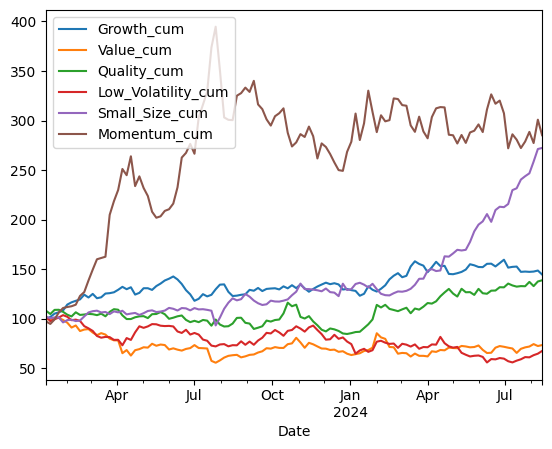

In [104]:
figure_df_cum.plot()

<ipython-input-107-cecd550e65b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo3[new_name_weekly] = (1 + mo3[new_name_weekly]).cumprod()


            Growth_weekly  Value_weekly  Quality_weekly  \
Date                                                      
2024-06-20       0.982000      1.078000        1.001000   
2024-06-25       1.003604      1.102794        1.027026   
2024-06-30       1.025683      1.091766        1.025999   
2024-07-05       0.974399      1.077573        1.055753   
2024-07-10       0.979271      1.065720        1.040972   
2024-07-15       0.981230      0.997514        1.031604   
2024-07-20       0.946887      1.060357        1.035730   
2024-07-25       0.948780      1.082625        1.034694   
2024-07-30       0.946883      1.095616        1.068839   
2024-08-04       0.948777      1.132867        1.035705   
2024-08-09       0.955418      1.103412        1.071955   
2024-08-14       0.929622      1.117757        1.081603   

            Low_Volatility_weekly  Small_Size_weekly  Momentum_weekly  
Date                                                                   
2024-06-20               0.99

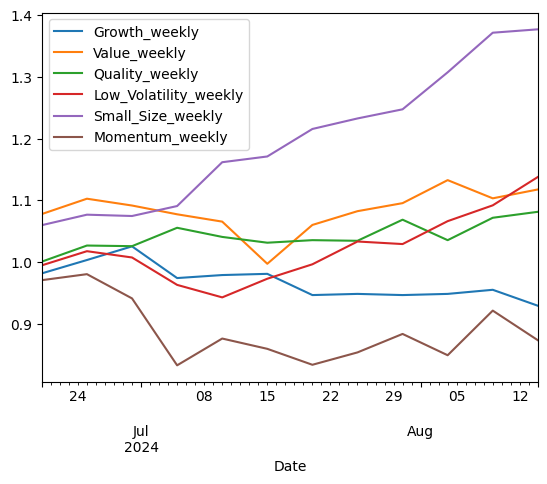

In [107]:
mo3 = figure_df_weekly.iloc[-12:, ]
for factor in factor_lst:
  new_name_weekly = '%s_weekly' % factor
  mo3[new_name_weekly] = (1 + mo3[new_name_weekly]).cumprod()

print(mo3)
print(mo3.plot())

<ipython-input-108-ec3ea2d308a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo1[new_name_weekly] = (1 + mo1[new_name_weekly]).cumprod()


            Growth_weekly  Value_weekly  Quality_weekly  \
Date                                                      
2024-07-30       0.998000      1.012000        1.033000   
2024-08-04       0.999996      1.046408        1.000977   
2024-08-09       1.006996      1.019201        1.036011   
2024-08-14       0.979807      1.032451        1.045335   

            Low_Volatility_weekly  Small_Size_weekly  Momentum_weekly  
Date                                                                   
2024-07-30               0.996000           1.012000         1.035000  
2024-08-04               1.031856           1.060576         0.994635  
2024-08-09               1.056621           1.112544         1.079179  
2024-08-14               1.100999           1.116994         1.023062  
Axes(0.125,0.11;0.775x0.77)


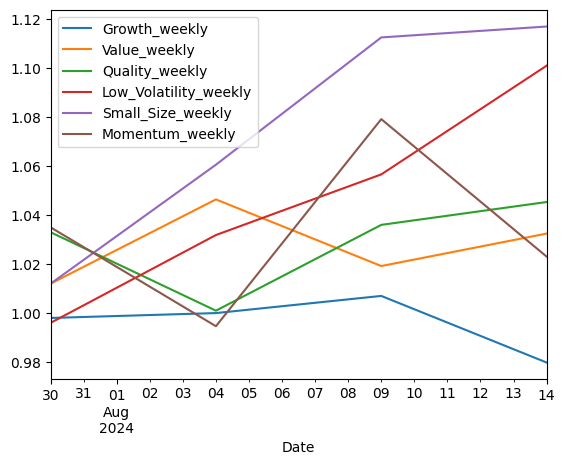

In [108]:
mo1 = figure_df_weekly.iloc[-4:, ]
for factor in factor_lst:
  new_name_weekly = '%s_weekly' % factor
  mo1[new_name_weekly] = (1 + mo1[new_name_weekly]).cumprod()

print(mo1)
print(mo1.plot())

In [ ]:
# 최근 1년 성과
import matplotlib.pyplot as plt

# yr1_weekly 데이터프레임에서 각 열에 대한 서브플롯 생성
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 데이터프레임의 열에 대해 순회하며 서브플롯에 선 그래프 플로팅 (총 7개의 서브플롯)
for i, column in enumerate(figure_df_cum.columns[:6]):
    row, col = divmod(i, 2)
    axes[row, col].plot(figure_df_cum.index, figure_df_cum[column], label=column)
    axes[row, col].set_title(column)
    axes[row, col].legend()


plt.tight_layout()
plt.show()


In [ ]:
factor_stack

In [109]:
Mp_stock = factor_stack.drop(['roe_e3', 'level_0'], axis = 1).dropna().reset_index(drop = True)
zscore_columns = ['eps_chg_e3','pbr_12_trailing','per_12_fwd', 'low_vol','debt_ratio_e3','momentum_12', 'momentum_1',
                    'momentum_3', 'momentum_6', 'small_size', 'ebit_chg_e3', 'ebit_ratio_e3']
for col in zscore_columns:
  Mp_stock[col] = (Mp_stock[col] - Mp_stock[col].mean()) / Mp_stock[col].std(ddof = 0)

Mp_stock.loc[:, 'Growth'] = Mp_stock['eps_chg_e3'] * 1/2 + Mp_stock['ebit_chg_e3'] * 1/2
Mp_stock.loc[:, 'Value'] = Mp_stock['pbr_12_trailing'] * 1/2 + Mp_stock['per_12_fwd'] * 1/2
Mp_stock.loc[:, 'Quality'] = Mp_stock['ebit_ratio_e3'] * 1/2 + Mp_stock['debt_ratio_e3'] * 1/2  # roE추가시 업데이트
Mp_stock.loc[:, 'Momentum'] = Mp_stock['momentum_1'] * 1/4 + Mp_stock['momentum_3'] * 1/4 + Mp_stock['momentum_6'] * 1/4 + Mp_stock['momentum_12'] * 1/4
Mp_stock.loc[:, 'Low_Volatility'] = Mp_stock['low_vol']
Mp_stock.loc[:, 'Small_Size'] = Mp_stock['small_size']

for col in zscore_columns:
  Mp_stock[col] = (Mp_stock[col] - Mp_stock[col].mean()) / Mp_stock[col].std(ddof = 0)

Mp_stock['score'] = Mp_stock['Growth'].rank(ascending = True) * 0.5 + Mp_stock['Momentum'].rank(ascending = True) * 0.2 + Mp_stock['Small_Size'].rank(ascending = True) * 0.3
Mp_stock = Mp_stock.sort_values('score', ascending = False).reset_index(drop = True).reset_index()
Mp_stock_long = Mp_stock.head(10)
Mp_stock_short = Mp_stock.tail(10)
Model_PortFolio = pd.concat([Mp_stock_long,Mp_stock_short], axis = 0)[['level_1','Growth', 'Momentum', 'Small_Size']]
Model_PortFolio

level_1    Growth  Momentum Small_Size
0          삼화전기  0.364151  1.004273   2.055073
1    브랜드엑스코퍼레이션 -0.033564  2.918496    2.17782
2           토비스  0.086403  0.471429   1.958976
3            E1  0.615319  0.290041   0.897146
4           디아이  0.086059  0.966911   1.056048
5      화승엔터프라이즈  0.732974 -0.059539   0.953572
6        SGC에너지 -0.022229  0.387836   1.537995
7           프로텍  0.073324 -0.091031   1.992407
8          한국카본  0.217926  0.410146   0.444958
9         선익시스템  0.122077 -0.076609   1.550053
388       엔씨소프트 -0.265901  -0.31171  -0.973027
389         하이브  -0.23012 -0.543182  -1.086349
390        현대제철 -0.261754 -0.632909  -0.928839
391     SK이노베이션 -0.237436 -0.475972  -1.131971
392    POSCO홀딩스 -0.208275 -0.658699  -1.203721
393        두산밥캣 -0.239193  -0.80055  -0.977302
394    LG에너지솔루션 -0.234774 -0.361147  -1.228684
395        LG화학 -0.210331 -0.961594  -1.190034
396      에코프로비엠 -0.348477  -0.43052  -1.181683
397       삼성SDI -0.263927 -0.762633  -1.193339

In [ ]:
import pandas as pd

In [ ]:
!pip install finance-datareader
!pip install yfinance
import yfinance as yf
import FinanceDataReader as fdr

up_down_label = ['하락', '약간 하락', '약간 상승', '상승']
kospi = pd.DataFrame(fdr.DataReader('KS11', '2022-12-01')['Close'])
dollar = pd.DataFrame(fdr.DataReader('USD/KRW', '2022-12-01')['Close'])
tbondrate = pd.DataFrame(yf.download('^TNX',  '2022-12-01')['Adj Close'])

macro_list = ['kospi', 'dollar', 'tbondrate']
macro_df = kospi.merge(dollar, left_index= True, right_index = True).merge(tbondrate, left_index = True, right_index = True)

macro_df = macro_df.pct_change(5)
macro_df.columns = macro_list
factor_sys = pd.DataFrame()

for columns in macro_df.columns:
  macro_df[columns] = pd.qcut(macro_df[columns], q=4, labels= up_down_label)
  macro_df[columns] = macro_df[columns].shift(1)

factor_sys = figure_df_weekly.merge(macro_df, left_index = True, right_index = True )
print(factor_sys.head())

In [ ]:
"""for macro in macro_list:
  for factor in factor_lst:
    for up_down in up_down_label:
      factor_name = "%s_weekly" %(factor)
      condition_sys = factor_sys[macro]==up_down
      mean = round(factor_sys[condition_sys][factor_name].mean(),3)
      print('사용된 팩터', factor,'/ 사용된 매크로:', macro, '/ 국면 :', up_down, "/ 평균 사후수익률:", round(mean * 100,2), "%")"""

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
##VAR 모델에 따른 검정##
macro_df_var = kospi.merge(dollar, left_index= True, right_index = True).merge(tbondrate, left_index = True, right_index = True)
macro_df_var = macro_df_var.pct_change(5)
macro_df_var.columns = macro_list
factor_sys_var = pd.DataFrame()

for columns in macro_df.columns:
  macro_df_var[columns] = macro_df_var[columns].shift(1)

factor_sys_var = figure_df_weekly.merge(macro_df_var, left_index = True, right_index = True )
train_rate = 0.7
for factor in factor_lst:
  factor = factor + '_weekly'
  ex_df = factor_sys_var[[factor,	'kospi',	'dollar'	,'tbondrate']]

  #ADF test
  ex_df = ex_df.loc['2023-01-01':]
  model = VAR(ex_df)

  model_fit = model.fit()

  # 모델 요약 정보 출력
  coefficients = model_fit.params
  c = round(coefficients[factor][0], 6)
  A_EBIT = round(coefficients[factor][1], 6)
  A_kospi = round(coefficients[factor][2], 6)
  A_dollar = round(coefficients[factor][3], 6)
  A_tbondrate = round(coefficients[factor][4], 6)

  # 선형 방정식
  equation = f"{factor}(t) = {c} + {A_EBIT}*{factor}(t-1) + {A_kospi}*kospi(t-1) + {A_dollar}*dollar(t-1) + {A_tbondrate}*tbondrate(t-1)"
  print("\n추정된 선형 방정식:",equation)

In [ ]:
ex_df.tail(6)